In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74263, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.29842  1.29803  1.29777  1.29863
2020-01-01 17:15:00  1.29845  1.29816  1.29796  1.29845
2020-01-01 17:30:00  1.29817  1.29803  1.29803  1.29824
2020-01-01 17:45:00  1.29804  1.29847  1.29804  1.29852
2020-01-01 18:00:00  1.29853  1.29765  1.29753  1.29853

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74262, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29803  1.29777  1.29863         1.29816    17   
2020-01-01 17:15:00  1.29845  1.29816  1.29796  1.29845         1.29803    17   
2020-01-01 17:30:00  1.29817  1.29803  1.29803  1.29824         1.29847    17   
2020-01-01 17:45:00  1.29804  1.29847  1.29804  1.29852         1.29765    17   
2020-01-01 18:00:00  1.29853  1.29765  1.29753  1.29853         1.29761    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00039   1.298200  0.00086    1.298212  
2020-01-01 17:15:00    2     1   0.00029   1.298205  0.00049    1.298255  
2020-01-01 17:30:00    2     1   0.00014   1.298135  0.00021    1.298118  
2020-01-01 17:45:00    2     1  -0.00043   1.298280  0.00048    1.298268  
2020-01-01 18:00:00    2     1   0.00088   1.298030  0.00100    1.298060

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.29842  1.29803  1.29777  1.29863         1.29816    17   
2020-01-01 17:15:00  1.29845  1.29816  1.29796  1.29845         1.29803    17   
2020-01-01 17:30:00  1.29817  1.29803  1.29803  1.29824         1.29847    17   
2020-01-01 17:45:00  1.29804  1.29847  1.29804  1.29852         1.29765    17   
2020-01-01 18:00:00  1.29853  1.29765  1.29753  1.29853         1.29761    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00039   1.298200  0.00086    1.298212   
2020-01-01 17:15:00    2     1   0.00029   1.298205  0.00049    1.298255   
2020-01-01 17:30:00    2     1   0.00014   1.298135  0.00021    1.298118   
2020-01-01 17:45:00    2     1  -0.00043   1.298280  0.00048    1.298268   
2020-01-01 18:00:00    2     1   0.00088   1.298030  0.00100    1.298060   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.516697  
2020-01-01 17:15:00 -25.516851  
2020-01-01 17:30:00 -25.516851  
2020-01-01 17:45:00 -25.516872  
2020-01-01 18:00:00 -25.517252

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29777  1.29863         1.29816    17    2   
2020-01-01 17:15:00  1.29845  1.29796  1.29845         1.29803    17    2   
2020-01-01 17:30:00  1.29817  1.29803  1.29824         1.29847    17    2   
2020-01-01 17:45:00  1.29804  1.29804  1.29852         1.29765    17    2   
2020-01-01 18:00:00  1.29853  1.29753  1.29853         1.29761    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00039   1.298200  0.00086    1.298212 -25.516697  
2020-01-01 17:15:00     1   0.00029   1.298205  0.00049    1.298255 -25.516851  
2020-01-01 17:30:00     1   0.00014   1.298135  0.00021    1.298118 -25.516851  
2020-01-01 17:45:00     1  -0.00043   1.298280  0.00048

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

51983
51983
11139
11139
11140
11140


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(51983, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(51958, 24, 12)
(11114, 24, 12)
(11115, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(51958, 1)
(11114, 1)
(11115, 1)


array([[0.36816883],
       [0.36865902],
       [0.36877203],
       ...,
       [0.25597334],
       [0.25653887],
       [0.255785  ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.36816883, 0.36865902, 0.36877203, ..., 0.25597334, 0.25653887,
       0.255785  ], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

**GRU_BiLSTM_MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 262.9040 - mae: 2.0300 - mse: 262.9040 - root_mean_squared_error: 16.2143 - mape: 2599.8350
Epoch 1: val_mse improved from inf to 0.11873, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 52s 96ms/step - loss: 262.9040 - mae: 2.0300 - mse: 262.9040 - root_mean_squared_error: 16.2143 - mape: 2599.8350 - val_loss: 0.1187 - val_mae: 0.2922 - val_mse: 0.1187 - val_root_mean_squared_error: 0.3446 - val_mape: 12575.5020
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 0.0672 - mae: 0.1927 - mse: 0.0672 - root_mean_squared_error: 0.2591 - mape: 3725.7693
Epoch 2: val_mse improved from 0.11873 to 0.05834, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 86ms/step - loss: 0.0672 - mae: 0.1927 - mse: 0.0672 - root_mean_squared_error: 0.2591 - mape: 3725.7693 - val_loss: 0.0583 - val_mae: 0.1969 - val_mse: 0.0583 - val_root_mean_squared_error: 0.2415 - val_mape: 25146.9004
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0376 - mae: 0.1525 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 5443.4932
Epoch 3: val_mse improved from 0.05834 to 0.02928, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 84ms/step - loss: 0.0376 - mae: 0.1524 - mse: 0.0376 - root_mean_squared_error: 0.1939 - mape: 5431.2729 - val_loss: 0.0293 - val_mae: 0.1399 - val_mse: 0.0293 - val_root_mean_squared_error: 0.1711 - val_mape: 26403.6309
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0300 - mae: 0.1406 - mse: 0.0300 - root_mean_squared_error: 0.1731 - mape: 5624.0537
Epoch 4: val_mse improved from 0.02928 to 0.02255, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 84ms/step - loss: 0.0300 - mae: 0.1406 - mse: 0.0300 - root_mean_squared_error: 0.1731 - mape: 5624.0537 - val_loss: 0.0225 - val_mae: 0.1227 - val_mse: 0.0225 - val_root_mean_squared_error: 0.1502 - val_mape: 26025.0586
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0259 - mae: 0.1309 - mse: 0.0259 - root_mean_squared_error: 0.1609 - mape: 5554.5215
Epoch 5: val_mse improved from 0.02255 to 0.01763, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 84ms/step - loss: 0.0259 - mae: 0.1309 - mse: 0.0259 - root_mean_squared_error: 0.1609 - mape: 5554.5215 - val_loss: 0.0176 - val_mae: 0.1079 - val_mse: 0.0176 - val_root_mean_squared_error: 0.1328 - val_mape: 25826.4844
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 0.0215 - mae: 0.1188 - mse: 0.0215 - root_mean_squared_error: 0.1467 - mape: 5940.8823
Epoch 6: val_mse improved from 0.01763 to 0.01301, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 85ms/step - loss: 0.0215 - mae: 0.1188 - mse: 0.0215 - root_mean_squared_error: 0.1467 - mape: 5940.8823 - val_loss: 0.0130 - val_mae: 0.0906 - val_mse: 0.0130 - val_root_mean_squared_error: 0.1141 - val_mape: 25085.4355
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0151 - mae: 0.0964 - mse: 0.0151 - root_mean_squared_error: 0.1230 - mape: 5465.2295
Epoch 7: val_mse improved from 0.01301 to 0.00837, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 0.0151 - mae: 0.0963 - mse: 0.0151 - root_mean_squared_error: 0.1229 - mape: 5452.9619 - val_loss: 0.0084 - val_mae: 0.0696 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0915 - val_mape: 23014.9062
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0096 - mae: 0.0731 - mse: 0.0096 - root_mean_squared_error: 0.0980 - mape: 5301.8081
Epoch 8: val_mse improved from 0.00837 to 0.00585, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 83ms/step - loss: 0.0096 - mae: 0.0731 - mse: 0.0096 - root_mean_squared_error: 0.0979 - mape: 5276.9839 - val_loss: 0.0058 - val_mae: 0.0609 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0765 - val_mape: 20667.2012
Epoch 9/75
403/406 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0558 - mse: 0.0056 - root_mean_squared_error: 0.0749 - mape: 3878.1941
Epoch 9: val_mse improved from 0.00585 to 0.00302, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 83ms/step - loss: 0.0056 - mae: 0.0558 - mse: 0.0056 - root_mean_squared_error: 0.0749 - mape: 3850.6194 - val_loss: 0.0030 - val_mae: 0.0430 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0549 - val_mape: 17055.4258
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0484 - mse: 0.0042 - root_mean_squared_error: 0.0646 - mape: 3865.4453
Epoch 10: val_mse improved from 0.00302 to 0.00274, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 86ms/step - loss: 0.0042 - mae: 0.0484 - mse: 0.0042 - root_mean_squared_error: 0.0646 - mape: 3847.3176 - val_loss: 0.0027 - val_mae: 0.0400 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0523 - val_mape: 15506.5479
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0426 - mse: 0.0033 - root_mean_squared_error: 0.0570 - mape: 3489.1333
Epoch 11: val_mse improved from 0.00274 to 0.00211, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 84ms/step - loss: 0.0033 - mae: 0.0426 - mse: 0.0033 - root_mean_squared_error: 0.0570 - mape: 3481.2512 - val_loss: 0.0021 - val_mae: 0.0333 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0460 - val_mape: 14359.4209
Epoch 12/75
406/406 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0390 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 2933.9839
Epoch 12: val_mse did not improve from 0.00211
406/406 [==============================] - 8s 19ms/step - loss: 0.0027 - mae: 0.0390 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 2933.9839 - val_loss: 0.0022 - val_mae: 0.0334 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 13165.3350
Epoch 13/75
405/406 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0367 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 2715.3025
Epoch 13: val_mse did not improve from 0.00211
406/406 [==============================] - 8s 19ms/step

406/406 [==============================] - 34s 83ms/step - loss: 0.0022 - mae: 0.0355 - mse: 0.0022 - root_mean_squared_error: 0.0469 - mape: 2496.4746 - val_loss: 0.0019 - val_mae: 0.0316 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 11593.0420
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 2404.5010
Epoch 15: val_mse improved from 0.00191 to 0.00190, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 2393.2786 - val_loss: 0.0019 - val_mae: 0.0345 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 11144.9707
Epoch 16/75
404/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0322 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 2188.2634
Epoch 16: val_mse did not improve from 0.00190
406/406 [==============================] - 8s 19ms/step - loss: 0.0018 - mae: 0.0322 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 2178.0269 - val_loss: 0.0030 - val_mae: 0.0409 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0545 - val_mape: 10172.6084
Epoch 17/75
405/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0299 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 1901.7786
Epoch 17: val_mse improved from 0.00190 to 0.00184, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 33s 82ms/step - loss: 0.0016 - mae: 0.0299 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 1897.5459 - val_loss: 0.0018 - val_mae: 0.0310 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0429 - val_mape: 9653.7002
Epoch 18/75
404/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 1916.7355
Epoch 18: val_mse did not improve from 0.00184
406/406 [==============================] - 8s 19ms/step - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 1907.7562 - val_loss: 0.0031 - val_mae: 0.0434 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0560 - val_mape: 8878.4668
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0263 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 1918.6418
Epoch 19: val_mse improved from 0.00184 to 0.00160, saving model to /content/drive/MyDrive/modelweights/

406/406 [==============================] - 33s 82ms/step - loss: 0.0012 - mae: 0.0263 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 1918.6418 - val_loss: 0.0016 - val_mae: 0.0292 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 8433.3164
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1766.7491
Epoch 20: val_mse improved from 0.00160 to 0.00126, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 84ms/step - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1766.7491 - val_loss: 0.0013 - val_mae: 0.0269 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 8279.5518
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 9.3033e-04 - mae: 0.0233 - mse: 9.3033e-04 - root_mean_squared_error: 0.0305 - mape: 1550.1804
Epoch 21: val_mse did not improve from 0.00126
406/406 [==============================] - 8s 19ms/step - loss: 9.3033e-04 - mae: 0.0233 - mse: 9.3033e-04 - root_mean_squared_error: 0.0305 - mape: 1550.1804 - val_loss: 0.0013 - val_mae: 0.0264 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 7746.0322
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 8.2763e-04 - mae: 0.0221 - mse: 8.2763e-04 - root_mean_squared_error: 0.0288 - mape: 1699.0138
Epoch 22: val_mse did not improve from 0.00126
406/406 [========================

406/406 [==============================] - 34s 83ms/step - loss: 6.9206e-04 - mae: 0.0202 - mse: 6.9206e-04 - root_mean_squared_error: 0.0263 - mape: 1346.1995 - val_loss: 0.0012 - val_mae: 0.0265 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0341 - val_mape: 7216.1104
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 6.2027e-04 - mae: 0.0191 - mse: 6.2027e-04 - root_mean_squared_error: 0.0249 - mape: 1288.8960
Epoch 24: val_mse did not improve from 0.00116
406/406 [==============================] - 8s 19ms/step - loss: 6.1993e-04 - mae: 0.0191 - mse: 6.1993e-04 - root_mean_squared_error: 0.0249 - mape: 1286.0162 - val_loss: 0.0016 - val_mae: 0.0299 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 6245.9365
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 5.4779e-04 - mae: 0.0180 - mse: 5.4779e-04 - root_mean_squared_error: 0.0234 - mape: 1172.6592
Epoch 25: val_mse did not improve from 0.00116
406/406 [================

406/406 [==============================] - 34s 83ms/step - loss: 4.3534e-04 - mae: 0.0161 - mse: 4.3534e-04 - root_mean_squared_error: 0.0209 - mape: 983.7960 - val_loss: 0.0012 - val_mae: 0.0249 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 5841.6006
Epoch 28/75
404/406 [============================>.] - ETA: 0s - loss: 3.4953e-04 - mae: 0.0143 - mse: 3.4953e-04 - root_mean_squared_error: 0.0187 - mape: 1107.3677
Epoch 28: val_mse improved from 0.00116 to 0.00102, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 86ms/step - loss: 3.5011e-04 - mae: 0.0144 - mse: 3.5011e-04 - root_mean_squared_error: 0.0187 - mape: 1102.1661 - val_loss: 0.0010 - val_mae: 0.0250 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 5760.9331
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 3.2385e-04 - mae: 0.0139 - mse: 3.2385e-04 - root_mean_squared_error: 0.0180 - mape: 883.4567
Epoch 29: val_mse improved from 0.00102 to 0.00098, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 83ms/step - loss: 3.2363e-04 - mae: 0.0139 - mse: 3.2363e-04 - root_mean_squared_error: 0.0180 - mape: 881.4688 - val_loss: 9.8404e-04 - val_mae: 0.0229 - val_mse: 9.8404e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 5432.3315
Epoch 30/75
405/406 [============================>.] - ETA: 0s - loss: 2.9299e-04 - mae: 0.0131 - mse: 2.9299e-04 - root_mean_squared_error: 0.0171 - mape: 844.0716
Epoch 30: val_mse improved from 0.00098 to 0.00095, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 83ms/step - loss: 2.9275e-04 - mae: 0.0131 - mse: 2.9275e-04 - root_mean_squared_error: 0.0171 - mape: 842.1684 - val_loss: 9.5294e-04 - val_mae: 0.0239 - val_mse: 9.5294e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 5579.6890
Epoch 31/75
405/406 [============================>.] - ETA: 0s - loss: 2.5786e-04 - mae: 0.0123 - mse: 2.5786e-04 - root_mean_squared_error: 0.0161 - mape: 825.8781
Epoch 31: val_mse improved from 0.00095 to 0.00085, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 85ms/step - loss: 2.5780e-04 - mae: 0.0123 - mse: 2.5780e-04 - root_mean_squared_error: 0.0161 - mape: 824.0141 - val_loss: 8.4649e-04 - val_mae: 0.0212 - val_mse: 8.4649e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 5022.6851
Epoch 32/75
404/406 [============================>.] - ETA: 0s - loss: 2.3491e-04 - mae: 0.0117 - mse: 2.3491e-04 - root_mean_squared_error: 0.0153 - mape: 814.1670
Epoch 32: val_mse did not improve from 0.00085
406/406 [==============================] - 8s 19ms/step - loss: 2.3503e-04 - mae: 0.0117 - mse: 2.3503e-04 - root_mean_squared_error: 0.0153 - mape: 810.3369 - val_loss: 9.9196e-04 - val_mae: 0.0232 - val_mse: 9.9196e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 4409.3052
Epoch 33/75
406/406 [==============================] - ETA: 0s - loss: 2.2394e-04 - mae: 0.0115 - mse: 2.2394e-04 - root_mean_squared_error: 0.0150 - mape: 725.0750
Epoch 33: val_mse did not improve from 0.00085
406/406 [====

406/406 [==============================] - 34s 84ms/step - loss: 1.9926e-04 - mae: 0.0108 - mse: 1.9926e-04 - root_mean_squared_error: 0.0141 - mape: 782.8762 - val_loss: 7.9356e-04 - val_mae: 0.0214 - val_mse: 7.9356e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 4488.5249
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 1.8443e-04 - mae: 0.0104 - mse: 1.8443e-04 - root_mean_squared_error: 0.0136 - mape: 815.6630
Epoch 35: val_mse improved from 0.00079 to 0.00076, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 1.8527e-04 - mae: 0.0104 - mse: 1.8527e-04 - root_mean_squared_error: 0.0136 - mape: 811.8337 - val_loss: 7.5535e-04 - val_mae: 0.0208 - val_mse: 7.5535e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 5397.2021
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 1.7818e-04 - mae: 0.0102 - mse: 1.7818e-04 - root_mean_squared_error: 0.0133 - mape: 653.5983
Epoch 36: val_mse improved from 0.00076 to 0.00073, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 35s 87ms/step - loss: 1.7840e-04 - mae: 0.0102 - mse: 1.7840e-04 - root_mean_squared_error: 0.0134 - mape: 650.5370 - val_loss: 7.3304e-04 - val_mae: 0.0198 - val_mse: 7.3304e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 4561.7383
Epoch 37/75
405/406 [============================>.] - ETA: 0s - loss: 1.6155e-04 - mae: 0.0097 - mse: 1.6155e-04 - root_mean_squared_error: 0.0127 - mape: 662.6690
Epoch 37: val_mse did not improve from 0.00073
406/406 [==============================] - 8s 19ms/step - loss: 1.6143e-04 - mae: 0.0097 - mse: 1.6143e-04 - root_mean_squared_error: 0.0127 - mape: 661.1793 - val_loss: 0.0011 - val_mae: 0.0247 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 3906.3311
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 1.6513e-04 - mae: 0.0097 - mse: 1.6513e-04 - root_mean_squared_error: 0.0129 - mape: 640.1654
Epoch 38: val_mse improved from 0.00073 to 0.00071, saving model to 

406/406 [==============================] - 34s 83ms/step - loss: 1.6505e-04 - mae: 0.0097 - mse: 1.6505e-04 - root_mean_squared_error: 0.0128 - mape: 638.7243 - val_loss: 7.0730e-04 - val_mae: 0.0194 - val_mse: 7.0730e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 3712.8047
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 1.5695e-04 - mae: 0.0094 - mse: 1.5695e-04 - root_mean_squared_error: 0.0125 - mape: 590.4224
Epoch 39: val_mse improved from 0.00071 to 0.00061, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 1.5658e-04 - mae: 0.0094 - mse: 1.5658e-04 - root_mean_squared_error: 0.0125 - mape: 587.6458 - val_loss: 6.0678e-04 - val_mae: 0.0180 - val_mse: 6.0678e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 3776.1304
Epoch 40/75
406/406 [==============================] - ETA: 0s - loss: 1.4418e-04 - mae: 0.0092 - mse: 1.4418e-04 - root_mean_squared_error: 0.0120 - mape: 570.1891
Epoch 40: val_mse did not improve from 0.00061
406/406 [==============================] - 8s 19ms/step - loss: 1.4418e-04 - mae: 0.0092 - mse: 1.4418e-04 - root_mean_squared_error: 0.0120 - mape: 570.1891 - val_loss: 8.5356e-04 - val_mae: 0.0216 - val_mse: 8.5356e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 3967.3162
Epoch 41/75
405/406 [============================>.] - ETA: 0s - loss: 1.1716e-04 - mae: 0.0082 - mse: 1.1716e-04 - root_mean_squared_error: 0.0108 - mape: 585.2292
Epoch 41: val_mse did not improve from 0.00061
406/406 [====

406/406 [==============================] - 35s 85ms/step - loss: 1.2153e-04 - mae: 0.0084 - mse: 1.2153e-04 - root_mean_squared_error: 0.0110 - mape: 523.6401 - val_loss: 4.3864e-04 - val_mae: 0.0156 - val_mse: 4.3864e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3338.6306
Epoch 44/75
405/406 [============================>.] - ETA: 0s - loss: 1.2049e-04 - mae: 0.0083 - mse: 1.2049e-04 - root_mean_squared_error: 0.0110 - mape: 564.6022
Epoch 44: val_mse improved from 0.00044 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 83ms/step - loss: 1.2041e-04 - mae: 0.0083 - mse: 1.2041e-04 - root_mean_squared_error: 0.0110 - mape: 563.3257 - val_loss: 3.5556e-04 - val_mae: 0.0139 - val_mse: 3.5556e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 3902.4214
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 1.1922e-04 - mae: 0.0079 - mse: 1.1922e-04 - root_mean_squared_error: 0.0109 - mape: 520.4964
Epoch 45: val_mse improved from 0.00036 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 83ms/step - loss: 1.1908e-04 - mae: 0.0079 - mse: 1.1908e-04 - root_mean_squared_error: 0.0109 - mape: 519.3209 - val_loss: 3.2016e-04 - val_mae: 0.0131 - val_mse: 3.2016e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 3710.5032
Epoch 46/75
406/406 [==============================] - ETA: 0s - loss: 1.3187e-04 - mae: 0.0086 - mse: 1.3187e-04 - root_mean_squared_error: 0.0115 - mape: 549.8232
Epoch 46: val_mse did not improve from 0.00032
406/406 [==============================] - 8s 19ms/step - loss: 1.3187e-04 - mae: 0.0086 - mse: 1.3187e-04 - root_mean_squared_error: 0.0115 - mape: 549.8232 - val_loss: 4.9511e-04 - val_mae: 0.0168 - val_mse: 4.9511e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 3487.0854
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 7.9265e-05 - mae: 0.0068 - mse: 7.9265e-05 - root_mean_squared_error: 0.0089 - mape: 475.0756
Epoch 47: val_mse did not improve from 0.00032
406/406 [====

406/406 [==============================] - 34s 83ms/step - loss: 6.7119e-05 - mae: 0.0060 - mse: 6.7119e-05 - root_mean_squared_error: 0.0082 - mape: 396.5197 - val_loss: 2.3341e-04 - val_mae: 0.0118 - val_mse: 2.3341e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 2226.1162
Epoch 56/75
405/406 [============================>.] - ETA: 0s - loss: 6.0948e-05 - mae: 0.0059 - mse: 6.0948e-05 - root_mean_squared_error: 0.0078 - mape: 395.3214
Epoch 56: val_mse did not improve from 0.00023
406/406 [==============================] - 8s 19ms/step - loss: 6.1515e-05 - mae: 0.0059 - mse: 6.1515e-05 - root_mean_squared_error: 0.0078 - mape: 394.4355 - val_loss: 0.0017 - val_mae: 0.0380 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mape: 2014.8944
Epoch 57/75
404/406 [============================>.] - ETA: 0s - loss: 1.6870e-04 - mae: 0.0072 - mse: 1.6870e-04 - root_mean_squared_error: 0.0130 - mape: 403.2659
Epoch 57: val_mse did not improve from 0.00023
406/406 [============

406/406 [==============================] - 34s 84ms/step - loss: 5.2638e-05 - mae: 0.0051 - mse: 5.2638e-05 - root_mean_squared_error: 0.0073 - mape: 452.3417 - val_loss: 1.7293e-04 - val_mae: 0.0103 - val_mse: 1.7293e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 2326.9692
Epoch 75/75
405/406 [============================>.] - ETA: 0s - loss: 4.0357e-05 - mae: 0.0046 - mse: 4.0357e-05 - root_mean_squared_error: 0.0064 - mape: 248.7163
Epoch 75: val_mse did not improve from 0.00017
406/406 [==============================] - 8s 19ms/step - loss: 4.0330e-05 - mae: 0.0046 - mse: 4.0330e-05 - root_mean_squared_error: 0.0064 - mape: 248.1559 - val_loss: 6.7802e-04 - val_mae: 0.0236 - val_mse: 6.7802e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 2222.9976


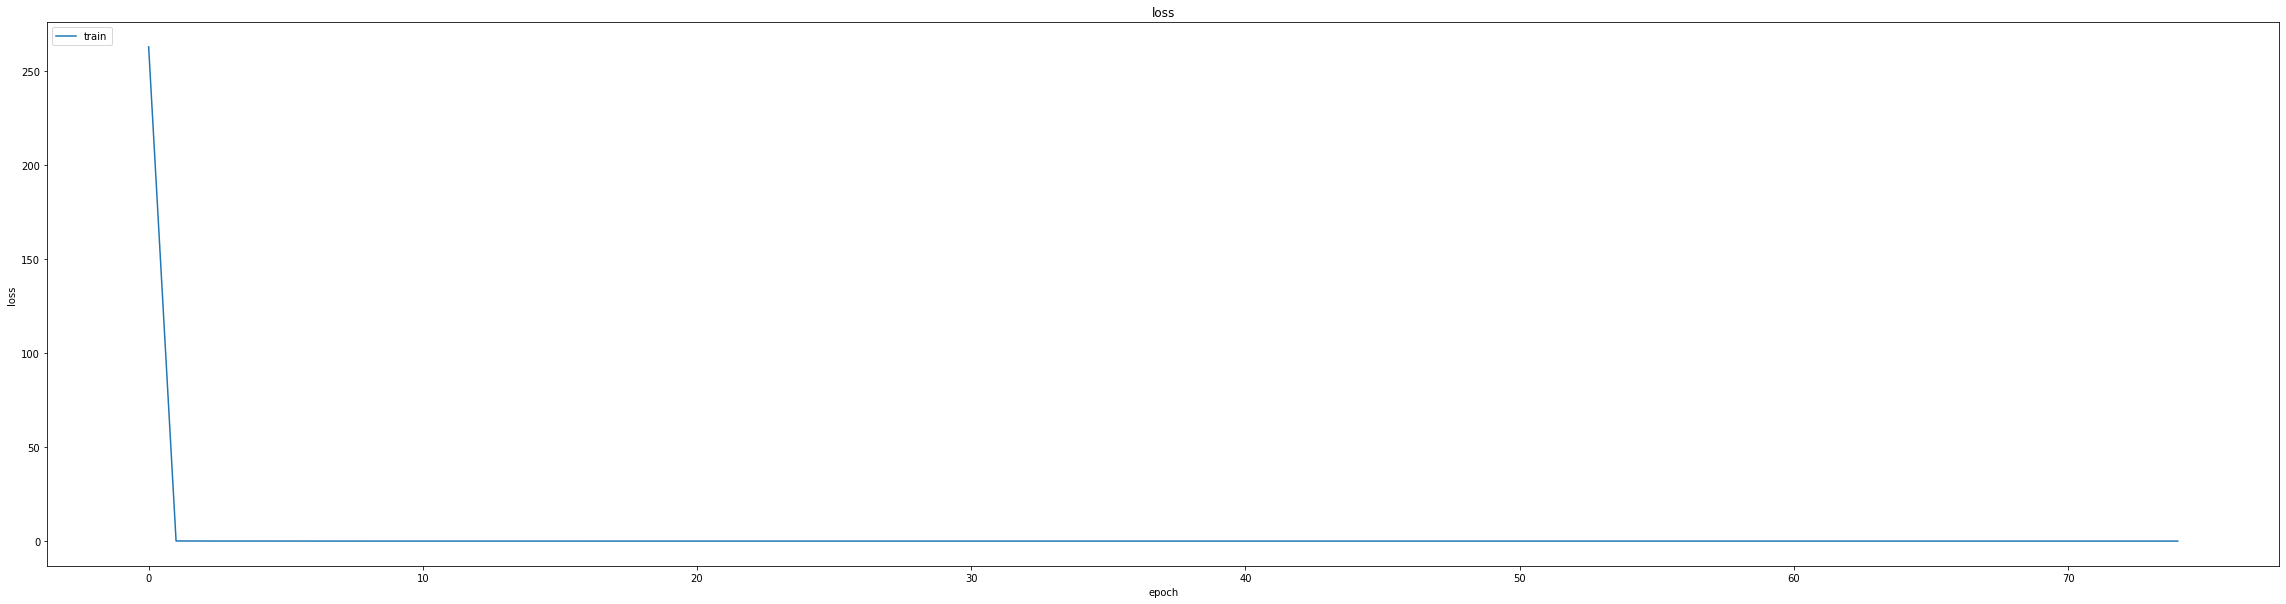

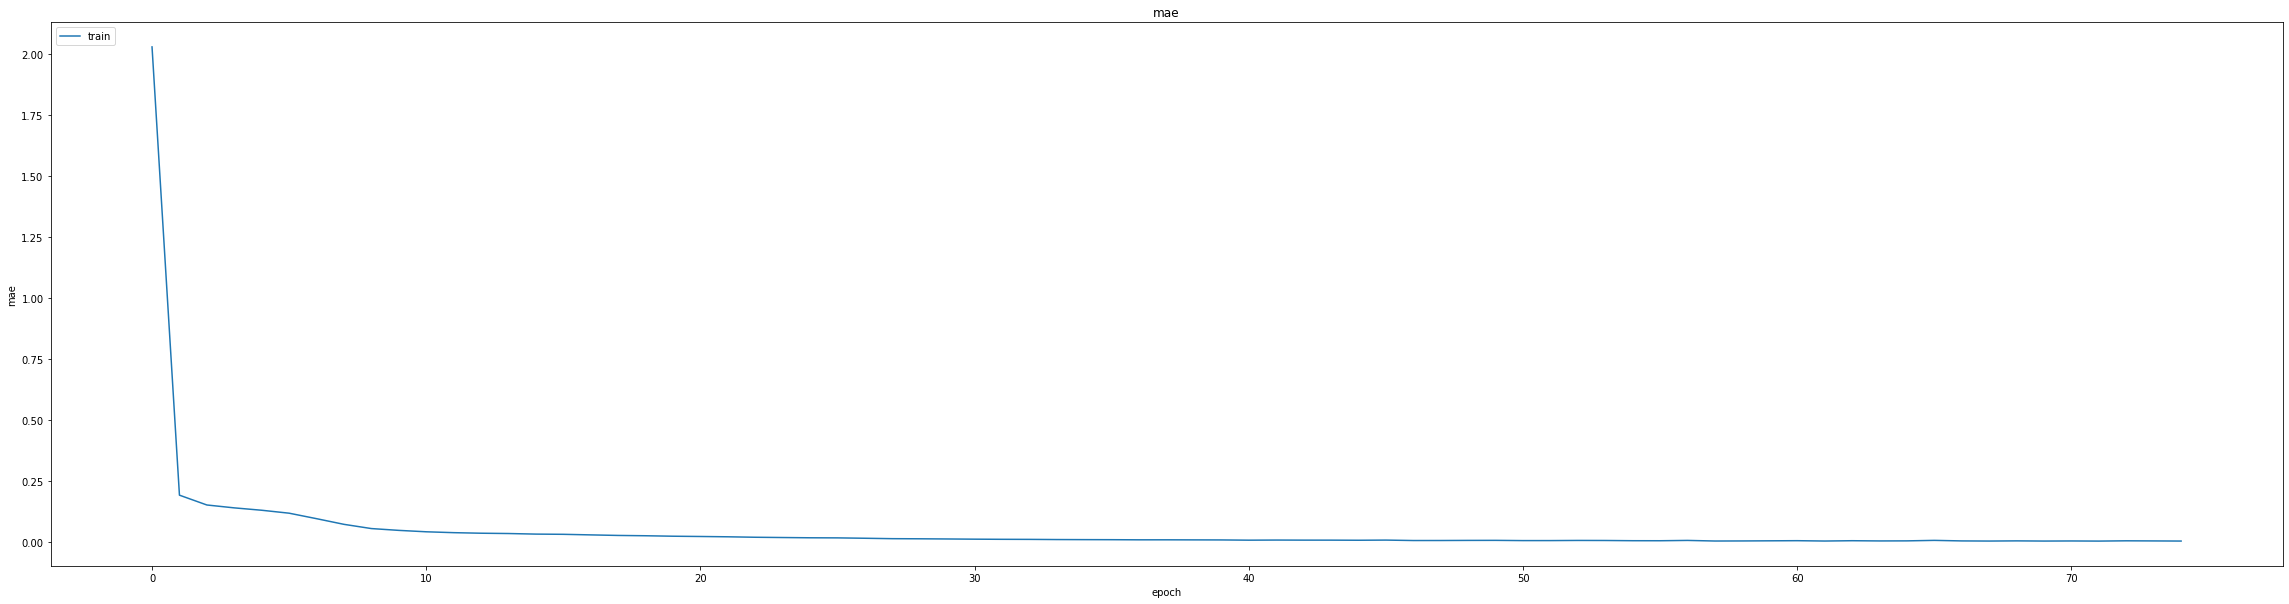

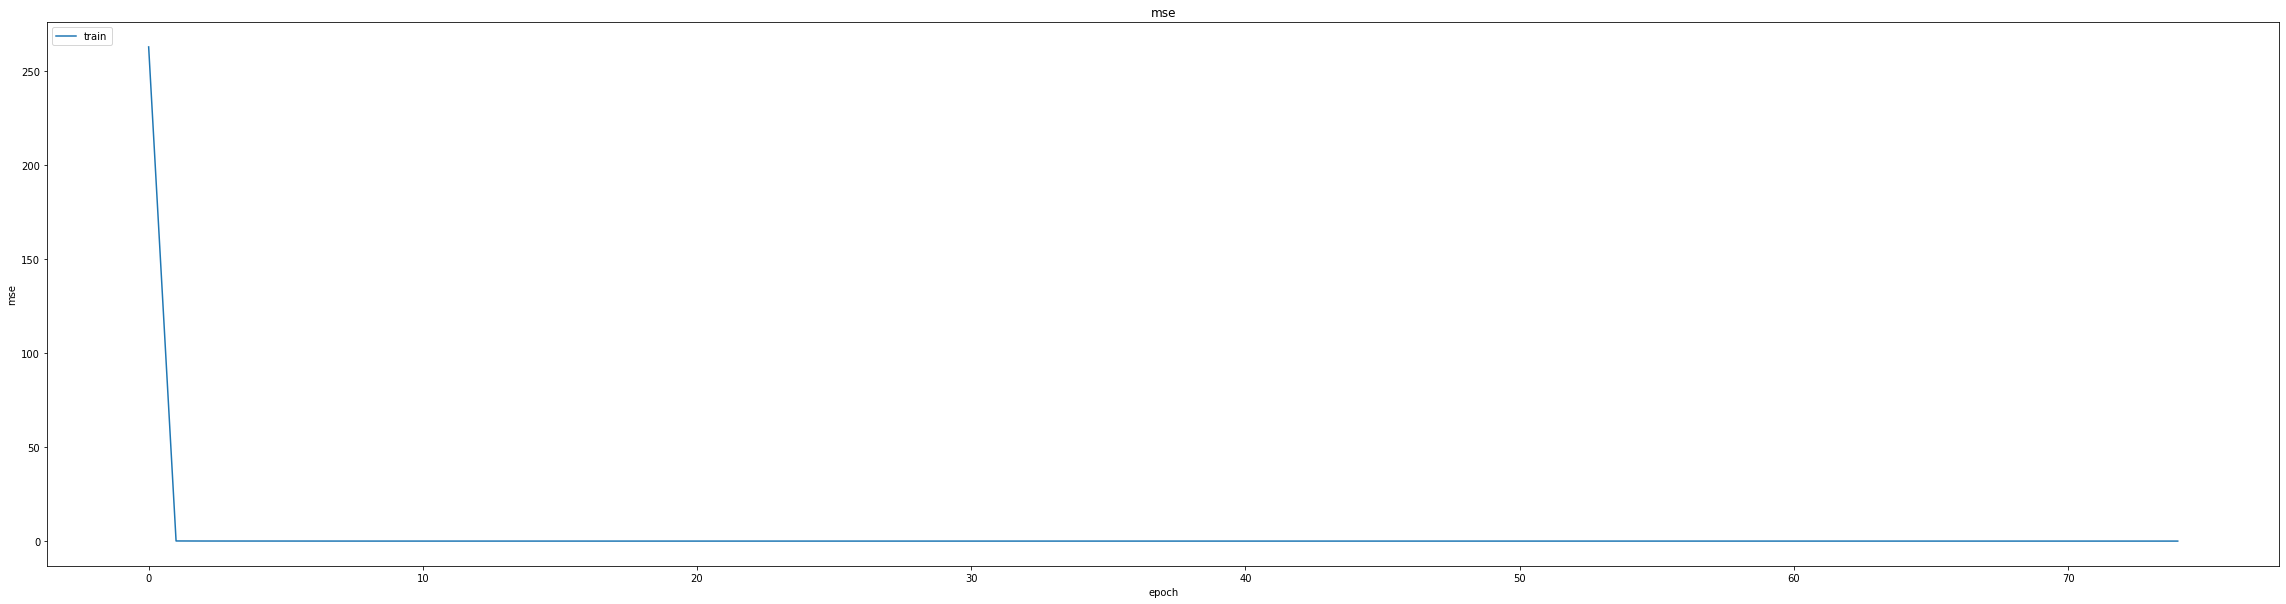

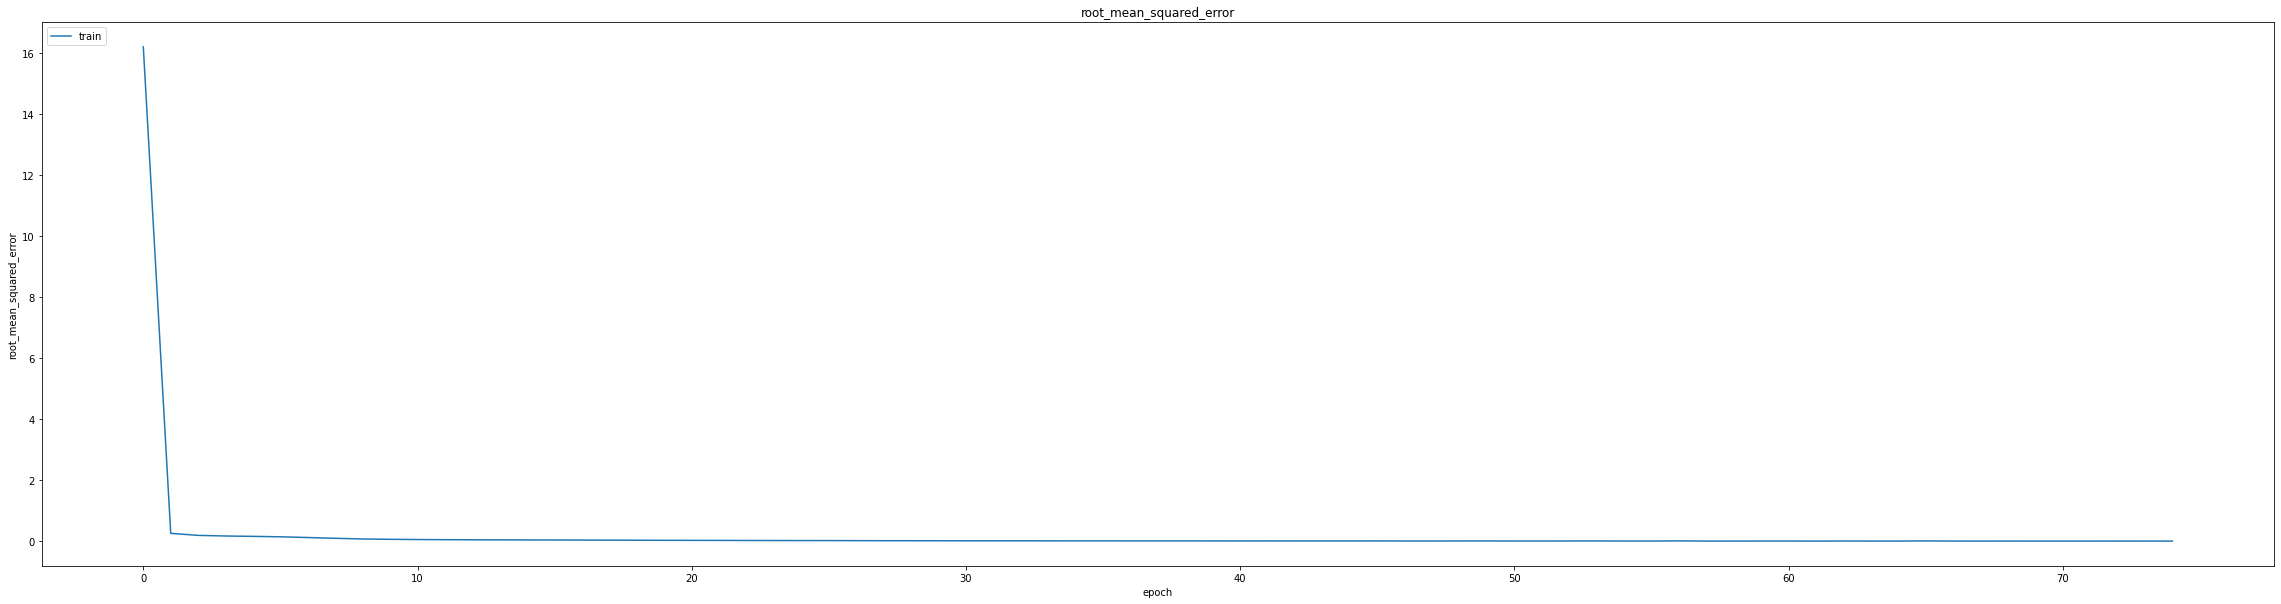

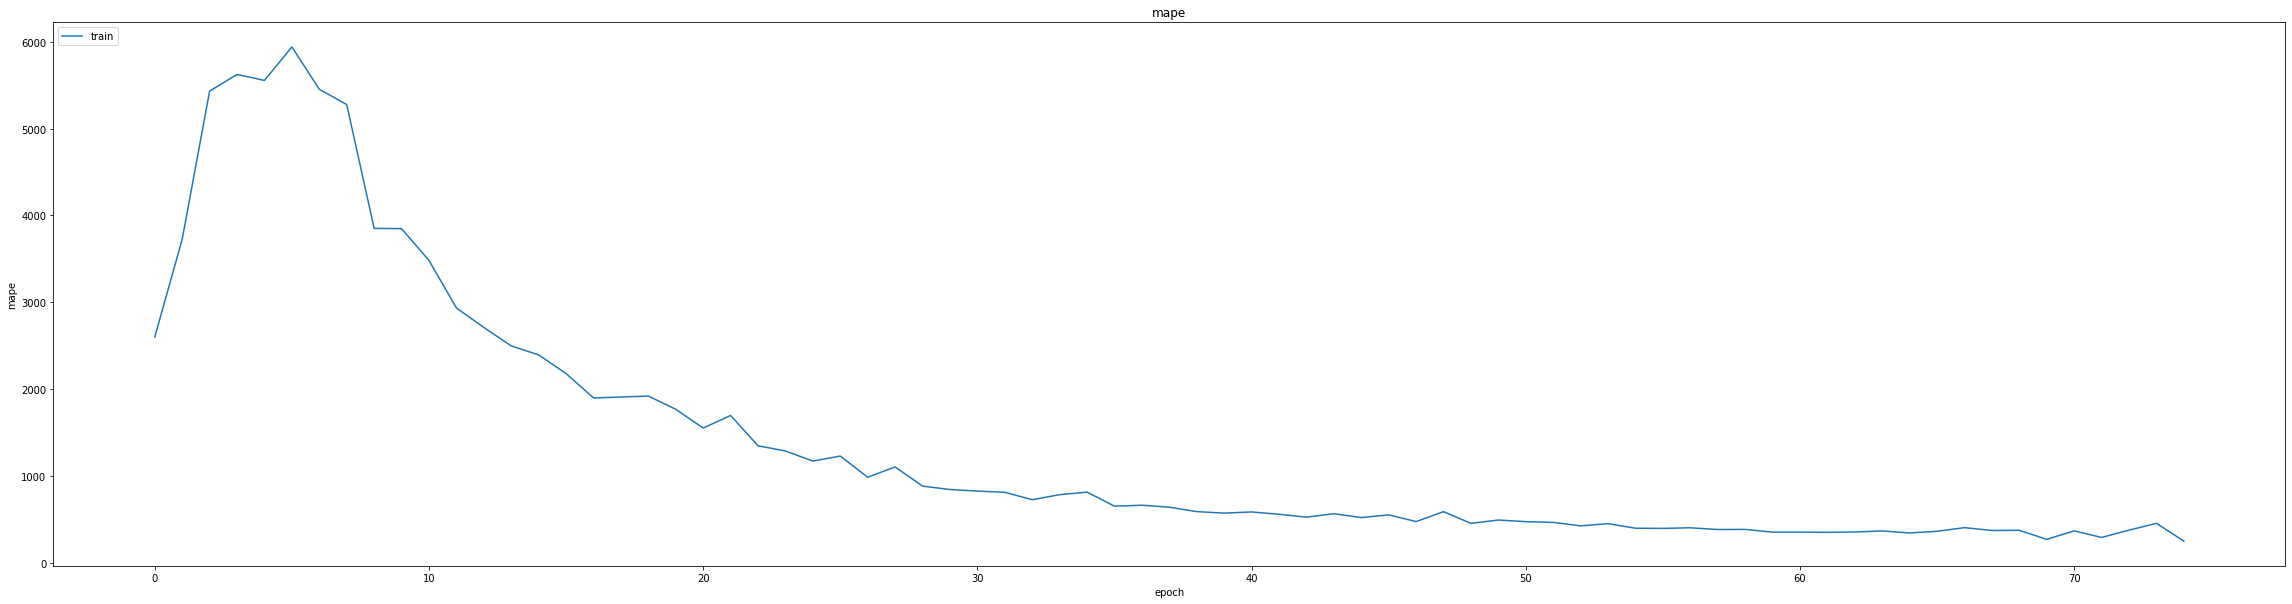

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010284091345965862
0.01315026544034481
348/348 [==============================] - 4s 6ms/step
0.9812416355534492


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
406/406 [==============================] - ETA: 0s - loss: 1.6289e-04 - mae: 0.0057 - mse: 1.6289e-04 - root_mean_squared_error: 0.0128 - mape: 384.7310
Epoch 1: val_mse did not improve from 0.00017
406/406 [==============================] - 17s 23ms/step - loss: 1.6289e-04 - mae: 0.0057 - mse: 1.6289e-04 - root_mean_squared_error: 0.0128 - mape: 384.7310 - val_loss: 6.2281e-04 - val_mae: 0.0225 - val_mse: 6.2281e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 1422.8086 - lr: 0.0010
Epoch 2/25
404/406 [============================>.] - ETA: 0s - loss: 2.0188e-05 - mae: 0.0033 - mse: 2.0188e-05 - root_mean_squared_error: 0.0045 - mape: 265.2096
Epoch 2: val_mse did not improve from 0.00017
406/406 [==============================] - 8s 19ms/step - loss: 2.0166e-05 - mae: 0.0033 - mse: 2.0166e-05 - root_mean_squared_error: 0.0045 - mape: 263.9615 - val_loss: 7.0883e-04 - val_mae: 0.0244 - val_mse: 7.0883e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 1457.1925 - lr

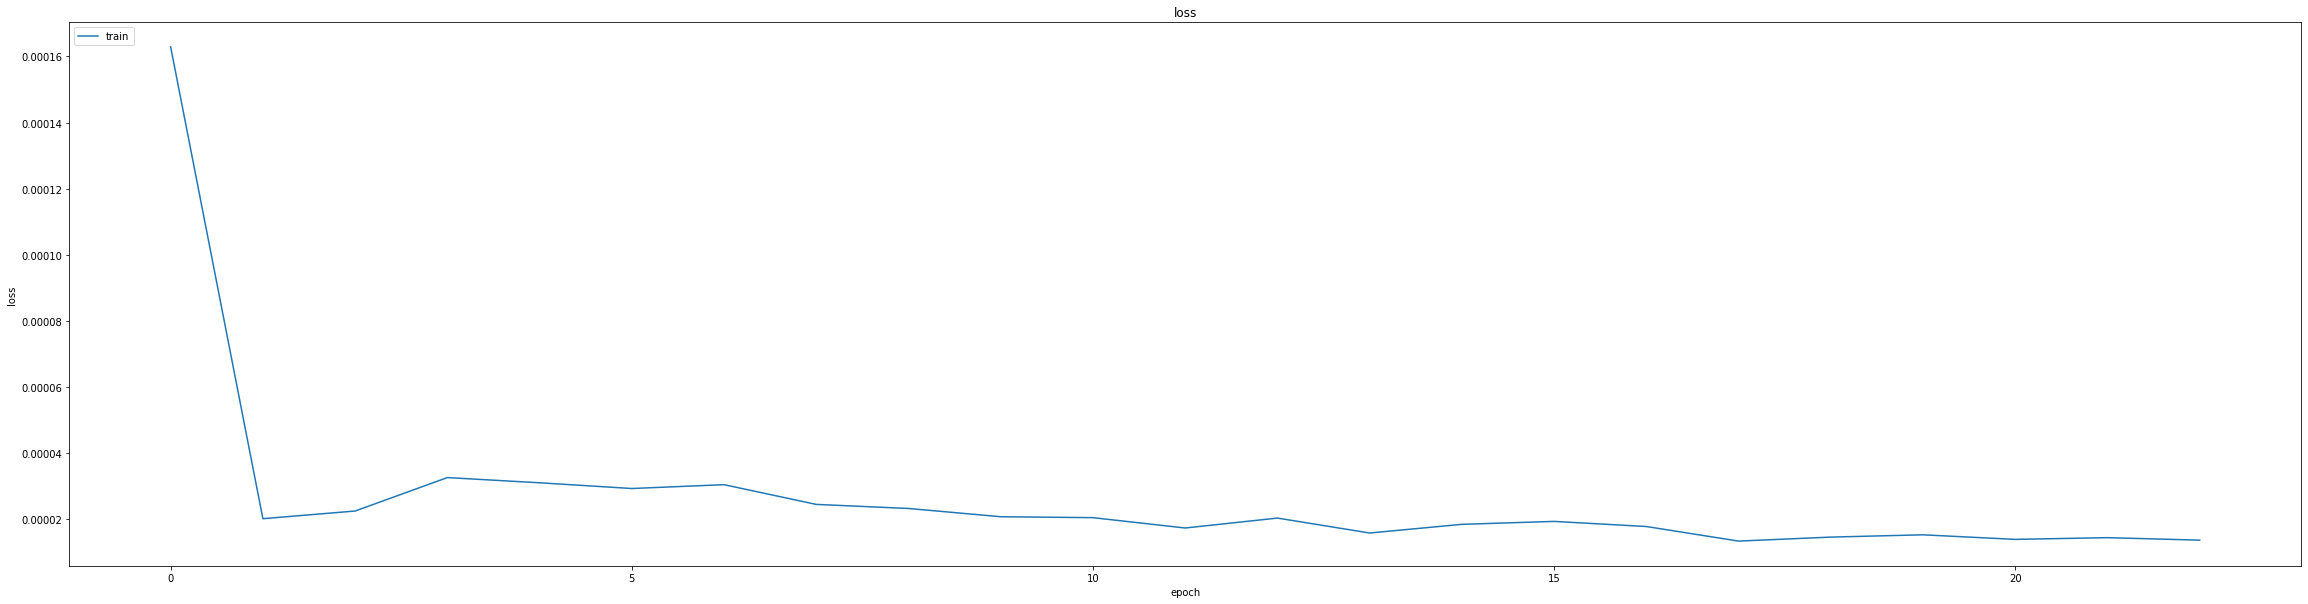

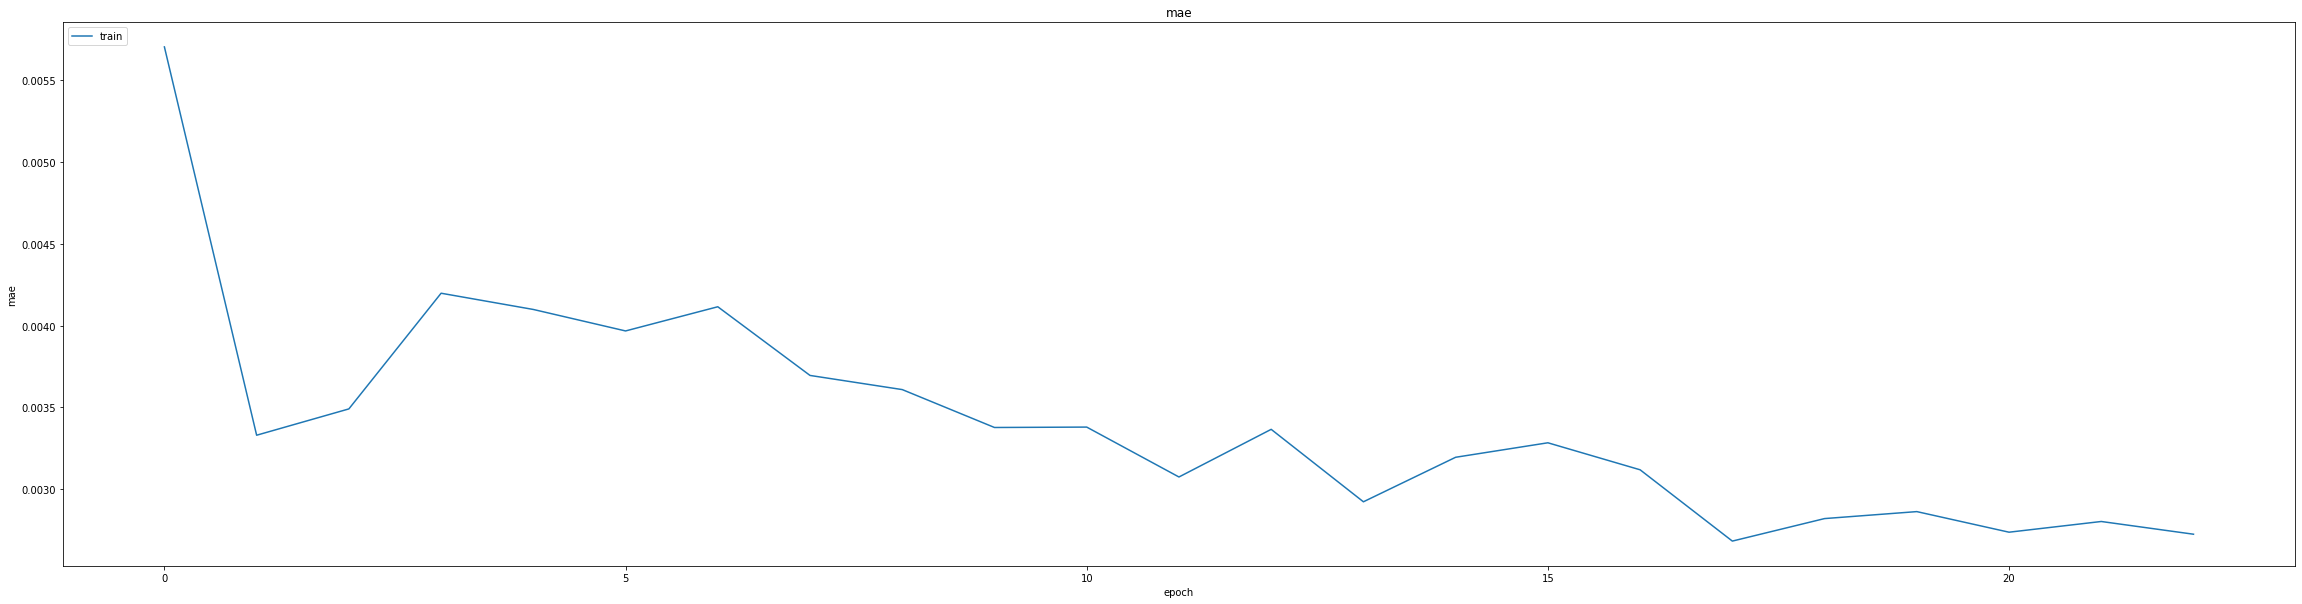

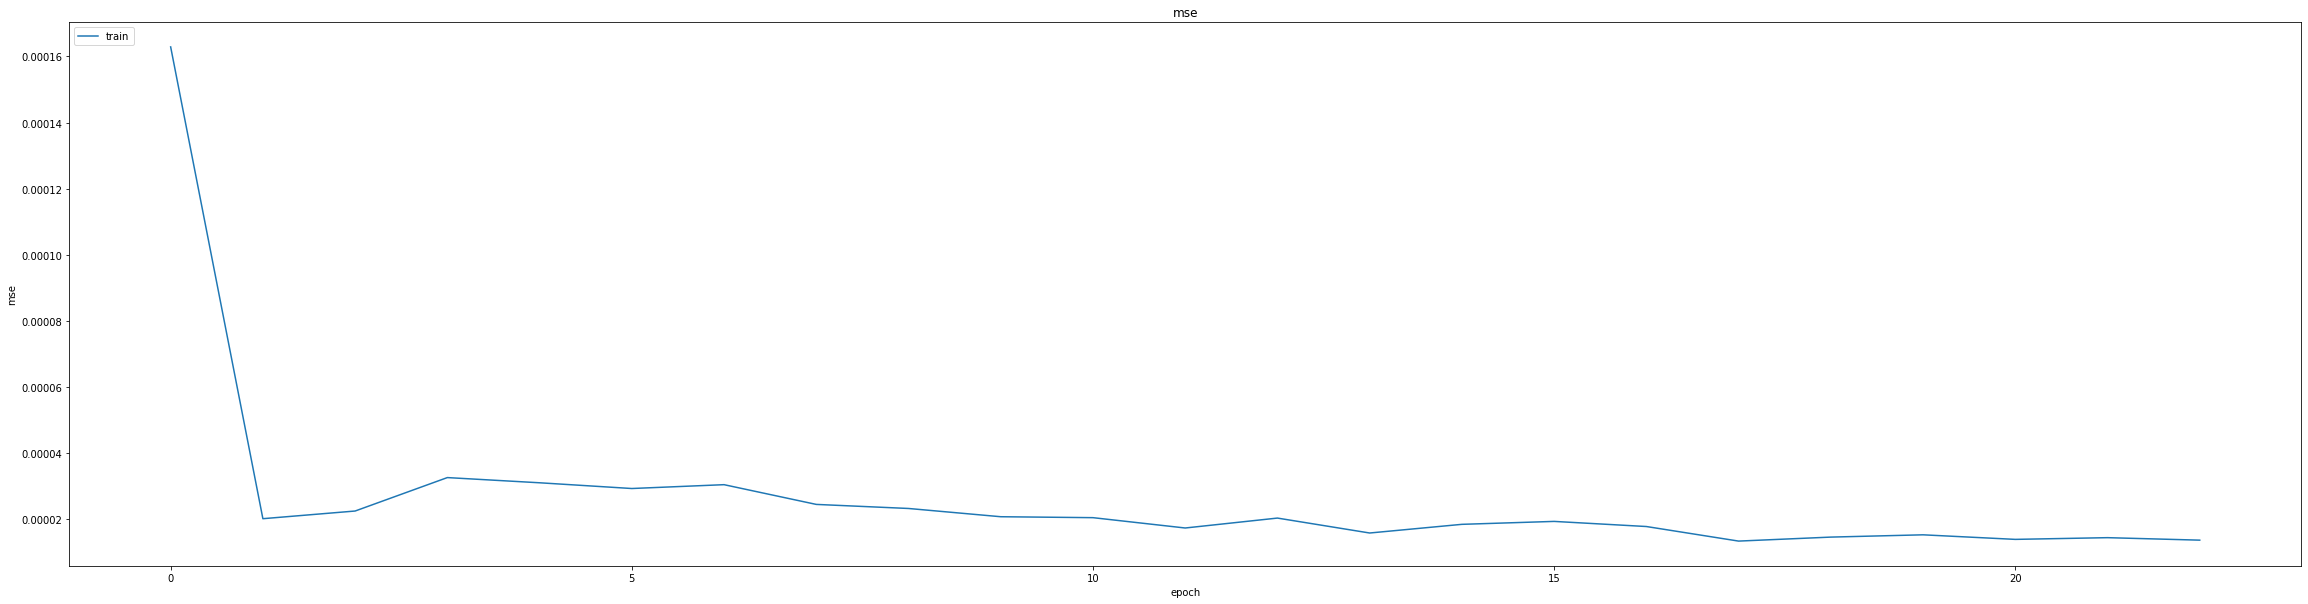

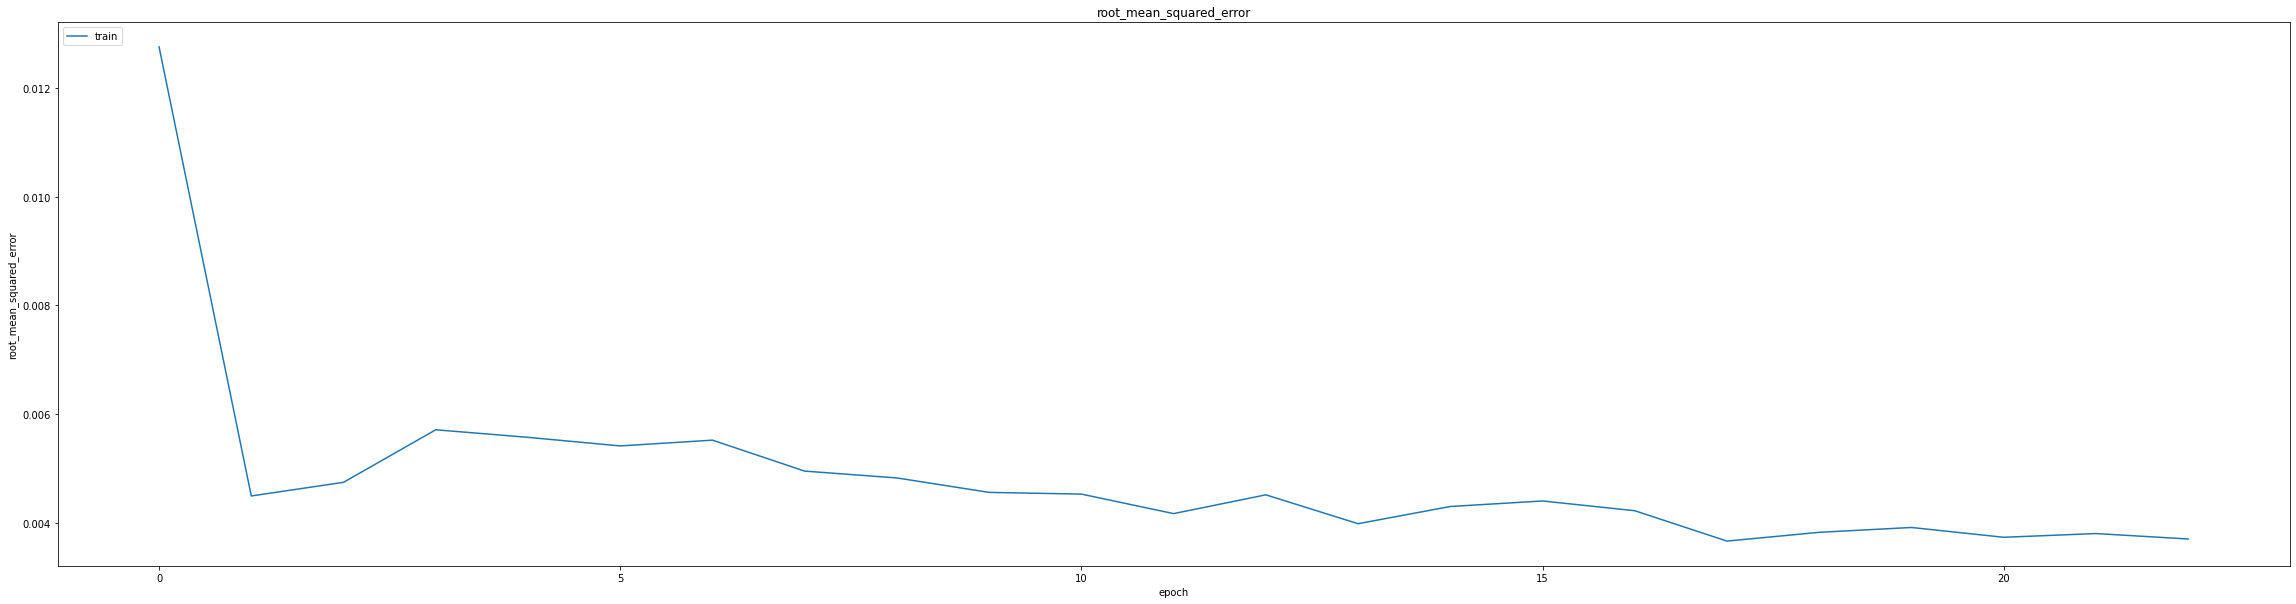

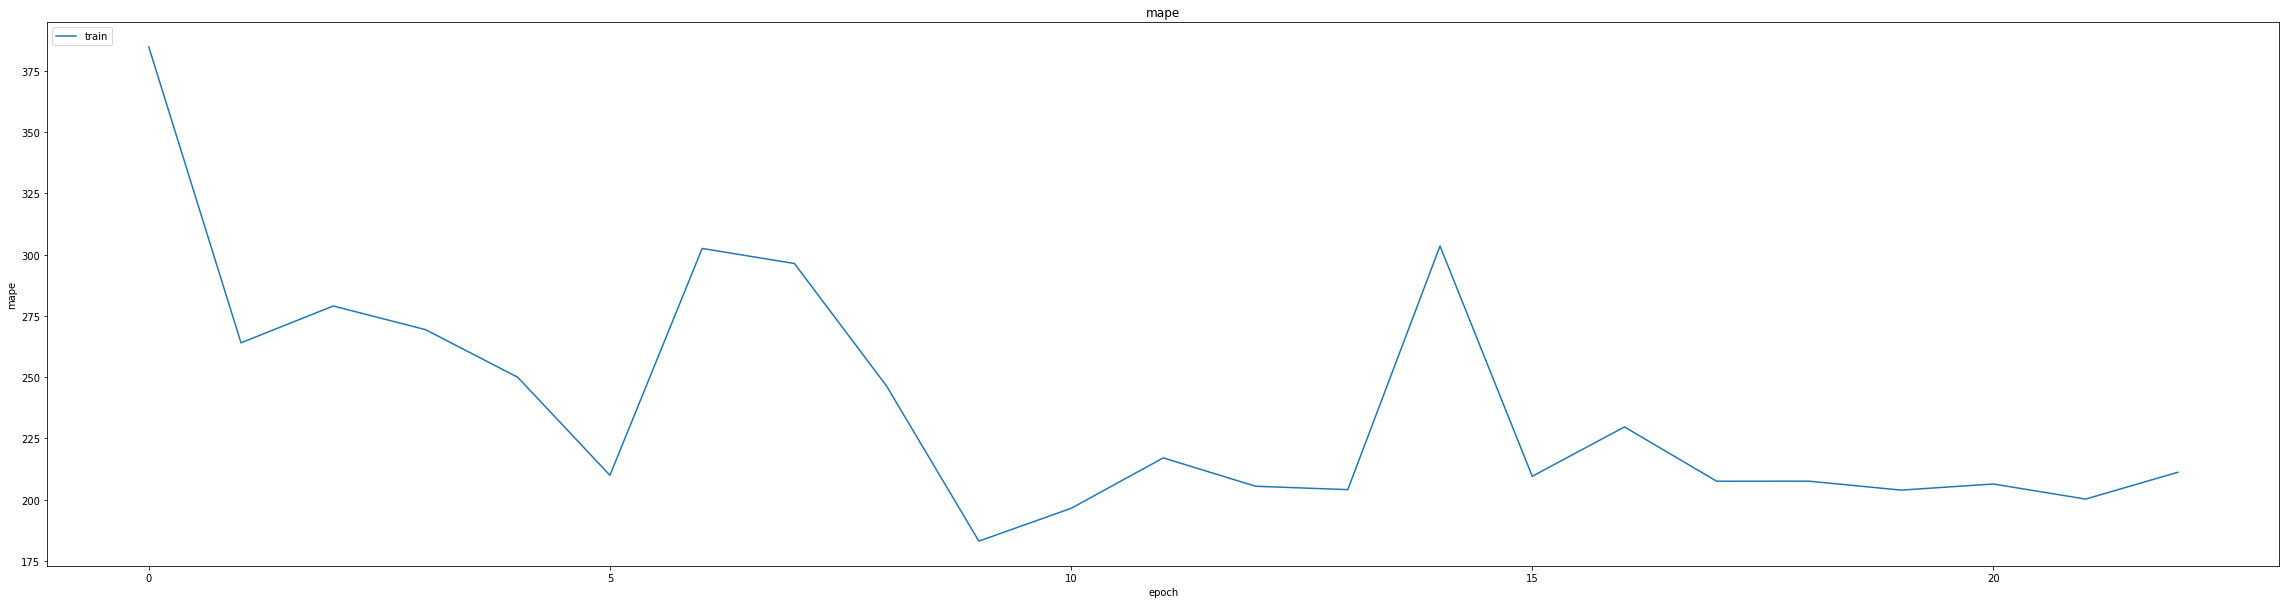

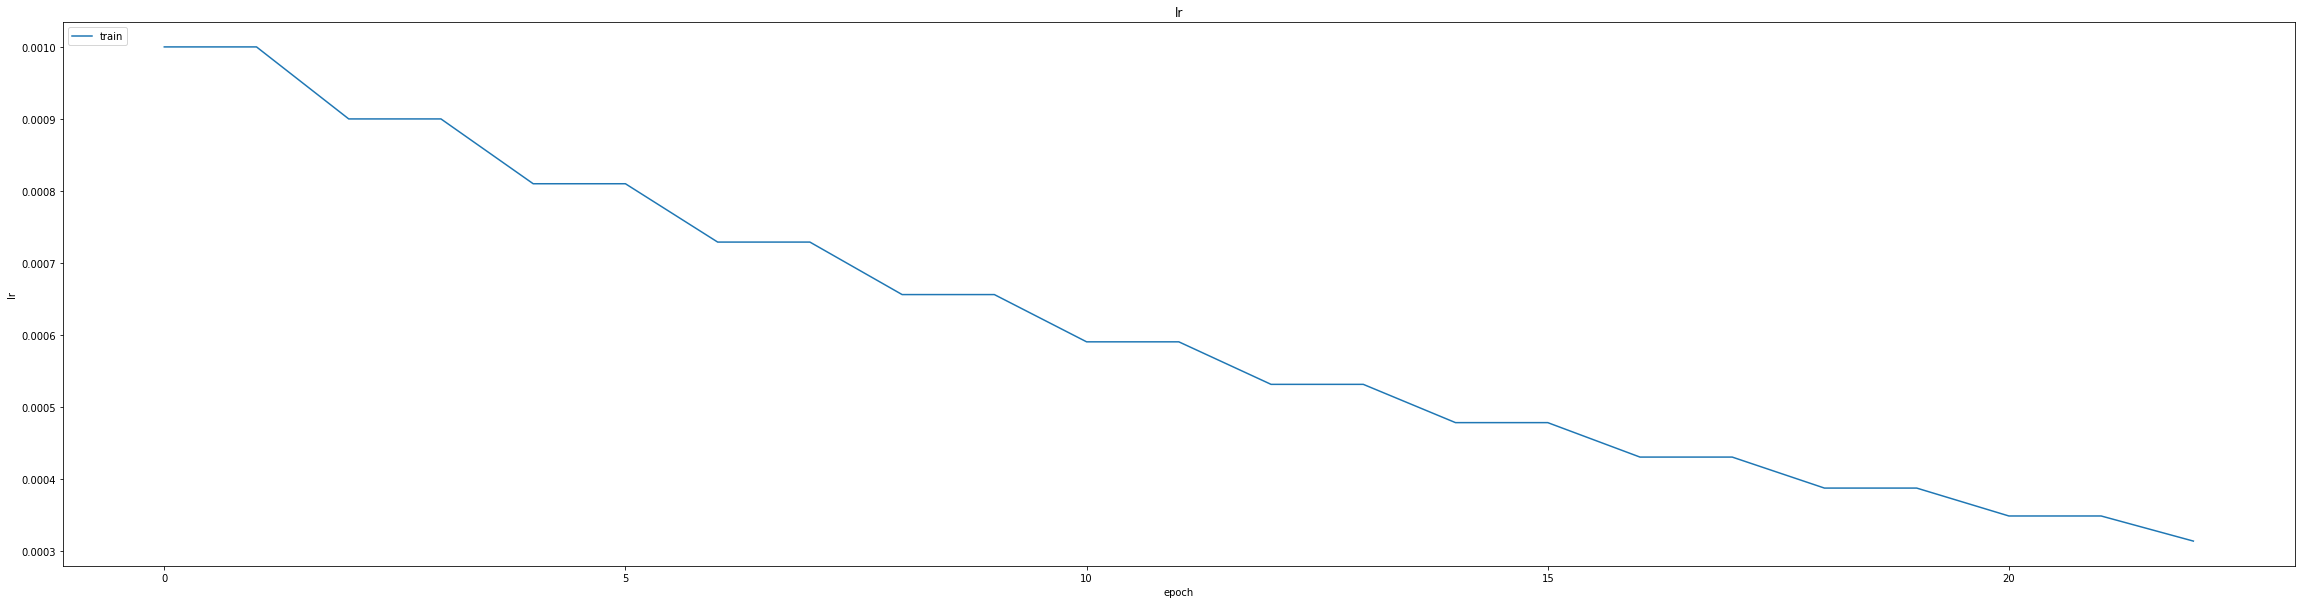

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.018750710412859917
0.021017735823988914
348/348 [==============================] - 4s 6ms/step
0.9748543839071514


348/348 [==============================] - 3s 8ms/step


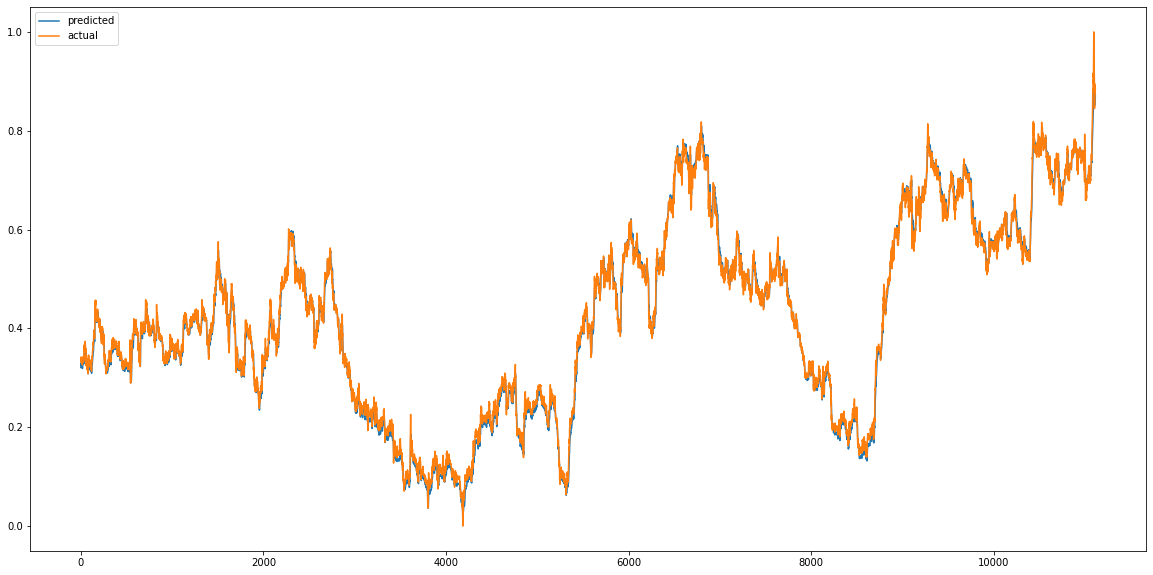

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


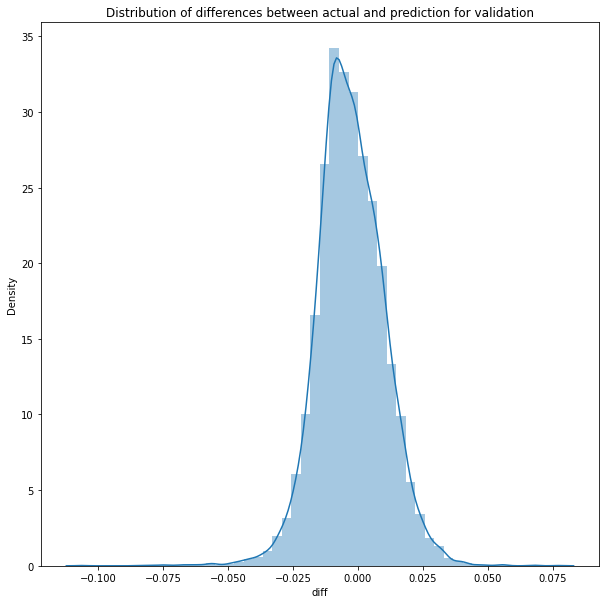

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


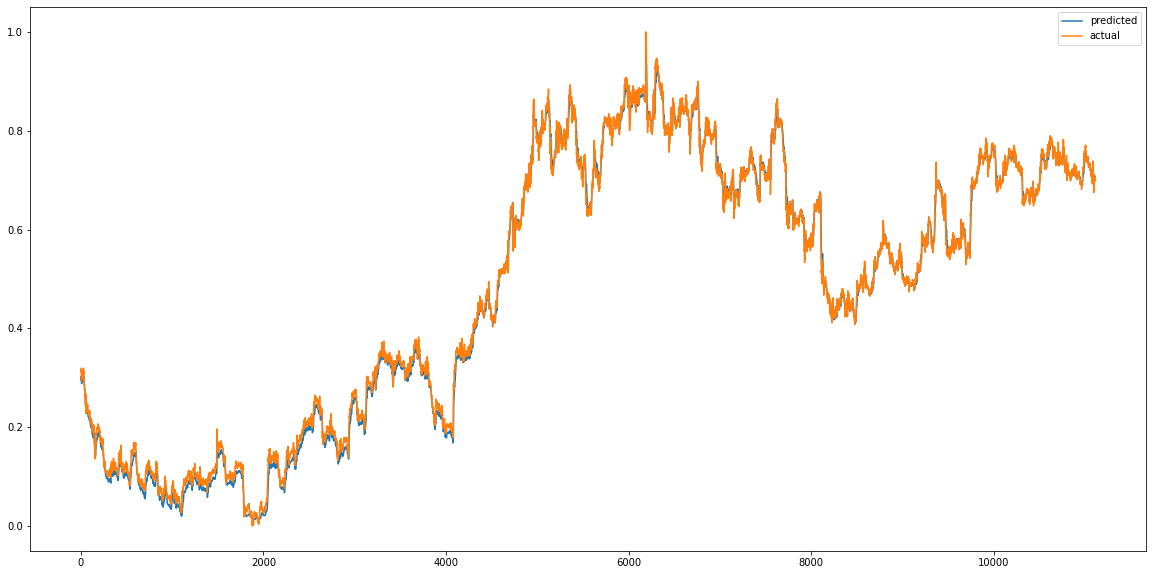

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


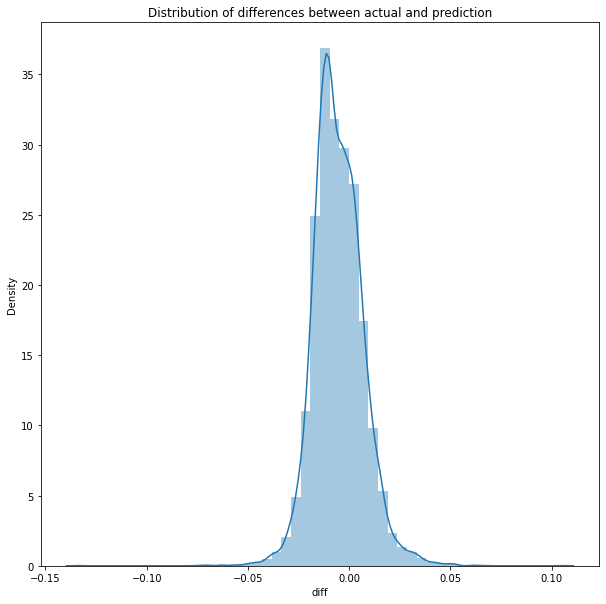

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00018054928038416078
RMSE :  0.01343686274336985
MAE :  0.010646920409380345
348/348 [==============================] - 4s 12ms/step
R2_Score  : 0.9975084789691235


count    11115.000000
mean        -0.005403
std          0.012303
min         -0.133958
25%         -0.013409
50%         -0.006393
75%          0.002082
max          0.105111
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
405/406 [============================>.] - ETA: 0s - loss: 353.2534 - mae: 2.6608 - mse: 353.2534 - root_mean_squared_error: 18.7950 - mape: 11293.1455
Epoch 1: val_mse improved from inf to 0.03623, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 24s 44ms/step - loss: 352.4512 - mae: 2.6552 - mse: 352.4512 - root_mean_squared_error: 18.7737 - mape: 11267.8779 - val_loss: 0.0362 - val_mae: 0.1590 - val_mse: 0.0362 - val_root_mean_squared_error: 0.1903 - val_mape: 38007.4453
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0438 - mae: 0.1766 - mse: 0.0438 - root_mean_squared_error: 0.2093 - mape: 7854.6582
Epoch 2: val_mse did not improve from 0.03623
406/406 [==============================] - 5s 13ms/step - loss: 0.0438 - mae: 0.1766 - mse: 0.0438 - root_mean_squared_error: 0.2093 - mape: 7798.8389 - val_loss: 0.0394 - val_mae: 0.1638 - val_mse: 0.0394 - val_root_mean_squared_error: 0.1984 - val_mape: 33289.7773
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0416 - mae: 0.1701 - mse: 0.0416 - root_mean_squared_error: 0.2039 - mape: 8152.4580
Epoch 3: val_mse did not improve from 0.03623
406/406 [==============================] - 5s 12ms/st

406/406 [==============================] - 16s 41ms/step - loss: 0.0384 - mae: 0.1615 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 6854.2783 - val_loss: 0.0351 - val_mae: 0.1535 - val_mse: 0.0351 - val_root_mean_squared_error: 0.1873 - val_mape: 28399.7812
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 0.0282 - mae: 0.1347 - mse: 0.0282 - root_mean_squared_error: 0.1679 - mape: 6176.4653
Epoch 12: val_mse improved from 0.03507 to 0.01146, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0281 - mae: 0.1344 - mse: 0.0281 - root_mean_squared_error: 0.1676 - mape: 6132.4658 - val_loss: 0.0115 - val_mae: 0.0793 - val_mse: 0.0115 - val_root_mean_squared_error: 0.1071 - val_mape: 23942.4160
Epoch 13/75
402/406 [============================>.] - ETA: 0s - loss: 0.0100 - mae: 0.0757 - mse: 0.0100 - root_mean_squared_error: 0.1001 - mape: 4495.2617
Epoch 13: val_mse improved from 0.01146 to 0.00436, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0100 - mae: 0.0755 - mse: 0.0100 - root_mean_squared_error: 0.0999 - mape: 4452.2300 - val_loss: 0.0044 - val_mae: 0.0550 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0661 - val_mape: 17555.8223
Epoch 14/75
403/406 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0587 - mse: 0.0058 - root_mean_squared_error: 0.0763 - mape: 4093.3748
Epoch 14: val_mse improved from 0.00436 to 0.00148, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0058 - mae: 0.0586 - mse: 0.0058 - root_mean_squared_error: 0.0762 - mape: 4064.1213 - val_loss: 0.0015 - val_mae: 0.0297 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 15114.4141
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0475 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 3373.3877
Epoch 15: val_mse did not improve from 0.00148
406/406 [==============================] - 5s 12ms/step - loss: 0.0038 - mae: 0.0475 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 3365.8015 - val_loss: 0.0017 - val_mae: 0.0327 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 13308.5137
Epoch 16/75
403/406 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0426 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 2762.6001
Epoch 16: val_mse improved from 0.00148 to 0.00113, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 17s 41ms/step - loss: 0.0031 - mae: 0.0426 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 2742.9851 - val_loss: 0.0011 - val_mae: 0.0260 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 12067.0908
Epoch 17/75
403/406 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0390 - mse: 0.0026 - root_mean_squared_error: 0.0510 - mape: 2413.2859
Epoch 17: val_mse did not improve from 0.00113
406/406 [==============================] - 5s 12ms/step - loss: 0.0026 - mae: 0.0390 - mse: 0.0026 - root_mean_squared_error: 0.0510 - mape: 2396.1748 - val_loss: 0.0013 - val_mae: 0.0274 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 11364.6699
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0366 - mse: 0.0023 - root_mean_squared_error: 0.0476 - mape: 2178.7742
Epoch 18: val_mse improved from 0.00113 to 0.00104, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 38ms/step - loss: 0.0023 - mae: 0.0366 - mse: 0.0023 - root_mean_squared_error: 0.0476 - mape: 2163.2444 - val_loss: 0.0010 - val_mae: 0.0249 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 10668.6094
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0335 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 2272.3811
Epoch 19: val_mse did not improve from 0.00104
406/406 [==============================] - 5s 12ms/step - loss: 0.0019 - mae: 0.0335 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 2261.7983 - val_loss: 0.0015 - val_mae: 0.0314 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 10306.8242
Epoch 20/75
402/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0315 - mse: 0.0017 - root_mean_squared_error: 0.0408 - mape: 1969.6680
Epoch 20: val_mse did not improve from 0.00104
406/406 [==============================] - 5s 12ms/step

406/406 [==============================] - 16s 40ms/step - loss: 9.9169e-04 - mae: 0.0244 - mse: 9.9169e-04 - root_mean_squared_error: 0.0315 - mape: 1374.1554 - val_loss: 8.9944e-04 - val_mae: 0.0231 - val_mse: 8.9944e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 7048.4614
Epoch 24/75
403/406 [============================>.] - ETA: 0s - loss: 8.9594e-04 - mae: 0.0232 - mse: 8.9594e-04 - root_mean_squared_error: 0.0299 - mape: 1199.4785
Epoch 24: val_mse improved from 0.00090 to 0.00083, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 8.9563e-04 - mae: 0.0232 - mse: 8.9563e-04 - root_mean_squared_error: 0.0299 - mape: 1190.9373 - val_loss: 8.3296e-04 - val_mae: 0.0216 - val_mse: 8.3296e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 6315.8389
Epoch 25/75
403/406 [============================>.] - ETA: 0s - loss: 7.4965e-04 - mae: 0.0212 - mse: 7.4965e-04 - root_mean_squared_error: 0.0274 - mape: 1048.1874
Epoch 25: val_mse did not improve from 0.00083
406/406 [==============================] - 5s 12ms/step - loss: 7.5013e-04 - mae: 0.0212 - mse: 7.5013e-04 - root_mean_squared_error: 0.0274 - mape: 1040.7378 - val_loss: 8.6898e-04 - val_mae: 0.0218 - val_mse: 8.6898e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 5980.0664
Epoch 26/75
405/406 [============================>.] - ETA: 0s - loss: 6.6980e-04 - mae: 0.0201 - mse: 6.6980e-04 - root_mean_squared_error: 0.0259 - mape: 1060.4487
Epoch 26: val_mse improved from 0.00083 to 0.00077, savi

406/406 [==============================] - 16s 40ms/step - loss: 6.6970e-04 - mae: 0.0201 - mse: 6.6970e-04 - root_mean_squared_error: 0.0259 - mape: 1058.0811 - val_loss: 7.7349e-04 - val_mae: 0.0209 - val_mse: 7.7349e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 5819.0469
Epoch 27/75
403/406 [============================>.] - ETA: 0s - loss: 5.4734e-04 - mae: 0.0180 - mse: 5.4734e-04 - root_mean_squared_error: 0.0234 - mape: 864.2166
Epoch 27: val_mse did not improve from 0.00077
406/406 [==============================] - 5s 13ms/step - loss: 5.4782e-04 - mae: 0.0180 - mse: 5.4782e-04 - root_mean_squared_error: 0.0234 - mape: 858.0585 - val_loss: 0.0011 - val_mae: 0.0262 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 6909.5913
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 5.1545e-04 - mae: 0.0176 - mse: 5.1545e-04 - root_mean_squared_error: 0.0227 - mape: 875.0565
Epoch 28: val_mse did not improve from 0.00077
406/406 [===========

406/406 [==============================] - 16s 39ms/step - loss: 3.2941e-04 - mae: 0.0139 - mse: 3.2941e-04 - root_mean_squared_error: 0.0181 - mape: 758.4124 - val_loss: 7.2053e-04 - val_mae: 0.0202 - val_mse: 7.2053e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 4364.3677
Epoch 35/75
403/406 [============================>.] - ETA: 0s - loss: 2.8059e-04 - mae: 0.0129 - mse: 2.8059e-04 - root_mean_squared_error: 0.0168 - mape: 725.7115
Epoch 35: val_mse did not improve from 0.00072
406/406 [==============================] - 5s 12ms/step - loss: 2.8011e-04 - mae: 0.0129 - mse: 2.8011e-04 - root_mean_squared_error: 0.0167 - mape: 720.5264 - val_loss: 7.5141e-04 - val_mae: 0.0209 - val_mse: 7.5141e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 4116.3140
Epoch 36/75
402/406 [============================>.] - ETA: 0s - loss: 2.7940e-04 - mae: 0.0128 - mse: 2.7940e-04 - root_mean_squared_error: 0.0167 - mape: 675.4048
Epoch 36: val_mse did not improve from 0.00072
406/406 [====

406/406 [==============================] - 17s 41ms/step - loss: 1.8955e-04 - mae: 0.0105 - mse: 1.8955e-04 - root_mean_squared_error: 0.0138 - mape: 629.2137 - val_loss: 6.4020e-04 - val_mae: 0.0188 - val_mse: 6.4020e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 3754.1343
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 1.8203e-04 - mae: 0.0103 - mse: 1.8203e-04 - root_mean_squared_error: 0.0135 - mape: 604.9396
Epoch 43: val_mse did not improve from 0.00064
406/406 [==============================] - 5s 13ms/step - loss: 1.8203e-04 - mae: 0.0103 - mse: 1.8203e-04 - root_mean_squared_error: 0.0135 - mape: 604.9396 - val_loss: 7.0335e-04 - val_mae: 0.0205 - val_mse: 7.0335e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 5508.6470
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 2.0957e-04 - mae: 0.0108 - mse: 2.0957e-04 - root_mean_squared_error: 0.0145 - mape: 669.4857
Epoch 44: val_mse did not improve from 0.00064
406/406 [====

406/406 [==============================] - 16s 40ms/step - loss: 1.6190e-04 - mae: 0.0097 - mse: 1.6190e-04 - root_mean_squared_error: 0.0127 - mape: 540.3156 - val_loss: 6.1793e-04 - val_mae: 0.0184 - val_mse: 6.1793e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 4311.1748
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 1.4854e-04 - mae: 0.0093 - mse: 1.4854e-04 - root_mean_squared_error: 0.0122 - mape: 550.6405
Epoch 47: val_mse improved from 0.00062 to 0.00050, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 1.4838e-04 - mae: 0.0092 - mse: 1.4838e-04 - root_mean_squared_error: 0.0122 - mape: 549.3989 - val_loss: 5.0403e-04 - val_mae: 0.0166 - val_mse: 5.0403e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 4692.6211
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 1.5807e-04 - mae: 0.0095 - mse: 1.5807e-04 - root_mean_squared_error: 0.0126 - mape: 529.0275
Epoch 48: val_mse did not improve from 0.00050
406/406 [==============================] - 5s 12ms/step - loss: 1.5807e-04 - mae: 0.0095 - mse: 1.5807e-04 - root_mean_squared_error: 0.0126 - mape: 529.0275 - val_loss: 7.9999e-04 - val_mae: 0.0213 - val_mse: 7.9999e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 3665.3503
Epoch 49/75
403/406 [============================>.] - ETA: 0s - loss: 1.2934e-04 - mae: 0.0086 - mse: 1.2934e-04 - root_mean_squared_error: 0.0114 - mape: 568.8553
Epoch 49: val_mse improved from 0.00050 to 0.00046, saving m

406/406 [==============================] - 16s 39ms/step - loss: 1.2928e-04 - mae: 0.0086 - mse: 1.2928e-04 - root_mean_squared_error: 0.0114 - mape: 564.8123 - val_loss: 4.6207e-04 - val_mae: 0.0159 - val_mse: 4.6207e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 4325.3320
Epoch 50/75
403/406 [============================>.] - ETA: 0s - loss: 2.0576e-04 - mae: 0.0101 - mse: 2.0576e-04 - root_mean_squared_error: 0.0143 - mape: 541.9324
Epoch 50: val_mse did not improve from 0.00046
406/406 [==============================] - 5s 12ms/step - loss: 2.0489e-04 - mae: 0.0100 - mse: 2.0489e-04 - root_mean_squared_error: 0.0143 - mape: 538.0576 - val_loss: 4.6873e-04 - val_mae: 0.0162 - val_mse: 4.6873e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 4892.6675
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 1.3069e-04 - mae: 0.0087 - mse: 1.3069e-04 - root_mean_squared_error: 0.0114 - mape: 583.0291
Epoch 51: val_mse did not improve from 0.00046
406/406 [====

406/406 [==============================] - 17s 42ms/step - loss: 9.8034e-05 - mae: 0.0072 - mse: 9.8034e-05 - root_mean_squared_error: 0.0099 - mape: 425.9911 - val_loss: 4.2018e-04 - val_mae: 0.0157 - val_mse: 4.2018e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3626.9563
Epoch 60/75
406/406 [==============================] - ETA: 0s - loss: 8.5447e-05 - mae: 0.0069 - mse: 8.5447e-05 - root_mean_squared_error: 0.0092 - mape: 403.2770
Epoch 60: val_mse did not improve from 0.00042
406/406 [==============================] - 5s 12ms/step - loss: 8.5447e-05 - mae: 0.0069 - mse: 8.5447e-05 - root_mean_squared_error: 0.0092 - mape: 403.2770 - val_loss: 6.6391e-04 - val_mae: 0.0204 - val_mse: 6.6391e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 3984.6445
Epoch 61/75
405/406 [============================>.] - ETA: 0s - loss: 9.1281e-05 - mae: 0.0071 - mse: 9.1281e-05 - root_mean_squared_error: 0.0096 - mape: 433.6796
Epoch 61: val_mse improved from 0.00042 to 0.00032, saving m

406/406 [==============================] - 15s 38ms/step - loss: 9.1140e-05 - mae: 0.0070 - mse: 9.1140e-05 - root_mean_squared_error: 0.0095 - mape: 432.6992 - val_loss: 3.2254e-04 - val_mae: 0.0133 - val_mse: 3.2254e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 3541.1172
Epoch 62/75
403/406 [============================>.] - ETA: 0s - loss: 7.0889e-05 - mae: 0.0063 - mse: 7.0889e-05 - root_mean_squared_error: 0.0084 - mape: 351.8472
Epoch 62: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 12ms/step - loss: 7.0949e-05 - mae: 0.0063 - mse: 7.0949e-05 - root_mean_squared_error: 0.0084 - mape: 349.3366 - val_loss: 3.4846e-04 - val_mae: 0.0144 - val_mse: 3.4846e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3620.6125
Epoch 63/75
406/406 [==============================] - ETA: 0s - loss: 7.3928e-05 - mae: 0.0063 - mse: 7.3928e-05 - root_mean_squared_error: 0.0086 - mape: 414.8429
Epoch 63: val_mse did not improve from 0.00032
406/406 [====

406/406 [==============================] - 16s 40ms/step - loss: 4.6426e-05 - mae: 0.0051 - mse: 4.6426e-05 - root_mean_squared_error: 0.0068 - mape: 332.4310 - val_loss: 3.2105e-04 - val_mae: 0.0147 - val_mse: 3.2105e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 2089.3931
Epoch 72/75
403/406 [============================>.] - ETA: 0s - loss: 5.0198e-05 - mae: 0.0053 - mse: 5.0198e-05 - root_mean_squared_error: 0.0071 - mape: 286.6629
Epoch 72: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 13ms/step - loss: 5.0107e-05 - mae: 0.0053 - mse: 5.0107e-05 - root_mean_squared_error: 0.0071 - mape: 284.6196 - val_loss: 3.8206e-04 - val_mae: 0.0164 - val_mse: 3.8206e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2016.2118
Epoch 73/75
404/406 [============================>.] - ETA: 0s - loss: 8.4465e-05 - mae: 0.0064 - mse: 8.4465e-05 - root_mean_squared_error: 0.0092 - mape: 306.5708
Epoch 73: val_mse did not improve from 0.00032
406/406 [====

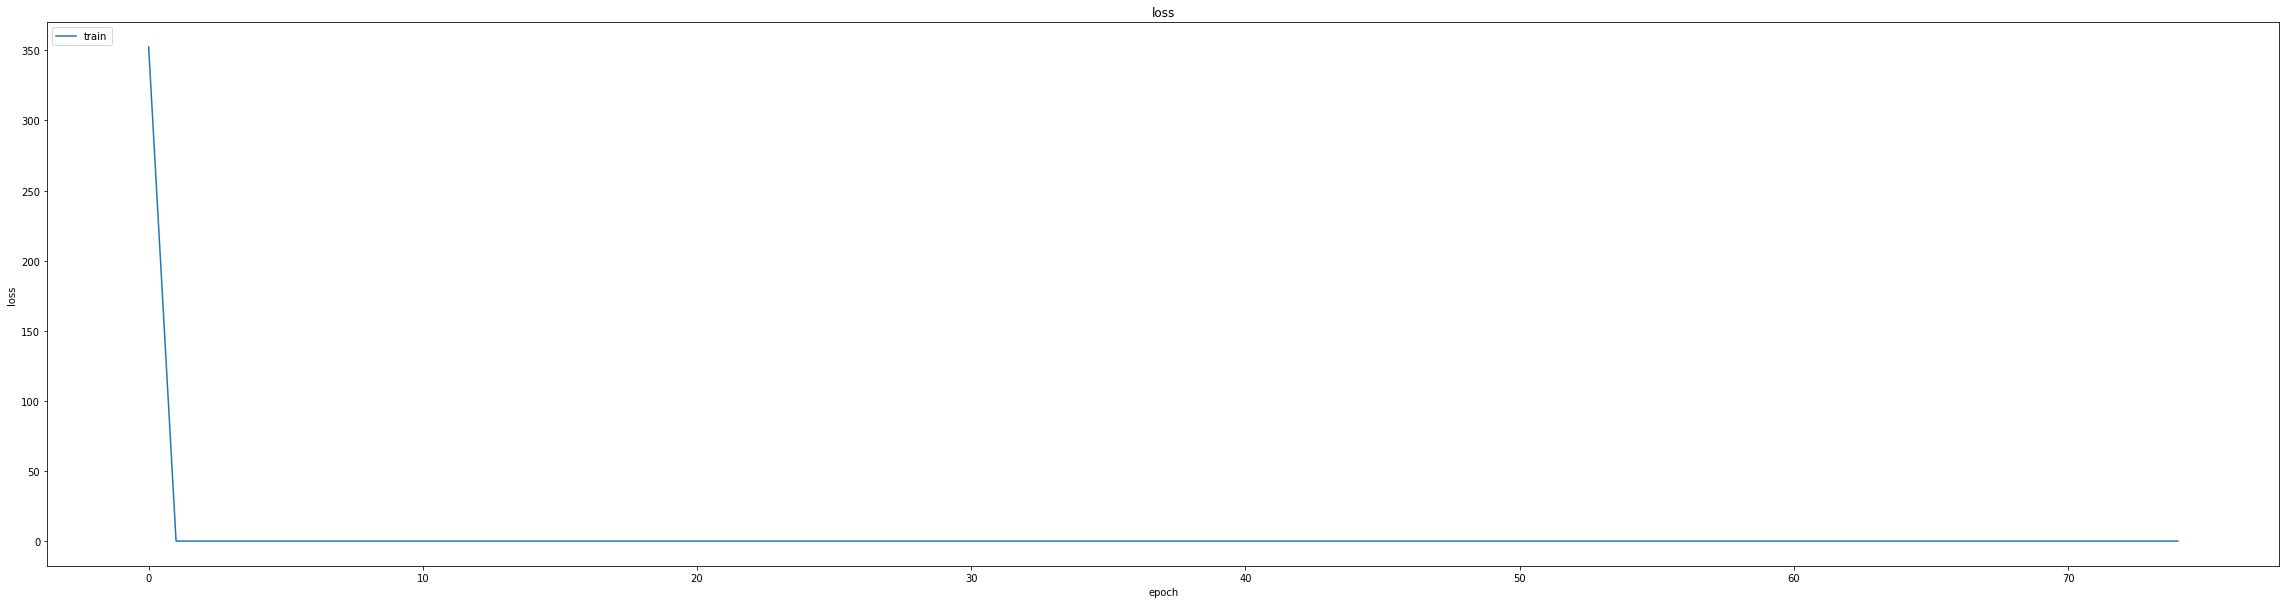

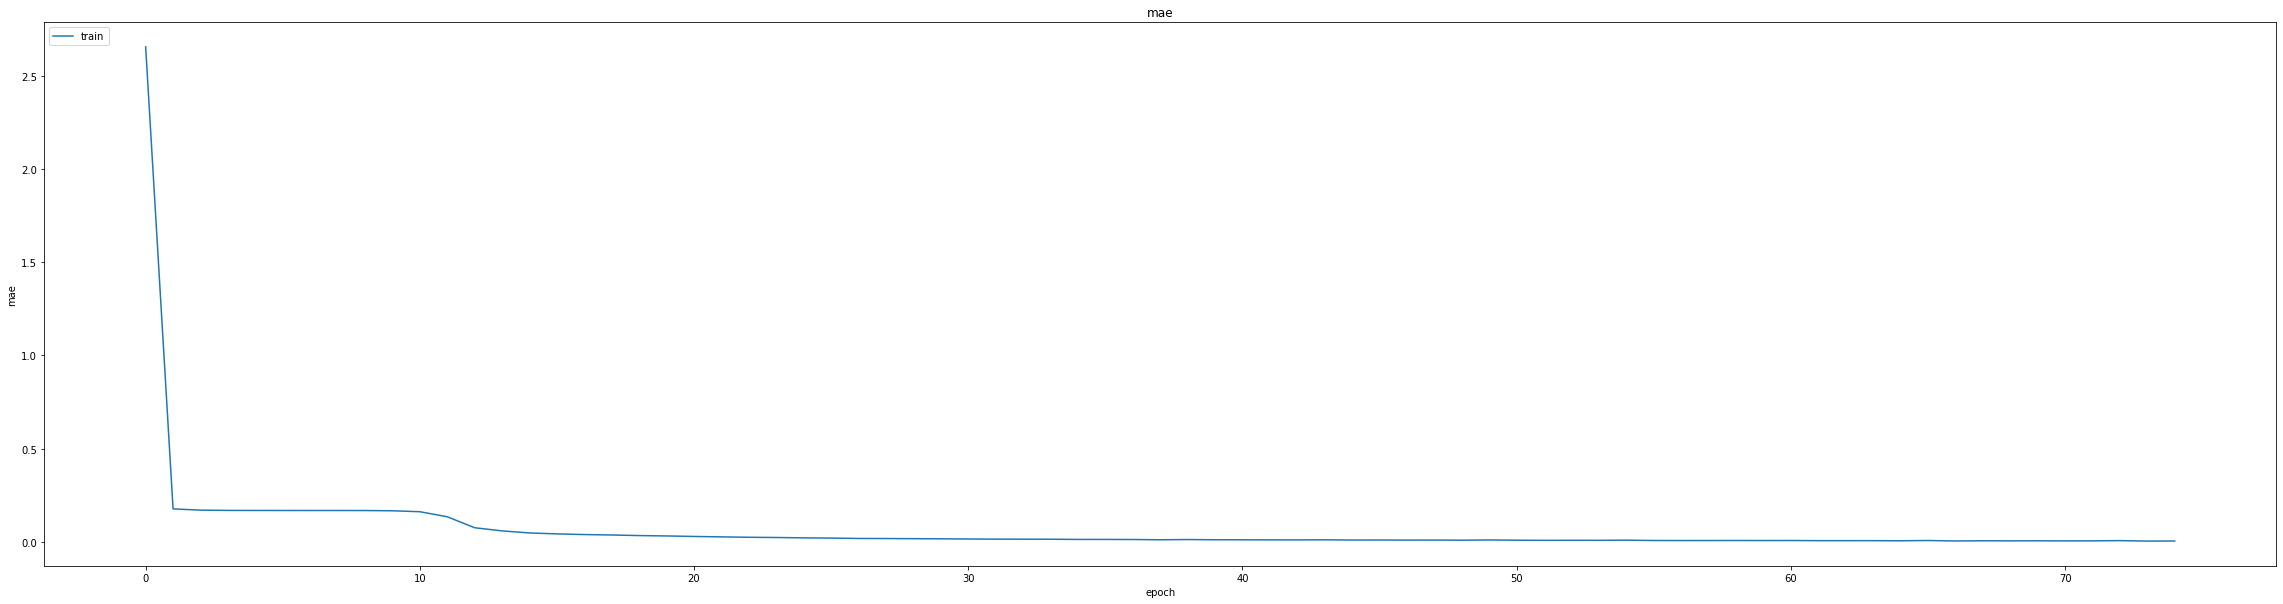

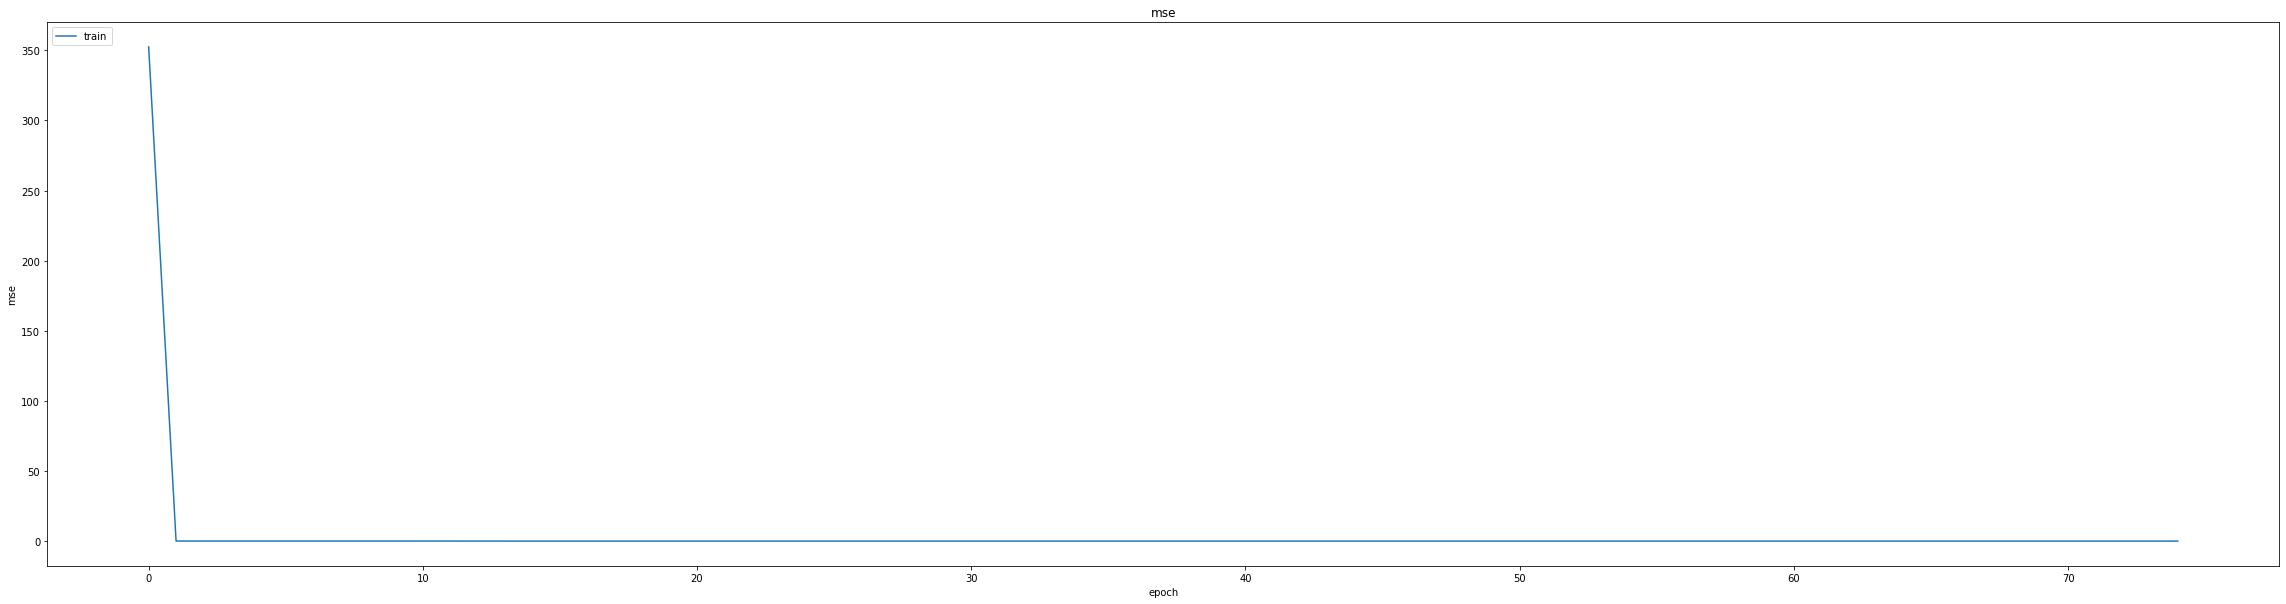

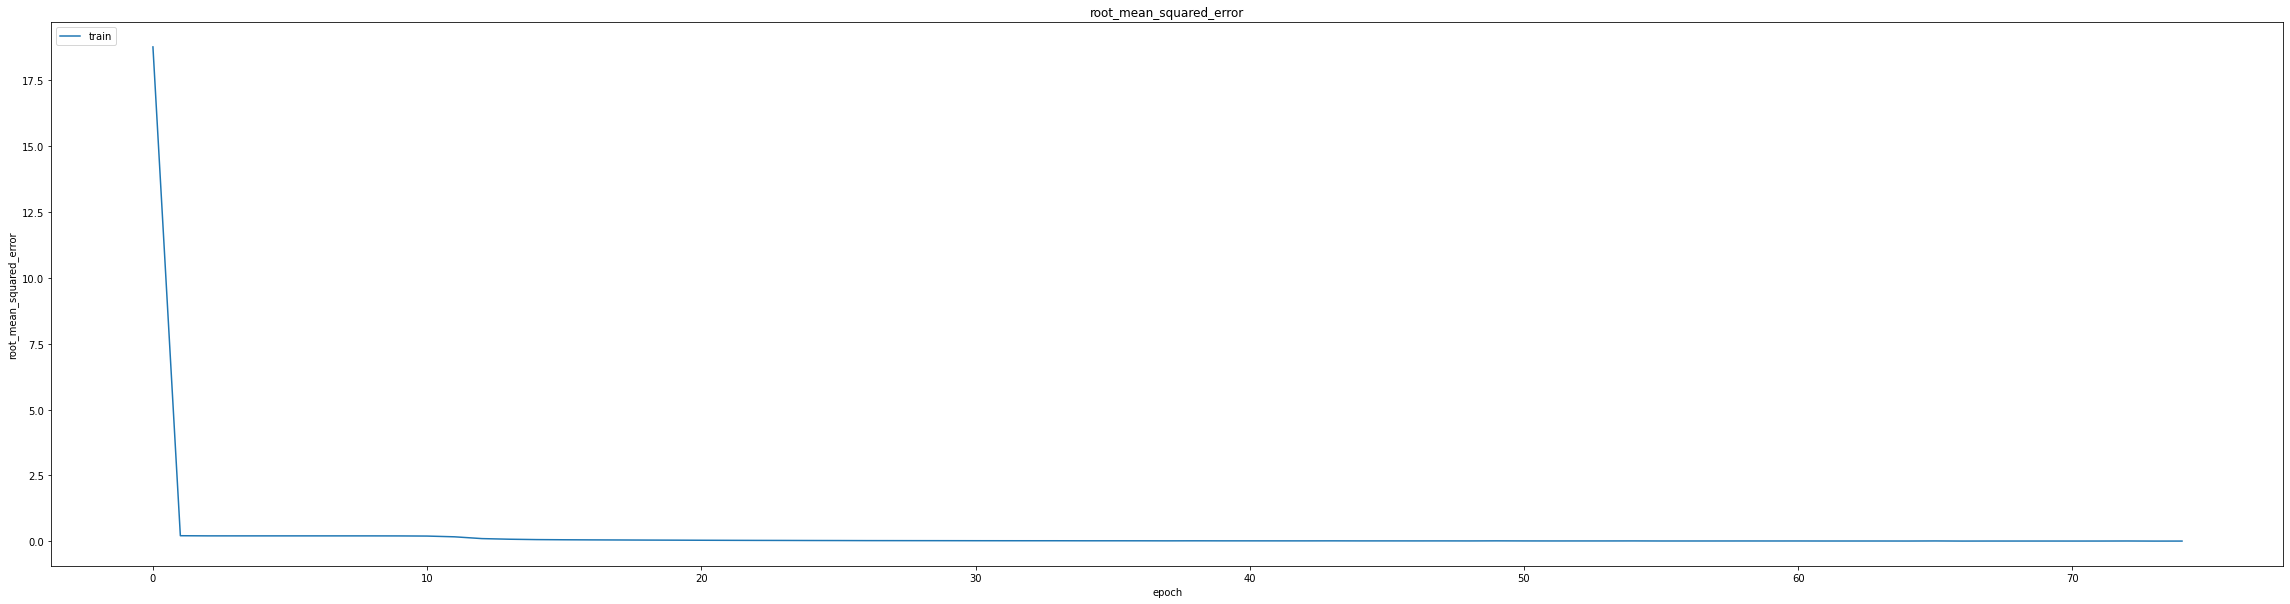

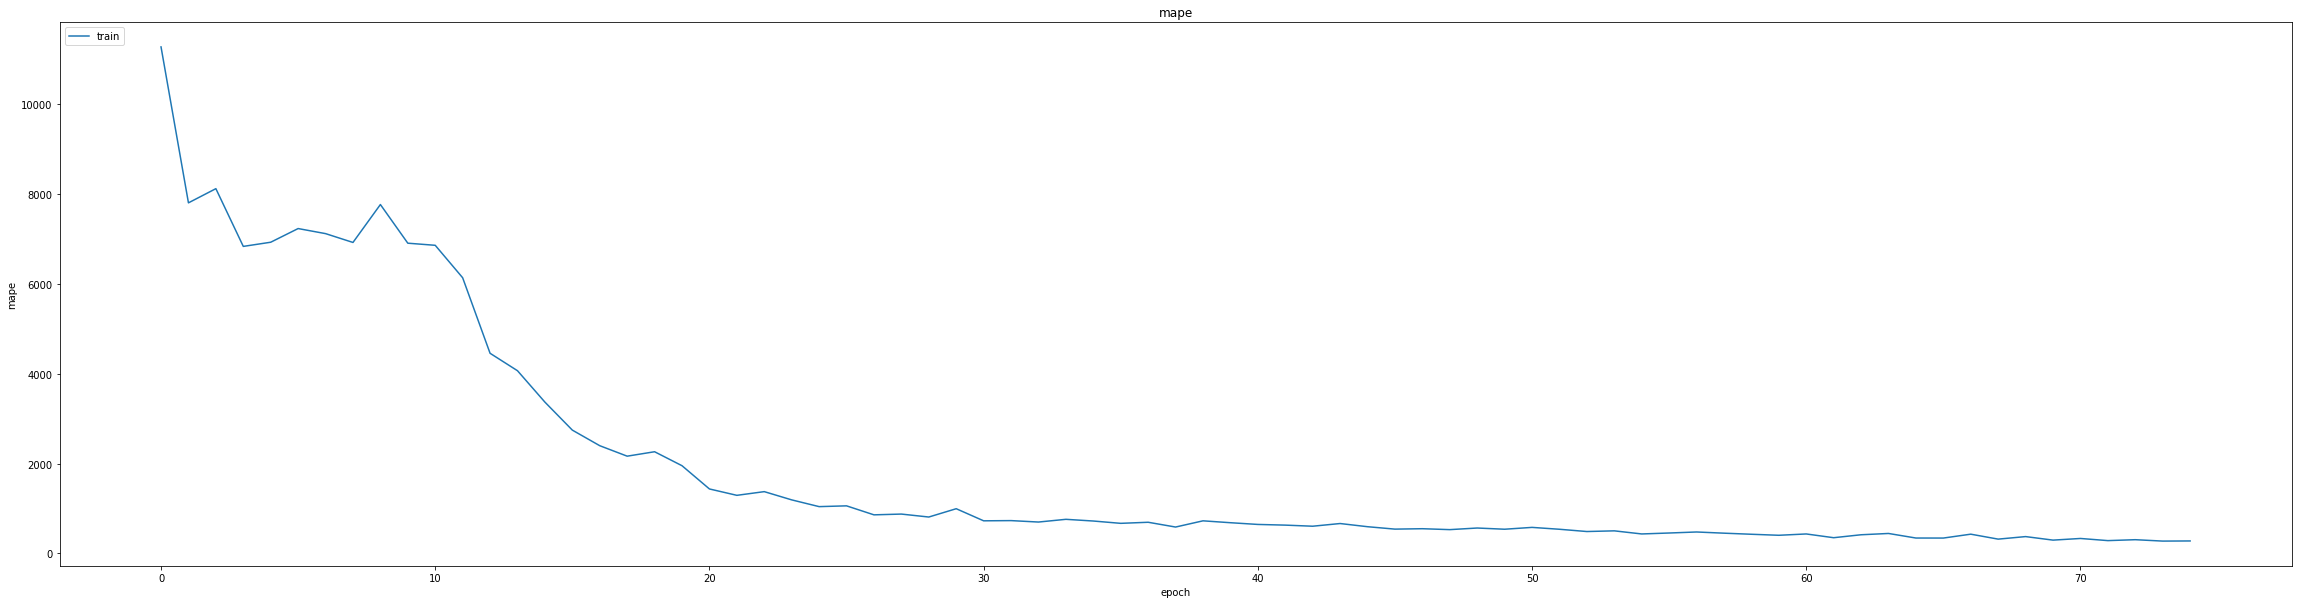

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013276374898850918
0.01791798509657383
348/348 [==============================] - 2s 4ms/step
0.9807615566621092


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


404/406 [============================>.] - ETA: 0s - loss: 1.9925e-04 - mae: 0.0060 - mse: 1.9925e-04 - root_mean_squared_error: 0.0141 - mape: 394.8830
Epoch 1: val_mse did not improve from 0.00032
406/406 [==============================] - 12s 17ms/step - loss: 1.9843e-04 - mae: 0.0060 - mse: 1.9843e-04 - root_mean_squared_error: 0.0141 - mape: 393.0284 - val_loss: 4.9325e-04 - val_mae: 0.0190 - val_mse: 4.9325e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 2294.6533 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 2.2429e-05 - mae: 0.0035 - mse: 2.2429e-05 - root_mean_squared_error: 0.0047 - mape: 261.1486
Epoch 2: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 12ms/step - loss: 2.2410e-05 - mae: 0.0035 - mse: 2.2410e-05 - root_mean_squared_error: 0.0047 - mape: 259.2845 - val_loss: 4.1419e-04 - val_mae: 0.0175 - val_mse: 4.1419e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 2672.2668 - lr: 0.0010
lr

406/406 [==============================] - 15s 38ms/step - loss: 3.2994e-05 - mae: 0.0043 - mse: 3.2994e-05 - root_mean_squared_error: 0.0057 - mape: 229.9769 - val_loss: 2.0719e-04 - val_mae: 0.0114 - val_mse: 2.0719e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 2378.1873 - lr: 8.1000e-04
Epoch 6/25
403/406 [============================>.] - ETA: 0s - loss: 3.5337e-05 - mae: 0.0044 - mse: 3.5337e-05 - root_mean_squared_error: 0.0059 - mape: 329.3841
Epoch 6: val_mse did not improve from 0.00021
406/406 [==============================] - 5s 12ms/step - loss: 3.5355e-05 - mae: 0.0044 - mse: 3.5355e-05 - root_mean_squared_error: 0.0059 - mape: 327.0273 - val_loss: 6.5604e-04 - val_mae: 0.0232 - val_mse: 6.5604e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 1816.1271 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
403/406 [============================>.] - ETA: 0s - loss: 3.4659e-05 - mae: 0.0042 - mse: 3.4659e-05 - root_mean_squared_error: 0.0059 - mape: 26

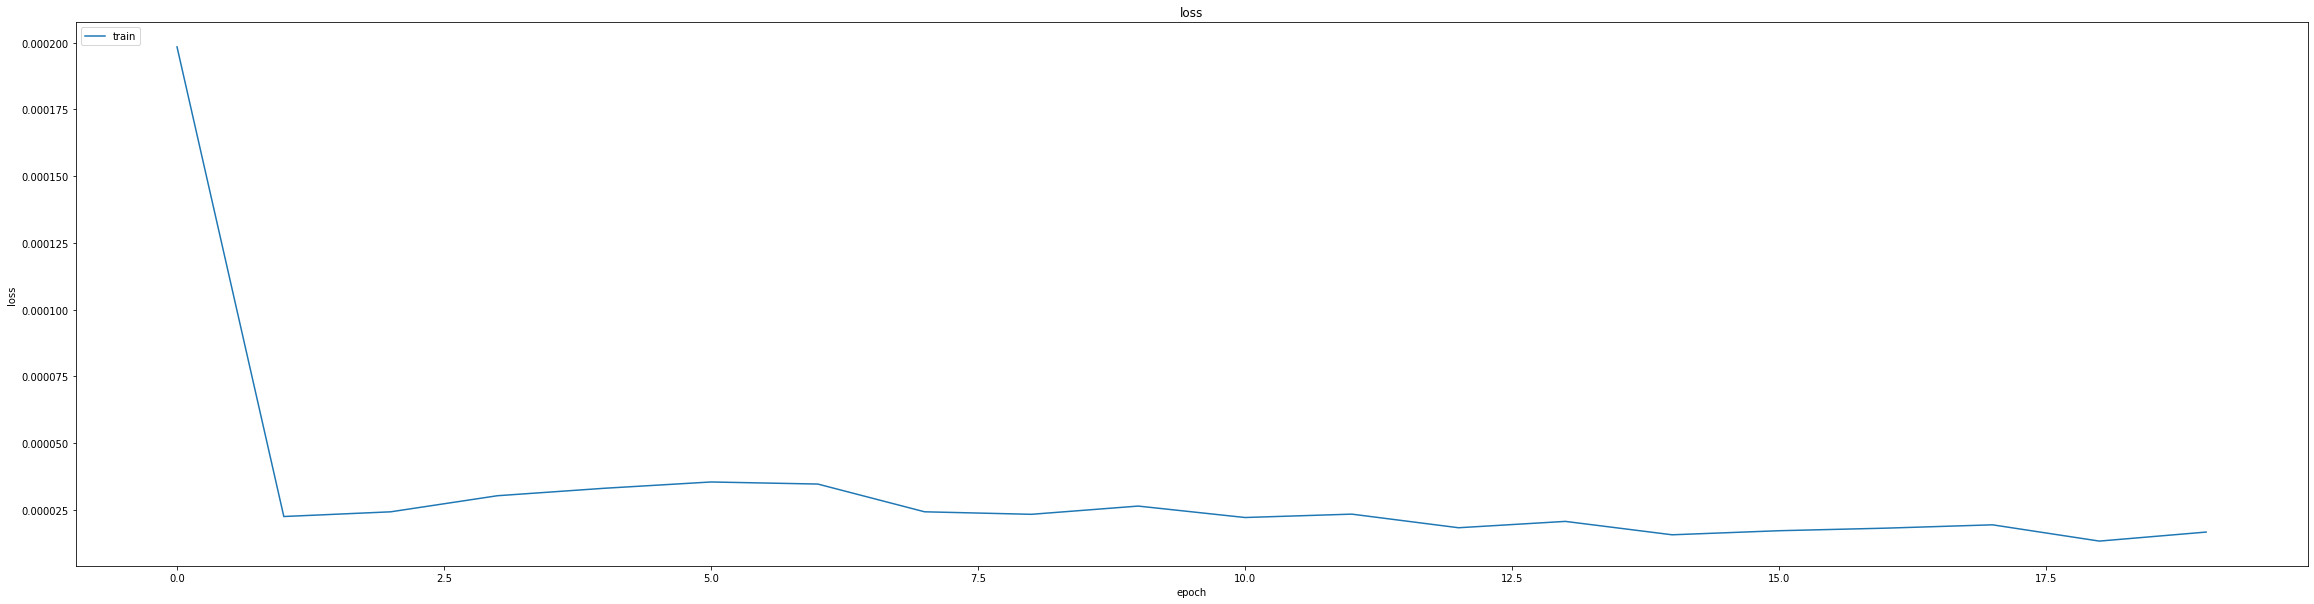

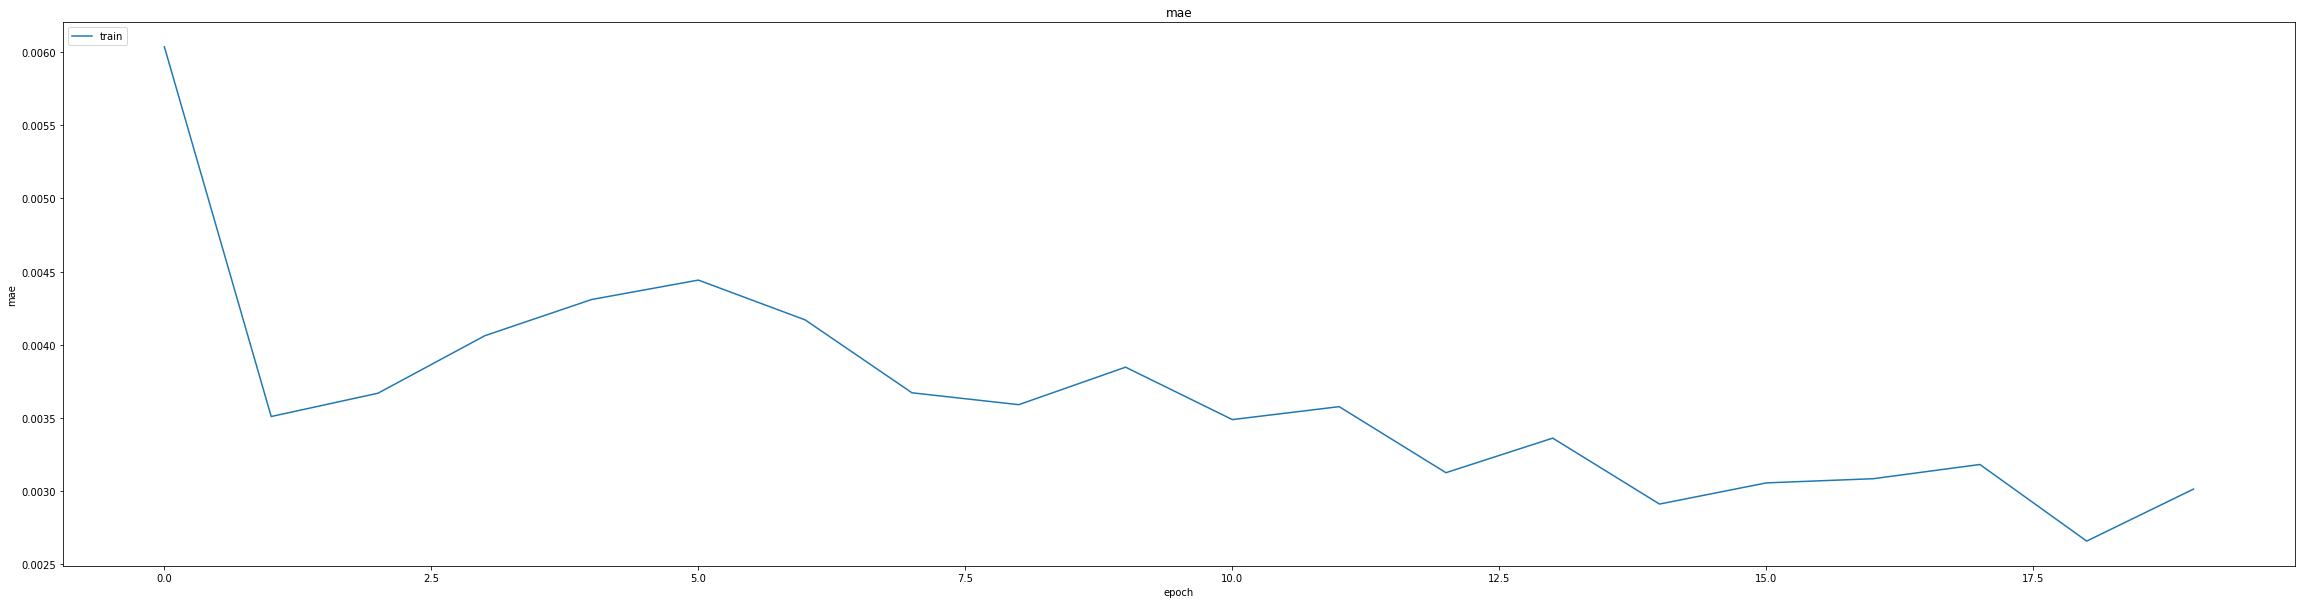

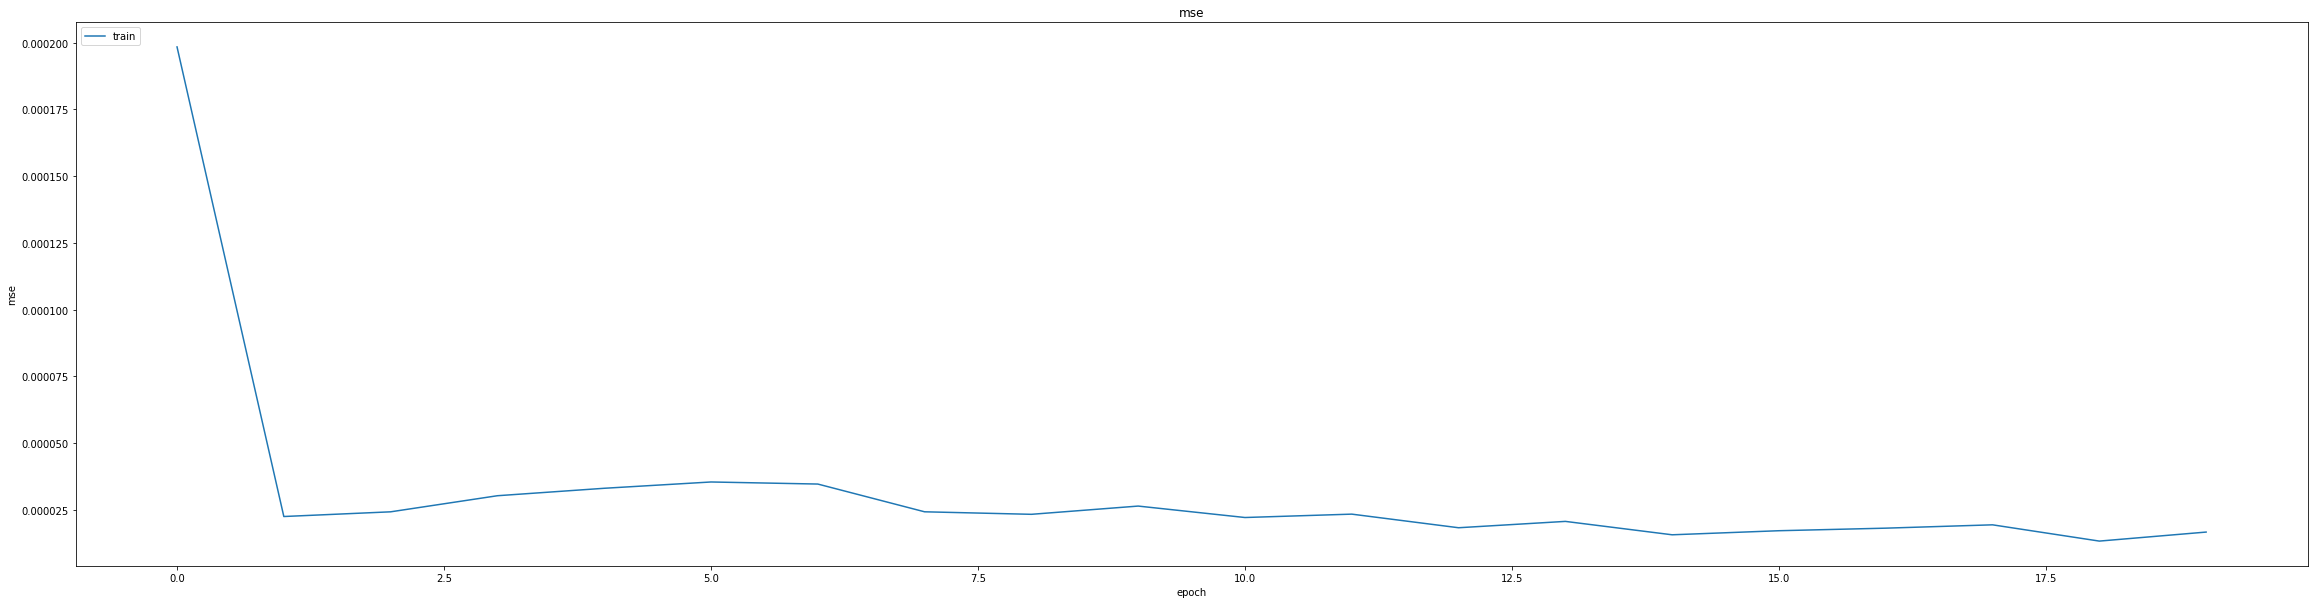

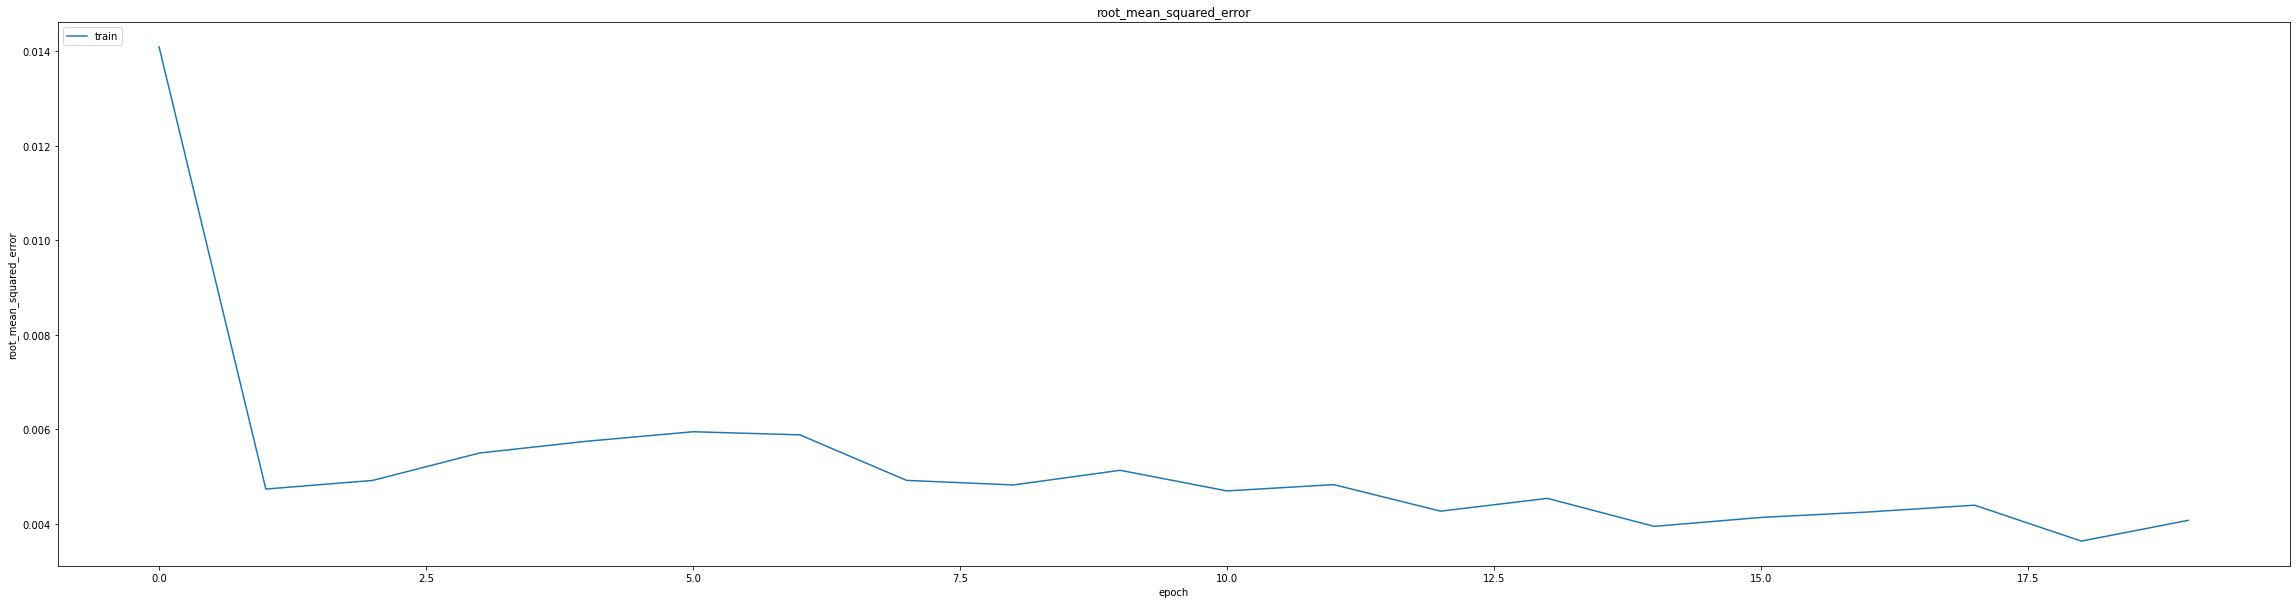

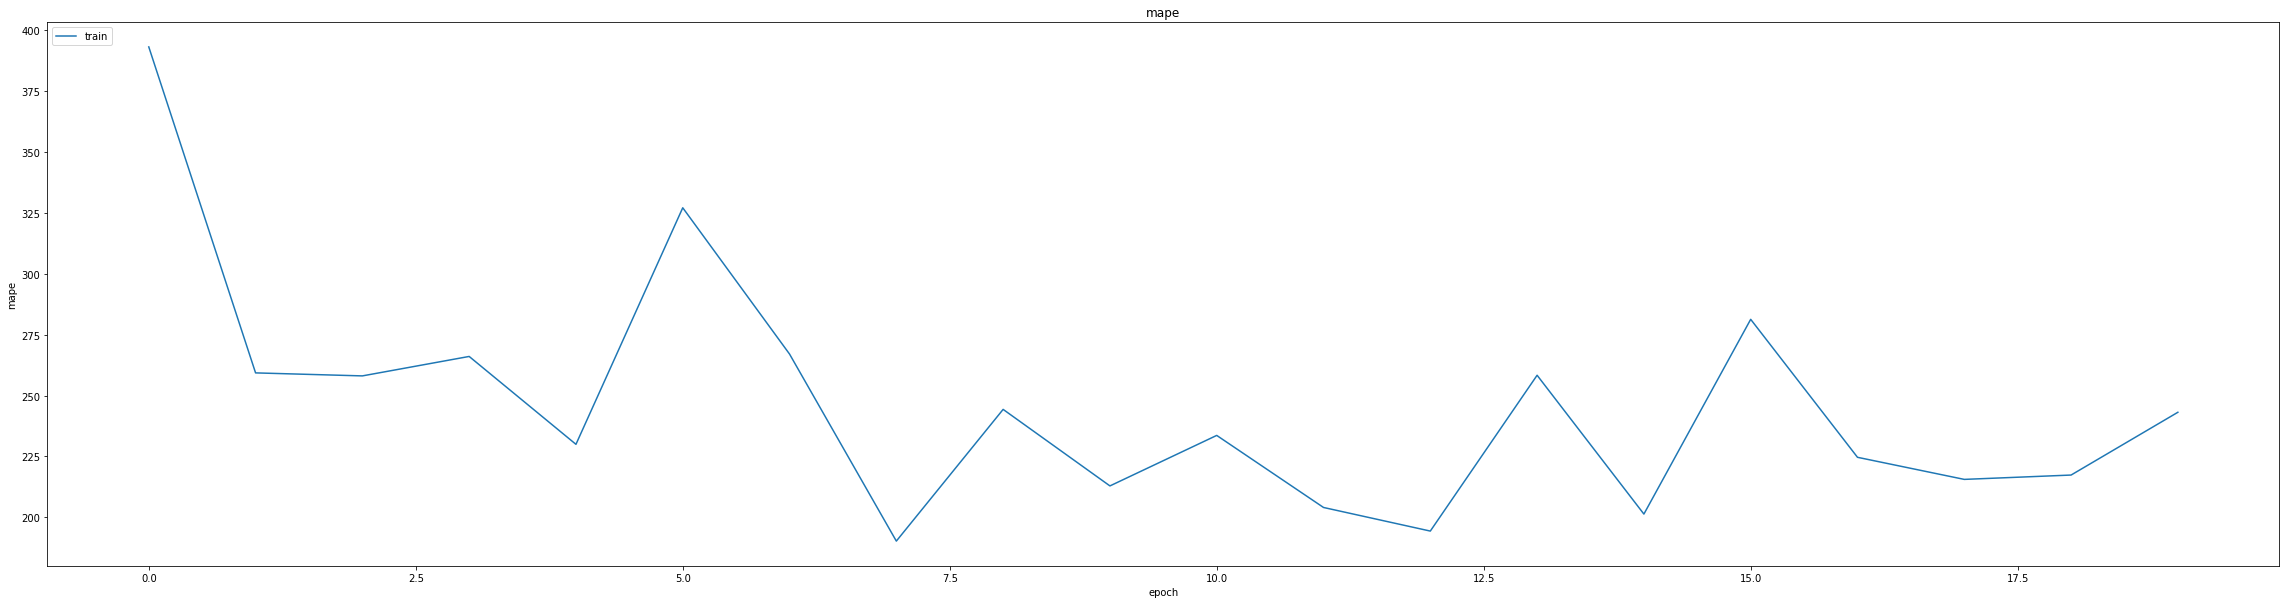

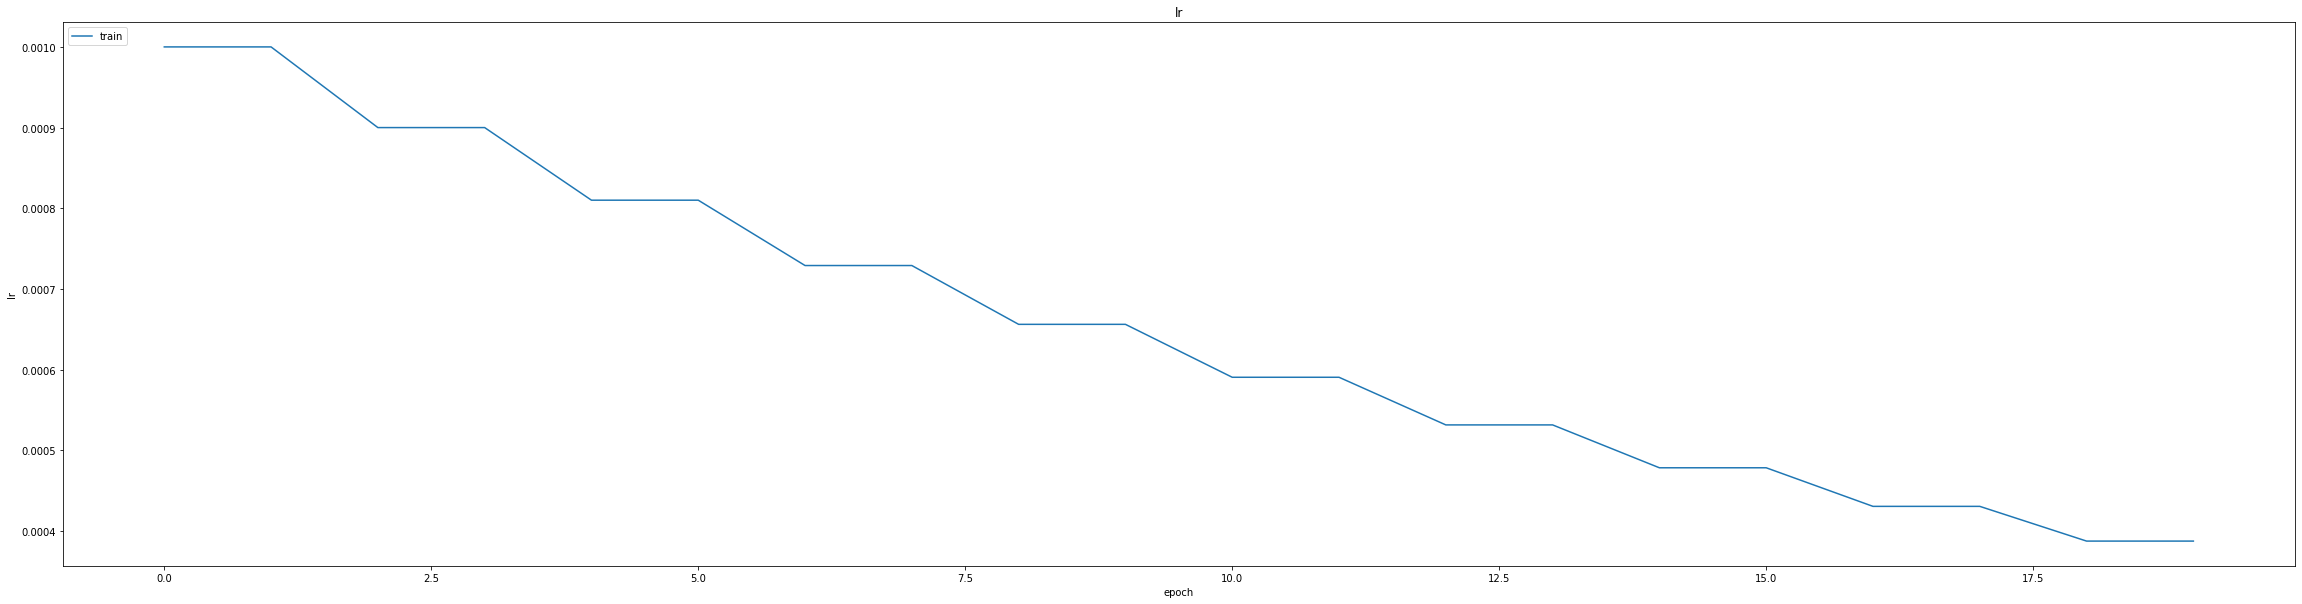

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011350744403898716
0.014394096098840237
348/348 [==============================] - 3s 6ms/step
0.984877775844798


348/348 [==============================] - 2s 4ms/step


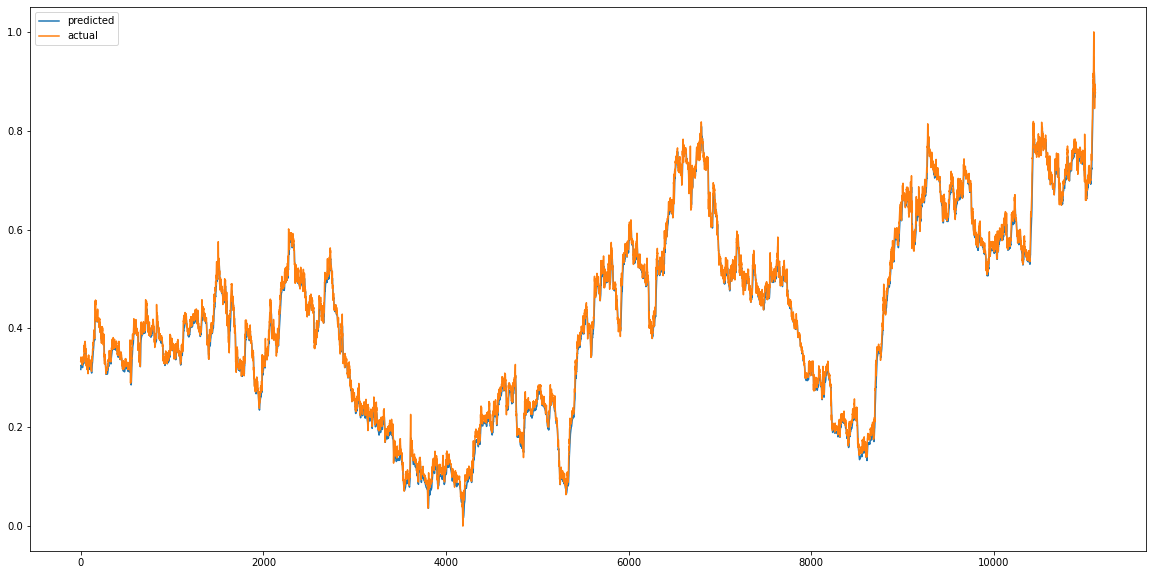

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


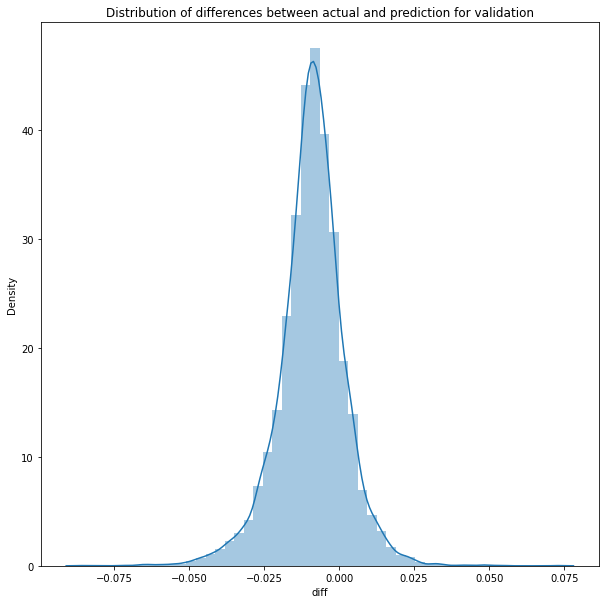

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


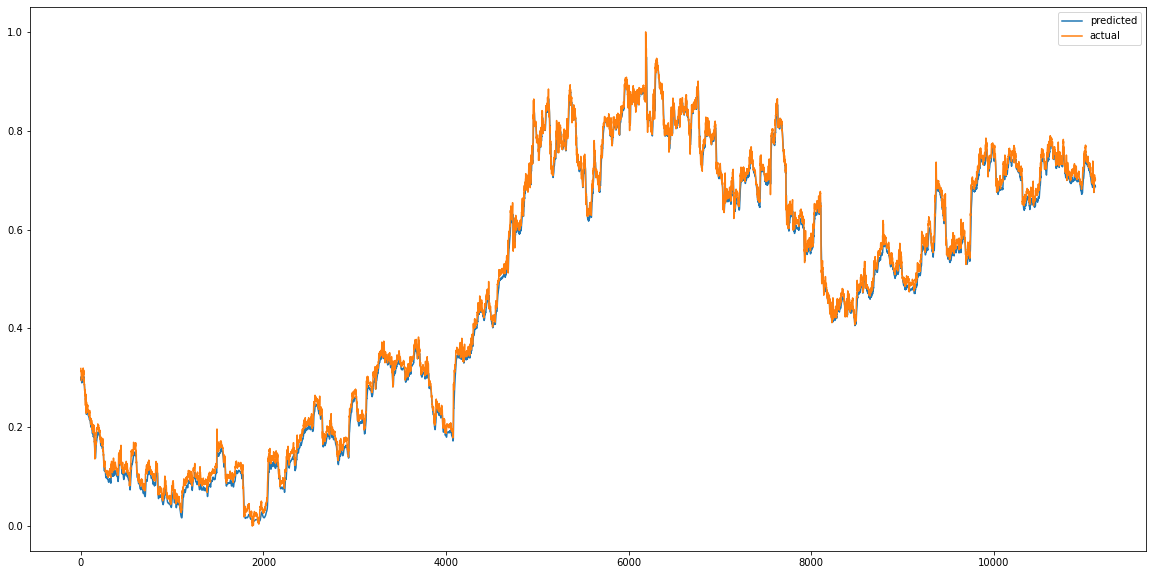

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


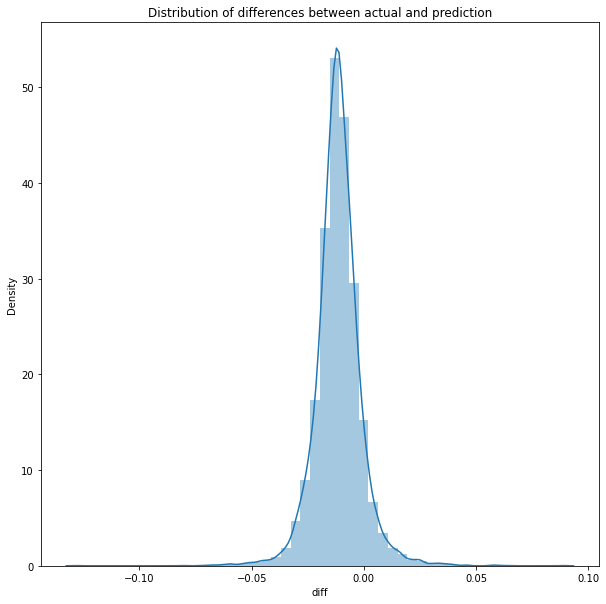

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00023626203269724825
RMSE :  0.015370817567626266
MAE :  0.01290430037989321
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9967396612063553


count    11115.000000
mean        -0.011462
std          0.010242
min         -0.127880
25%         -0.016619
50%         -0.011600
75%         -0.006345
max          0.088624
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 319.2123 - mae: 2.4349 - mse: 319.2123 - root_mean_squared_error: 17.8665 - mape: 5555.4756
Epoch 1: val_mse improved from inf to 0.08834, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 40s 77ms/step - loss: 319.2123 - mae: 2.4349 - mse: 319.2123 - root_mean_squared_error: 17.8665 - mape: 5555.4756 - val_loss: 0.0883 - val_mae: 0.2440 - val_mse: 0.0883 - val_root_mean_squared_error: 0.2972 - val_mape: 19037.4316
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 0.0561 - mae: 0.1745 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 5052.5166
Epoch 2: val_mse improved from 0.08834 to 0.05879, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 73ms/step - loss: 0.0561 - mae: 0.1745 - mse: 0.0561 - root_mean_squared_error: 0.2368 - mape: 5041.2354 - val_loss: 0.0588 - val_mae: 0.1973 - val_mse: 0.0588 - val_root_mean_squared_error: 0.2425 - val_mape: 26020.7070
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0397 - mae: 0.1622 - mse: 0.0397 - root_mean_squared_error: 0.1993 - mape: 7409.5742
Epoch 3: val_mse improved from 0.05879 to 0.02894, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 0.0397 - mae: 0.1622 - mse: 0.0397 - root_mean_squared_error: 0.1992 - mape: 7375.0117 - val_loss: 0.0289 - val_mae: 0.1396 - val_mse: 0.0289 - val_root_mean_squared_error: 0.1701 - val_mape: 28771.4434
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0240 - mae: 0.1262 - mse: 0.0240 - root_mean_squared_error: 0.1551 - mape: 5426.6348
Epoch 4: val_mse improved from 0.02894 to 0.00675, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 73ms/step - loss: 0.0240 - mae: 0.1262 - mse: 0.0240 - root_mean_squared_error: 0.1551 - mape: 5426.6348 - val_loss: 0.0068 - val_mae: 0.0666 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0822 - val_mape: 23491.6387
Epoch 5/75
404/406 [============================>.] - ETA: 0s - loss: 0.0130 - mae: 0.0897 - mse: 0.0130 - root_mean_squared_error: 0.1140 - mape: 4573.5576
Epoch 5: val_mse improved from 0.00675 to 0.00327, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0130 - mae: 0.0896 - mse: 0.0130 - root_mean_squared_error: 0.1139 - mape: 4552.2046 - val_loss: 0.0033 - val_mae: 0.0444 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mape: 20406.3340
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0080 - mae: 0.0694 - mse: 0.0080 - root_mean_squared_error: 0.0896 - mape: 4190.9590
Epoch 6: val_mse improved from 0.00327 to 0.00251, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0080 - mae: 0.0693 - mse: 0.0080 - root_mean_squared_error: 0.0896 - mape: 4161.2051 - val_loss: 0.0025 - val_mae: 0.0388 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 18157.4355
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0577 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 3878.9934
Epoch 7: val_mse improved from 0.00251 to 0.00145, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 75ms/step - loss: 0.0056 - mae: 0.0577 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 3878.9934 - val_loss: 0.0015 - val_mae: 0.0293 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 16237.5947
Epoch 8/75
406/406 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0506 - mse: 0.0043 - root_mean_squared_error: 0.0659 - mape: 4337.3403
Epoch 8: val_mse improved from 0.00145 to 0.00127, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0043 - mae: 0.0506 - mse: 0.0043 - root_mean_squared_error: 0.0659 - mape: 4337.3403 - val_loss: 0.0013 - val_mae: 0.0278 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 14749.2979
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0452 - mse: 0.0035 - root_mean_squared_error: 0.0592 - mape: 3134.6458
Epoch 9: val_mse improved from 0.00127 to 0.00108, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0035 - mae: 0.0452 - mse: 0.0035 - root_mean_squared_error: 0.0592 - mape: 3127.6238 - val_loss: 0.0011 - val_mae: 0.0258 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 13485.4414
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0405 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 2703.4094
Epoch 10: val_mse improved from 0.00108 to 0.00094, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 0.0028 - mae: 0.0405 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 2703.4094 - val_loss: 9.4405e-04 - val_mae: 0.0239 - val_mse: 9.4405e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 12296.6348
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0368 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 2565.7163
Epoch 11: val_mse improved from 0.00094 to 0.00094, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0023 - mae: 0.0368 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 2559.9099 - val_loss: 9.4200e-04 - val_mae: 0.0242 - val_mse: 9.4200e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 11519.5889
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 2071.2983
Epoch 12: val_mse improved from 0.00094 to 0.00074, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 75ms/step - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 2061.5828 - val_loss: 7.4204e-04 - val_mae: 0.0213 - val_mse: 7.4204e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 10657.6250
Epoch 13/75
406/406 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0302 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 2096.1931
Epoch 13: val_mse improved from 0.00074 to 0.00053, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 73ms/step - loss: 0.0016 - mae: 0.0302 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 2096.1931 - val_loss: 5.3032e-04 - val_mae: 0.0176 - val_mse: 5.3032e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 9578.2520
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 1896.4031
Epoch 14: val_mse did not improve from 0.00053
406/406 [==============================] - 7s 16ms/step - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 1896.4031 - val_loss: 7.8598e-04 - val_mae: 0.0226 - val_mse: 7.8598e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 8798.3887
Epoch 15/75
406/406 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 1849.8484
Epoch 15: val_mse improved from 0.00053 to 0.00050, saving model to /content/drive/MyDri

406/406 [==============================] - 29s 72ms/step - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 1849.8484 - val_loss: 5.0417e-04 - val_mae: 0.0174 - val_mse: 5.0417e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 7985.4409
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 9.3346e-04 - mae: 0.0235 - mse: 9.3346e-04 - root_mean_squared_error: 0.0306 - mape: 1439.9821
Epoch 16: val_mse did not improve from 0.00050
406/406 [==============================] - 7s 16ms/step - loss: 9.3298e-04 - mae: 0.0235 - mse: 9.3298e-04 - root_mean_squared_error: 0.0305 - mape: 1436.7551 - val_loss: 5.5438e-04 - val_mae: 0.0184 - val_mse: 5.5438e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 7412.9365
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 8.0866e-04 - mae: 0.0220 - mse: 8.0866e-04 - root_mean_squared_error: 0.0284 - mape: 1444.4463
Epoch 17: val_mse improved from 0.00050 to 0.00048, saving model

406/406 [==============================] - 30s 74ms/step - loss: 8.0808e-04 - mae: 0.0219 - mse: 8.0808e-04 - root_mean_squared_error: 0.0284 - mape: 1437.6709 - val_loss: 4.8416e-04 - val_mae: 0.0169 - val_mse: 4.8416e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 7014.4263
Epoch 18/75
406/406 [==============================] - ETA: 0s - loss: 6.9625e-04 - mae: 0.0204 - mse: 6.9625e-04 - root_mean_squared_error: 0.0264 - mape: 1370.9640
Epoch 18: val_mse improved from 0.00048 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 6.9625e-04 - mae: 0.0204 - mse: 6.9625e-04 - root_mean_squared_error: 0.0264 - mape: 1370.9640 - val_loss: 4.5330e-04 - val_mae: 0.0163 - val_mse: 4.5330e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 6637.6851
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 5.9154e-04 - mae: 0.0187 - mse: 5.9154e-04 - root_mean_squared_error: 0.0243 - mape: 1194.6260
Epoch 19: val_mse did not improve from 0.00045
406/406 [==============================] - 6s 16ms/step - loss: 5.9154e-04 - mae: 0.0187 - mse: 5.9154e-04 - root_mean_squared_error: 0.0243 - mape: 1194.6260 - val_loss: 4.8331e-04 - val_mae: 0.0170 - val_mse: 4.8331e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 6296.0625
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 4.9934e-04 - mae: 0.0172 - mse: 4.9934e-04 - root_mean_squared_error: 0.0223 - mape: 1131.1600
Epoch 20: val_mse improved from 0.00045 to 0.00040, savi

406/406 [==============================] - 29s 71ms/step - loss: 4.9934e-04 - mae: 0.0172 - mse: 4.9934e-04 - root_mean_squared_error: 0.0223 - mape: 1131.1600 - val_loss: 3.9546e-04 - val_mae: 0.0147 - val_mse: 3.9546e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 5798.1265
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 4.2420e-04 - mae: 0.0159 - mse: 4.2420e-04 - root_mean_squared_error: 0.0206 - mape: 1071.5059
Epoch 21: val_mse did not improve from 0.00040
406/406 [==============================] - 7s 16ms/step - loss: 4.2420e-04 - mae: 0.0159 - mse: 4.2420e-04 - root_mean_squared_error: 0.0206 - mape: 1071.5059 - val_loss: 4.0419e-04 - val_mae: 0.0146 - val_mse: 4.0419e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 5478.0771
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 3.6467e-04 - mae: 0.0147 - mse: 3.6467e-04 - root_mean_squared_error: 0.0191 - mape: 945.6424
Epoch 22: val_mse did not improve from 0.00040
406/406 [=

406/406 [==============================] - 30s 74ms/step - loss: 2.0173e-04 - mae: 0.0109 - mse: 2.0173e-04 - root_mean_squared_error: 0.0142 - mape: 765.9211 - val_loss: 3.7873e-04 - val_mae: 0.0145 - val_mse: 3.7873e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 4379.6162
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 1.7343e-04 - mae: 0.0101 - mse: 1.7343e-04 - root_mean_squared_error: 0.0132 - mape: 682.9957
Epoch 27: val_mse did not improve from 0.00038
406/406 [==============================] - 7s 16ms/step - loss: 1.7343e-04 - mae: 0.0101 - mse: 1.7343e-04 - root_mean_squared_error: 0.0132 - mape: 682.9957 - val_loss: 6.2372e-04 - val_mae: 0.0183 - val_mse: 6.2372e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 4161.2163
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 1.5509e-04 - mae: 0.0095 - mse: 1.5509e-04 - root_mean_squared_error: 0.0125 - mape: 691.7639
Epoch 28: val_mse did not improve from 0.00038
406/406 [====

406/406 [==============================] - 29s 71ms/step - loss: 1.3581e-04 - mae: 0.0089 - mse: 1.3581e-04 - root_mean_squared_error: 0.0117 - mape: 595.6624 - val_loss: 3.6385e-04 - val_mae: 0.0139 - val_mse: 3.6385e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 4069.3877
Epoch 30/75
405/406 [============================>.] - ETA: 0s - loss: 1.2276e-04 - mae: 0.0085 - mse: 1.2276e-04 - root_mean_squared_error: 0.0111 - mape: 560.6720
Epoch 30: val_mse improved from 0.00036 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 1.2270e-04 - mae: 0.0085 - mse: 1.2270e-04 - root_mean_squared_error: 0.0111 - mape: 559.4065 - val_loss: 3.6148e-04 - val_mae: 0.0139 - val_mse: 3.6148e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 4065.7422
Epoch 31/75
404/406 [============================>.] - ETA: 0s - loss: 1.1897e-04 - mae: 0.0083 - mse: 1.1897e-04 - root_mean_squared_error: 0.0109 - mape: 590.0121
Epoch 31: val_mse did not improve from 0.00036
406/406 [==============================] - 6s 16ms/step - loss: 1.1885e-04 - mae: 0.0083 - mse: 1.1885e-04 - root_mean_squared_error: 0.0109 - mape: 587.2382 - val_loss: 4.5823e-04 - val_mae: 0.0157 - val_mse: 4.5823e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 3878.1199
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 1.0613e-04 - mae: 0.0079 - mse: 1.0613e-04 - root_mean_squared_error: 0.0103 - mape: 498.4365
Epoch 32: val_mse did not improve from 0.00036
406/406 [====

406/406 [==============================] - 30s 74ms/step - loss: 8.9321e-05 - mae: 0.0072 - mse: 8.9321e-05 - root_mean_squared_error: 0.0095 - mape: 488.9679 - val_loss: 3.0179e-04 - val_mae: 0.0126 - val_mse: 3.0179e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 3797.6963
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 8.9582e-05 - mae: 0.0072 - mse: 8.9582e-05 - root_mean_squared_error: 0.0095 - mape: 471.3680
Epoch 36: val_mse improved from 0.00030 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 8.9700e-05 - mae: 0.0072 - mse: 8.9700e-05 - root_mean_squared_error: 0.0095 - mape: 469.1540 - val_loss: 2.6515e-04 - val_mae: 0.0119 - val_mse: 2.6515e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 3691.0454
Epoch 37/75
403/406 [============================>.] - ETA: 0s - loss: 7.9927e-05 - mae: 0.0068 - mse: 7.9927e-05 - root_mean_squared_error: 0.0089 - mape: 473.4589
Epoch 37: val_mse improved from 0.00027 to 0.00024, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 73ms/step - loss: 8.0573e-05 - mae: 0.0068 - mse: 8.0573e-05 - root_mean_squared_error: 0.0090 - mape: 470.0818 - val_loss: 2.4213e-04 - val_mae: 0.0116 - val_mse: 2.4213e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 3851.9612
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 8.2720e-05 - mae: 0.0069 - mse: 8.2720e-05 - root_mean_squared_error: 0.0091 - mape: 454.2027
Epoch 38: val_mse did not improve from 0.00024
406/406 [==============================] - 7s 17ms/step - loss: 8.2573e-05 - mae: 0.0069 - mse: 8.2573e-05 - root_mean_squared_error: 0.0091 - mape: 452.0637 - val_loss: 3.6393e-04 - val_mae: 0.0142 - val_mse: 3.6393e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 3703.5938
Epoch 39/75
406/406 [==============================] - ETA: 0s - loss: 6.8120e-05 - mae: 0.0062 - mse: 6.8120e-05 - root_mean_squared_error: 0.0083 - mape: 444.6878
Epoch 39: val_mse did not improve from 0.00024
406/406 [====

406/406 [==============================] - 30s 73ms/step - loss: 6.2040e-05 - mae: 0.0056 - mse: 6.2040e-05 - root_mean_squared_error: 0.0079 - mape: 445.3114 - val_loss: 1.9519e-04 - val_mae: 0.0108 - val_mse: 1.9519e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 3100.3376
Epoch 59/75
403/406 [============================>.] - ETA: 0s - loss: 1.3367e-04 - mae: 0.0076 - mse: 1.3367e-04 - root_mean_squared_error: 0.0116 - mape: 442.0697
Epoch 59: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 31s 78ms/step - loss: 1.3333e-04 - mae: 0.0076 - mse: 1.3333e-04 - root_mean_squared_error: 0.0115 - mape: 438.9094 - val_loss: 1.6714e-04 - val_mae: 0.0099 - val_mse: 1.6714e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 3385.8381
Epoch 60/75
404/406 [============================>.] - ETA: 0s - loss: 5.4299e-05 - mae: 0.0053 - mse: 5.4299e-05 - root_mean_squared_error: 0.0074 - mape: 355.2387
Epoch 60: val_mse did not improve from 0.00017
406/406 [==============================] - 7s 16ms/step - loss: 5.4264e-05 - mae: 0.0053 - mse: 5.4264e-05 - root_mean_squared_error: 0.0074 - mape: 353.5833 - val_loss: 6.0453e-04 - val_mae: 0.0219 - val_mse: 6.0453e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 3033.1294
Epoch 61/75
406/406 [==============================] - ETA: 0s - loss: 1.0935e-04 - mae: 0.0070 - mse: 1.0935e-04 - root_mean_squared_error: 0.0105 - mape: 332.3666
Epoch 61: val_mse did not improve from 0.00017
406/406 [====

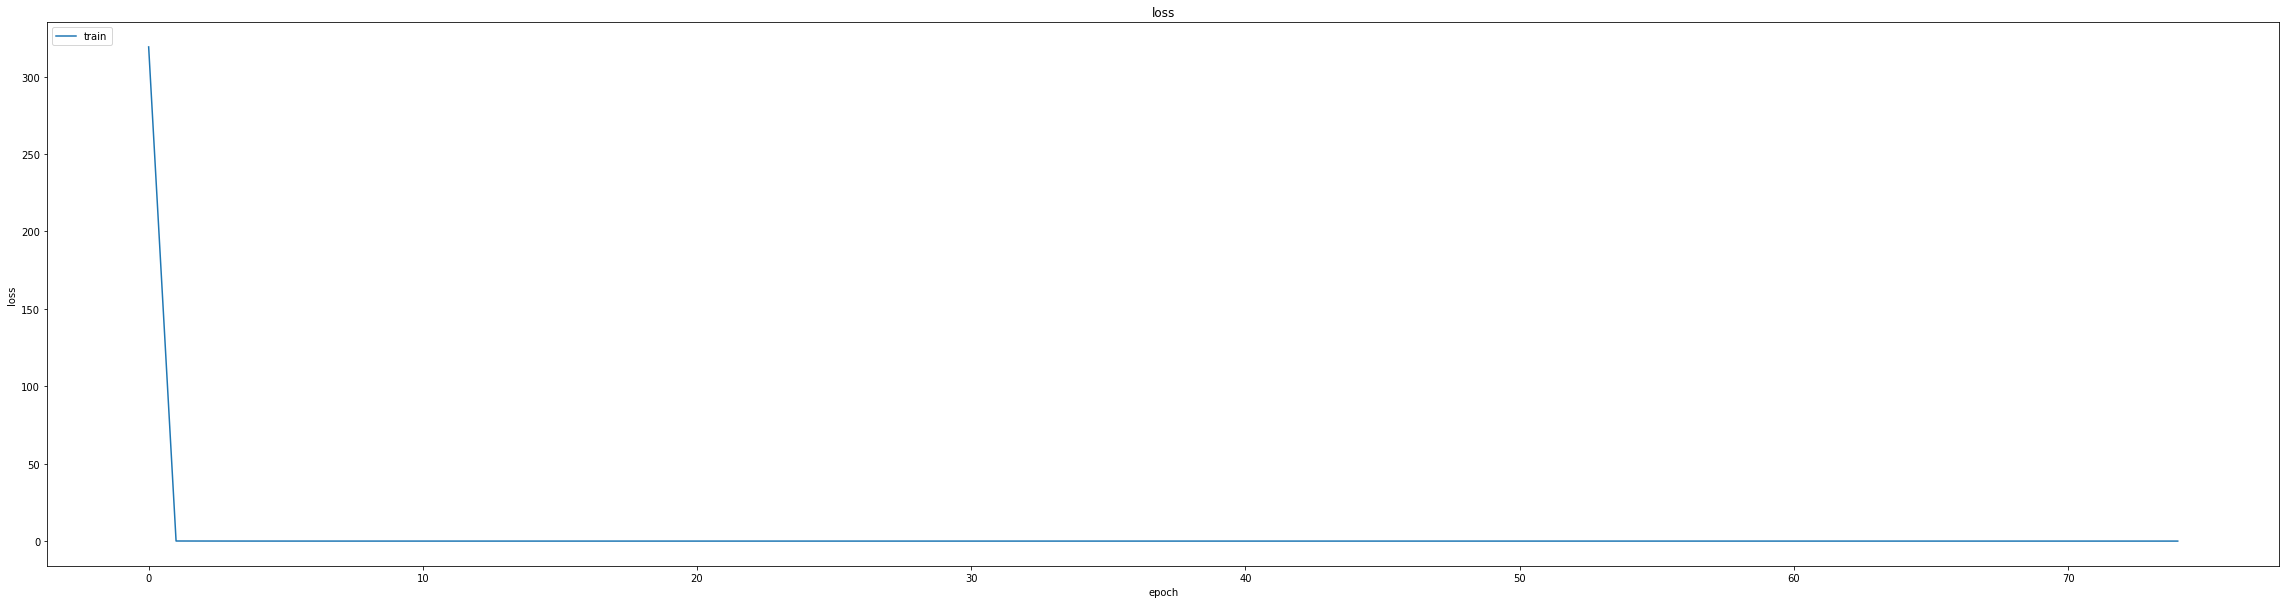

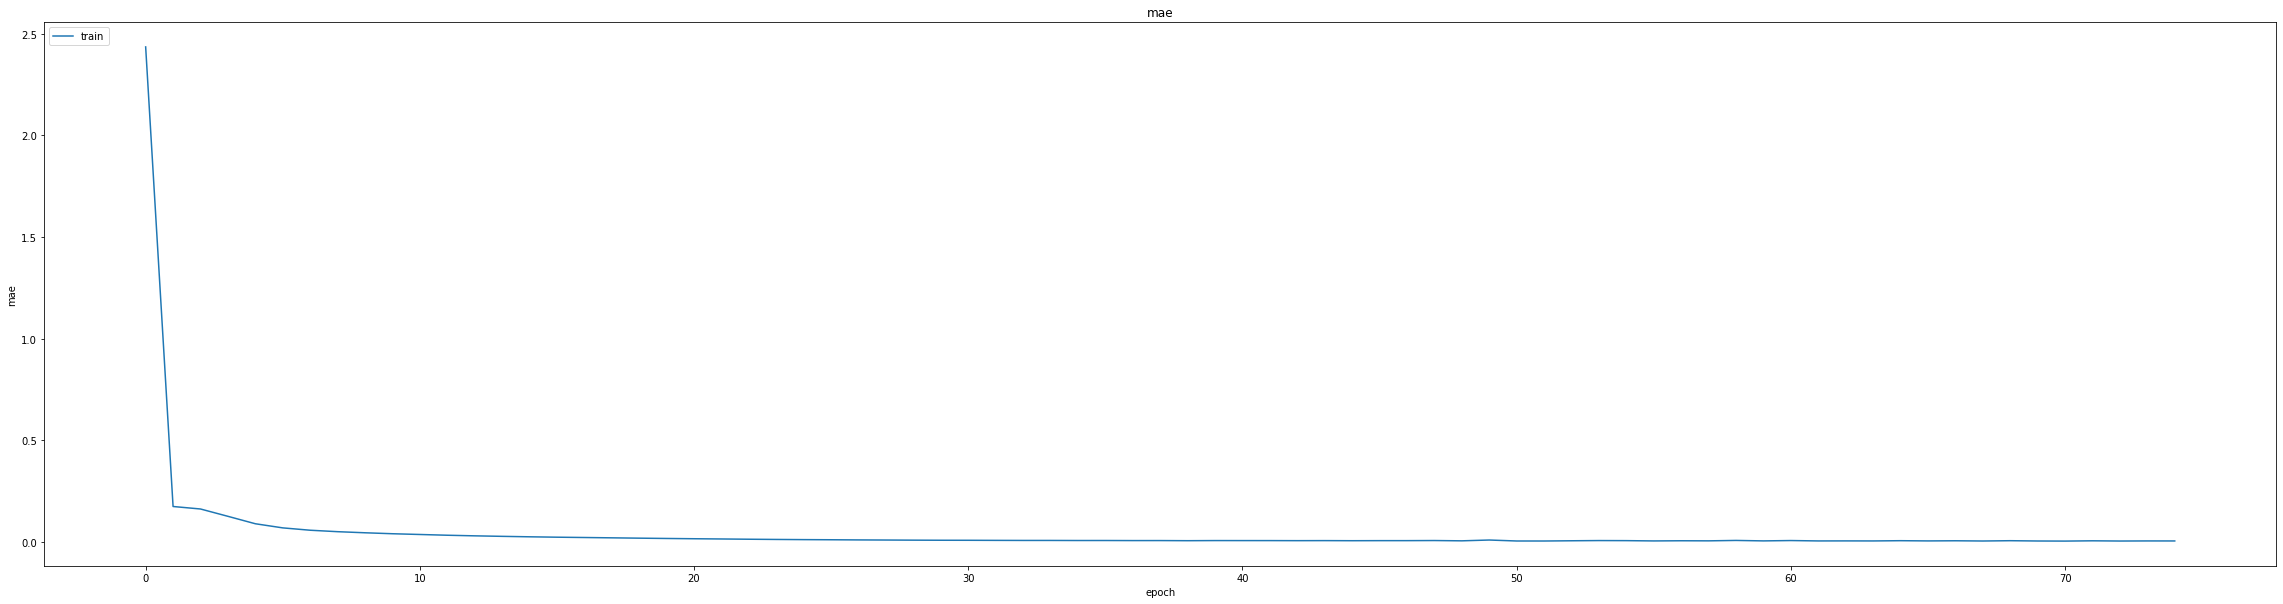

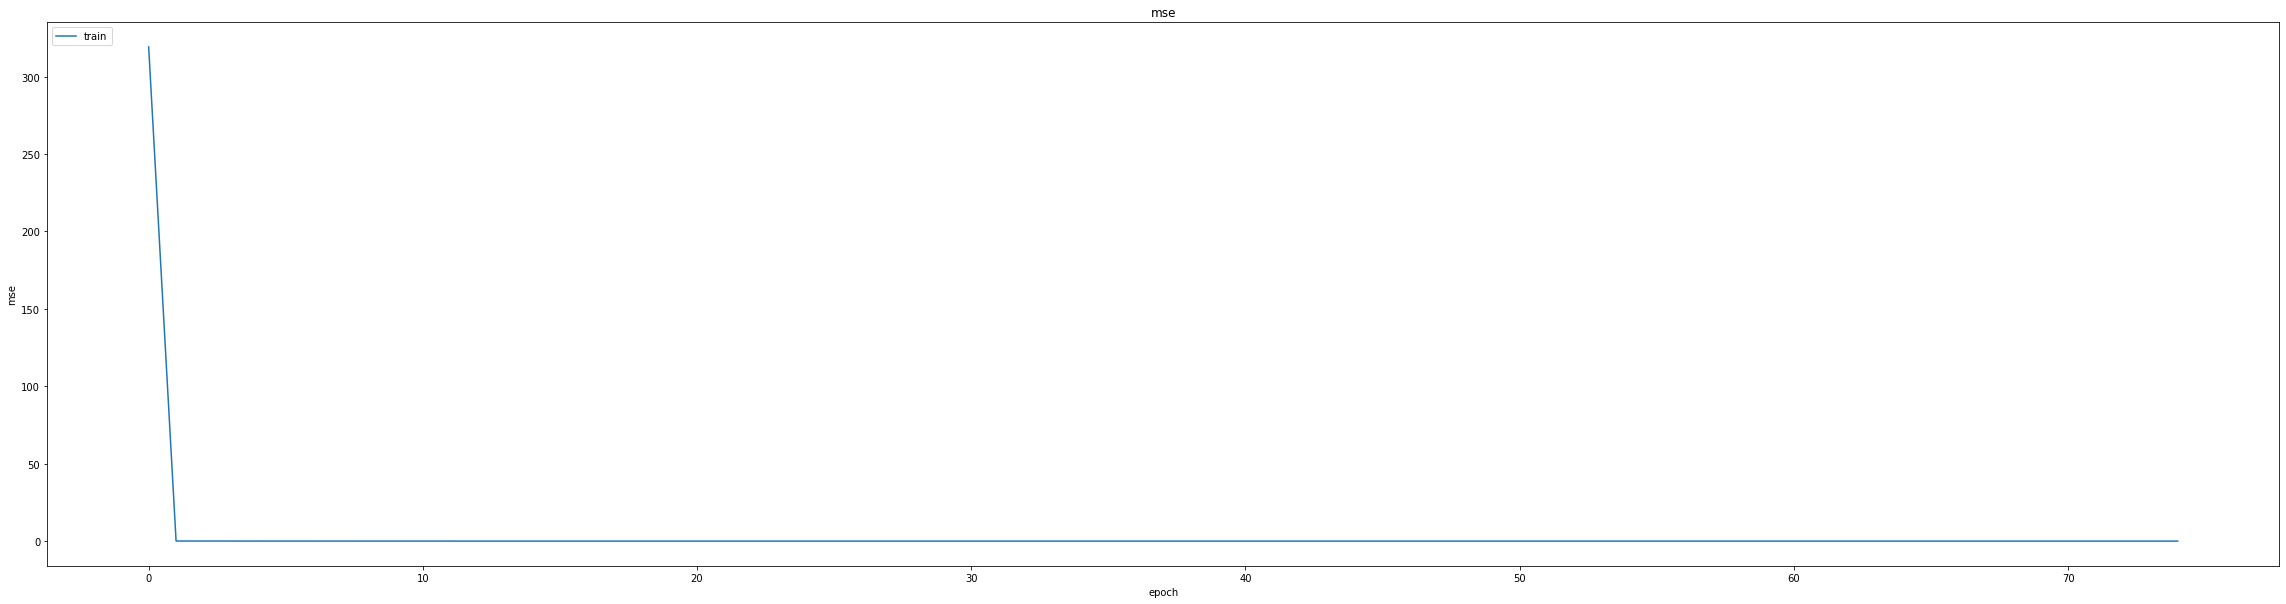

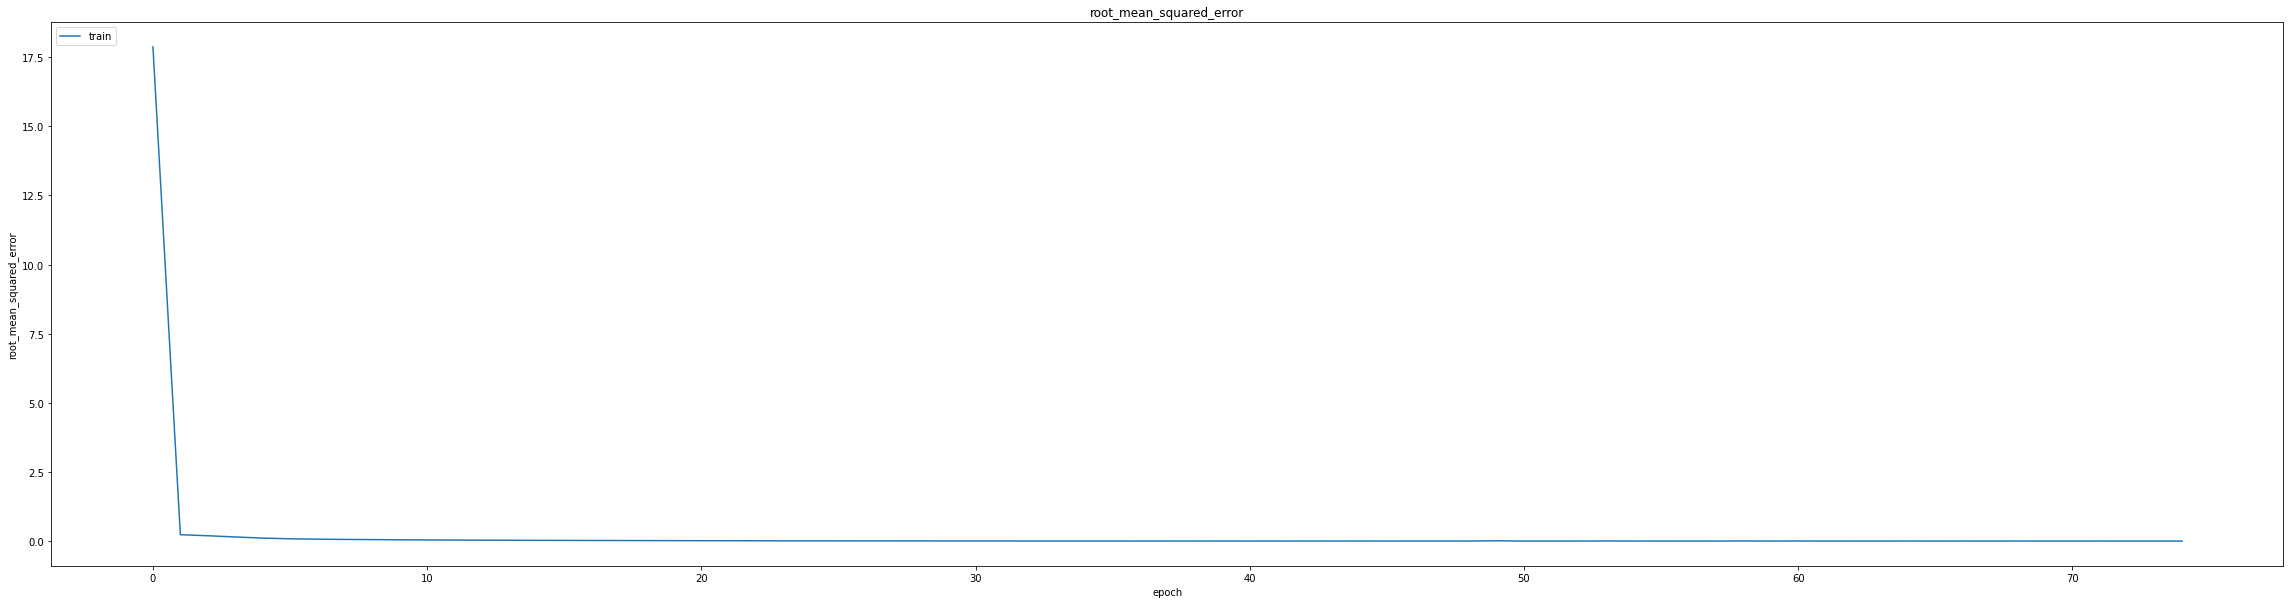

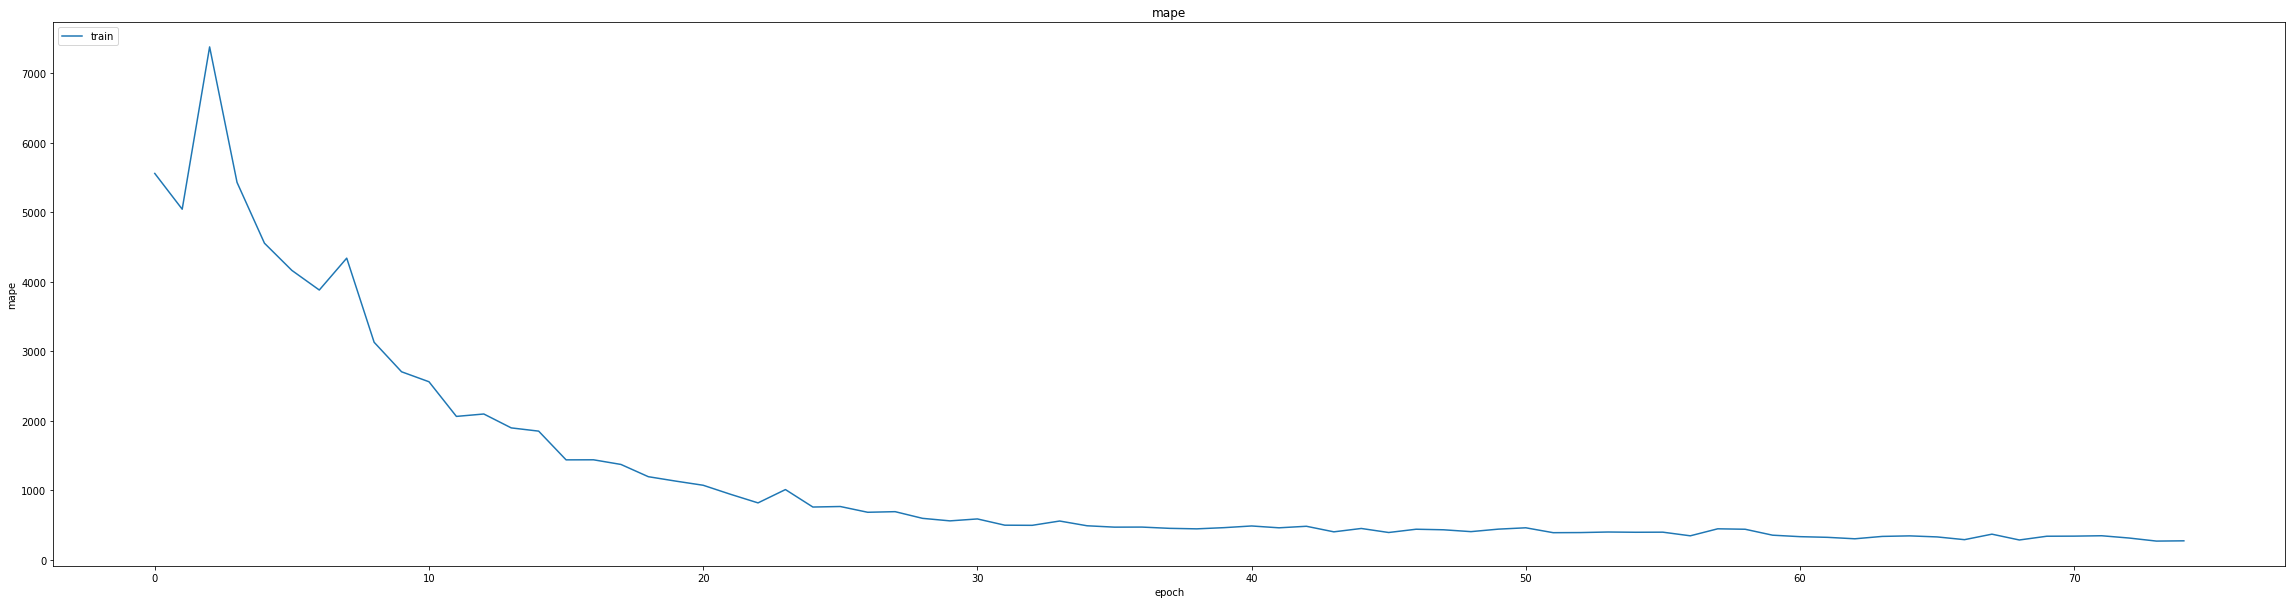

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009884890168905258
0.012928159907460213
348/348 [==============================] - 3s 6ms/step
0.9873306049119275


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
403/406 [============================>.] - ETA: 0s - loss: 2.7499e-04 - mae: 0.0070 - mse: 2.7499e-04 - root_mean_squared_error: 0.0166 - mape: 384.6798
Epoch 1: val_mse did not improve from 0.00017
406/406 [==============================] - 13s 20ms/step - loss: 2.7326e-04 - mae: 0.0070 - mse: 2.7326e-04 - root_mean_squared_error: 0.0165 - mape: 381.9278 - val_loss: 6.7978e-04 - val_mae: 0.0235 - val_mse: 6.7978e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 3288.4363 - lr: 0.0010
Epoch 2/25
404/406 [============================>.] - ETA: 0s - loss: 3.0086e-05 - mae: 0.0041 - mse: 3.0086e-05 - root_mean_squared_error: 0.0055 - mape: 357.0217
Epoch 2: val_mse did not improve from 0.00017
406/406 [==============================] - 7s 16ms/step - loss: 3.0108e-05 - mae: 0.0041 - mse: 3.0108e-05 - root_mean_squared_error: 0.0055 - mape: 355.3400 - val_loss: 6.2669e-04 - val_mae: 0.0225 - val_mse: 6.2669e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 2875.7800 - lr

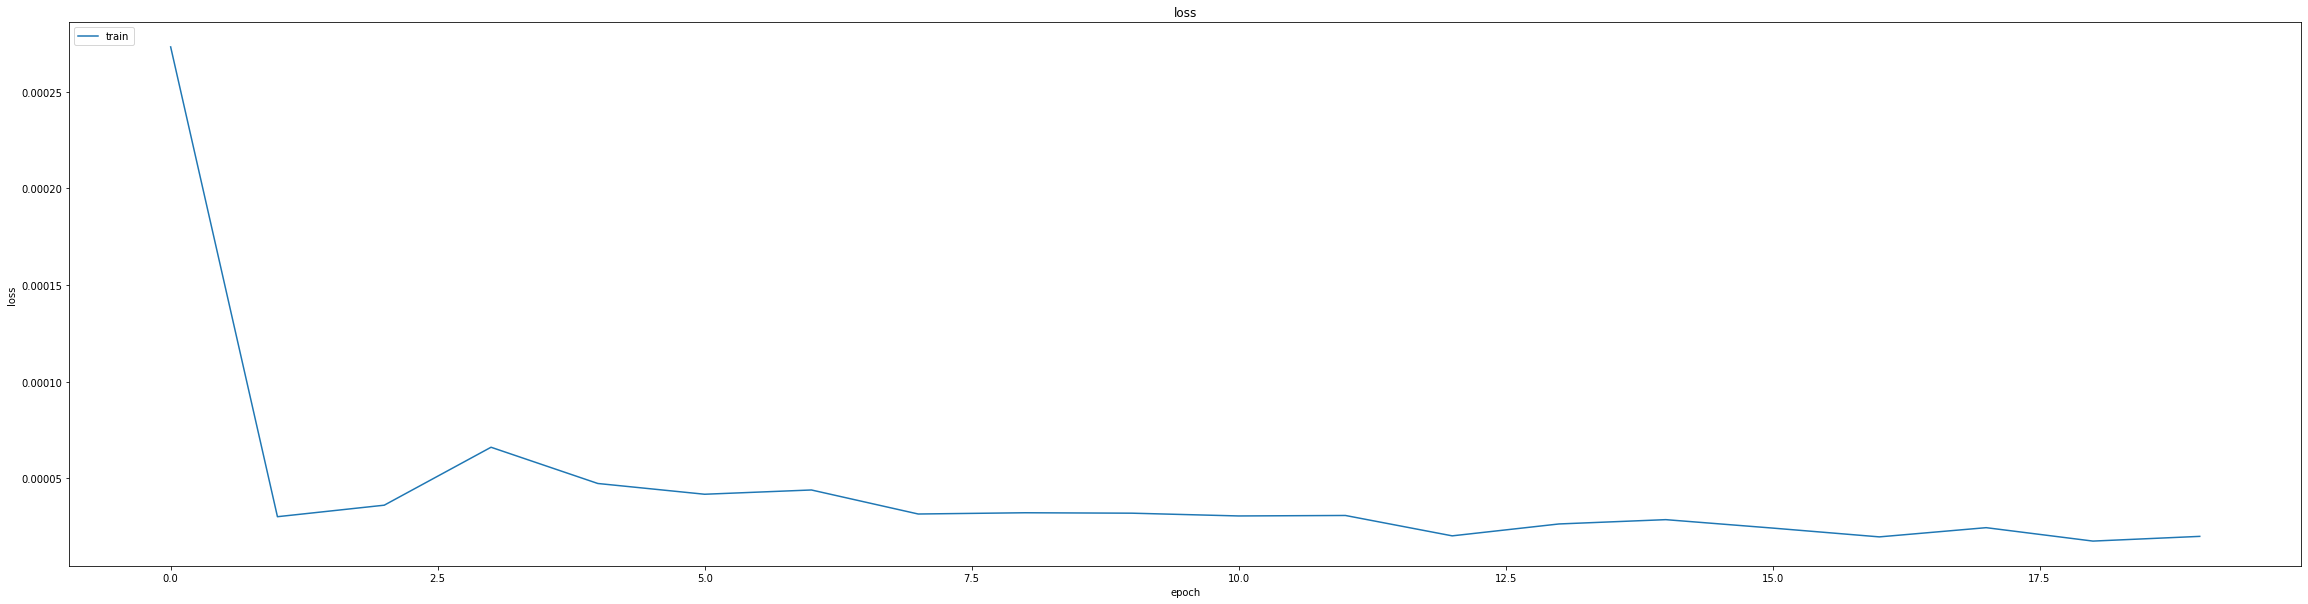

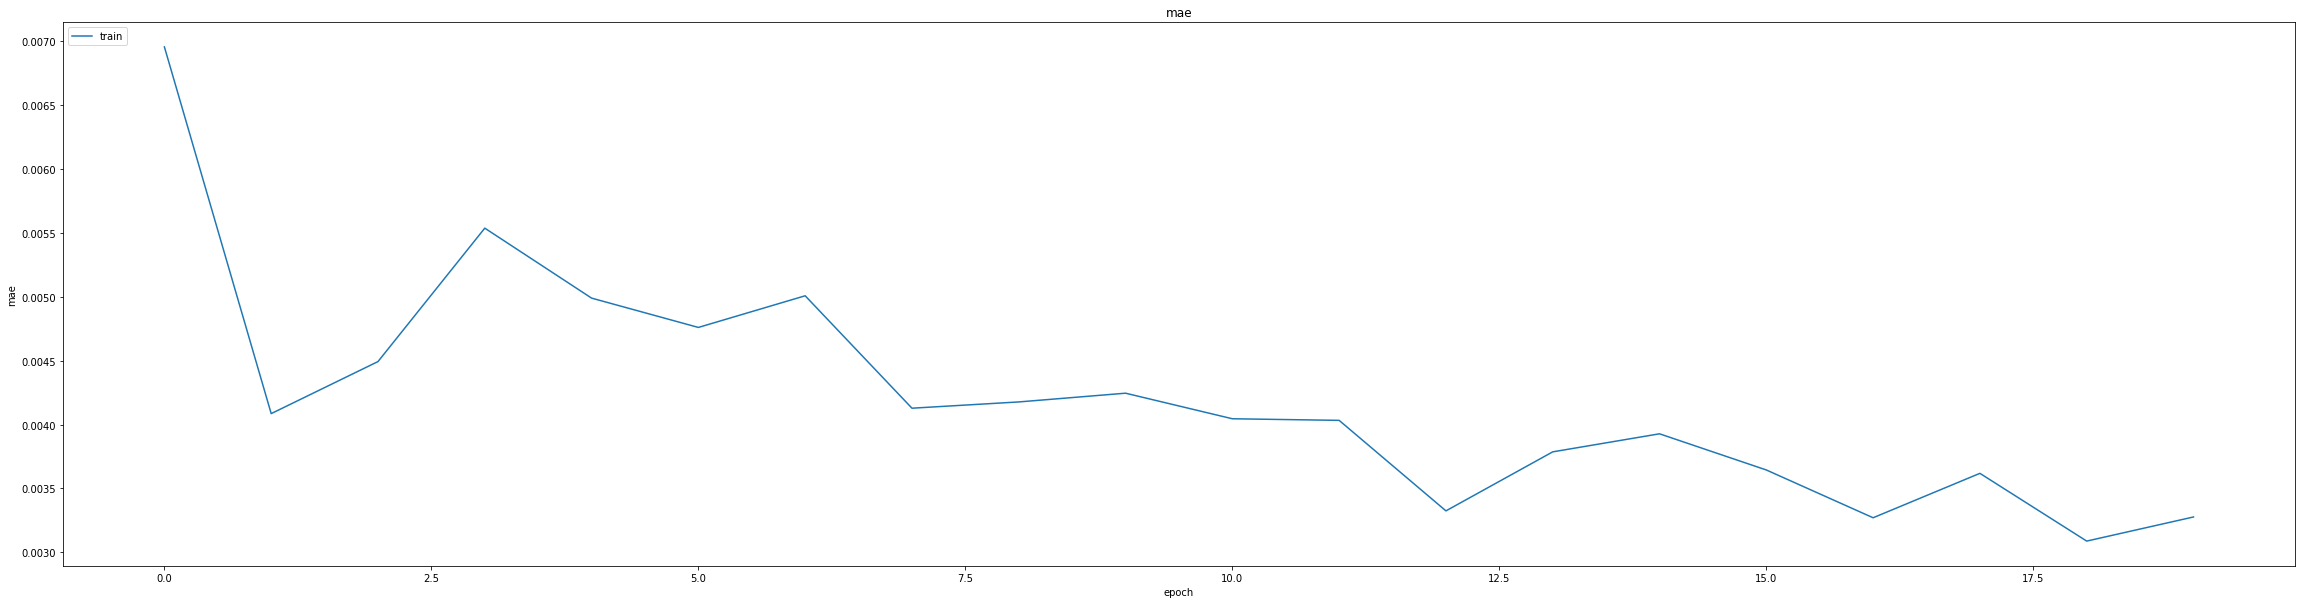

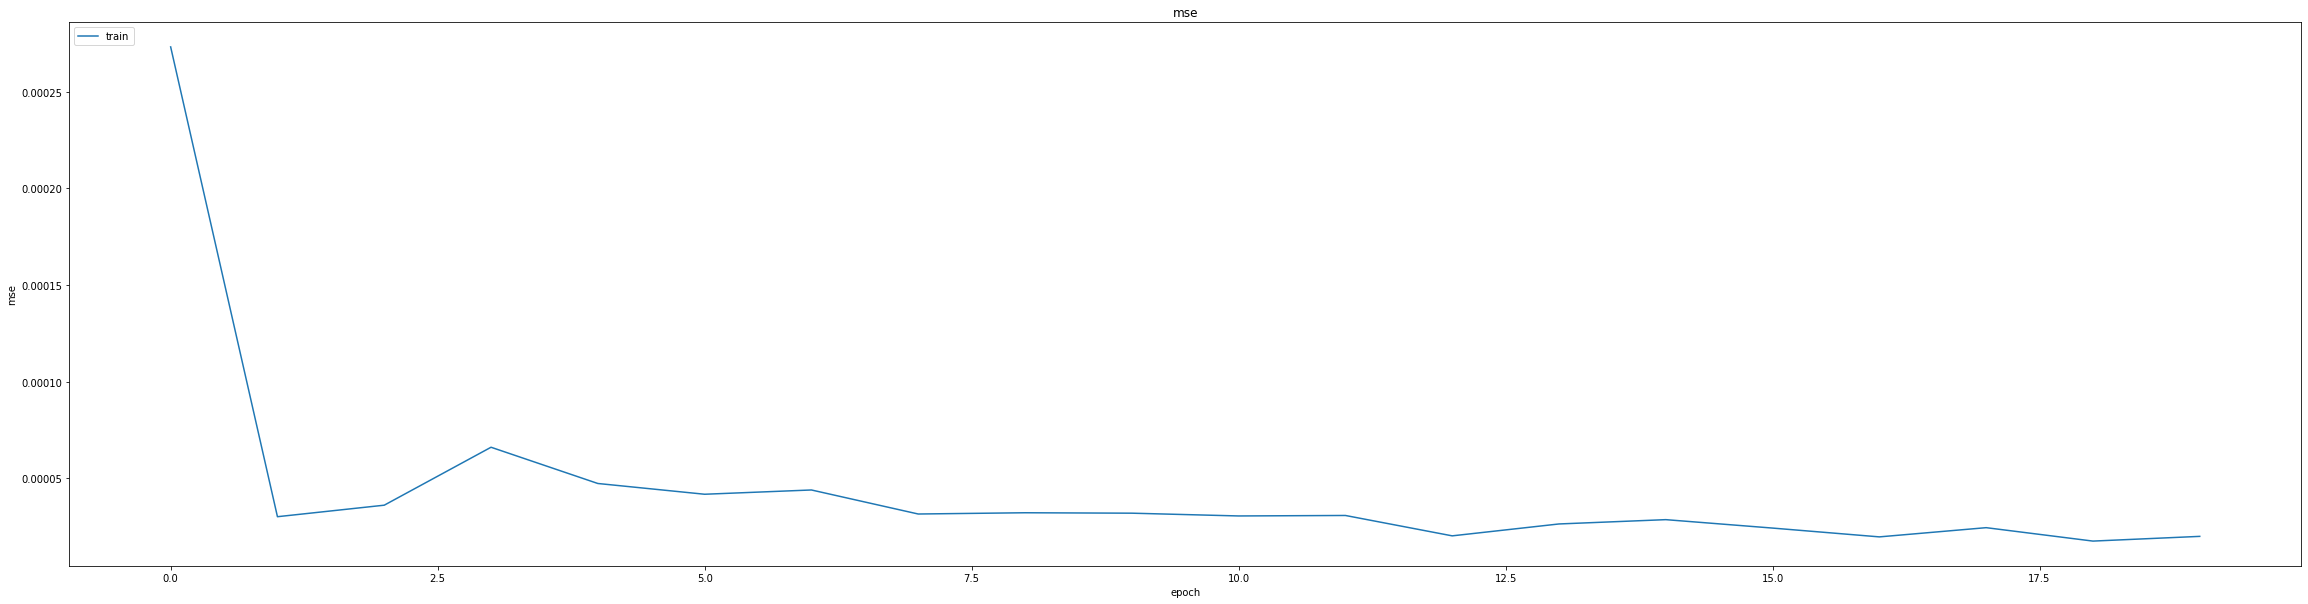

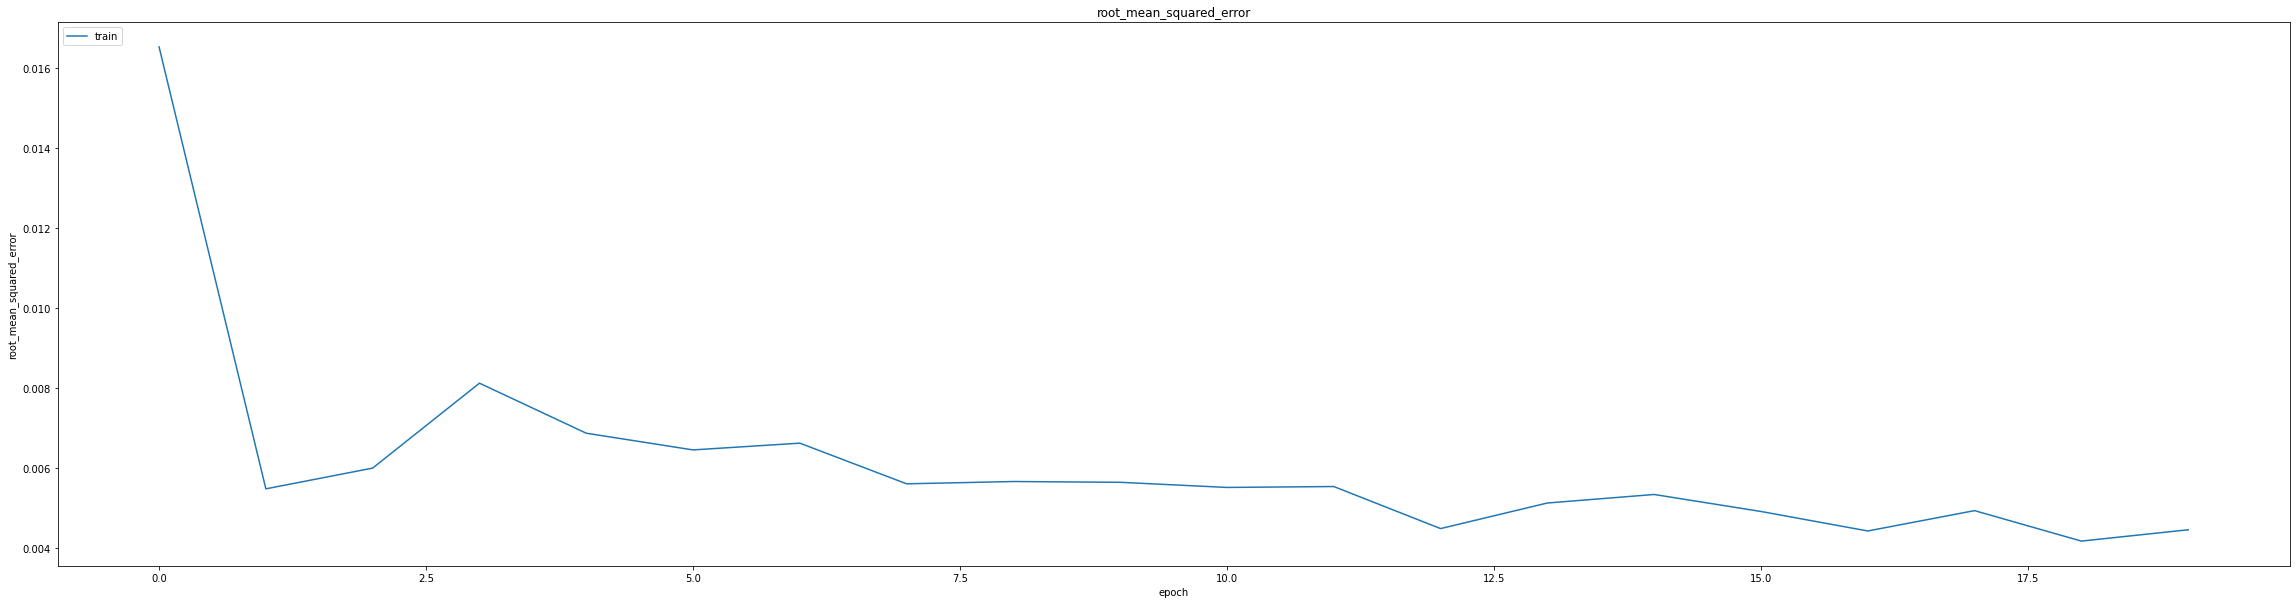

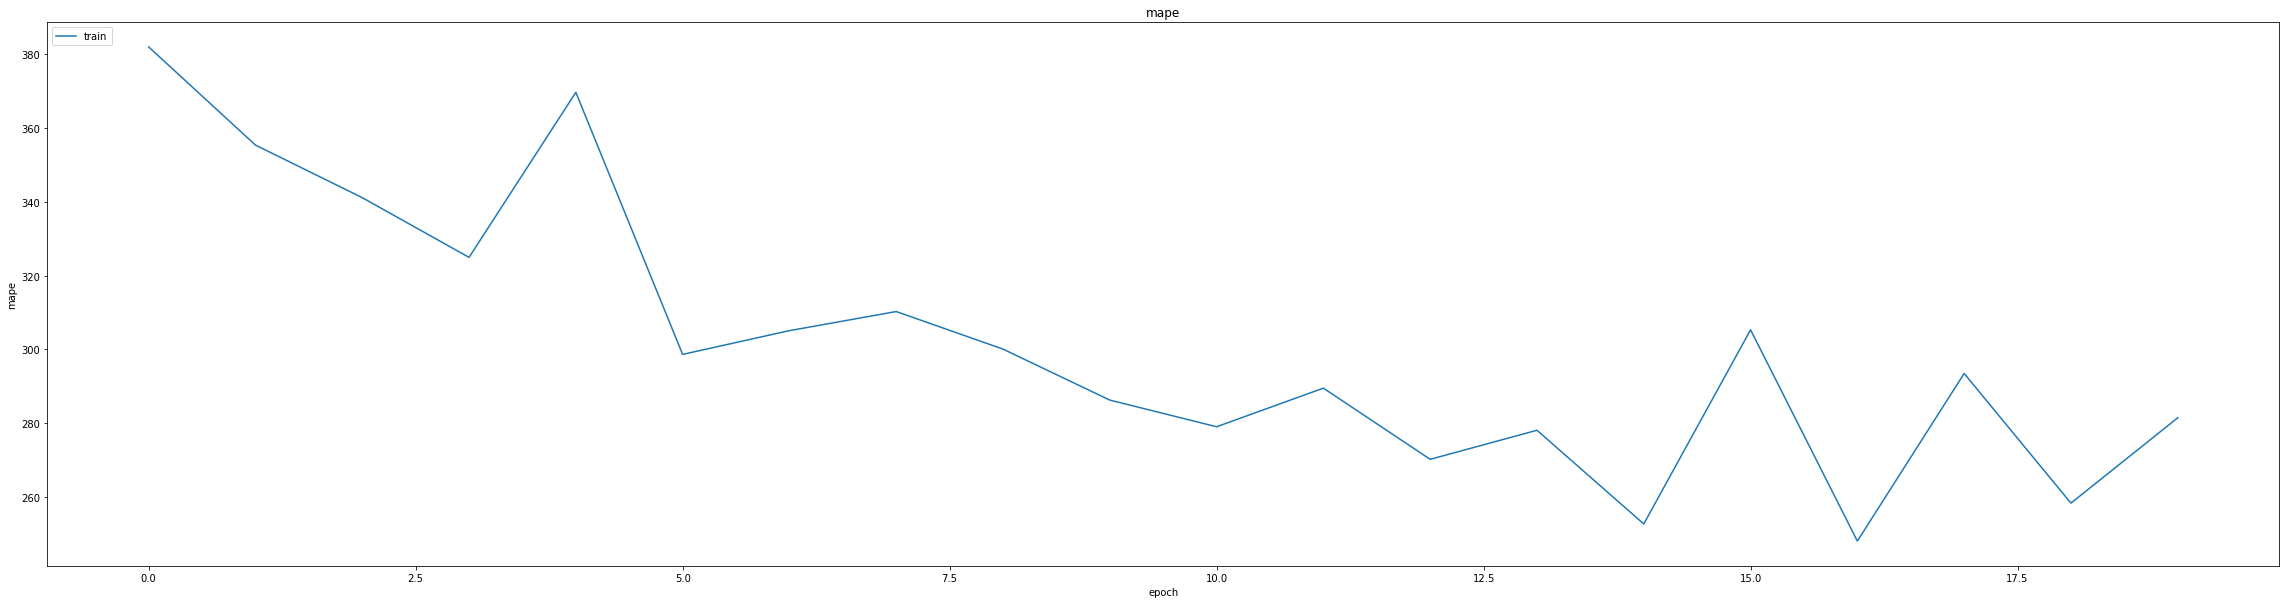

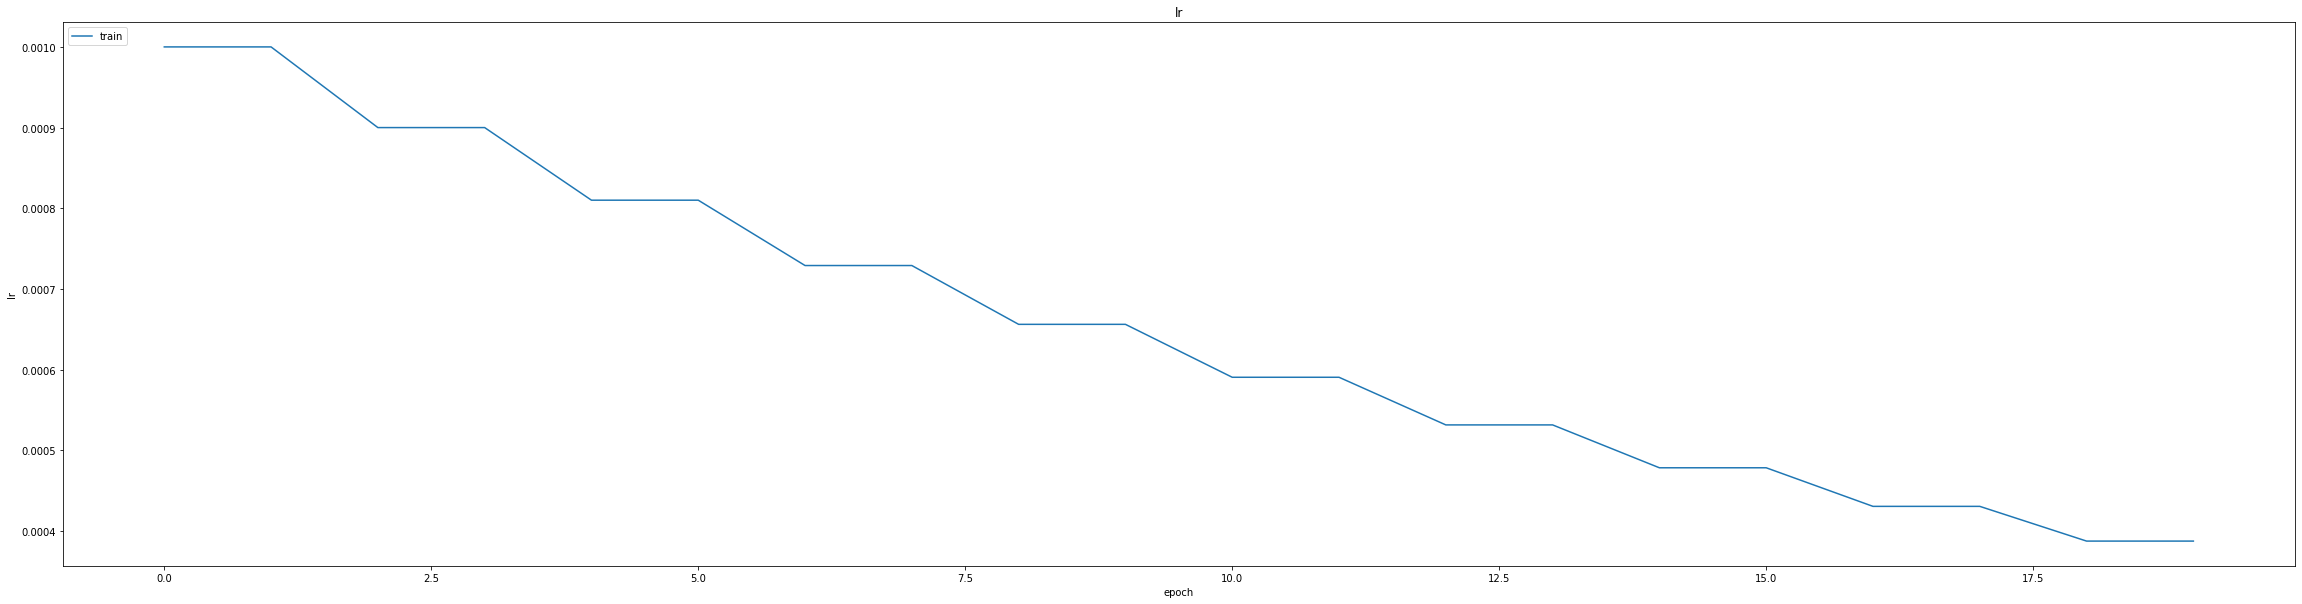

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012727370485663414
0.015649612993001938
348/348 [==============================] - 3s 6ms/step
0.9835973303937959


348/348 [==============================] - 2s 6ms/step


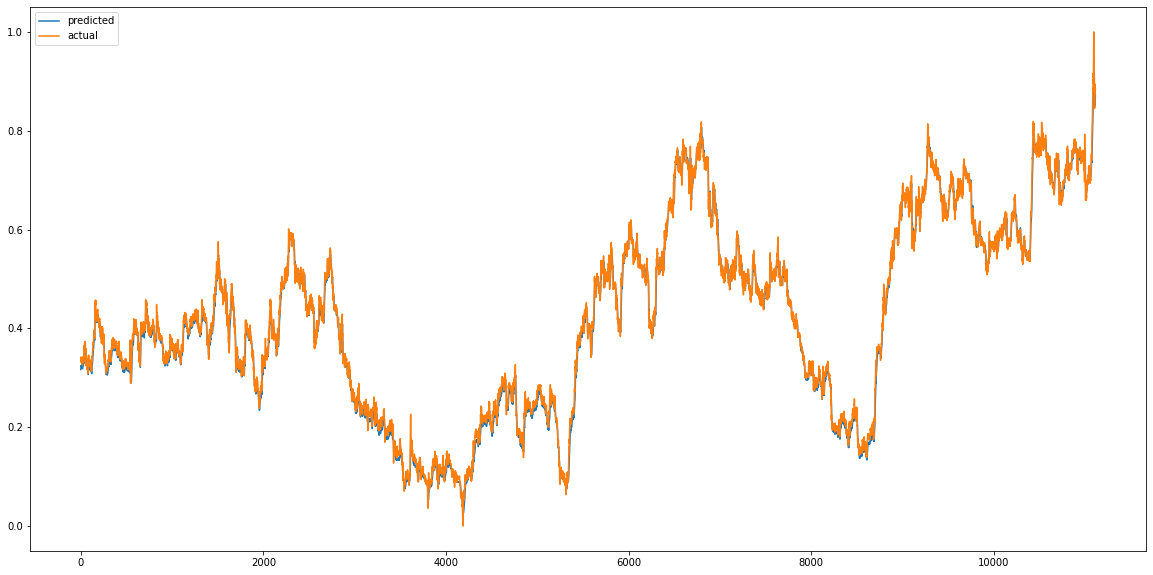

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


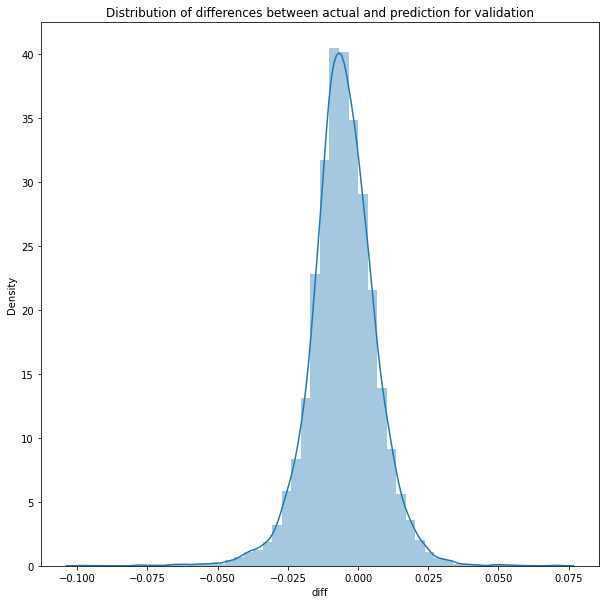

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


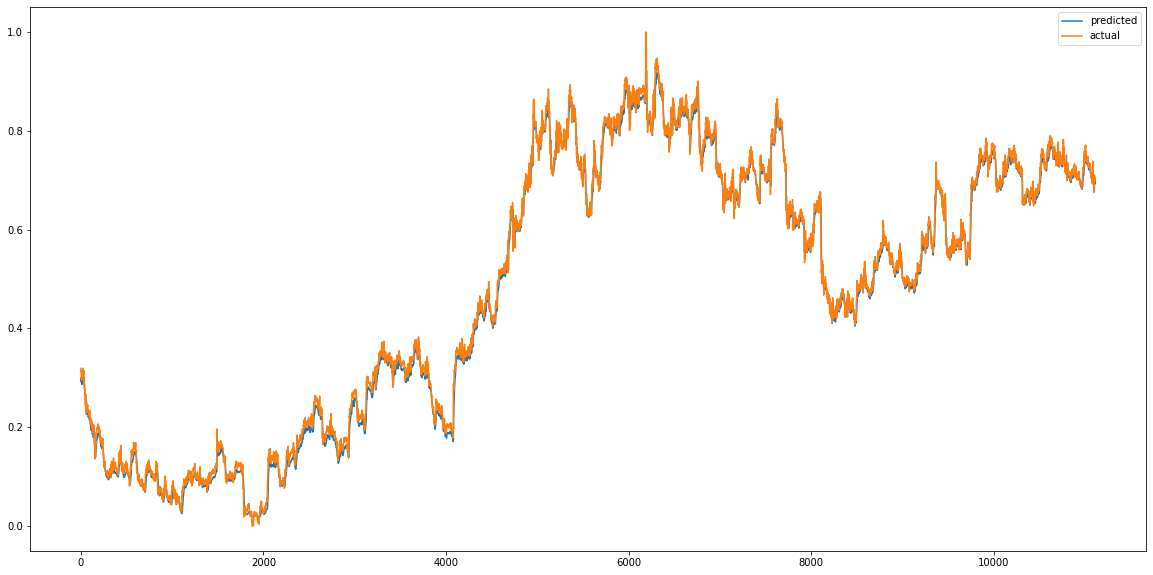

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


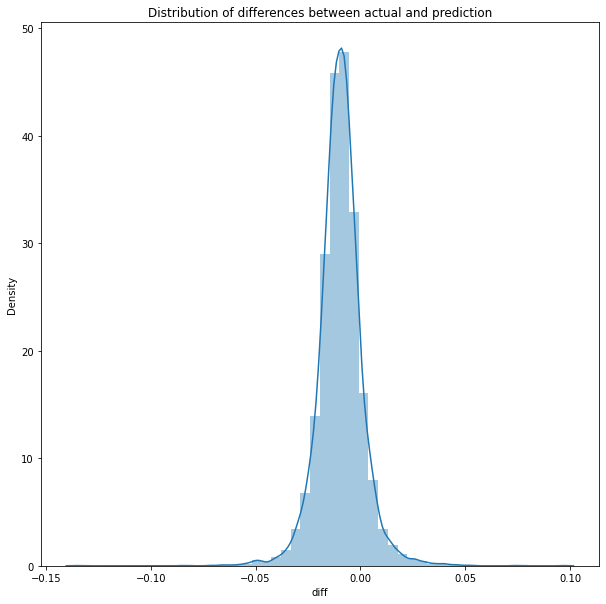

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
401/406 [============================>.] - ETA: 0s - loss: 536.2329 - mae: 6.2184 - mse: 536.2329 - root_mean_squared_error: 23.1567 - mape: 59901.8789
Epoch 1: val_mse improved from inf to 1.13486, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 16s 32ms/step - loss: 529.7470 - mae: 6.1567 - mse: 529.7470 - root_mean_squared_error: 23.0162 - mape: 59183.4062 - val_loss: 1.1349 - val_mae: 1.0480 - val_mse: 1.1349 - val_root_mean_squared_error: 1.0653 - val_mape: 133190.3750
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.6873 - mae: 0.7868 - mse: 0.6873 - root_mean_squared_error: 0.8290 - mape: 18610.1816
Epoch 2: val_mse improved from 1.13486 to 0.26179, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.6849 - mae: 0.7851 - mse: 0.6849 - root_mean_squared_error: 0.8276 - mape: 18479.1113 - val_loss: 0.2618 - val_mae: 0.4744 - val_mse: 0.2618 - val_root_mean_squared_error: 0.5117 - val_mape: 81576.7188
Epoch 3/75
402/406 [============================>.] - ETA: 0s - loss: 0.2258 - mae: 0.4312 - mse: 0.2258 - root_mean_squared_error: 0.4751 - mape: 18200.6914
Epoch 3: val_mse improved from 0.26179 to 0.09988, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.2251 - mae: 0.4304 - mse: 0.2251 - root_mean_squared_error: 0.4744 - mape: 18027.3516 - val_loss: 0.0999 - val_mae: 0.2667 - val_mse: 0.0999 - val_root_mean_squared_error: 0.3160 - val_mape: 61332.6602
Epoch 4/75
403/406 [============================>.] - ETA: 0s - loss: 0.1099 - mae: 0.2931 - mse: 0.1099 - root_mean_squared_error: 0.3315 - mape: 11272.7109
Epoch 4: val_mse improved from 0.09988 to 0.05418, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.1097 - mae: 0.2928 - mse: 0.1097 - root_mean_squared_error: 0.3312 - mape: 11192.6514 - val_loss: 0.0542 - val_mae: 0.1928 - val_mse: 0.0542 - val_root_mean_squared_error: 0.2328 - val_mape: 50567.5625
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0691 - mae: 0.2280 - mse: 0.0691 - root_mean_squared_error: 0.2629 - mape: 10096.6367
Epoch 5: val_mse improved from 0.05418 to 0.04005, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0691 - mae: 0.2280 - mse: 0.0691 - root_mean_squared_error: 0.2629 - mape: 10096.6367 - val_loss: 0.0401 - val_mae: 0.1669 - val_mse: 0.0401 - val_root_mean_squared_error: 0.2001 - val_mape: 43989.9180
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0527 - mae: 0.1962 - mse: 0.0527 - root_mean_squared_error: 0.2296 - mape: 8780.9199
Epoch 6: val_mse improved from 0.04005 to 0.03646, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0527 - mae: 0.1962 - mse: 0.0527 - root_mean_squared_error: 0.2296 - mape: 8740.2012 - val_loss: 0.0365 - val_mae: 0.1601 - val_mse: 0.0365 - val_root_mean_squared_error: 0.1909 - val_mape: 39711.0117
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 0.0458 - mae: 0.1815 - mse: 0.0458 - root_mean_squared_error: 0.2139 - mape: 8217.2178
Epoch 7: val_mse improved from 0.03646 to 0.03636, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0458 - mae: 0.1815 - mse: 0.0458 - root_mean_squared_error: 0.2139 - mape: 8178.8452 - val_loss: 0.0364 - val_mae: 0.1587 - val_mse: 0.0364 - val_root_mean_squared_error: 0.1907 - val_mape: 36833.1133
Epoch 8/75
401/406 [============================>.] - ETA: 0s - loss: 0.0427 - mae: 0.1744 - mse: 0.0427 - root_mean_squared_error: 0.2066 - mape: 8067.2627
Epoch 8: val_mse did not improve from 0.03636
406/406 [==============================] - 4s 11ms/step - loss: 0.0427 - mae: 0.1744 - mse: 0.0427 - root_mean_squared_error: 0.2066 - mape: 7971.0444 - val_loss: 0.0372 - val_mae: 0.1597 - val_mse: 0.0372 - val_root_mean_squared_error: 0.1928 - val_mape: 34881.7422
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 0.0413 - mae: 0.1707 - mse: 0.0413 - root_mean_squared_error: 0.2033 - mape: 7550.4014
Epoch 9: val_mse did not improve from 0.03636
406/406 [==============================] - 4s 10ms/step - l

406/406 [==============================] - 12s 29ms/step - loss: 0.0385 - mae: 0.1624 - mse: 0.0385 - root_mean_squared_error: 0.1962 - mape: 6989.2822 - val_loss: 0.0357 - val_mae: 0.1547 - val_mse: 0.0357 - val_root_mean_squared_error: 0.1890 - val_mape: 31836.0352
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0308 - mae: 0.1419 - mse: 0.0308 - root_mean_squared_error: 0.1756 - mape: 6785.7100
Epoch 15: val_mse improved from 0.03572 to 0.01054, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0308 - mae: 0.1418 - mse: 0.0308 - root_mean_squared_error: 0.1755 - mape: 6770.4873 - val_loss: 0.0105 - val_mae: 0.0761 - val_mse: 0.0105 - val_root_mean_squared_error: 0.1027 - val_mape: 29784.6113
Epoch 16/75
401/406 [============================>.] - ETA: 0s - loss: 0.0095 - mae: 0.0690 - mse: 0.0095 - root_mean_squared_error: 0.0977 - mape: 5958.8091
Epoch 16: val_mse improved from 0.01054 to 0.00335, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0095 - mae: 0.0689 - mse: 0.0095 - root_mean_squared_error: 0.0976 - mape: 5887.6934 - val_loss: 0.0034 - val_mae: 0.0385 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0579 - val_mape: 23902.3750
Epoch 17/75
401/406 [============================>.] - ETA: 0s - loss: 0.0045 - mae: 0.0426 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 5090.4961
Epoch 17: val_mse improved from 0.00335 to 0.00187, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 0.0045 - mae: 0.0425 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 5029.4683 - val_loss: 0.0019 - val_mae: 0.0280 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 20455.9141
Epoch 18/75
404/406 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0328 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 4130.7529
Epoch 18: val_mse improved from 0.00187 to 0.00132, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0029 - mae: 0.0328 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 4111.3477 - val_loss: 0.0013 - val_mae: 0.0243 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 18303.0000
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0284 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 3963.6560
Epoch 19: val_mse improved from 0.00132 to 0.00103, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0022 - mae: 0.0284 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 3945.1006 - val_loss: 0.0010 - val_mae: 0.0221 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 16757.4941
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0257 - mse: 0.0018 - root_mean_squared_error: 0.0425 - mape: 3476.2795
Epoch 20: val_mse improved from 0.00103 to 0.00088, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0018 - mae: 0.0257 - mse: 0.0018 - root_mean_squared_error: 0.0425 - mape: 3468.4543 - val_loss: 8.7667e-04 - val_mae: 0.0212 - val_mse: 8.7667e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 15491.2422
Epoch 21/75
401/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0236 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 3165.3523
Epoch 21: val_mse improved from 0.00088 to 0.00077, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0015 - mae: 0.0236 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 3127.4487 - val_loss: 7.6539e-04 - val_mae: 0.0203 - val_mse: 7.6539e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 14397.9600
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0216 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 3025.9663
Epoch 22: val_mse improved from 0.00077 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0012 - mae: 0.0216 - mse: 0.0012 - root_mean_squared_error: 0.0354 - mape: 3011.7988 - val_loss: 6.2123e-04 - val_mae: 0.0183 - val_mse: 6.2123e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 13383.8447
Epoch 23/75
401/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0202 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 2850.6719
Epoch 23: val_mse improved from 0.00062 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0011 - mae: 0.0202 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 2816.3098 - val_loss: 6.0493e-04 - val_mae: 0.0186 - val_mse: 6.0493e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 12484.9971
Epoch 24/75
403/406 [============================>.] - ETA: 0s - loss: 9.2926e-04 - mae: 0.0190 - mse: 9.2926e-04 - root_mean_squared_error: 0.0305 - mape: 2701.3213
Epoch 24: val_mse did not improve from 0.00060
406/406 [==============================] - 4s 11ms/step - loss: 9.2943e-04 - mae: 0.0190 - mse: 9.2943e-04 - root_mean_squared_error: 0.0305 - mape: 2682.1082 - val_loss: 6.1779e-04 - val_mae: 0.0191 - val_mse: 6.1779e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 11686.6426
Epoch 25/75
404/406 [============================>.] - ETA: 0s - loss: 8.1758e-04 - mae: 0.0180 - mse: 8.1758e-04 - root_mean_squared_error: 0.0286 - mape: 2464.9504
Epoch 25: val_mse improved from 0.00060 to 0.00060, saving mod

406/406 [==============================] - 12s 31ms/step - loss: 8.1684e-04 - mae: 0.0180 - mse: 8.1684e-04 - root_mean_squared_error: 0.0286 - mape: 2453.3396 - val_loss: 6.0135e-04 - val_mae: 0.0189 - val_mse: 6.0135e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 10945.2773
Epoch 26/75
402/406 [============================>.] - ETA: 0s - loss: 7.2031e-04 - mae: 0.0172 - mse: 7.2031e-04 - root_mean_squared_error: 0.0268 - mape: 2381.6072
Epoch 26: val_mse improved from 0.00060 to 0.00054, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 7.1963e-04 - mae: 0.0172 - mse: 7.1963e-04 - root_mean_squared_error: 0.0268 - mape: 2358.7759 - val_loss: 5.4093e-04 - val_mae: 0.0178 - val_mse: 5.4093e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 10230.6025
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 6.3704e-04 - mae: 0.0164 - mse: 6.3704e-04 - root_mean_squared_error: 0.0252 - mape: 2220.4871
Epoch 27: val_mse did not improve from 0.00054
406/406 [==============================] - 4s 11ms/step - loss: 6.3657e-04 - mae: 0.0164 - mse: 6.3657e-04 - root_mean_squared_error: 0.0252 - mape: 2210.0354 - val_loss: 6.1301e-04 - val_mae: 0.0193 - val_mse: 6.1301e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 9584.8115
Epoch 28/75
404/406 [============================>.] - ETA: 0s - loss: 5.6139e-04 - mae: 0.0156 - mse: 5.6139e-04 - root_mean_squared_error: 0.0237 - mape: 2001.3757
Epoch 28: val_mse improved from 0.00054 to 0.00047, sav

406/406 [==============================] - 12s 29ms/step - loss: 5.6116e-04 - mae: 0.0156 - mse: 5.6116e-04 - root_mean_squared_error: 0.0237 - mape: 1991.9719 - val_loss: 4.7145e-04 - val_mae: 0.0163 - val_mse: 4.7145e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 8980.8994
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 4.9546e-04 - mae: 0.0148 - mse: 4.9546e-04 - root_mean_squared_error: 0.0223 - mape: 2010.6094
Epoch 29: val_mse did not improve from 0.00047
406/406 [==============================] - 4s 10ms/step - loss: 4.9546e-04 - mae: 0.0148 - mse: 4.9546e-04 - root_mean_squared_error: 0.0223 - mape: 2010.6094 - val_loss: 4.8376e-04 - val_mae: 0.0166 - val_mse: 4.8376e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 8403.6064
Epoch 30/75
406/406 [==============================] - ETA: 0s - loss: 4.4091e-04 - mae: 0.0142 - mse: 4.4091e-04 - root_mean_squared_error: 0.0210 - mape: 1773.4130
Epoch 30: val_mse did not improve from 0.00047
406/406 [

406/406 [==============================] - 12s 31ms/step - loss: 1.3115e-04 - mae: 0.0085 - mse: 1.3115e-04 - root_mean_squared_error: 0.0115 - mape: 915.2186 - val_loss: 4.6838e-04 - val_mae: 0.0164 - val_mse: 4.6838e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 4520.1465
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 1.2087e-04 - mae: 0.0082 - mse: 1.2087e-04 - root_mean_squared_error: 0.0110 - mape: 865.2783
Epoch 41: val_mse did not improve from 0.00047
406/406 [==============================] - 4s 11ms/step - loss: 1.2087e-04 - mae: 0.0082 - mse: 1.2087e-04 - root_mean_squared_error: 0.0110 - mape: 865.2783 - val_loss: 5.0863e-04 - val_mae: 0.0175 - val_mse: 5.0863e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 4471.2192
Epoch 42/75
403/406 [============================>.] - ETA: 0s - loss: 1.0897e-04 - mae: 0.0078 - mse: 1.0897e-04 - root_mean_squared_error: 0.0104 - mape: 807.2363
Epoch 42: val_mse improved from 0.00047 to 0.00047, saving m

406/406 [==============================] - 13s 31ms/step - loss: 1.0888e-04 - mae: 0.0078 - mse: 1.0888e-04 - root_mean_squared_error: 0.0104 - mape: 801.4531 - val_loss: 4.6673e-04 - val_mae: 0.0164 - val_mse: 4.6673e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 4961.2969
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 1.0057e-04 - mae: 0.0075 - mse: 1.0057e-04 - root_mean_squared_error: 0.0100 - mape: 802.8370
Epoch 43: val_mse did not improve from 0.00047
406/406 [==============================] - 4s 10ms/step - loss: 1.0057e-04 - mae: 0.0075 - mse: 1.0057e-04 - root_mean_squared_error: 0.0100 - mape: 802.8370 - val_loss: 4.8502e-04 - val_mae: 0.0169 - val_mse: 4.8502e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 5163.6309
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 9.2857e-05 - mae: 0.0072 - mse: 9.2857e-05 - root_mean_squared_error: 0.0096 - mape: 742.4935
Epoch 44: val_mse improved from 0.00047 to 0.00043, saving m

406/406 [==============================] - 12s 29ms/step - loss: 9.2857e-05 - mae: 0.0072 - mse: 9.2857e-05 - root_mean_squared_error: 0.0096 - mape: 742.4935 - val_loss: 4.2914e-04 - val_mae: 0.0157 - val_mse: 4.2914e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 5430.1089
Epoch 45/75
406/406 [==============================] - ETA: 0s - loss: 8.8788e-05 - mae: 0.0071 - mse: 8.8788e-05 - root_mean_squared_error: 0.0094 - mape: 713.1462
Epoch 45: val_mse improved from 0.00043 to 0.00040, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 8.8788e-05 - mae: 0.0071 - mse: 8.8788e-05 - root_mean_squared_error: 0.0094 - mape: 713.1462 - val_loss: 3.9888e-04 - val_mae: 0.0148 - val_mse: 3.9888e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 5518.2993
Epoch 46/75
402/406 [============================>.] - ETA: 0s - loss: 8.2391e-05 - mae: 0.0068 - mse: 8.2391e-05 - root_mean_squared_error: 0.0091 - mape: 673.6640
Epoch 46: val_mse did not improve from 0.00040
406/406 [==============================] - 4s 11ms/step - loss: 8.2320e-05 - mae: 0.0068 - mse: 8.2320e-05 - root_mean_squared_error: 0.0091 - mape: 667.2189 - val_loss: 4.4221e-04 - val_mae: 0.0162 - val_mse: 4.4221e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 5396.8447
Epoch 47/75
401/406 [============================>.] - ETA: 0s - loss: 7.8468e-05 - mae: 0.0066 - mse: 7.8468e-05 - root_mean_squared_error: 0.0089 - mape: 684.0766
Epoch 47: val_mse improved from 0.00040 to 0.00038, saving m

406/406 [==============================] - 12s 31ms/step - loss: 7.8311e-05 - mae: 0.0066 - mse: 7.8311e-05 - root_mean_squared_error: 0.0088 - mape: 675.8187 - val_loss: 3.8325e-04 - val_mae: 0.0147 - val_mse: 3.8325e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 5525.9062
Epoch 48/75
405/406 [============================>.] - ETA: 0s - loss: 7.6428e-05 - mae: 0.0065 - mse: 7.6428e-05 - root_mean_squared_error: 0.0087 - mape: 648.1761
Epoch 48: val_mse did not improve from 0.00038
406/406 [==============================] - 4s 11ms/step - loss: 7.6391e-05 - mae: 0.0065 - mse: 7.6391e-05 - root_mean_squared_error: 0.0087 - mape: 646.7140 - val_loss: 4.1698e-04 - val_mae: 0.0157 - val_mse: 4.1698e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 5534.8096
Epoch 49/75
405/406 [============================>.] - ETA: 0s - loss: 7.3268e-05 - mae: 0.0064 - mse: 7.3268e-05 - root_mean_squared_error: 0.0086 - mape: 626.8326
Epoch 49: val_mse improved from 0.00038 to 0.00036, saving m

406/406 [==============================] - 12s 29ms/step - loss: 7.3267e-05 - mae: 0.0064 - mse: 7.3267e-05 - root_mean_squared_error: 0.0086 - mape: 625.4178 - val_loss: 3.5716e-04 - val_mae: 0.0142 - val_mse: 3.5716e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 5307.2822
Epoch 50/75
404/406 [============================>.] - ETA: 0s - loss: 7.7766e-05 - mae: 0.0066 - mse: 7.7766e-05 - root_mean_squared_error: 0.0088 - mape: 600.8919
Epoch 50: val_mse did not improve from 0.00036
406/406 [==============================] - 4s 11ms/step - loss: 7.7974e-05 - mae: 0.0066 - mse: 7.7974e-05 - root_mean_squared_error: 0.0088 - mape: 598.0688 - val_loss: 3.5719e-04 - val_mae: 0.0140 - val_mse: 3.5719e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 5430.1035
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 7.1559e-05 - mae: 0.0063 - mse: 7.1559e-05 - root_mean_squared_error: 0.0085 - mape: 585.9276
Epoch 51: val_mse did not improve from 0.00036
406/406 [====

406/406 [==============================] - 13s 31ms/step - loss: 6.7370e-05 - mae: 0.0061 - mse: 6.7370e-05 - root_mean_squared_error: 0.0082 - mape: 580.4479 - val_loss: 3.2103e-04 - val_mae: 0.0134 - val_mse: 3.2103e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 5198.0732
Epoch 53/75
401/406 [============================>.] - ETA: 0s - loss: 6.2767e-05 - mae: 0.0060 - mse: 6.2767e-05 - root_mean_squared_error: 0.0079 - mape: 564.7238
Epoch 53: val_mse did not improve from 0.00032
406/406 [==============================] - 4s 11ms/step - loss: 6.2891e-05 - mae: 0.0060 - mse: 6.2891e-05 - root_mean_squared_error: 0.0079 - mape: 557.9090 - val_loss: 3.4685e-04 - val_mae: 0.0141 - val_mse: 3.4685e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 5217.0137
Epoch 54/75
405/406 [============================>.] - ETA: 0s - loss: 6.1219e-05 - mae: 0.0059 - mse: 6.1219e-05 - root_mean_squared_error: 0.0078 - mape: 538.3335
Epoch 54: val_mse improved from 0.00032 to 0.00029, saving m

406/406 [==============================] - 14s 34ms/step - loss: 6.1219e-05 - mae: 0.0059 - mse: 6.1219e-05 - root_mean_squared_error: 0.0078 - mape: 537.1195 - val_loss: 2.9375e-04 - val_mae: 0.0127 - val_mse: 2.9375e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 5223.1797
Epoch 55/75
404/406 [============================>.] - ETA: 0s - loss: 6.4516e-05 - mae: 0.0060 - mse: 6.4516e-05 - root_mean_squared_error: 0.0080 - mape: 537.2410
Epoch 55: val_mse did not improve from 0.00029
406/406 [==============================] - 4s 11ms/step - loss: 6.4726e-05 - mae: 0.0061 - mse: 6.4726e-05 - root_mean_squared_error: 0.0080 - mape: 534.7141 - val_loss: 3.8177e-04 - val_mae: 0.0145 - val_mse: 3.8177e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 5543.4863
Epoch 56/75
404/406 [============================>.] - ETA: 0s - loss: 7.5197e-05 - mae: 0.0064 - mse: 7.5197e-05 - root_mean_squared_error: 0.0087 - mape: 554.1791
Epoch 56: val_mse improved from 0.00029 to 0.00029, saving m

406/406 [==============================] - 12s 29ms/step - loss: 7.5162e-05 - mae: 0.0064 - mse: 7.5162e-05 - root_mean_squared_error: 0.0087 - mape: 551.5693 - val_loss: 2.8897e-04 - val_mae: 0.0125 - val_mse: 2.8897e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 4768.0786
Epoch 57/75
405/406 [============================>.] - ETA: 0s - loss: 6.4050e-05 - mae: 0.0060 - mse: 6.4050e-05 - root_mean_squared_error: 0.0080 - mape: 512.9918
Epoch 57: val_mse improved from 0.00029 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 6.4006e-05 - mae: 0.0060 - mse: 6.4006e-05 - root_mean_squared_error: 0.0080 - mape: 511.8328 - val_loss: 2.7183e-04 - val_mae: 0.0122 - val_mse: 2.7183e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 5023.5659
Epoch 58/75
406/406 [==============================] - ETA: 0s - loss: 5.2697e-05 - mae: 0.0055 - mse: 5.2697e-05 - root_mean_squared_error: 0.0073 - mape: 530.1177
Epoch 58: val_mse did not improve from 0.00027
406/406 [==============================] - 4s 10ms/step - loss: 5.2697e-05 - mae: 0.0055 - mse: 5.2697e-05 - root_mean_squared_error: 0.0073 - mape: 530.1177 - val_loss: 2.7798e-04 - val_mae: 0.0123 - val_mse: 2.7798e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 5019.8765
Epoch 59/75
406/406 [==============================] - ETA: 0s - loss: 6.1973e-05 - mae: 0.0058 - mse: 6.1973e-05 - root_mean_squared_error: 0.0079 - mape: 494.7196
Epoch 59: val_mse did not improve from 0.00027
406/406 [====

406/406 [==============================] - 12s 30ms/step - loss: 5.6672e-05 - mae: 0.0056 - mse: 5.6672e-05 - root_mean_squared_error: 0.0075 - mape: 481.5690 - val_loss: 2.4708e-04 - val_mae: 0.0115 - val_mse: 2.4708e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 4686.2549
Epoch 61/75
401/406 [============================>.] - ETA: 0s - loss: 6.2009e-05 - mae: 0.0058 - mse: 6.2009e-05 - root_mean_squared_error: 0.0079 - mape: 481.1731
Epoch 61: val_mse did not improve from 0.00025
406/406 [==============================] - 4s 11ms/step - loss: 6.2203e-05 - mae: 0.0058 - mse: 6.2203e-05 - root_mean_squared_error: 0.0079 - mape: 475.3745 - val_loss: 2.5308e-04 - val_mae: 0.0118 - val_mse: 2.5308e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 4764.5181
Epoch 62/75
405/406 [============================>.] - ETA: 0s - loss: 5.1857e-05 - mae: 0.0054 - mse: 5.1857e-05 - root_mean_squared_error: 0.0072 - mape: 449.1929
Epoch 62: val_mse did not improve from 0.00025
406/406 [====

406/406 [==============================] - 12s 29ms/step - loss: 5.3730e-05 - mae: 0.0055 - mse: 5.3730e-05 - root_mean_squared_error: 0.0073 - mape: 436.8355 - val_loss: 2.1914e-04 - val_mae: 0.0109 - val_mse: 2.1914e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 4685.1123
Epoch 64/75
404/406 [============================>.] - ETA: 0s - loss: 4.5879e-05 - mae: 0.0050 - mse: 4.5879e-05 - root_mean_squared_error: 0.0068 - mape: 422.9568
Epoch 64: val_mse improved from 0.00022 to 0.00021, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 4.5783e-05 - mae: 0.0050 - mse: 4.5783e-05 - root_mean_squared_error: 0.0068 - mape: 420.9694 - val_loss: 2.0700e-04 - val_mae: 0.0105 - val_mse: 2.0700e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 4763.6055
Epoch 65/75
403/406 [============================>.] - ETA: 0s - loss: 5.4323e-05 - mae: 0.0055 - mse: 5.4323e-05 - root_mean_squared_error: 0.0074 - mape: 411.6900
Epoch 65: val_mse did not improve from 0.00021
406/406 [==============================] - 4s 11ms/step - loss: 5.4198e-05 - mae: 0.0055 - mse: 5.4198e-05 - root_mean_squared_error: 0.0074 - mape: 408.7416 - val_loss: 2.0948e-04 - val_mae: 0.0106 - val_mse: 2.0948e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 4716.2402
Epoch 66/75
405/406 [============================>.] - ETA: 0s - loss: 4.7487e-05 - mae: 0.0051 - mse: 4.7487e-05 - root_mean_squared_error: 0.0069 - mape: 400.0002
Epoch 66: val_mse did not improve from 0.00021
406/406 [====

406/406 [==============================] - 13s 31ms/step - loss: 4.1964e-05 - mae: 0.0049 - mse: 4.1964e-05 - root_mean_squared_error: 0.0065 - mape: 382.5480 - val_loss: 1.8370e-04 - val_mae: 0.0100 - val_mse: 1.8370e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 4685.1606
Epoch 69/75
404/406 [============================>.] - ETA: 0s - loss: 4.8947e-05 - mae: 0.0052 - mse: 4.8947e-05 - root_mean_squared_error: 0.0070 - mape: 381.5237
Epoch 69: val_mse did not improve from 0.00018
406/406 [==============================] - 4s 10ms/step - loss: 4.8941e-05 - mae: 0.0052 - mse: 4.8941e-05 - root_mean_squared_error: 0.0070 - mape: 379.7266 - val_loss: 2.2995e-04 - val_mae: 0.0116 - val_mse: 2.2995e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 4812.0205
Epoch 70/75
403/406 [============================>.] - ETA: 0s - loss: 4.7184e-05 - mae: 0.0050 - mse: 4.7184e-05 - root_mean_squared_error: 0.0069 - mape: 378.5932
Epoch 70: val_mse did not improve from 0.00018
406/406 [====

406/406 [==============================] - 12s 29ms/step - loss: 3.6730e-05 - mae: 0.0045 - mse: 3.6730e-05 - root_mean_squared_error: 0.0061 - mape: 363.3917 - val_loss: 1.8134e-04 - val_mae: 0.0101 - val_mse: 1.8134e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 4345.1172
Epoch 73/75
403/406 [============================>.] - ETA: 0s - loss: 3.2732e-05 - mae: 0.0043 - mse: 3.2732e-05 - root_mean_squared_error: 0.0057 - mape: 367.3626
Epoch 73: val_mse did not improve from 0.00018
406/406 [==============================] - 4s 11ms/step - loss: 3.2651e-05 - mae: 0.0043 - mse: 3.2651e-05 - root_mean_squared_error: 0.0057 - mape: 364.7313 - val_loss: 2.0662e-04 - val_mae: 0.0111 - val_mse: 2.0662e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 3709.0127
Epoch 74/75
403/406 [============================>.] - ETA: 0s - loss: 3.8062e-05 - mae: 0.0046 - mse: 3.8062e-05 - root_mean_squared_error: 0.0062 - mape: 336.4068
Epoch 74: val_mse improved from 0.00018 to 0.00017, saving m

406/406 [==============================] - 12s 31ms/step - loss: 3.7912e-05 - mae: 0.0046 - mse: 3.7912e-05 - root_mean_squared_error: 0.0062 - mape: 333.9950 - val_loss: 1.6993e-04 - val_mae: 0.0098 - val_mse: 1.6993e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 3905.4473
Epoch 75/75
405/406 [============================>.] - ETA: 0s - loss: 3.2572e-05 - mae: 0.0042 - mse: 3.2572e-05 - root_mean_squared_error: 0.0057 - mape: 335.7809
Epoch 75: val_mse did not improve from 0.00017
406/406 [==============================] - 4s 10ms/step - loss: 3.2549e-05 - mae: 0.0042 - mse: 3.2549e-05 - root_mean_squared_error: 0.0057 - mape: 335.0245 - val_loss: 2.1298e-04 - val_mae: 0.0113 - val_mse: 2.1298e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 3880.2769


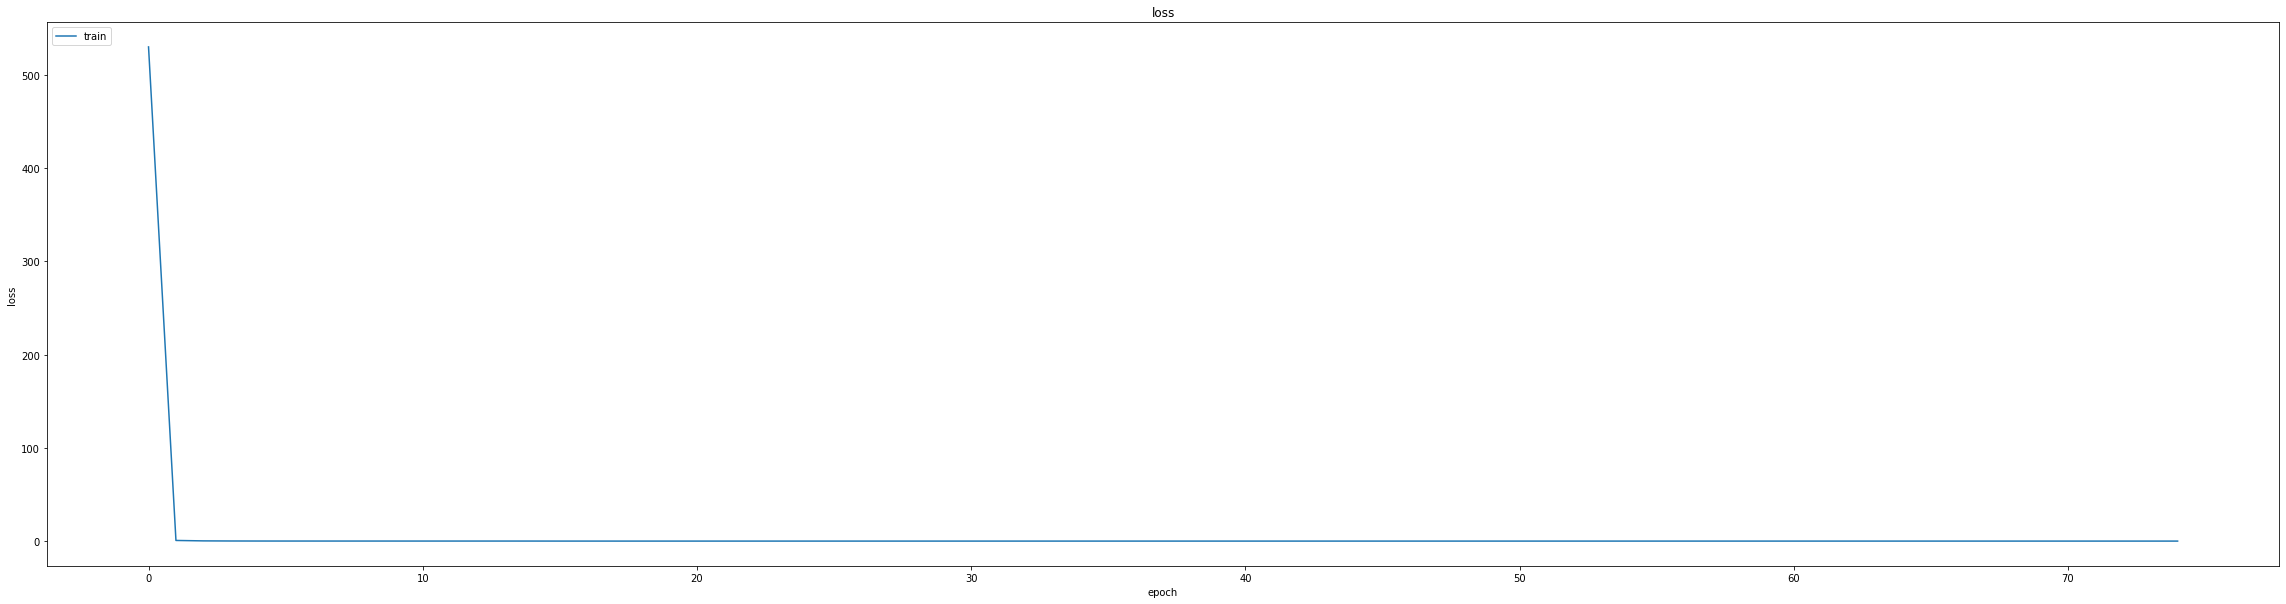

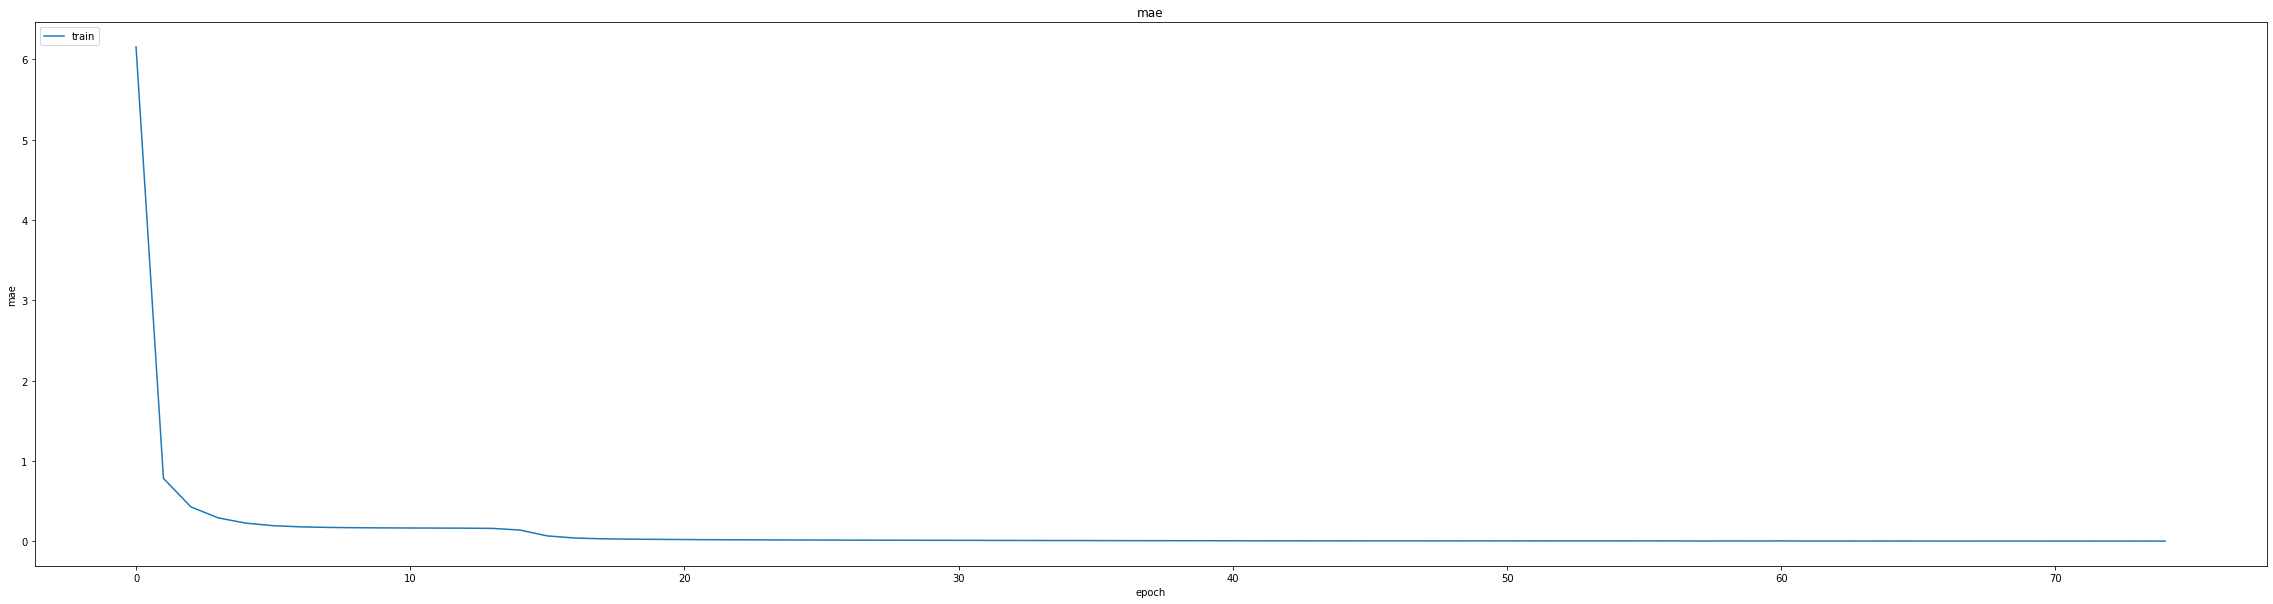

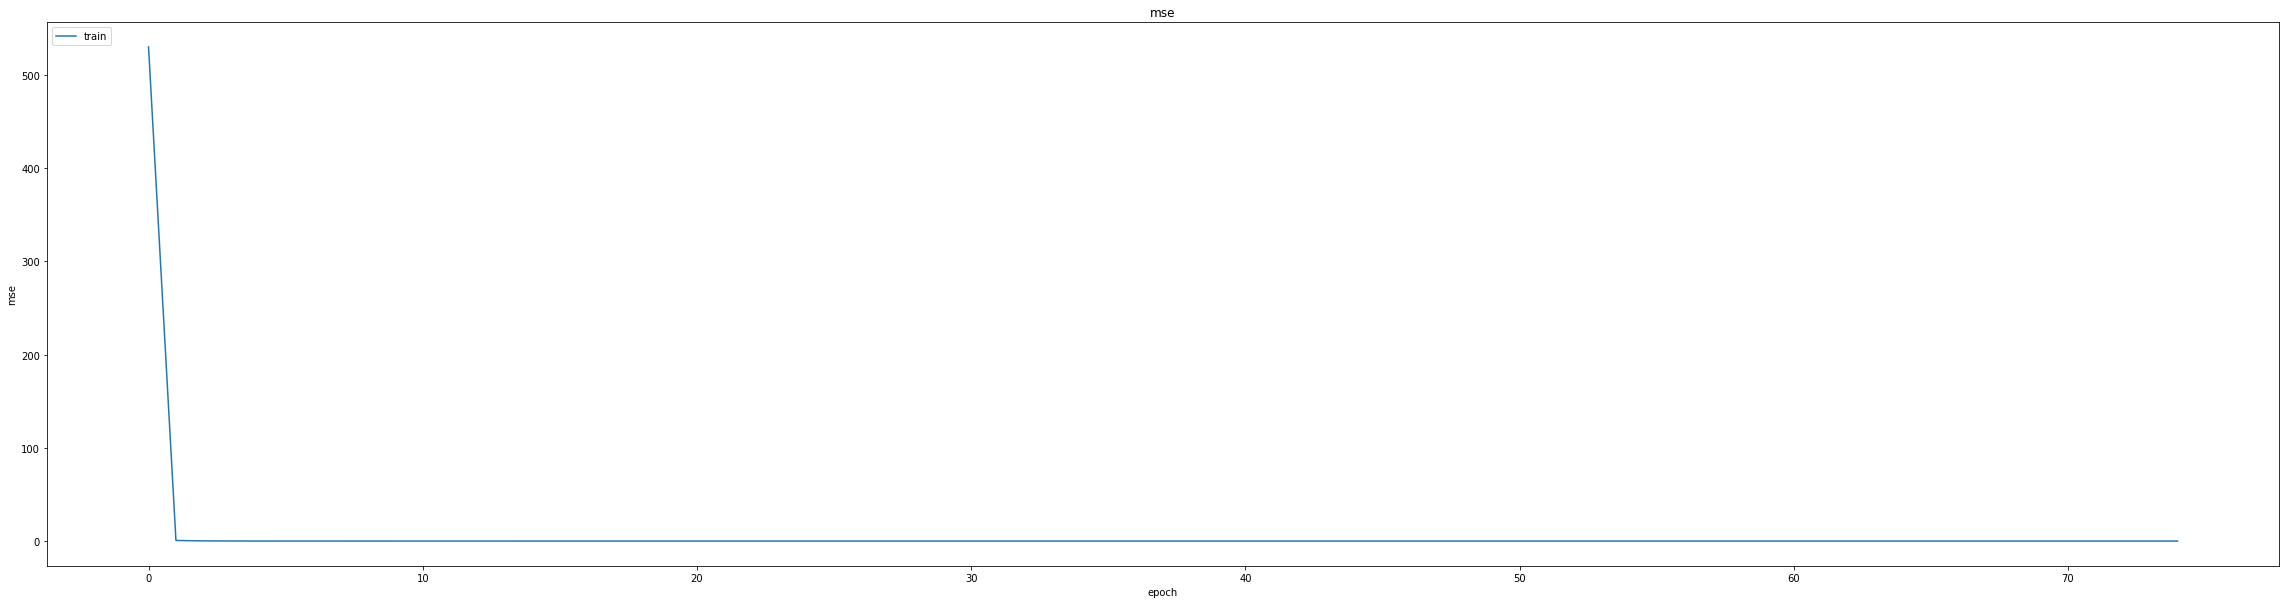

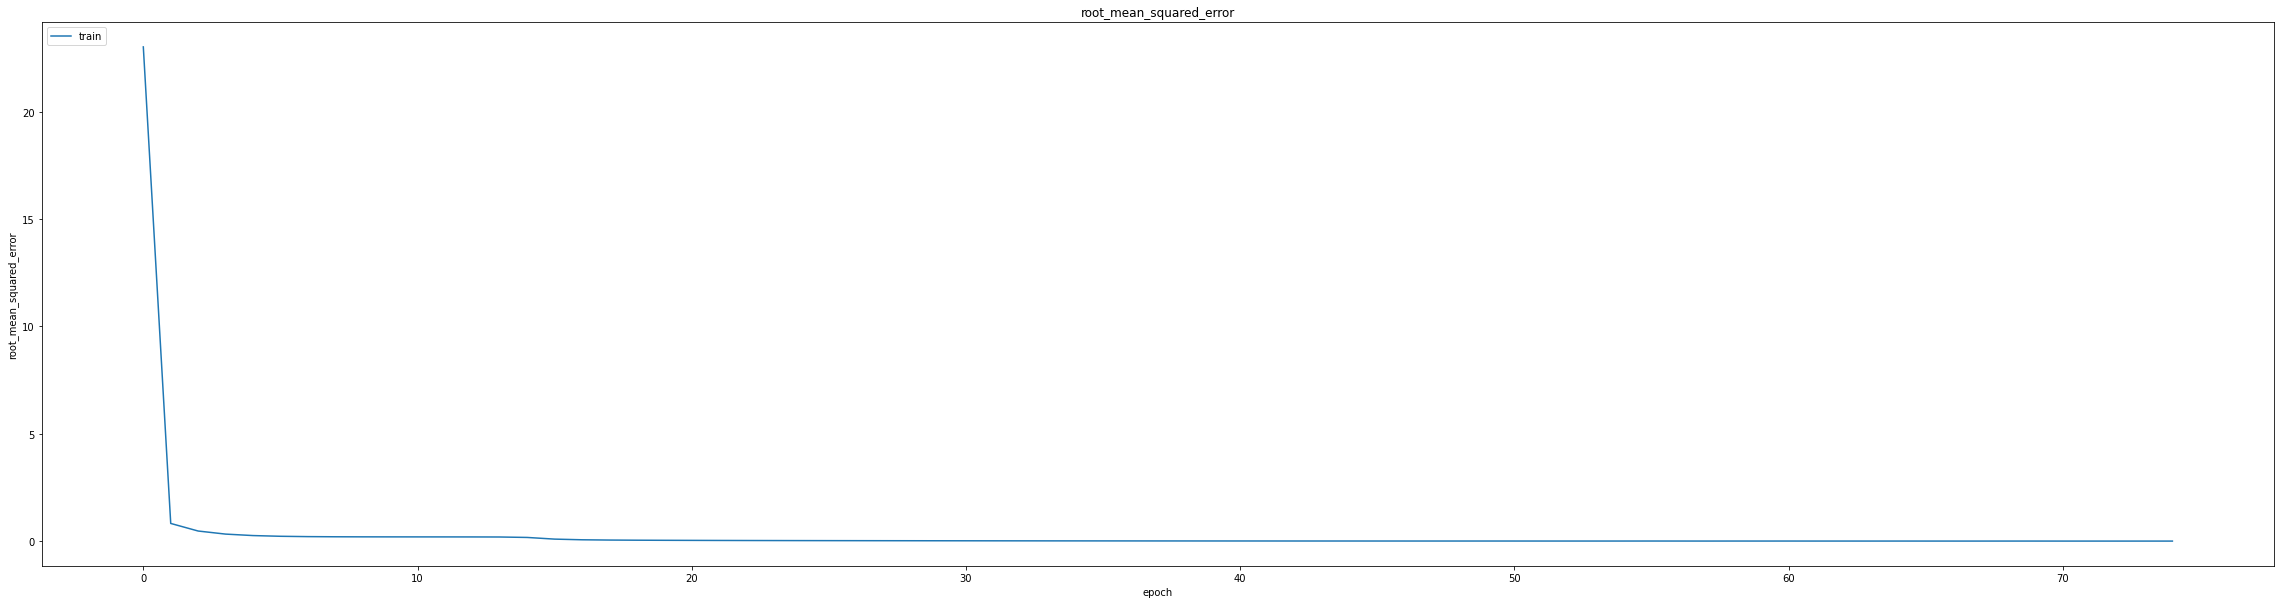

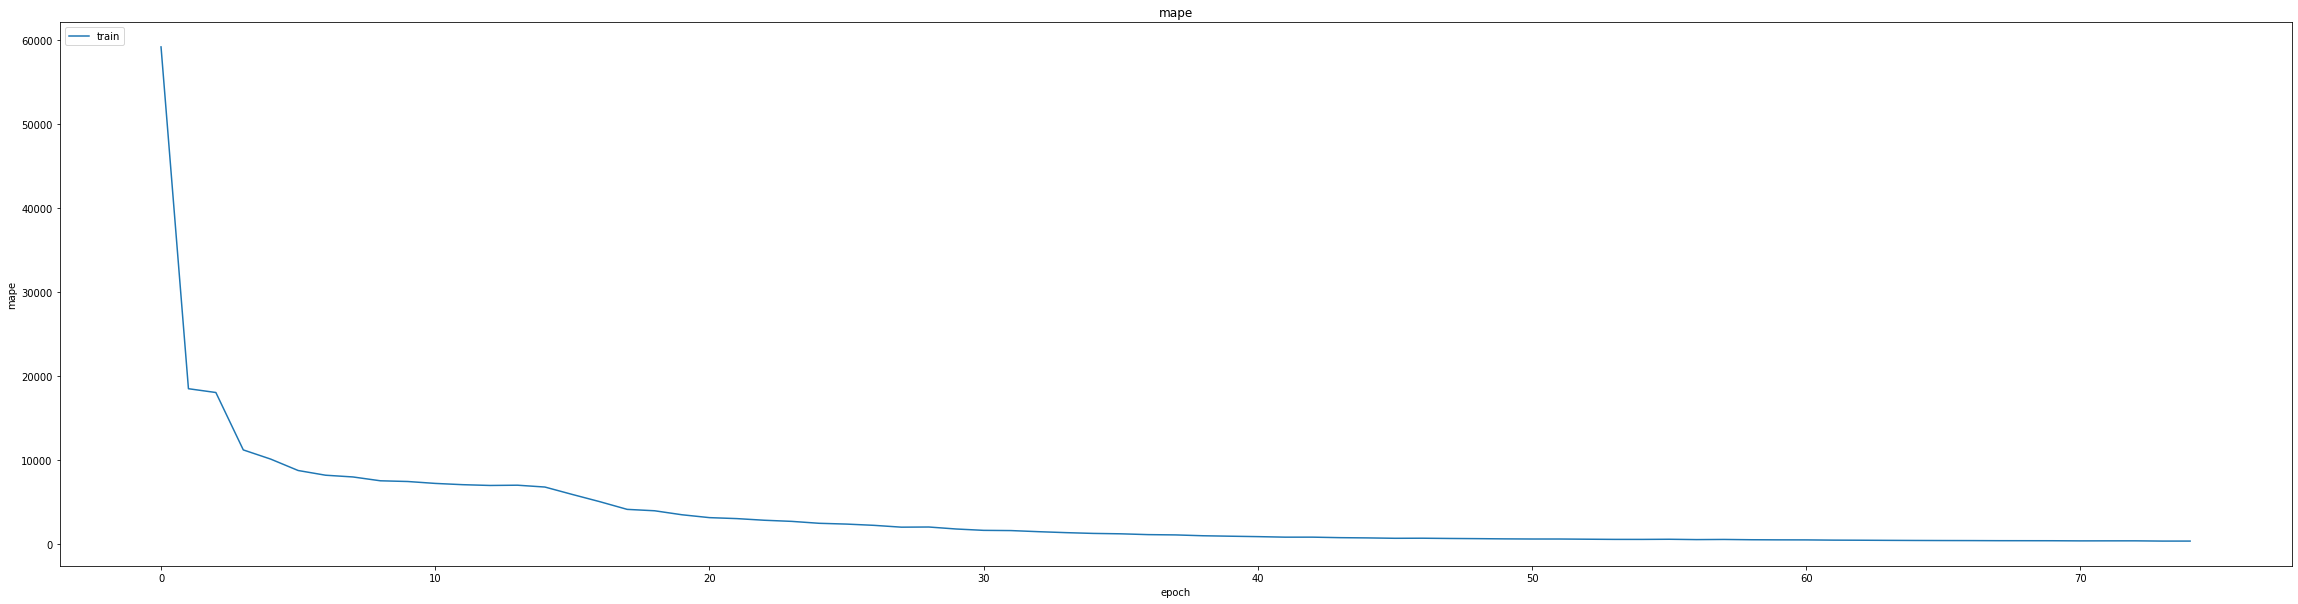

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009754925966262817
0.013035626150667667
348/348 [==============================] - 2s 4ms/step
0.9941076435300931


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


406/406 [==============================] - ETA: 0s - loss: 9.5338e-05 - mae: 0.0049 - mse: 9.5338e-05 - root_mean_squared_error: 0.0098 - mape: 348.4148
Epoch 1: val_mse did not improve from 0.00017
406/406 [==============================] - 10s 15ms/step - loss: 9.5338e-05 - mae: 0.0049 - mse: 9.5338e-05 - root_mean_squared_error: 0.0098 - mape: 348.4148 - val_loss: 2.1060e-04 - val_mae: 0.0112 - val_mse: 2.1060e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 3832.1853 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 2.2368e-05 - mae: 0.0035 - mse: 2.2368e-05 - root_mean_squared_error: 0.0047 - mape: 314.3193
Epoch 2: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 2.2533e-05 - mae: 0.0035 - mse: 2.2533e-05 - root_mean_squared_error: 0.0047 - mape: 313.6124 - val_loss: 1.6036e-04 - val_mae: 0.0094 - val_mse: 1.6036e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 3751.8477 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
404/406 [============================>.] - ETA: 0s - loss: 2.6853e-05 - mae: 0.0039 - mse: 2.6853e-05 - root_mean_squared_error: 0.0052 - mape: 306.1852
Epoch 3: val_mse did not improve from 0.00016
406/406 [==============================] - 5s 13ms/step - loss: 2.6807e-05 - mae: 0.0039 - mse: 2.6807e-05 - root_mean_squared_error: 0.0052 - mape: 304.7431 - val_loss: 1.8785e-04 - val_mae: 0.0106 - val_mse: 1.8785e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 3754.3196 - lr: 9.0000e-04
Epoch 4/25
406/406 [==============================] - ETA: 0s - loss: 2.7961e-05 - mae: 0.0039 - mse: 2.7961e-05 - root_mean_squared_error: 0.0053 - mape: 295.88

406/406 [==============================] - 12s 30ms/step - loss: 2.1280e-05 - mae: 0.0034 - mse: 2.1280e-05 - root_mean_squared_error: 0.0046 - mape: 287.4377 - val_loss: 1.3997e-04 - val_mae: 0.0089 - val_mse: 1.3997e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 3433.6689 - lr: 6.5610e-04
Epoch 10/25
405/406 [============================>.] - ETA: 0s - loss: 2.1222e-05 - mae: 0.0034 - mse: 2.1222e-05 - root_mean_squared_error: 0.0046 - mape: 280.4033
Epoch 10: val_mse did not improve from 0.00014
406/406 [==============================] - 5s 11ms/step - loss: 2.1215e-05 - mae: 0.0034 - mse: 2.1215e-05 - root_mean_squared_error: 0.0046 - mape: 279.7760 - val_loss: 1.7441e-04 - val_mae: 0.0103 - val_mse: 1.7441e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 3466.5083 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
405/406 [============================>.] - ETA: 0s - loss: 1.8060e-05 - mae: 0.0031 - mse: 1.8060e-05 - root_mean_squared_error: 0.0042 - mape:

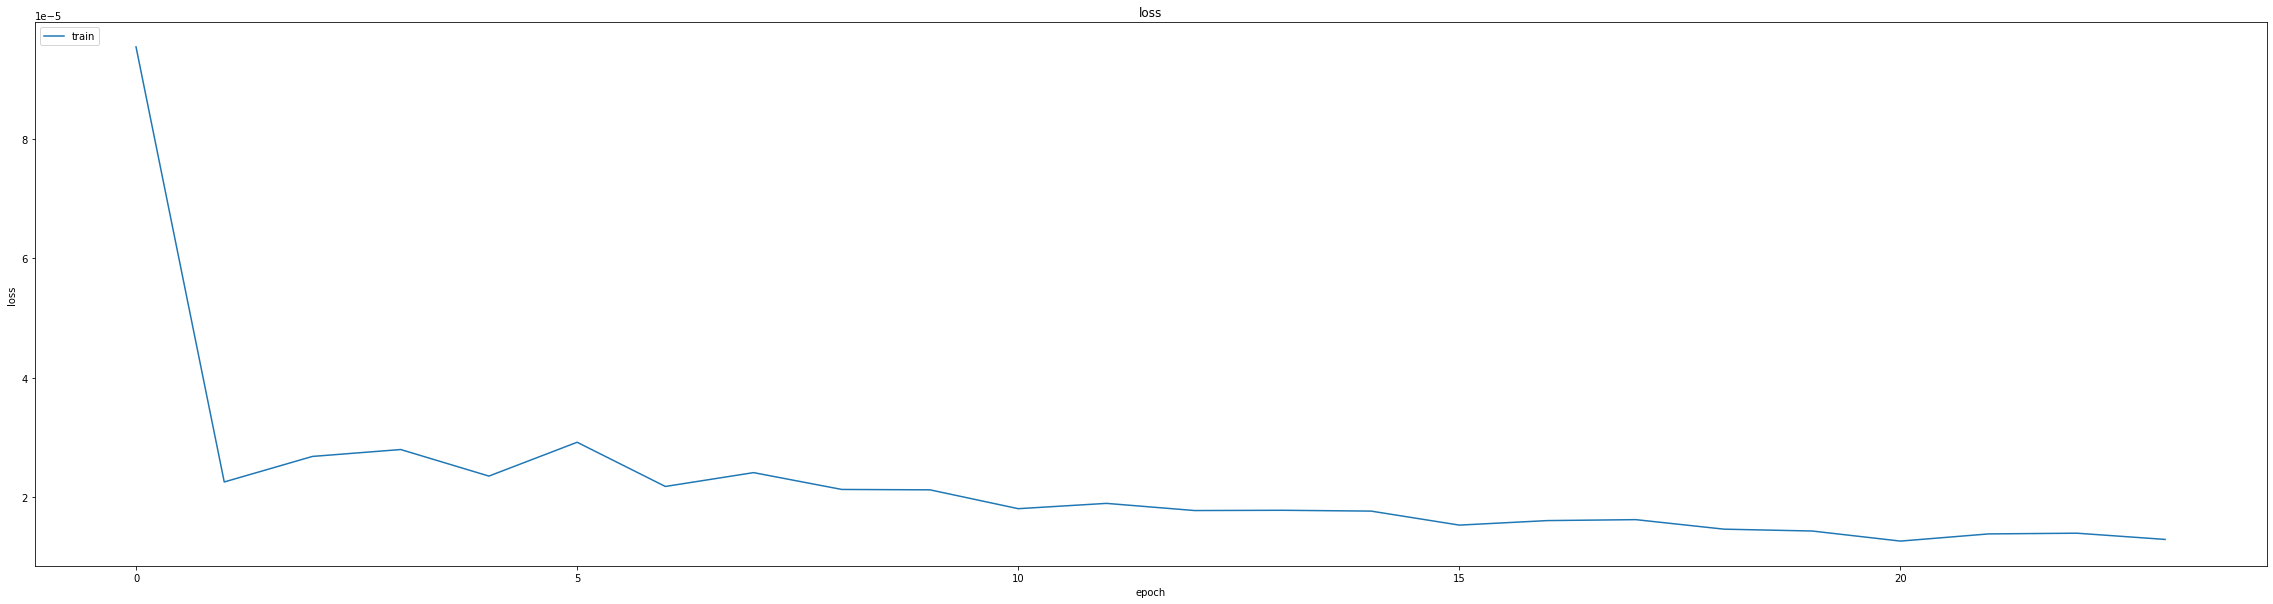

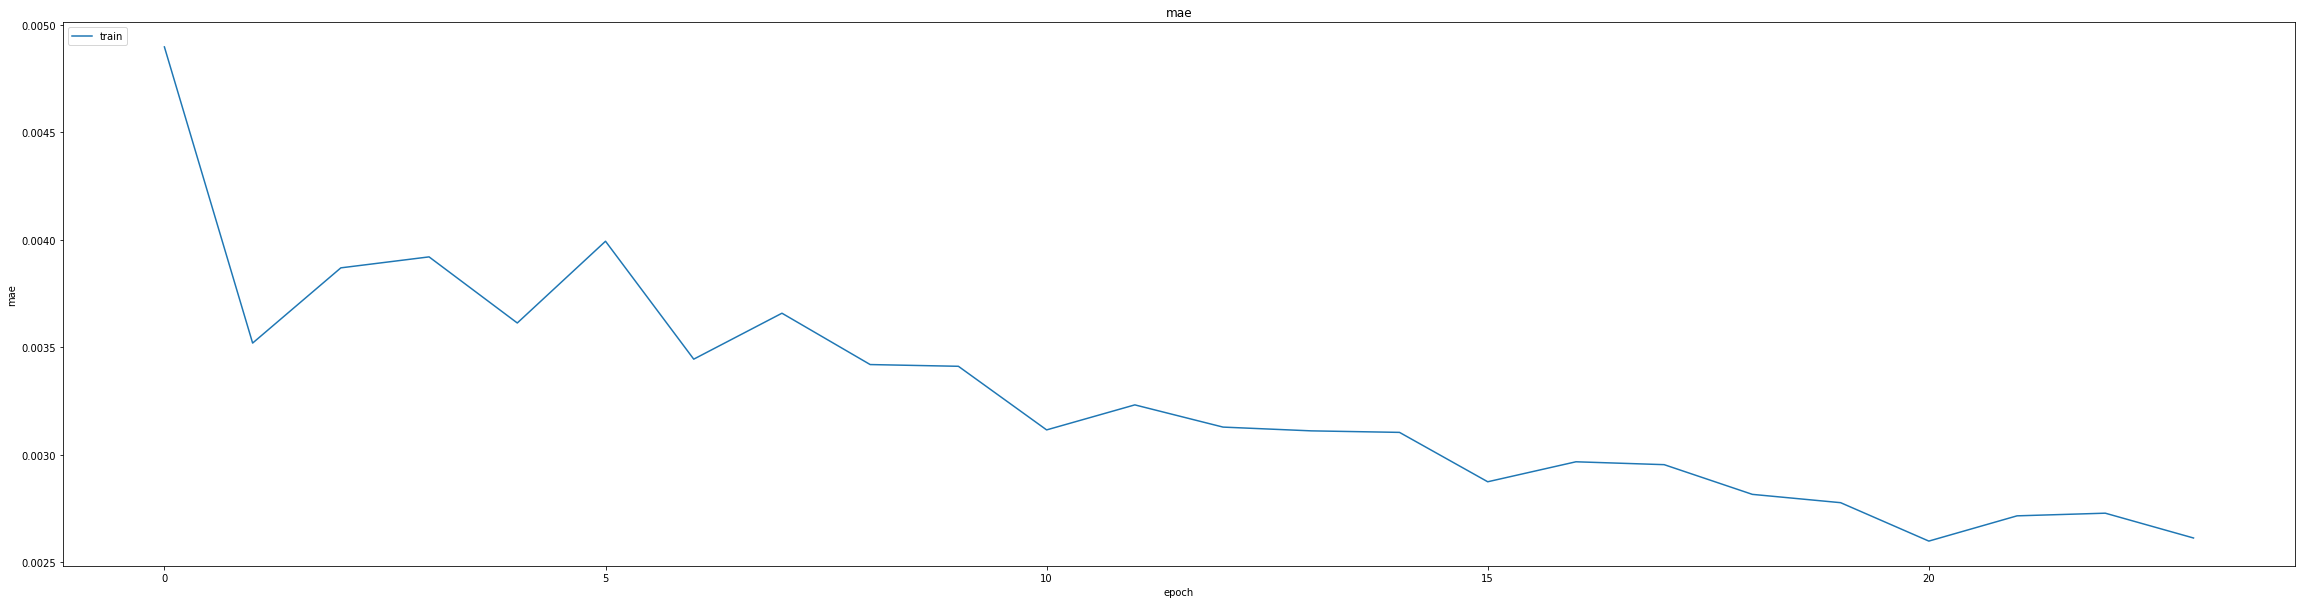

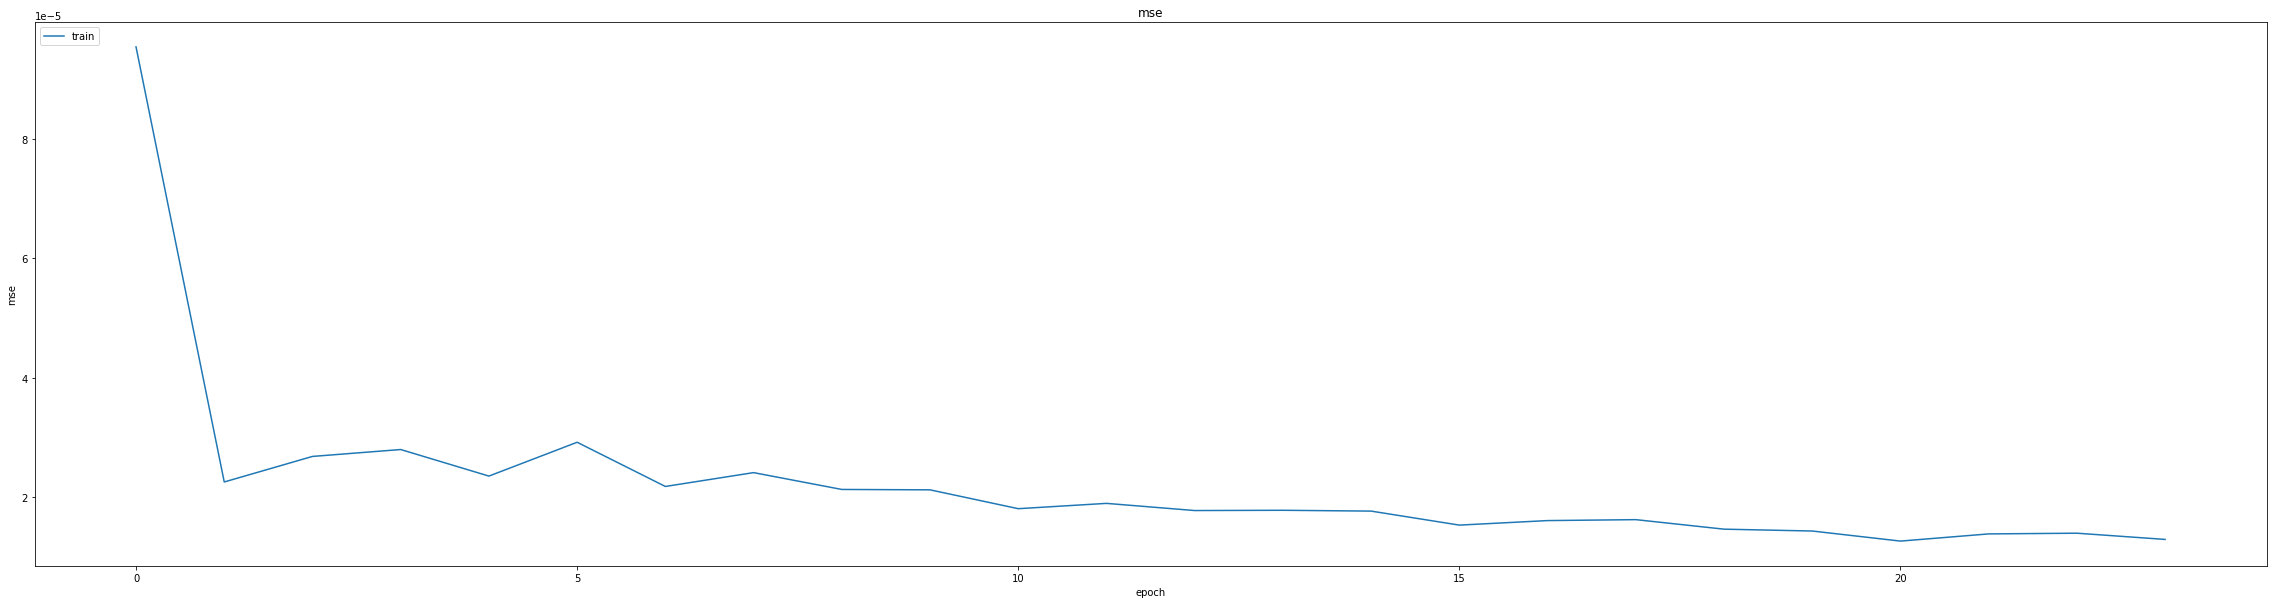

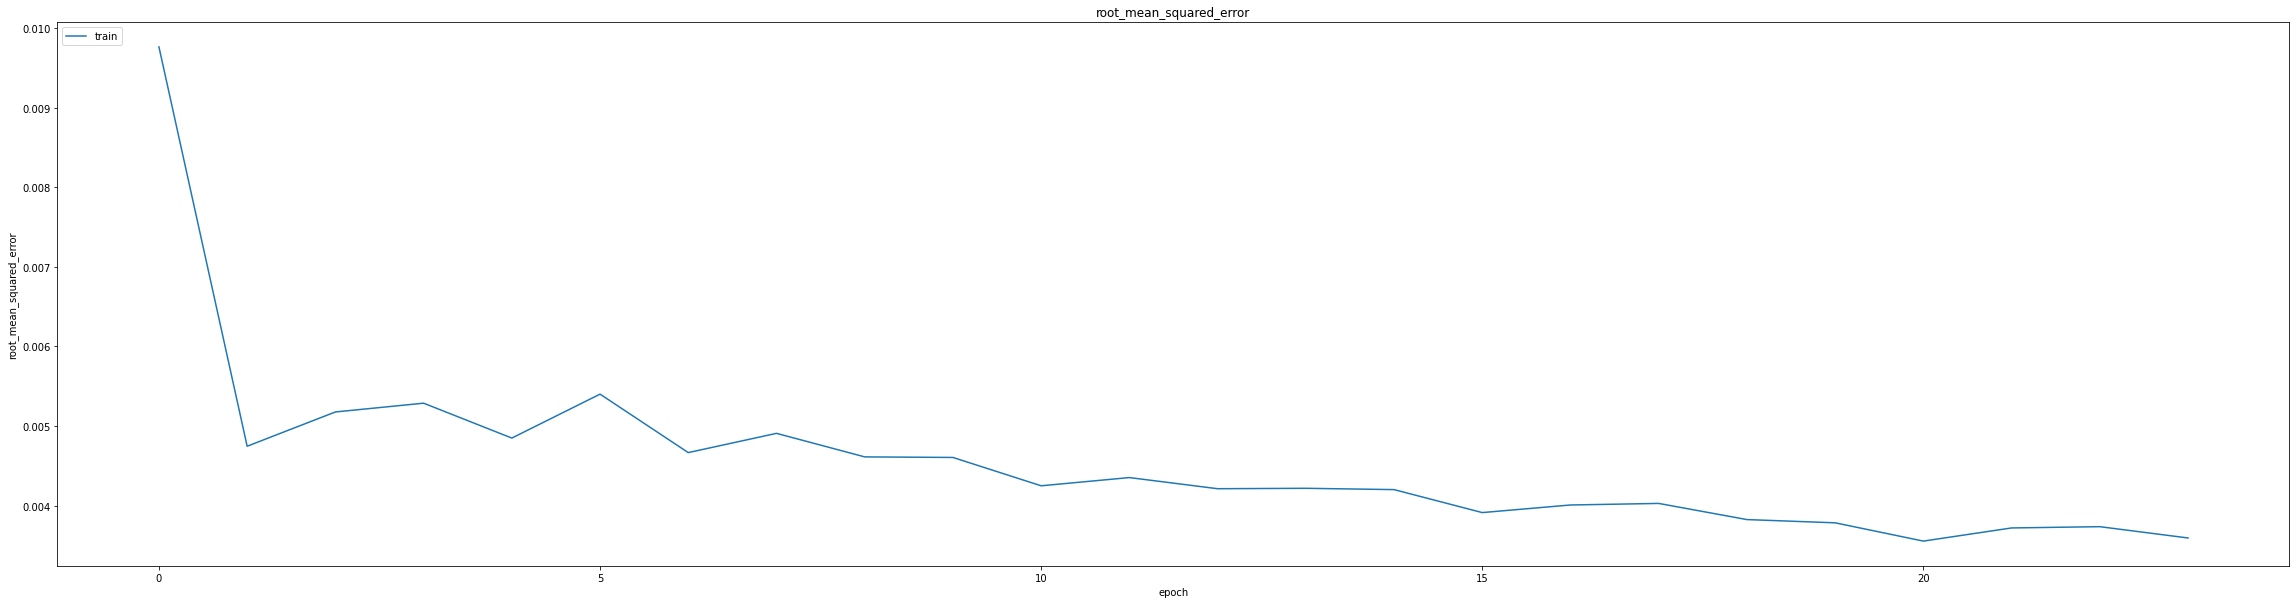

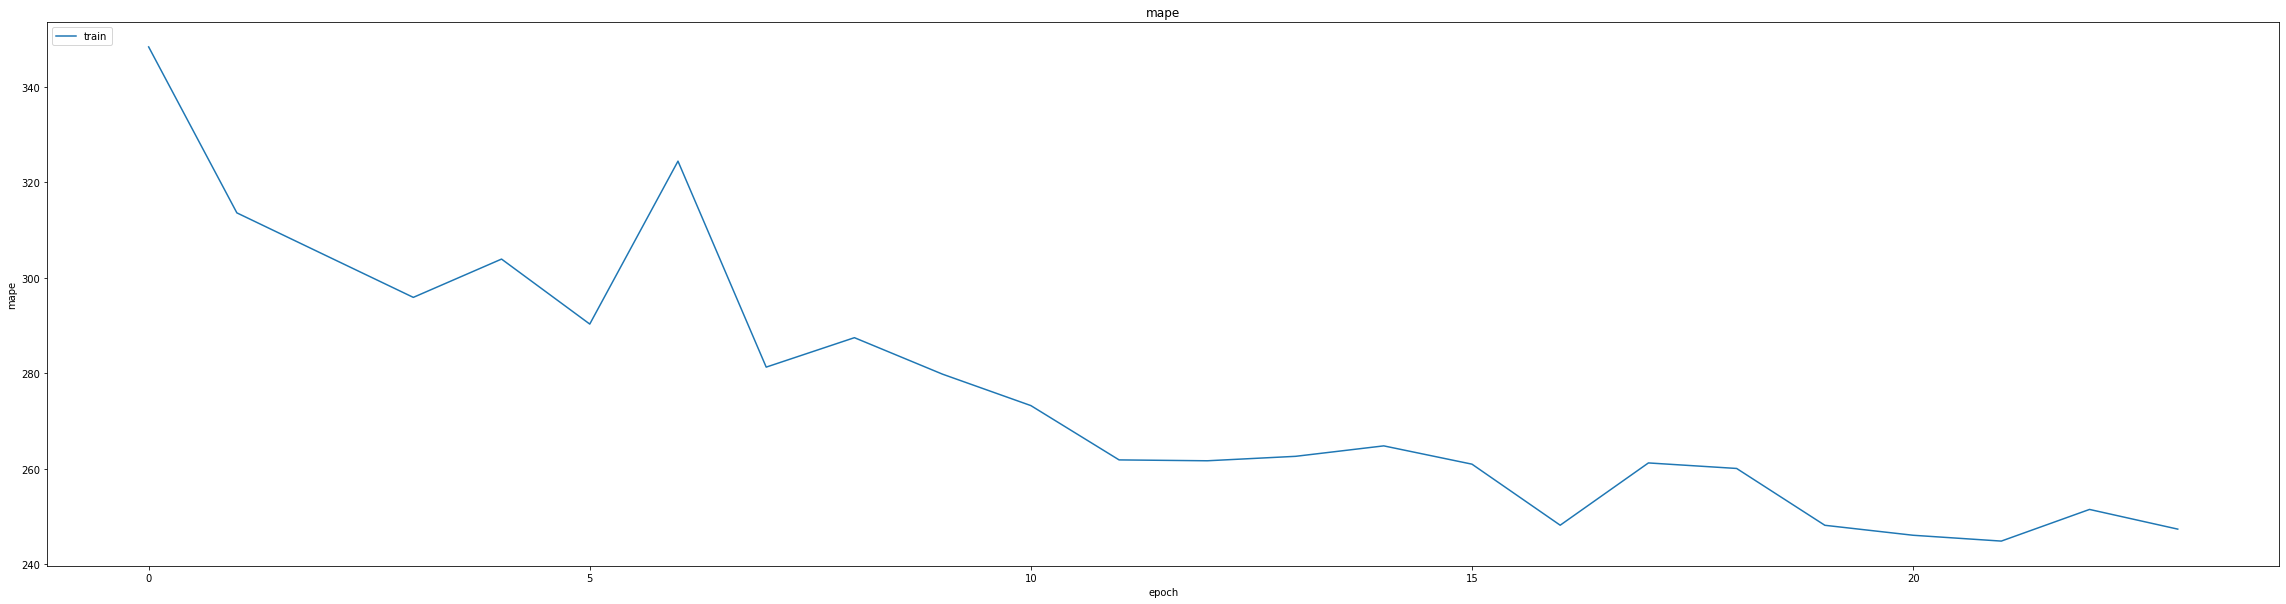

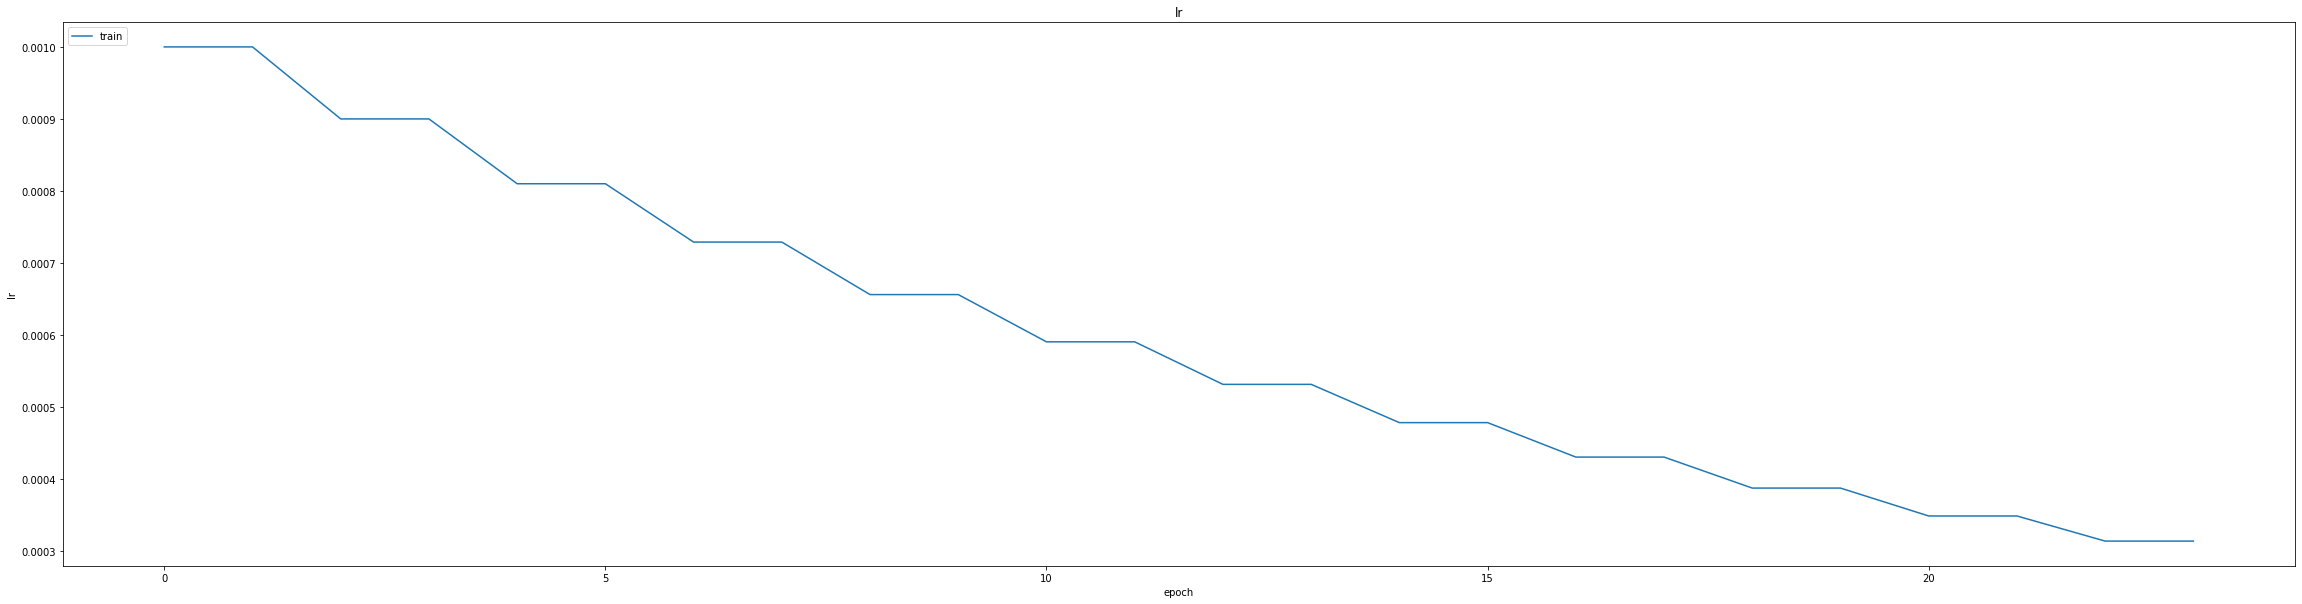

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00885041244328022
0.01183084212243557
348/348 [==============================] - 2s 4ms/step
0.99155804859474


348/348 [==============================] - 1s 4ms/step


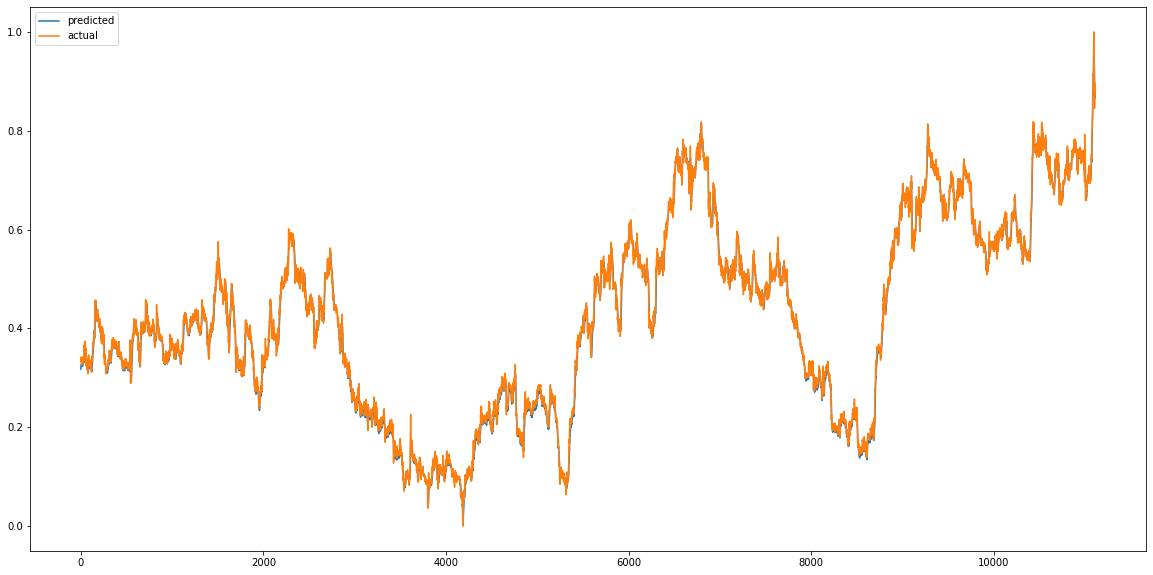

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


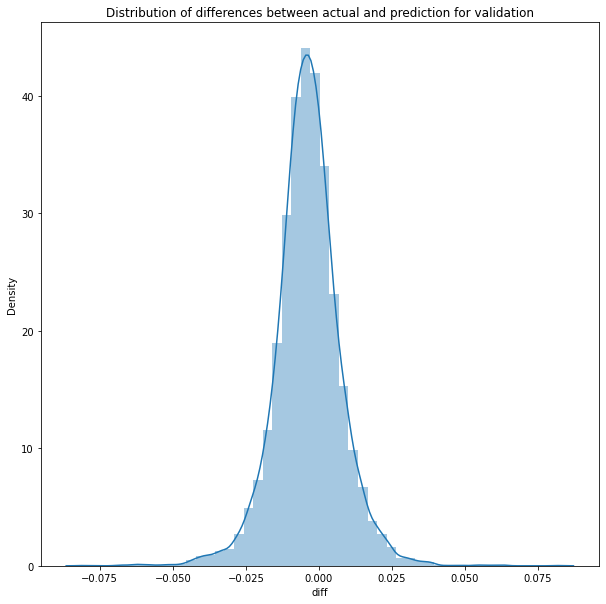

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


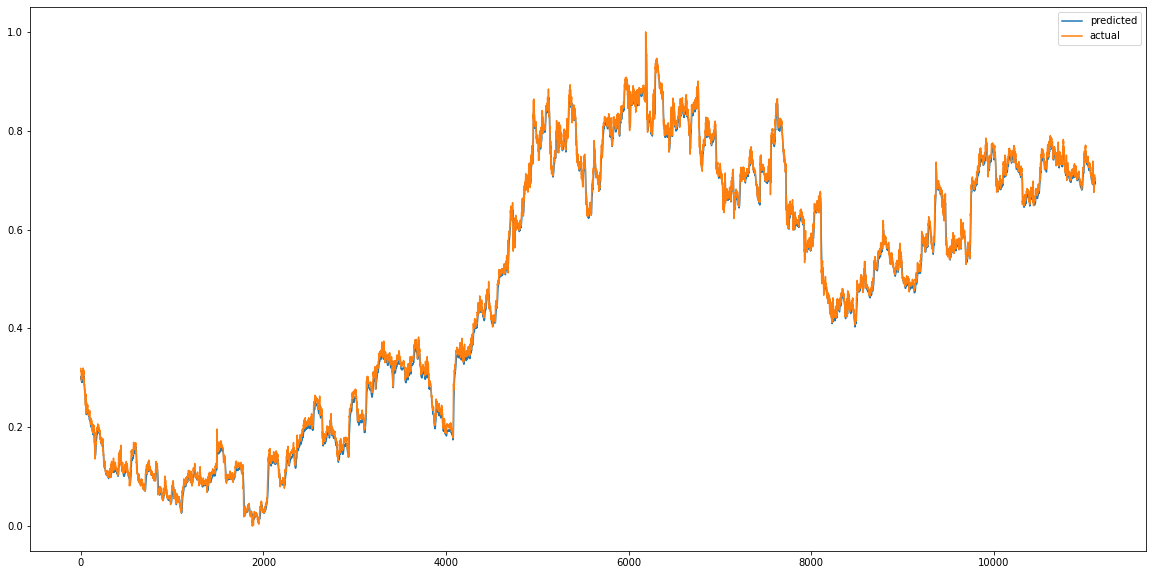

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


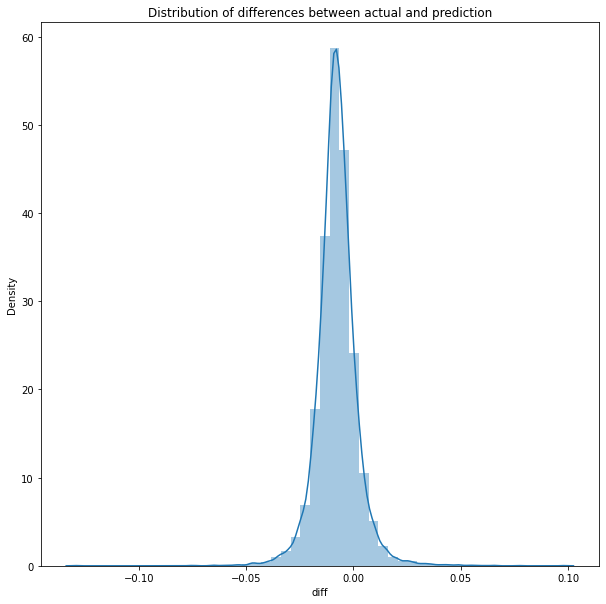

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00015089969640340873
RMSE :  0.012284123753992742
MAE :  0.009746898013932503
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9979176335353493


count    11115.000000
mean        -0.007730
std          0.009548
min         -0.129311
25%         -0.012461
50%         -0.007886
75%         -0.003122
max          0.098105
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 454.9485 - mae: 3.6490 - mse: 454.9485 - root_mean_squared_error: 21.3295 - mape: 23290.2188
Epoch 1: val_mse improved from inf to 0.04087, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 15s 29ms/step - loss: 451.6740 - mae: 3.6239 - mse: 451.6740 - root_mean_squared_error: 21.2526 - mape: 23123.3652 - val_loss: 0.0409 - val_mae: 0.1665 - val_mse: 0.0409 - val_root_mean_squared_error: 0.2022 - val_mape: 32339.6074
Epoch 2/75
402/406 [============================>.] - ETA: 0s - loss: 0.0309 - mae: 0.1404 - mse: 0.0309 - root_mean_squared_error: 0.1758 - mape: 6833.9209
Epoch 2: val_mse improved from 0.04087 to 0.00411, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0307 - mae: 0.1396 - mse: 0.0307 - root_mean_squared_error: 0.1752 - mape: 6768.4521 - val_loss: 0.0041 - val_mae: 0.0517 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 20997.3438
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 1.1888 - mae: 0.1317 - mse: 1.1888 - root_mean_squared_error: 1.0903 - mape: 5930.9722
Epoch 3: val_mse did not improve from 0.00411
406/406 [==============================] - 4s 10ms/step - loss: 1.1888 - mae: 0.1317 - mse: 1.1888 - root_mean_squared_error: 1.0903 - mape: 5930.9722 - val_loss: 0.0244 - val_mae: 0.1288 - val_mse: 0.0244 - val_root_mean_squared_error: 0.1561 - val_mape: 28893.2695
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.0238 - mae: 0.1279 - mse: 0.0238 - root_mean_squared_error: 0.1541 - mape: 5528.5283
Epoch 4: val_mse did not improve from 0.00411
406/406 [==============================] - 4s 10ms/step - l

406/406 [==============================] - 11s 27ms/step - loss: 0.0110 - mae: 0.0829 - mse: 0.0110 - root_mean_squared_error: 0.1047 - mape: 4276.2021 - val_loss: 0.0026 - val_mae: 0.0386 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0512 - val_mape: 19505.6660
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0386 - mse: 0.0030 - root_mean_squared_error: 0.0544 - mape: 3991.0508
Epoch 6: val_mse improved from 0.00262 to 0.00251, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0030 - mae: 0.0385 - mse: 0.0030 - root_mean_squared_error: 0.0543 - mape: 3962.5220 - val_loss: 0.0025 - val_mae: 0.0397 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 15354.4570
Epoch 7/75
402/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0286 - mse: 0.0018 - root_mean_squared_error: 0.0420 - mape: 2873.8772
Epoch 7: val_mse improved from 0.00251 to 0.00188, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0018 - mae: 0.0286 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 2846.2734 - val_loss: 0.0019 - val_mae: 0.0347 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0433 - val_mape: 13448.9072
Epoch 8/75
401/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0245 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 2684.5271
Epoch 8: val_mse improved from 0.00188 to 0.00144, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 0.0013 - mae: 0.0245 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 2652.3850 - val_loss: 0.0014 - val_mae: 0.0306 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 12106.2900
Epoch 9/75
401/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0221 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 2427.4902
Epoch 9: val_mse improved from 0.00144 to 0.00127, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 0.0010 - mae: 0.0220 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 2398.2402 - val_loss: 0.0013 - val_mae: 0.0285 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 11006.7529
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 8.5546e-04 - mae: 0.0204 - mse: 8.5546e-04 - root_mean_squared_error: 0.0292 - mape: 2069.2415
Epoch 10: val_mse did not improve from 0.00127
406/406 [==============================] - 4s 10ms/step - loss: 8.5593e-04 - mae: 0.0204 - mse: 8.5593e-04 - root_mean_squared_error: 0.0293 - mape: 2064.6084 - val_loss: 0.0015 - val_mae: 0.0310 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 10396.9229
Epoch 11/75
402/406 [============================>.] - ETA: 0s - loss: 7.2728e-04 - mae: 0.0190 - mse: 7.2728e-04 - root_mean_squared_error: 0.0270 - mape: 2010.8391
Epoch 11: val_mse did not improve from 0.00127
406/406 [======================

406/406 [==============================] - 11s 28ms/step - loss: 6.3542e-04 - mae: 0.0179 - mse: 6.3542e-04 - root_mean_squared_error: 0.0252 - mape: 1691.3461 - val_loss: 0.0013 - val_mae: 0.0282 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 8966.9785
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 5.6343e-04 - mae: 0.0172 - mse: 5.6343e-04 - root_mean_squared_error: 0.0237 - mape: 1562.3129
Epoch 13: val_mse did not improve from 0.00127
406/406 [==============================] - 4s 10ms/step - loss: 5.6278e-04 - mae: 0.0172 - mse: 5.6278e-04 - root_mean_squared_error: 0.0237 - mape: 1554.9562 - val_loss: 0.0013 - val_mae: 0.0281 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 8492.3223
Epoch 14/75
401/406 [============================>.] - ETA: 0s - loss: 4.9841e-04 - mae: 0.0163 - mse: 4.9841e-04 - root_mean_squared_error: 0.0223 - mape: 1509.0771
Epoch 14: val_mse did not improve from 0.00127
406/406 [================

406/406 [==============================] - 11s 28ms/step - loss: 4.5047e-04 - mae: 0.0156 - mse: 4.5047e-04 - root_mean_squared_error: 0.0212 - mape: 1335.6602 - val_loss: 0.0013 - val_mae: 0.0280 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 7599.6831
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 4.1434e-04 - mae: 0.0151 - mse: 4.1434e-04 - root_mean_squared_error: 0.0204 - mape: 1271.4133
Epoch 16: val_mse did not improve from 0.00126
406/406 [==============================] - 4s 10ms/step - loss: 4.1434e-04 - mae: 0.0151 - mse: 4.1434e-04 - root_mean_squared_error: 0.0204 - mape: 1271.4133 - val_loss: 0.0015 - val_mae: 0.0316 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 7436.1548
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 3.7819e-04 - mae: 0.0145 - mse: 3.7819e-04 - root_mean_squared_error: 0.0194 - mape: 1135.3396
Epoch 17: val_mse did not improve from 0.00126
406/406 [================

406/406 [==============================] - 12s 29ms/step - loss: 2.8967e-04 - mae: 0.0128 - mse: 2.8967e-04 - root_mean_squared_error: 0.0170 - mape: 1022.0003 - val_loss: 0.0011 - val_mae: 0.0257 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 6357.8535
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 2.7035e-04 - mae: 0.0124 - mse: 2.7035e-04 - root_mean_squared_error: 0.0164 - mape: 904.5081
Epoch 21: val_mse did not improve from 0.00113
406/406 [==============================] - 4s 10ms/step - loss: 2.7035e-04 - mae: 0.0124 - mse: 2.7035e-04 - root_mean_squared_error: 0.0164 - mape: 904.5081 - val_loss: 0.0012 - val_mae: 0.0259 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 6130.2979
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 2.4924e-04 - mae: 0.0119 - mse: 2.4924e-04 - root_mean_squared_error: 0.0158 - mape: 959.1155
Epoch 22: val_mse did not improve from 0.00113
406/406 [===================

406/406 [==============================] - 12s 29ms/step - loss: 1.4277e-04 - mae: 0.0089 - mse: 1.4277e-04 - root_mean_squared_error: 0.0119 - mape: 573.4335 - val_loss: 0.0011 - val_mae: 0.0244 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0324 - val_mape: 4271.4131
Epoch 31/75
401/406 [============================>.] - ETA: 0s - loss: 1.3589e-04 - mae: 0.0087 - mse: 1.3589e-04 - root_mean_squared_error: 0.0117 - mape: 559.9605
Epoch 31: val_mse did not improve from 0.00105
406/406 [==============================] - 4s 10ms/step - loss: 1.3570e-04 - mae: 0.0087 - mse: 1.3570e-04 - root_mean_squared_error: 0.0116 - mape: 553.2172 - val_loss: 0.0012 - val_mae: 0.0259 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 4341.0122
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 1.3770e-04 - mae: 0.0087 - mse: 1.3770e-04 - root_mean_squared_error: 0.0117 - mape: 532.6060
Epoch 32: val_mse did not improve from 0.00105
406/406 [====================

406/406 [==============================] - 11s 28ms/step - loss: 1.2839e-04 - mae: 0.0084 - mse: 1.2839e-04 - root_mean_squared_error: 0.0113 - mape: 502.3797 - val_loss: 0.0010 - val_mae: 0.0232 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0316 - val_mape: 4156.3594
Epoch 35/75
401/406 [============================>.] - ETA: 0s - loss: 1.2428e-04 - mae: 0.0082 - mse: 1.2428e-04 - root_mean_squared_error: 0.0111 - mape: 505.7500
Epoch 35: val_mse did not improve from 0.00100
406/406 [==============================] - 4s 10ms/step - loss: 1.2424e-04 - mae: 0.0082 - mse: 1.2424e-04 - root_mean_squared_error: 0.0111 - mape: 499.6615 - val_loss: 0.0011 - val_mae: 0.0243 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 4233.6978
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 1.1598e-04 - mae: 0.0080 - mse: 1.1598e-04 - root_mean_squared_error: 0.0108 - mape: 499.3068
Epoch 36: val_mse did not improve from 0.00100
406/406 [====================

406/406 [==============================] - 11s 26ms/step - loss: 1.0330e-04 - mae: 0.0075 - mse: 1.0330e-04 - root_mean_squared_error: 0.0102 - mape: 451.0588 - val_loss: 9.6680e-04 - val_mae: 0.0226 - val_mse: 9.6680e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 3969.2837
Epoch 43/75
405/406 [============================>.] - ETA: 0s - loss: 1.0024e-04 - mae: 0.0074 - mse: 1.0024e-04 - root_mean_squared_error: 0.0100 - mape: 440.7599
Epoch 43: val_mse did not improve from 0.00097
406/406 [==============================] - 4s 10ms/step - loss: 1.0014e-04 - mae: 0.0074 - mse: 1.0014e-04 - root_mean_squared_error: 0.0100 - mape: 439.7637 - val_loss: 0.0010 - val_mae: 0.0225 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 3900.1130
Epoch 44/75
404/406 [============================>.] - ETA: 0s - loss: 9.6550e-05 - mae: 0.0073 - mse: 9.6550e-05 - root_mean_squared_error: 0.0098 - mape: 427.1346
Epoch 44: val_mse improved from 0.00097 to 0.00093, saving model to 

406/406 [==============================] - 11s 28ms/step - loss: 9.6626e-05 - mae: 0.0073 - mse: 9.6626e-05 - root_mean_squared_error: 0.0098 - mape: 425.1414 - val_loss: 9.3014e-04 - val_mae: 0.0219 - val_mse: 9.3014e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 3952.6465
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 8.8980e-05 - mae: 0.0070 - mse: 8.8980e-05 - root_mean_squared_error: 0.0094 - mape: 408.9867
Epoch 45: val_mse improved from 0.00093 to 0.00084, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 8.9044e-05 - mae: 0.0070 - mse: 8.9044e-05 - root_mean_squared_error: 0.0094 - mape: 408.0647 - val_loss: 8.3719e-04 - val_mae: 0.0213 - val_mse: 8.3719e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 3948.6340
Epoch 46/75
403/406 [============================>.] - ETA: 0s - loss: 9.4520e-05 - mae: 0.0072 - mse: 9.4520e-05 - root_mean_squared_error: 0.0097 - mape: 417.5856
Epoch 46: val_mse did not improve from 0.00084
406/406 [==============================] - 4s 10ms/step - loss: 9.4316e-05 - mae: 0.0072 - mse: 9.4316e-05 - root_mean_squared_error: 0.0097 - mape: 414.6020 - val_loss: 9.4316e-04 - val_mae: 0.0217 - val_mse: 9.4316e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 3708.6621
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 9.3726e-05 - mae: 0.0072 - mse: 9.3726e-05 - root_mean_squared_error: 0.0097 - mape: 421.0005
Epoch 47: val_mse did not improve from 0.00084
406/406 [====

406/406 [==============================] - 11s 27ms/step - loss: 8.2314e-05 - mae: 0.0067 - mse: 8.2314e-05 - root_mean_squared_error: 0.0091 - mape: 343.2277 - val_loss: 7.6056e-04 - val_mae: 0.0214 - val_mse: 7.6056e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 3280.6094
Epoch 55/75
406/406 [==============================] - ETA: 0s - loss: 8.5131e-05 - mae: 0.0068 - mse: 8.5131e-05 - root_mean_squared_error: 0.0092 - mape: 346.9170
Epoch 55: val_mse improved from 0.00076 to 0.00066, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 8.5131e-05 - mae: 0.0068 - mse: 8.5131e-05 - root_mean_squared_error: 0.0092 - mape: 346.9170 - val_loss: 6.5595e-04 - val_mae: 0.0181 - val_mse: 6.5595e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 3091.1895
Epoch 56/75
404/406 [============================>.] - ETA: 0s - loss: 8.2717e-05 - mae: 0.0067 - mse: 8.2717e-05 - root_mean_squared_error: 0.0091 - mape: 340.5406
Epoch 56: val_mse did not improve from 0.00066
406/406 [==============================] - 4s 10ms/step - loss: 8.2626e-05 - mae: 0.0067 - mse: 8.2626e-05 - root_mean_squared_error: 0.0091 - mape: 338.9433 - val_loss: 8.9672e-04 - val_mae: 0.0209 - val_mse: 8.9672e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 2931.9878
Epoch 57/75
406/406 [==============================] - ETA: 0s - loss: 7.3829e-05 - mae: 0.0064 - mse: 7.3829e-05 - root_mean_squared_error: 0.0086 - mape: 350.7139
Epoch 57: val_mse did not improve from 0.00066
406/406 [====

406/406 [==============================] - 11s 28ms/step - loss: 7.5830e-05 - mae: 0.0064 - mse: 7.5830e-05 - root_mean_squared_error: 0.0087 - mape: 350.8159 - val_loss: 6.1999e-04 - val_mae: 0.0177 - val_mse: 6.1999e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 2833.1138
Epoch 59/75
405/406 [============================>.] - ETA: 0s - loss: 8.2036e-05 - mae: 0.0066 - mse: 8.2036e-05 - root_mean_squared_error: 0.0091 - mape: 353.5023
Epoch 59: val_mse did not improve from 0.00062
406/406 [==============================] - 4s 10ms/step - loss: 8.1973e-05 - mae: 0.0066 - mse: 8.1973e-05 - root_mean_squared_error: 0.0091 - mape: 352.7058 - val_loss: 7.1456e-04 - val_mae: 0.0186 - val_mse: 7.1456e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 2712.0803
Epoch 60/75
406/406 [==============================] - ETA: 0s - loss: 6.3403e-05 - mae: 0.0059 - mse: 6.3403e-05 - root_mean_squared_error: 0.0080 - mape: 345.2158
Epoch 60: val_mse did not improve from 0.00062
406/406 [====

406/406 [==============================] - 11s 27ms/step - loss: 6.5851e-05 - mae: 0.0060 - mse: 6.5851e-05 - root_mean_squared_error: 0.0081 - mape: 344.8991 - val_loss: 5.8271e-04 - val_mae: 0.0168 - val_mse: 5.8271e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 2073.9929
Epoch 66/75
406/406 [==============================] - ETA: 0s - loss: 5.0575e-05 - mae: 0.0053 - mse: 5.0575e-05 - root_mean_squared_error: 0.0071 - mape: 318.5826
Epoch 66: val_mse did not improve from 0.00058
406/406 [==============================] - 4s 10ms/step - loss: 5.0575e-05 - mae: 0.0053 - mse: 5.0575e-05 - root_mean_squared_error: 0.0071 - mape: 318.5826 - val_loss: 7.2248e-04 - val_mae: 0.0194 - val_mse: 7.2248e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 2101.6594
Epoch 67/75
403/406 [============================>.] - ETA: 0s - loss: 5.3109e-05 - mae: 0.0054 - mse: 5.3109e-05 - root_mean_squared_error: 0.0073 - mape: 315.5633
Epoch 67: val_mse did not improve from 0.00058
406/406 [====

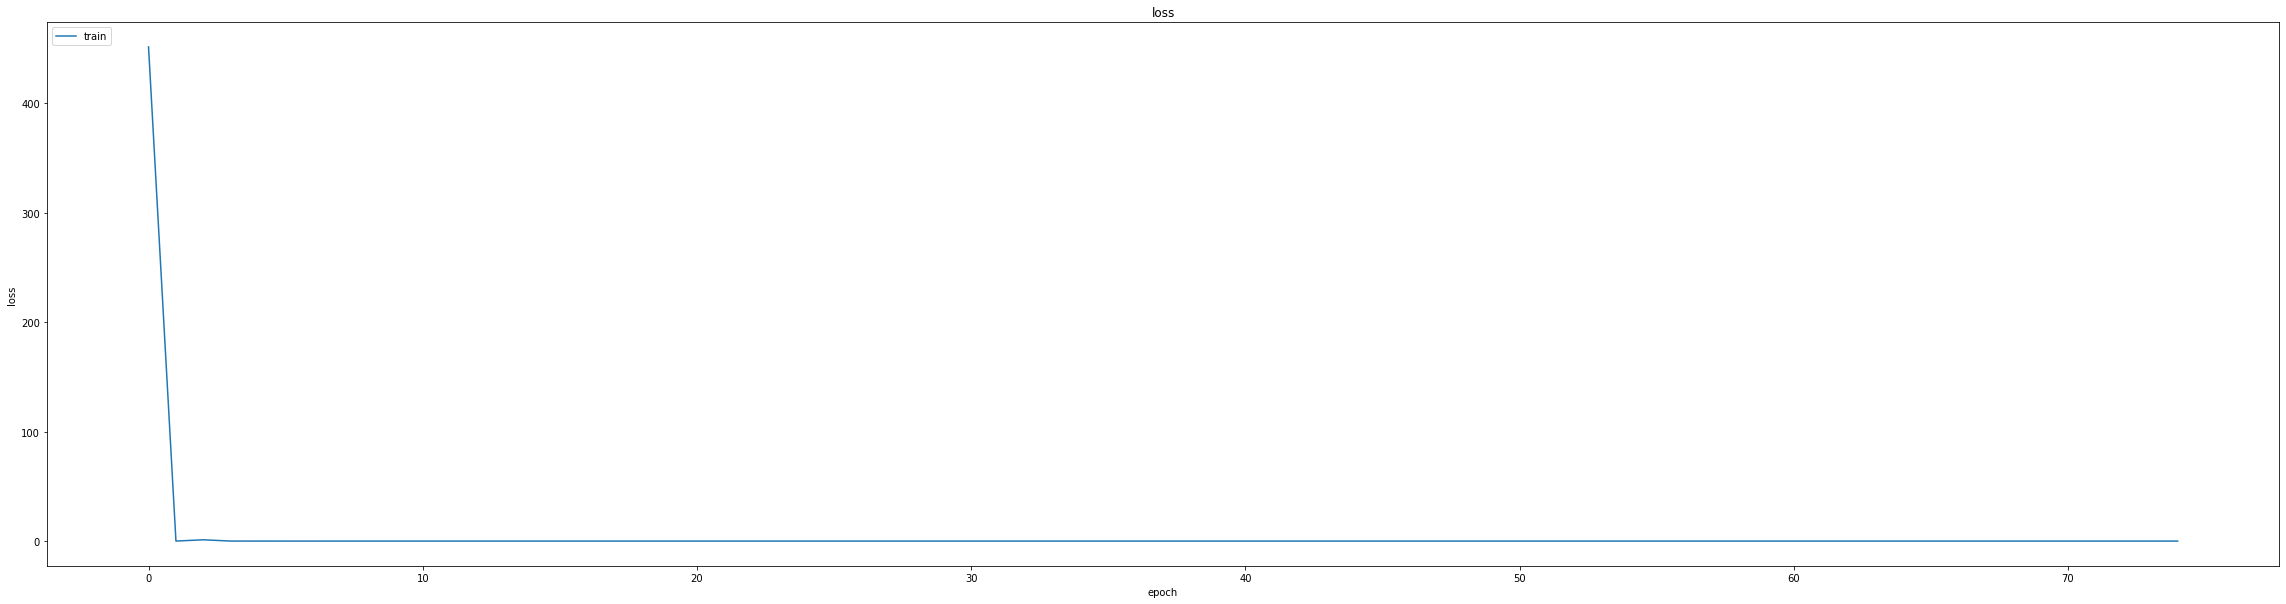

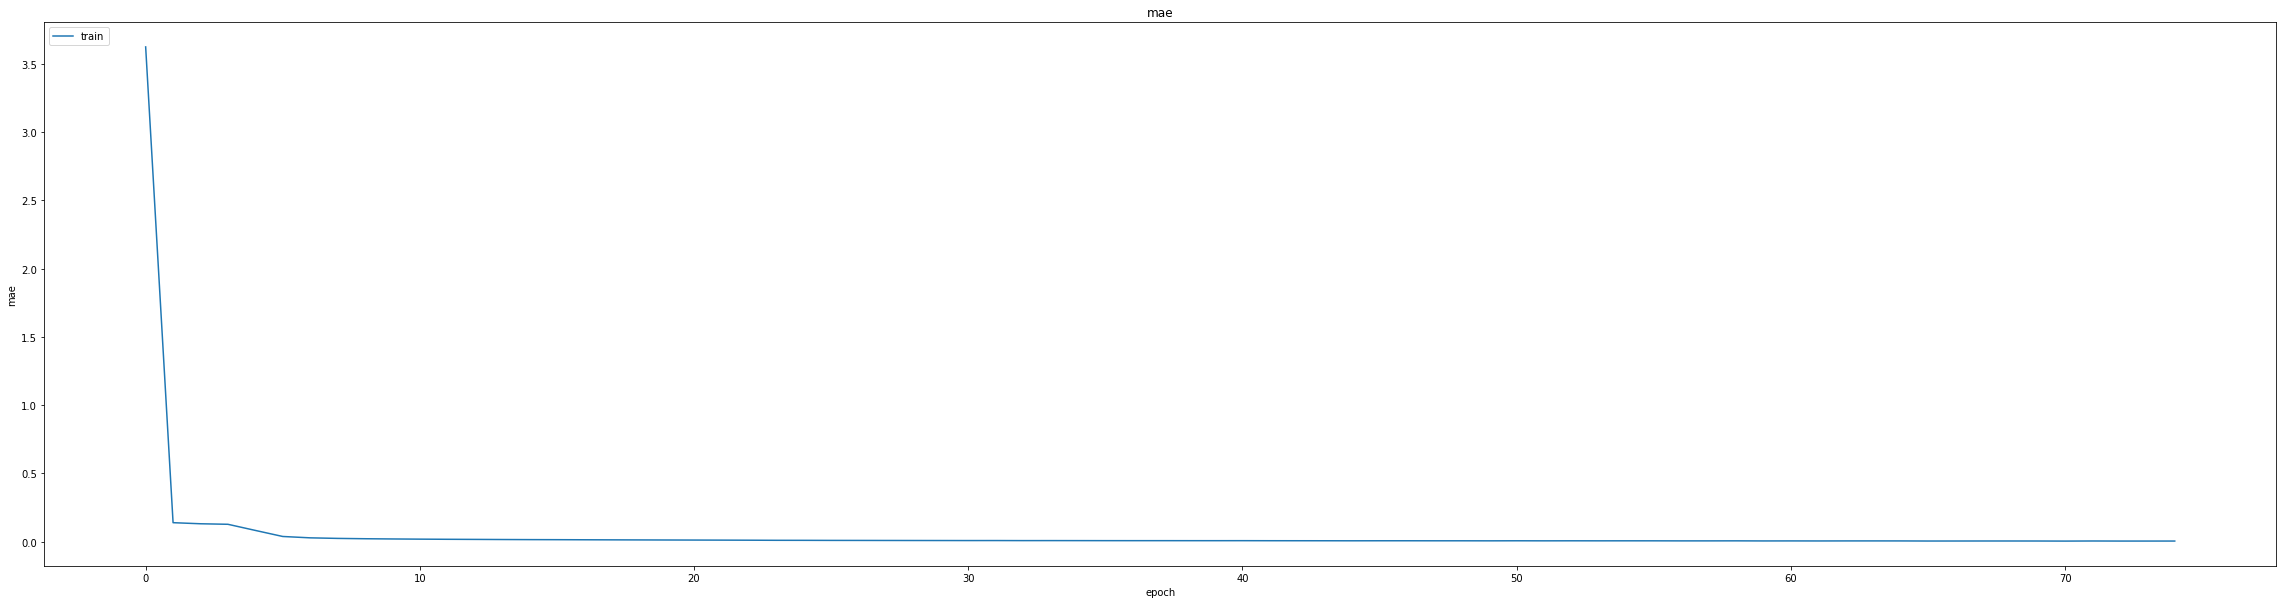

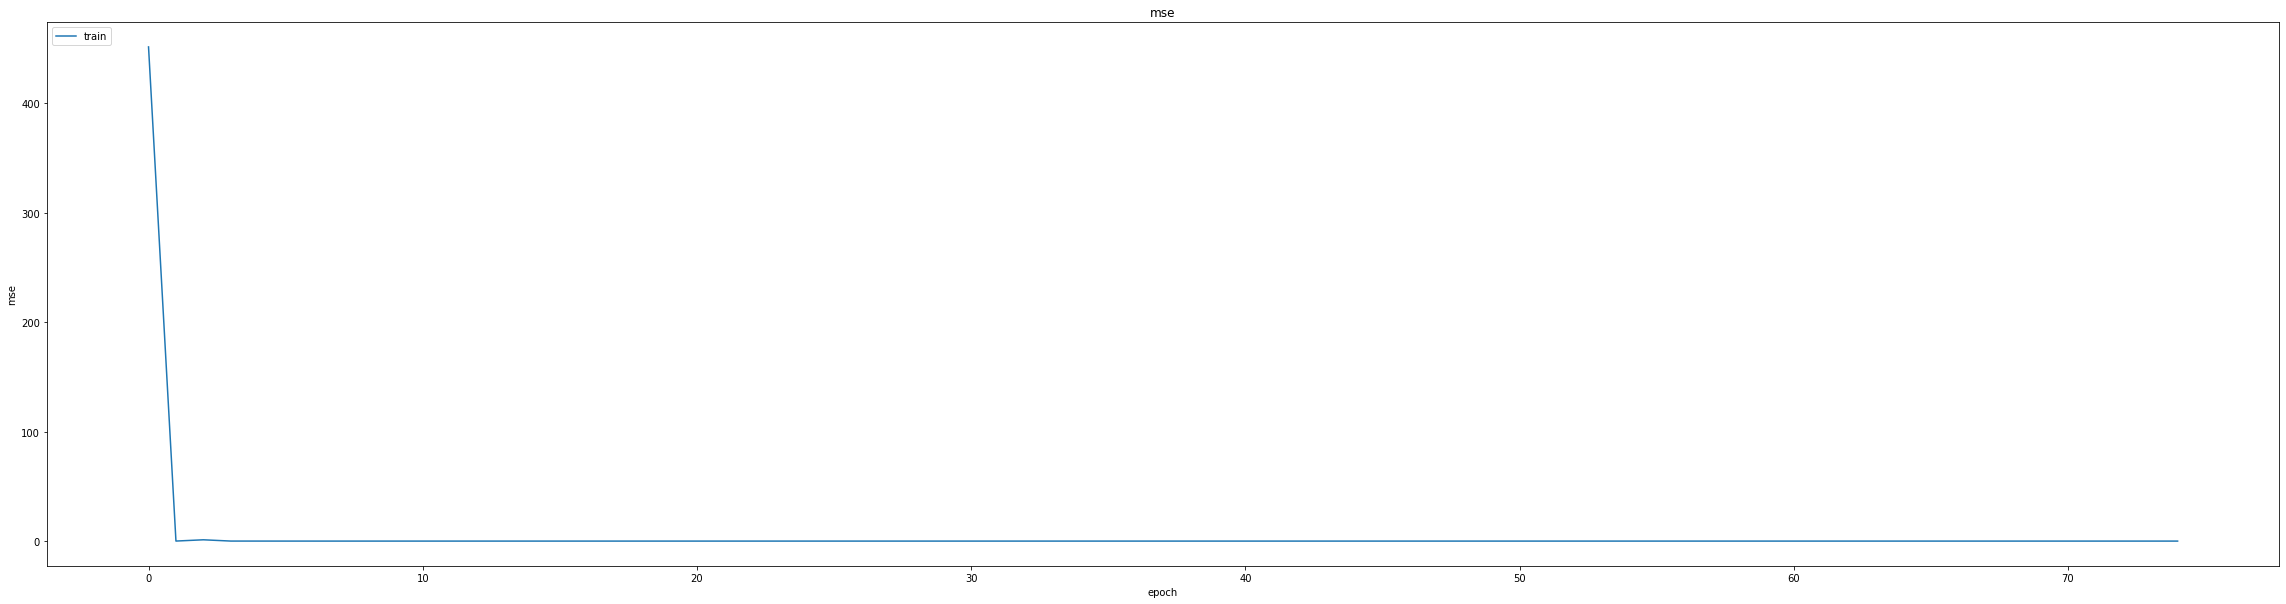

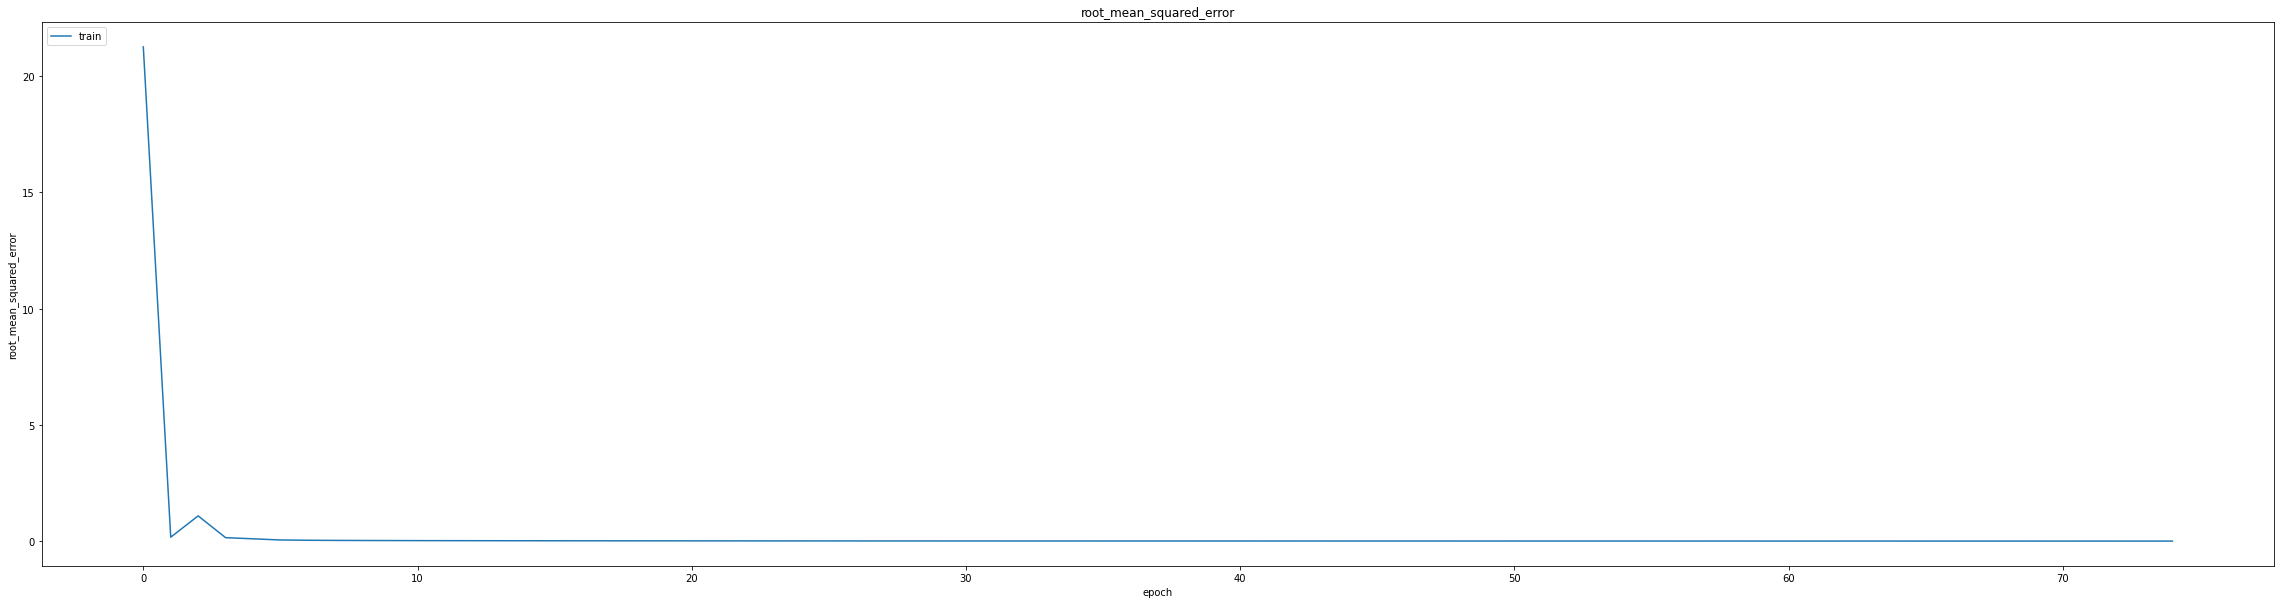

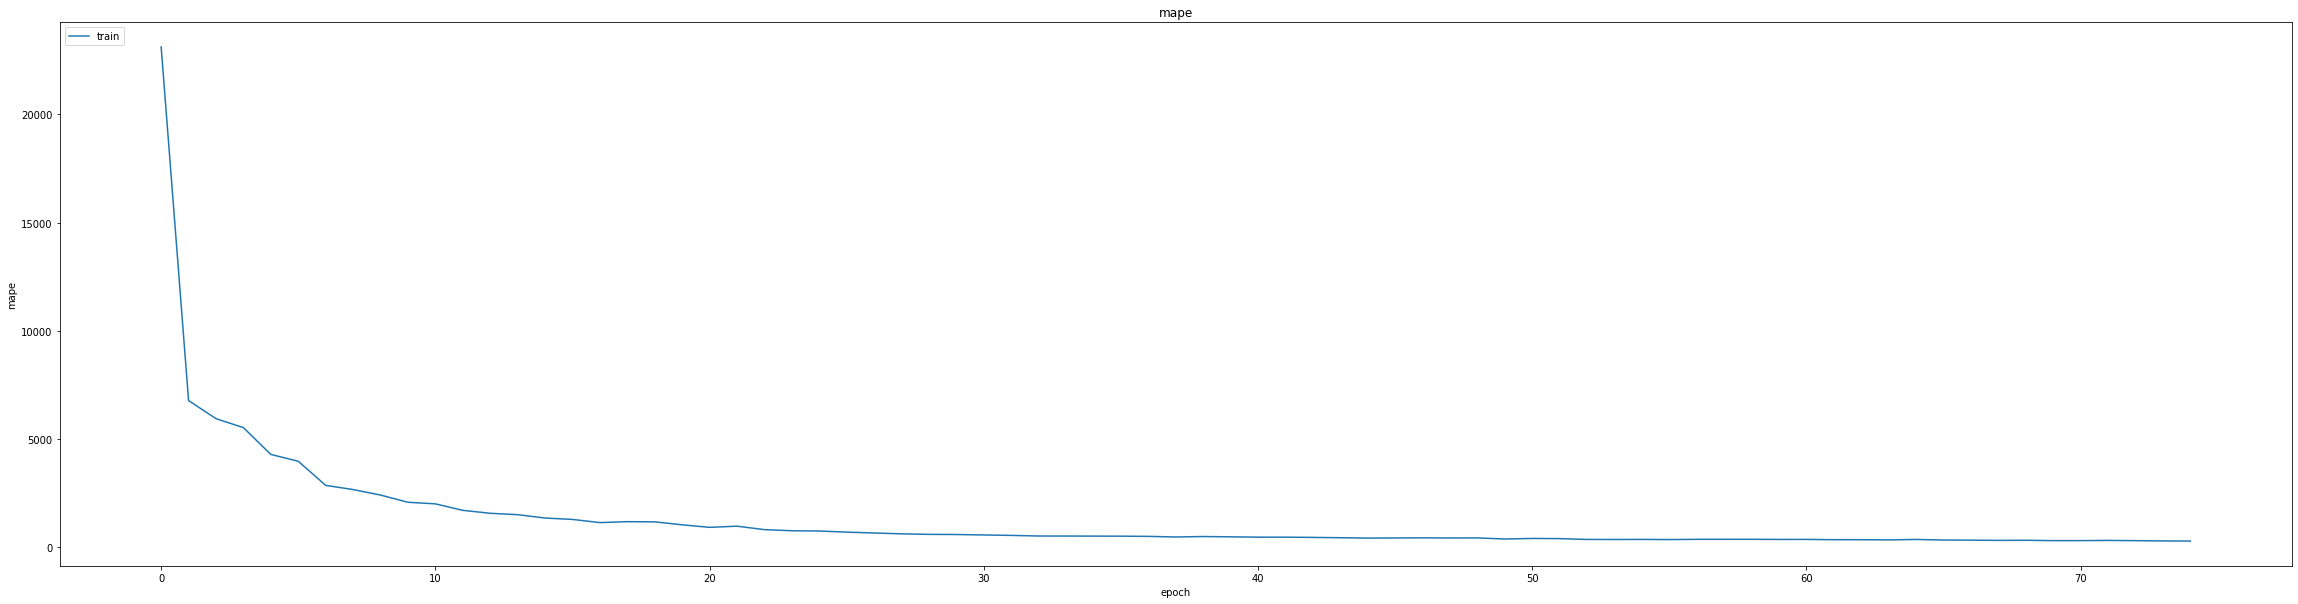

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016804300248622894
0.024139316752552986
348/348 [==============================] - 2s 3ms/step
0.9817728402399947


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
402/406 [============================>.] - ETA: 0s - loss: 1.3501e-04 - mae: 0.0063 - mse: 1.3501e-04 - root_mean_squared_error: 0.0116 - mape: 317.7620
Epoch 1: val_mse improved from 0.00058 to 0.00057, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 17s 32ms/step - loss: 1.3419e-04 - mae: 0.0062 - mse: 1.3419e-04 - root_mean_squared_error: 0.0116 - mape: 314.7152 - val_loss: 5.7255e-04 - val_mae: 0.0170 - val_mse: 5.7255e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 1883.5115 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 4.1665e-05 - mae: 0.0048 - mse: 4.1665e-05 - root_mean_squared_error: 0.0065 - mape: 283.6037
Epoch 2: val_mse did not improve from 0.00057
406/406 [==============================] - 7s 16ms/step - loss: 4.1728e-05 - mae: 0.0048 - mse: 4.1728e-05 - root_mean_squared_error: 0.0065 - mape: 281.5789 - val_loss: 6.1492e-04 - val_mae: 0.0184 - val_mse: 6.1492e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 1827.9343 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
402/406 [============================>.] - ETA: 0s - loss: 4.5887e-05 - mae: 0.0051 - mse: 4.5887e-05 - root_mean_squared_error: 0.0068 - mape: 291.2054
E

406/406 [==============================] - 11s 28ms/step - loss: 4.8581e-05 - mae: 0.0051 - mse: 4.8581e-05 - root_mean_squared_error: 0.0070 - mape: 287.1582 - val_loss: 5.4287e-04 - val_mae: 0.0167 - val_mse: 5.4287e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 2287.9912 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
406/406 [==============================] - ETA: 0s - loss: 4.5398e-05 - mae: 0.0050 - mse: 4.5398e-05 - root_mean_squared_error: 0.0067 - mape: 284.3515
Epoch 5: val_mse did not improve from 0.00054
406/406 [==============================] - 4s 10ms/step - loss: 4.5398e-05 - mae: 0.0050 - mse: 4.5398e-05 - root_mean_squared_error: 0.0067 - mape: 284.3515 - val_loss: 8.5374e-04 - val_mae: 0.0239 - val_mse: 8.5374e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 1957.8967 - lr: 8.1000e-04
Epoch 6/25
403/406 [============================>.] - ETA: 0s - loss: 4.5826e-05 - mae: 0.0050 - mse: 4.5826e-05 - root_mean_squared_error: 0.0068 - mape: 26

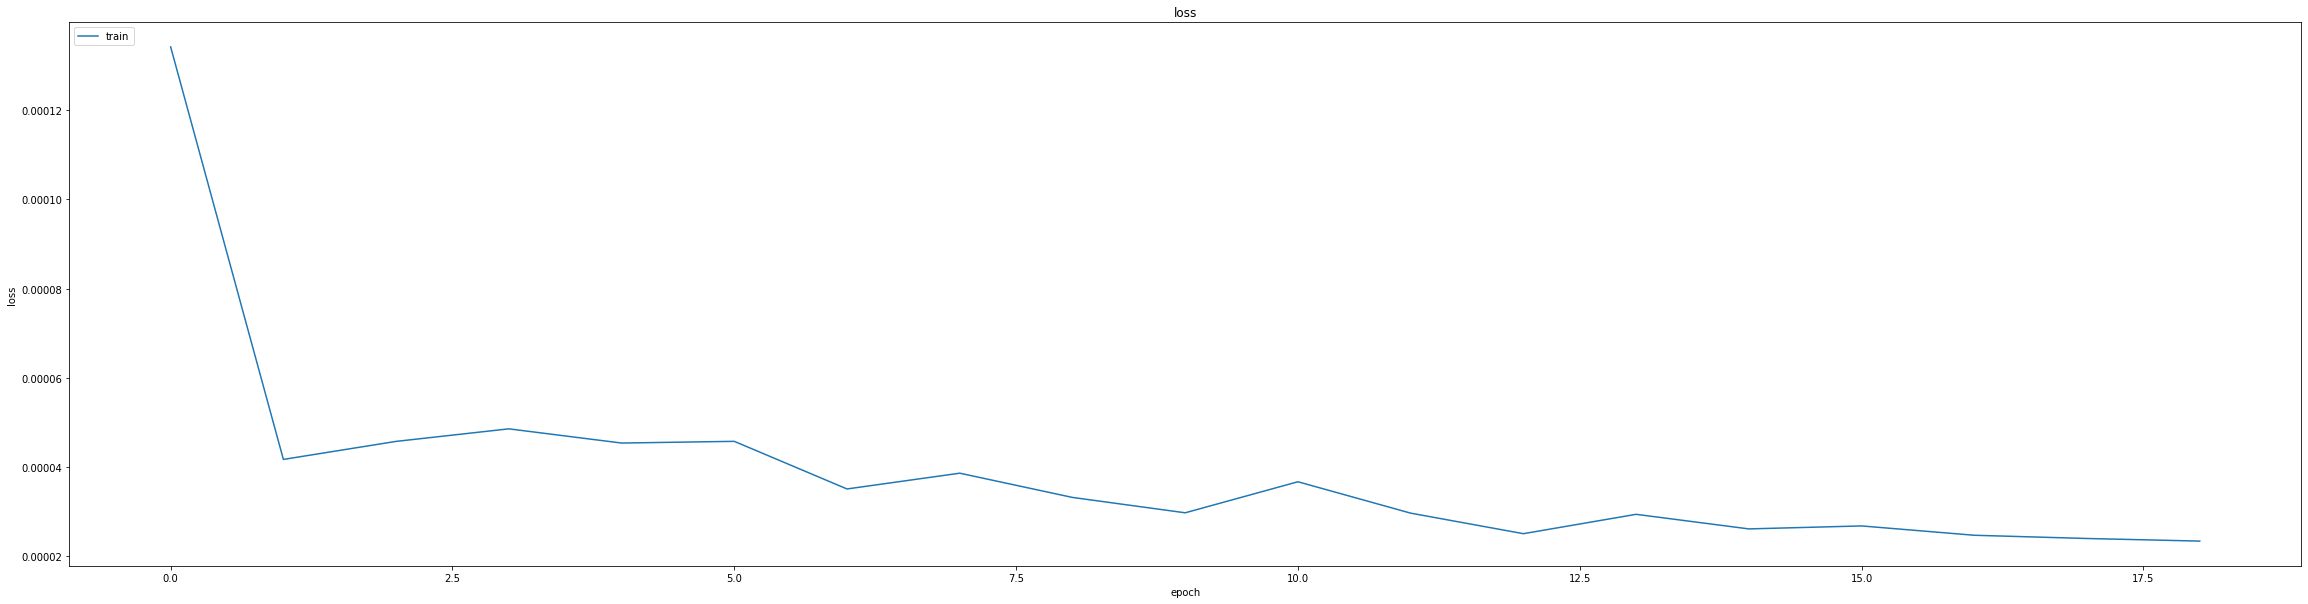

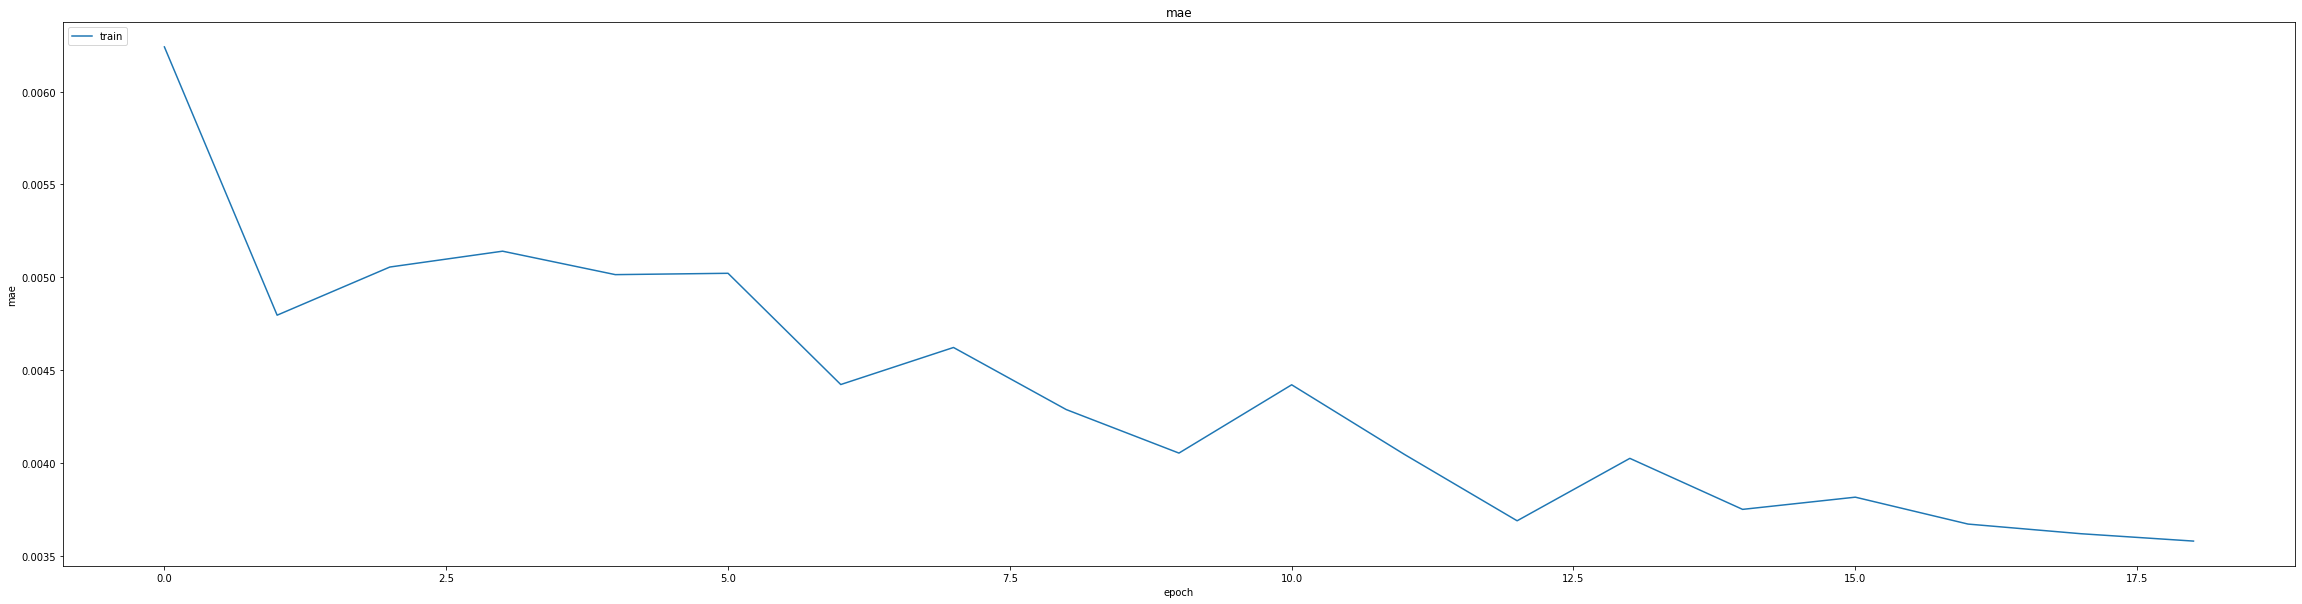

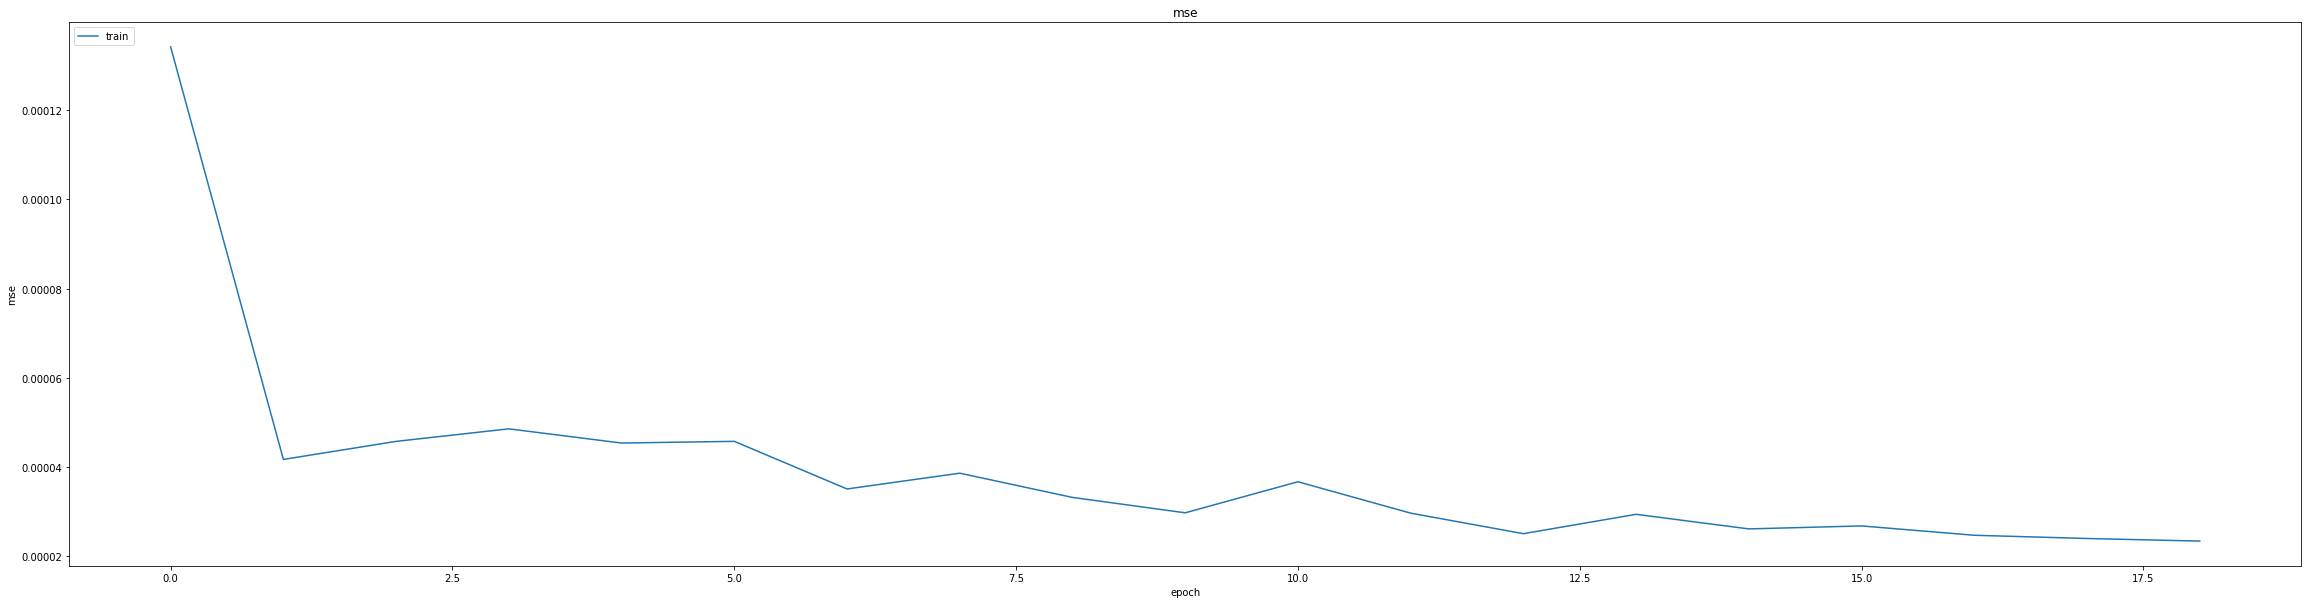

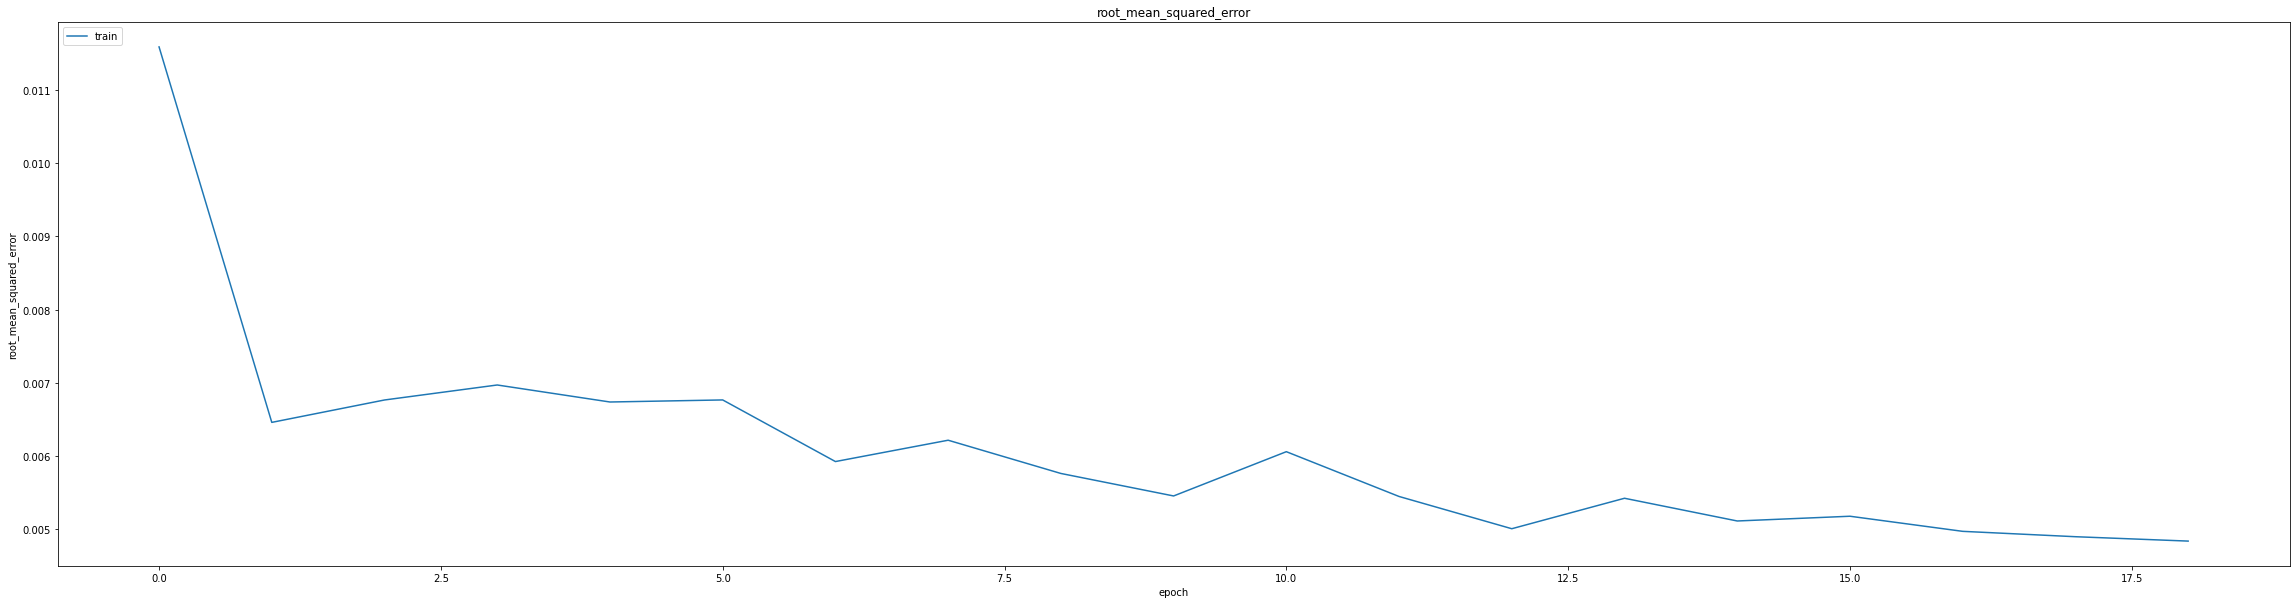

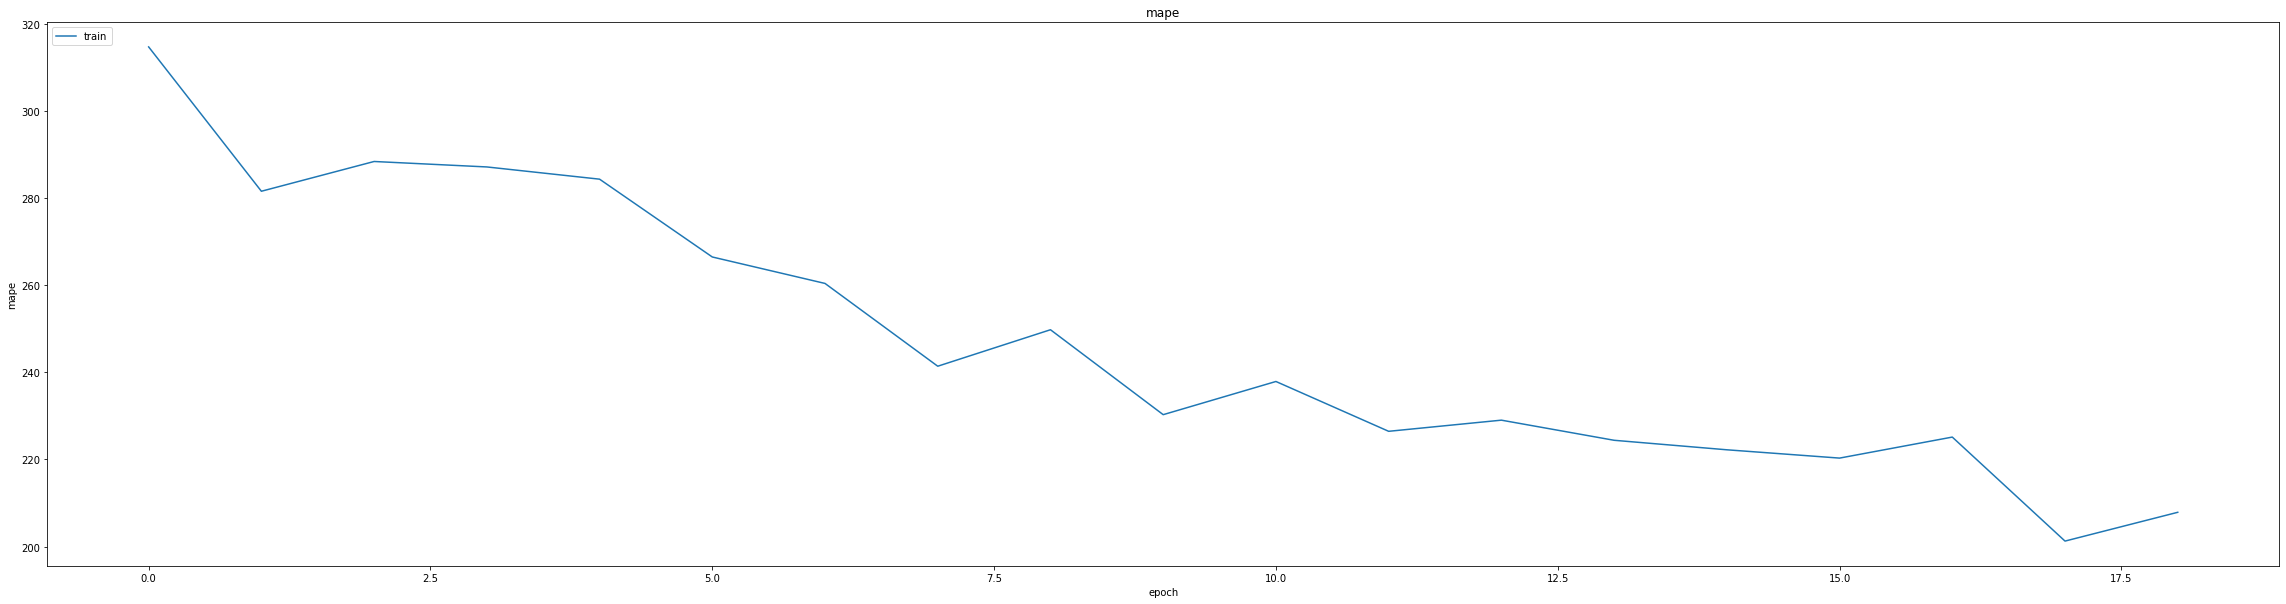

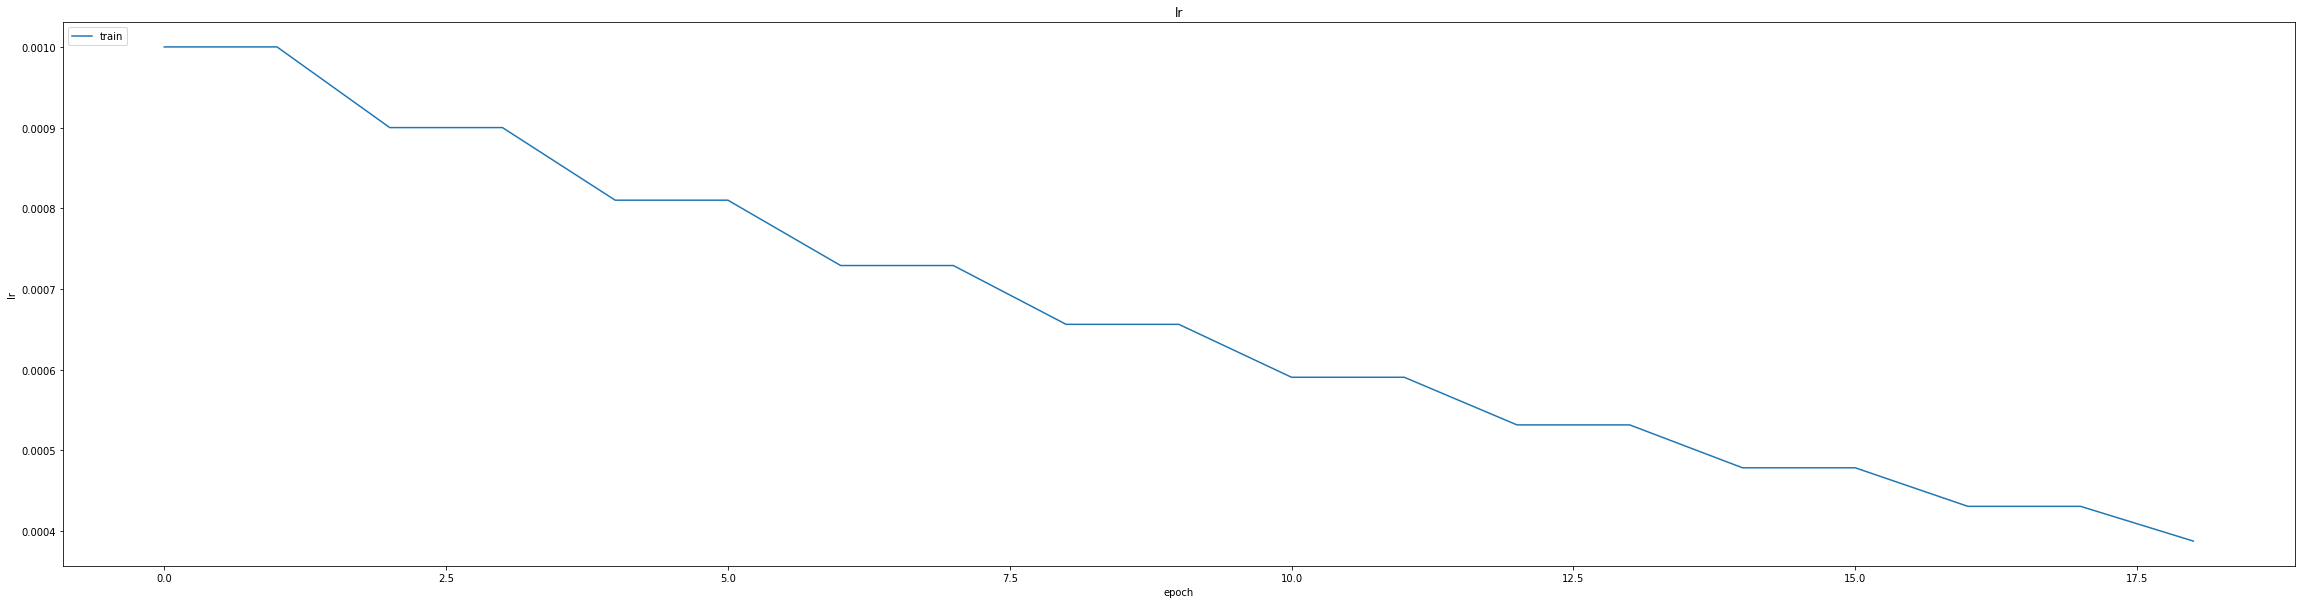

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016704825684428215
0.023299559950828552
348/348 [==============================] - 2s 3ms/step
0.9744592548573976


348/348 [==============================] - 2s 5ms/step


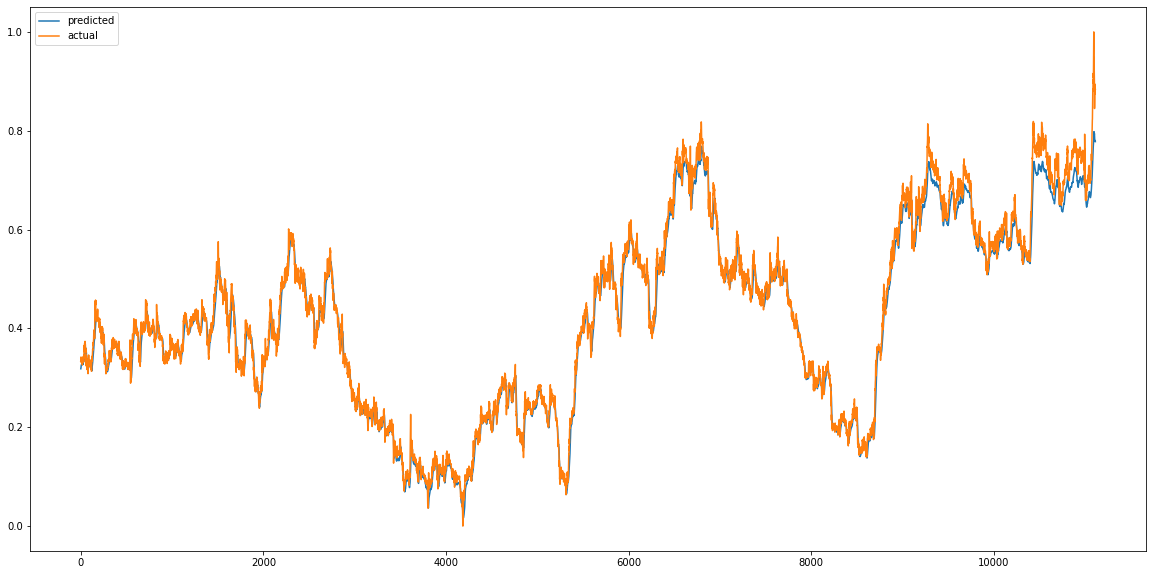

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


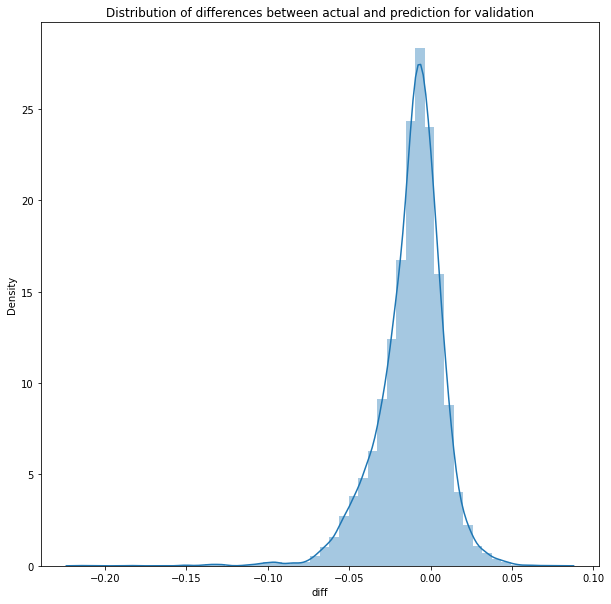

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


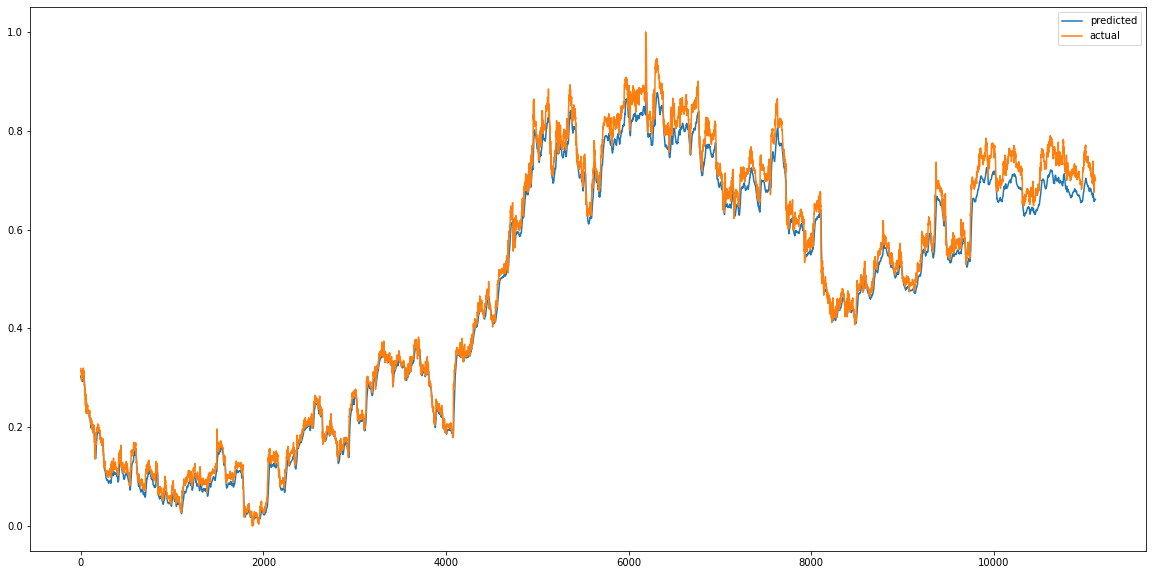

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


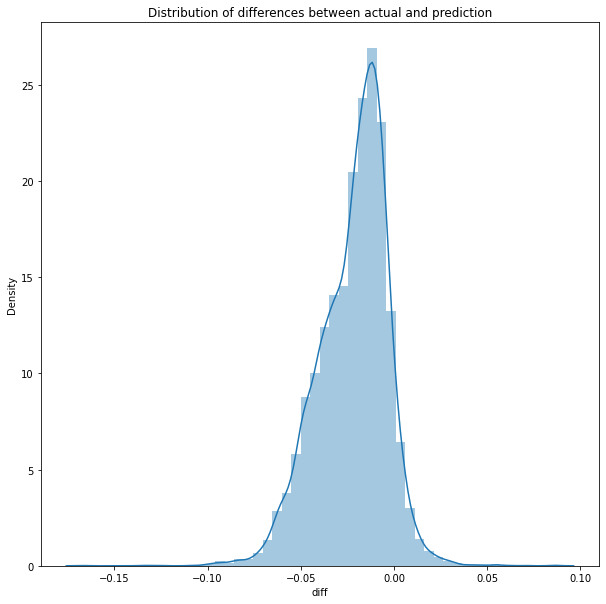

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0008294844291220791
RMSE :  0.02880077132859603
MAE :  0.023219508637418174
348/348 [==============================] - 1s 3ms/step
R2_Score  : 0.988553386119021


count    11115.000000
mean        -0.022020
std          0.018565
min         -0.167177
25%         -0.033879
50%         -0.018924
75%         -0.009153
max          0.087705
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 425.1149 - mae: 4.6158 - mse: 425.1149 - root_mean_squared_error: 20.6183 - mape: 110746.1797
Epoch 1: val_mse improved from inf to 0.03721, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 52s 104ms/step - loss: 423.1024 - mae: 4.5949 - mse: 423.1024 - root_mean_squared_error: 20.5695 - mape: 110222.6016 - val_loss: 0.0372 - val_mae: 0.1619 - val_mse: 0.0372 - val_root_mean_squared_error: 0.1929 - val_mape: 40862.7617
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 0.0441 - mae: 0.1762 - mse: 0.0441 - root_mean_squared_error: 0.2101 - mape: 8081.2056
Epoch 2: val_mse did not improve from 0.03721
406/406 [==============================] - 8s 20ms/step - loss: 0.0441 - mae: 0.1761 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 8043.3384 - val_loss: 0.0417 - val_mae: 0.1680 - val_mse: 0.0417 - val_root_mean_squared_error: 0.2043 - val_mape: 32037.7676
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.0420 - mae: 0.1691 - mse: 0.0420 - root_mean_squared_error: 0.2049 - mape: 7197.7251
Epoch 3: val_mse did not improve from 0.03721
406/406 [==============================] - 8s 20ms/

406/406 [==============================] - 42s 103ms/step - loss: 0.0380 - mae: 0.1600 - mse: 0.0380 - root_mean_squared_error: 0.1950 - mape: 6515.9209 - val_loss: 0.0372 - val_mae: 0.1576 - val_mse: 0.0372 - val_root_mean_squared_error: 0.1929 - val_mape: 30285.4570
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0368 - mae: 0.1569 - mse: 0.0368 - root_mean_squared_error: 0.1918 - mape: 7481.8540
Epoch 10: val_mse improved from 0.03719 to 0.03512, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0368 - mae: 0.1568 - mse: 0.0368 - root_mean_squared_error: 0.1917 - mape: 7446.8271 - val_loss: 0.0351 - val_mae: 0.1526 - val_mse: 0.0351 - val_root_mean_squared_error: 0.1874 - val_mape: 30158.7852
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0349 - mae: 0.1521 - mse: 0.0349 - root_mean_squared_error: 0.1869 - mape: 6758.4189
Epoch 11: val_mse improved from 0.03512 to 0.03306, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0349 - mae: 0.1521 - mse: 0.0349 - root_mean_squared_error: 0.1869 - mape: 6758.4189 - val_loss: 0.0331 - val_mae: 0.1471 - val_mse: 0.0331 - val_root_mean_squared_error: 0.1818 - val_mape: 29437.6641
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0322 - mae: 0.1444 - mse: 0.0322 - root_mean_squared_error: 0.1794 - mape: 6138.3101
Epoch 12: val_mse improved from 0.03306 to 0.02926, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0322 - mae: 0.1443 - mse: 0.0322 - root_mean_squared_error: 0.1793 - mape: 6109.7085 - val_loss: 0.0293 - val_mae: 0.1362 - val_mse: 0.0293 - val_root_mean_squared_error: 0.1711 - val_mape: 28508.5879
Epoch 13/75
405/406 [============================>.] - ETA: 0s - loss: 0.0274 - mae: 0.1294 - mse: 0.0274 - root_mean_squared_error: 0.1654 - mape: 6117.6699
Epoch 13: val_mse improved from 0.02926 to 0.02103, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0274 - mae: 0.1293 - mse: 0.0274 - root_mean_squared_error: 0.1654 - mape: 6103.9116 - val_loss: 0.0210 - val_mae: 0.1126 - val_mse: 0.0210 - val_root_mean_squared_error: 0.1450 - val_mape: 27656.5781
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0208 - mae: 0.1085 - mse: 0.0208 - root_mean_squared_error: 0.1441 - mape: 5605.3472
Epoch 14: val_mse improved from 0.02103 to 0.01367, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0208 - mae: 0.1085 - mse: 0.0208 - root_mean_squared_error: 0.1441 - mape: 5605.3472 - val_loss: 0.0137 - val_mae: 0.0884 - val_mse: 0.0137 - val_root_mean_squared_error: 0.1169 - val_mape: 25006.9258
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 0.0144 - mae: 0.0881 - mse: 0.0144 - root_mean_squared_error: 0.1201 - mape: 5202.3511
Epoch 15: val_mse improved from 0.01367 to 0.00692, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 105ms/step - loss: 0.0144 - mae: 0.0881 - mse: 0.0144 - root_mean_squared_error: 0.1200 - mape: 5178.0708 - val_loss: 0.0069 - val_mae: 0.0636 - val_mse: 0.0069 - val_root_mean_squared_error: 0.0832 - val_mape: 22374.5078
Epoch 16/75
404/406 [============================>.] - ETA: 0s - loss: 0.0098 - mae: 0.0719 - mse: 0.0098 - root_mean_squared_error: 0.0992 - mape: 4689.5776
Epoch 16: val_mse improved from 0.00692 to 0.00348, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0098 - mae: 0.0719 - mse: 0.0098 - root_mean_squared_error: 0.0991 - mape: 4667.5557 - val_loss: 0.0035 - val_mae: 0.0468 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0590 - val_mape: 19593.6348
Epoch 17/75
405/406 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0606 - mse: 0.0071 - root_mean_squared_error: 0.0844 - mape: 4568.9141
Epoch 17: val_mse improved from 0.00348 to 0.00198, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0071 - mae: 0.0606 - mse: 0.0071 - root_mean_squared_error: 0.0844 - mape: 4558.7002 - val_loss: 0.0020 - val_mae: 0.0337 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0444 - val_mape: 16901.4141
Epoch 18/75
404/406 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0530 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 4578.2632
Epoch 18: val_mse improved from 0.00198 to 0.00132, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0055 - mae: 0.0530 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 4556.7124 - val_loss: 0.0013 - val_mae: 0.0276 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 14954.0371
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0452 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 2860.7651
Epoch 19: val_mse improved from 0.00132 to 0.00107, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0038 - mae: 0.0452 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 2860.7651 - val_loss: 0.0011 - val_mae: 0.0247 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 12609.6387
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0405 - mse: 0.0030 - root_mean_squared_error: 0.0552 - mape: 2688.6392
Epoch 20: val_mse improved from 0.00107 to 0.00067, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0030 - mae: 0.0405 - mse: 0.0030 - root_mean_squared_error: 0.0551 - mape: 2682.6387 - val_loss: 6.7469e-04 - val_mae: 0.0203 - val_mse: 6.7469e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 11291.2676
Epoch 21/75
405/406 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0374 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 28.3066
Epoch 21: val_mse improved from 0.00067 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0026 - mae: 0.0374 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 1756.3746 - val_loss: 6.2268e-04 - val_mae: 0.0191 - val_mse: 6.2268e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 10057.0469
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0344 - mse: 0.0021 - root_mean_squared_error: 0.0464 - mape: 2219.7800
Epoch 22: val_mse improved from 0.00062 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0021 - mae: 0.0344 - mse: 0.0021 - root_mean_squared_error: 0.0464 - mape: 2214.7742 - val_loss: 5.9673e-04 - val_mae: 0.0181 - val_mse: 5.9673e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 9056.6523
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0324 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 2485.8328
Epoch 23: val_mse did not improve from 0.00060
406/406 [==============================] - 8s 20ms/step - loss: 0.0019 - mae: 0.0324 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 2485.8328 - val_loss: 6.5944e-04 - val_mae: 0.0191 - val_mse: 6.5944e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 8572.7070
Epoch 24/75
404/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0301 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 1946.8801
Epoch 24: val_mse improved from 0.00060 to 0.00055, saving model to /content/drive/MyDr

406/406 [==============================] - 42s 103ms/step - loss: 0.0016 - mae: 0.0301 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 1937.8286 - val_loss: 5.5144e-04 - val_mae: 0.0174 - val_mse: 5.5144e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 8010.8921
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0288 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 1706.9918
Epoch 25: val_mse did not improve from 0.00055
406/406 [==============================] - 9s 21ms/step - loss: 0.0015 - mae: 0.0288 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 1703.1533 - val_loss: 5.8520e-04 - val_mae: 0.0178 - val_mse: 5.8520e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 7454.6387
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0270 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2201.9294
Epoch 26: val_mse did not improve from 0.00055
406/406 [==============================]

406/406 [==============================] - 41s 101ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0330 - mape: 1406.9694 - val_loss: 5.1502e-04 - val_mae: 0.0169 - val_mse: 5.1502e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 6408.7471
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 9.7932e-04 - mae: 0.0238 - mse: 9.7932e-04 - root_mean_squared_error: 0.0313 - mape: 1174.8650
Epoch 28: val_mse did not improve from 0.00052
406/406 [==============================] - 8s 20ms/step - loss: 9.7932e-04 - mae: 0.0238 - mse: 9.7932e-04 - root_mean_squared_error: 0.0313 - mape: 1174.8650 - val_loss: 5.3805e-04 - val_mae: 0.0172 - val_mse: 5.3805e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 6082.2388
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 8.2928e-04 - mae: 0.0220 - mse: 8.2928e-04 - root_mean_squared_error: 0.0288 - mape: 1187.8486
Epoch 29: val_mse did not improve from 0.00052
406/406 [=======

406/406 [==============================] - 42s 105ms/step - loss: 3.8027e-04 - mae: 0.0150 - mse: 3.8027e-04 - root_mean_squared_error: 0.0195 - mape: 736.9663 - val_loss: 4.9431e-04 - val_mae: 0.0169 - val_mse: 4.9431e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 4042.6521
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 3.2913e-04 - mae: 0.0140 - mse: 3.2913e-04 - root_mean_squared_error: 0.0181 - mape: 847.5189
Epoch 36: val_mse did not improve from 0.00049
406/406 [==============================] - 8s 20ms/step - loss: 3.2916e-04 - mae: 0.0140 - mse: 3.2916e-04 - root_mean_squared_error: 0.0181 - mape: 843.5406 - val_loss: 5.0488e-04 - val_mae: 0.0173 - val_mse: 5.0488e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 5124.1021
Epoch 37/75
405/406 [============================>.] - ETA: 0s - loss: 3.0305e-04 - mae: 0.0135 - mse: 3.0305e-04 - root_mean_squared_error: 0.0174 - mape: 797.2881
Epoch 37: val_mse improved from 0.00049 to 0.00047, saving 

406/406 [==============================] - 41s 101ms/step - loss: 3.0275e-04 - mae: 0.0134 - mse: 3.0275e-04 - root_mean_squared_error: 0.0174 - mape: 795.4892 - val_loss: 4.7055e-04 - val_mae: 0.0164 - val_mse: 4.7055e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 3831.8171
Epoch 38/75
406/406 [==============================] - ETA: 0s - loss: 2.8029e-04 - mae: 0.0129 - mse: 2.8029e-04 - root_mean_squared_error: 0.0167 - mape: 640.3810
Epoch 38: val_mse did not improve from 0.00047
406/406 [==============================] - 8s 20ms/step - loss: 2.8029e-04 - mae: 0.0129 - mse: 2.8029e-04 - root_mean_squared_error: 0.0167 - mape: 640.3810 - val_loss: 8.5805e-04 - val_mae: 0.0235 - val_mse: 8.5805e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 3423.1619
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 2.4620e-04 - mae: 0.0121 - mse: 2.4620e-04 - root_mean_squared_error: 0.0157 - mape: 618.4575
Epoch 39: val_mse improved from 0.00047 to 0.00042, saving 

406/406 [==============================] - 41s 102ms/step - loss: 2.4590e-04 - mae: 0.0121 - mse: 2.4590e-04 - root_mean_squared_error: 0.0157 - mape: 615.5642 - val_loss: 4.2128e-04 - val_mae: 0.0152 - val_mse: 4.2128e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 4345.4214
Epoch 40/75
405/406 [============================>.] - ETA: 0s - loss: 2.2596e-04 - mae: 0.0116 - mse: 2.2596e-04 - root_mean_squared_error: 0.0150 - mape: 704.8479
Epoch 40: val_mse did not improve from 0.00042
406/406 [==============================] - 8s 20ms/step - loss: 2.2626e-04 - mae: 0.0116 - mse: 2.2626e-04 - root_mean_squared_error: 0.0150 - mape: 703.2700 - val_loss: 6.2494e-04 - val_mae: 0.0197 - val_mse: 6.2494e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 4108.7925
Epoch 41/75
404/406 [============================>.] - ETA: 0s - loss: 1.9899e-04 - mae: 0.0109 - mse: 1.9899e-04 - root_mean_squared_error: 0.0141 - mape: 604.8183
Epoch 41: val_mse did not improve from 0.00042
406/406 [===

406/406 [==============================] - 41s 102ms/step - loss: 1.8363e-04 - mae: 0.0104 - mse: 1.8363e-04 - root_mean_squared_error: 0.0136 - mape: 676.4327 - val_loss: 3.5293e-04 - val_mae: 0.0140 - val_mse: 3.5293e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 3380.1543
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 1.5175e-04 - mae: 0.0095 - mse: 1.5175e-04 - root_mean_squared_error: 0.0123 - mape: 559.4146
Epoch 44: val_mse did not improve from 0.00035
406/406 [==============================] - 8s 20ms/step - loss: 1.5175e-04 - mae: 0.0095 - mse: 1.5175e-04 - root_mean_squared_error: 0.0123 - mape: 559.4146 - val_loss: 3.8983e-04 - val_mae: 0.0149 - val_mse: 3.8983e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 3632.7485
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 1.4000e-04 - mae: 0.0091 - mse: 1.4000e-04 - root_mean_squared_error: 0.0118 - mape: 513.7503
Epoch 45: val_mse improved from 0.00035 to 0.00030, saving 

406/406 [==============================] - 41s 101ms/step - loss: 1.3991e-04 - mae: 0.0091 - mse: 1.3991e-04 - root_mean_squared_error: 0.0118 - mape: 512.5914 - val_loss: 2.9864e-04 - val_mae: 0.0127 - val_mse: 2.9864e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 3805.1787
Epoch 46/75
406/406 [==============================] - ETA: 0s - loss: 1.5092e-04 - mae: 0.0094 - mse: 1.5092e-04 - root_mean_squared_error: 0.0123 - mape: 640.2526
Epoch 46: val_mse did not improve from 0.00030
406/406 [==============================] - 8s 20ms/step - loss: 1.5092e-04 - mae: 0.0094 - mse: 1.5092e-04 - root_mean_squared_error: 0.0123 - mape: 640.2526 - val_loss: 7.9692e-04 - val_mae: 0.0224 - val_mse: 7.9692e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 3555.8740
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 1.3639e-04 - mae: 0.0090 - mse: 1.3639e-04 - root_mean_squared_error: 0.0117 - mape: 478.3570
Epoch 47: val_mse did not improve from 0.00030
406/406 [===

406/406 [==============================] - 43s 105ms/step - loss: 1.2499e-04 - mae: 0.0086 - mse: 1.2499e-04 - root_mean_squared_error: 0.0112 - mape: 485.4777 - val_loss: 2.6131e-04 - val_mae: 0.0119 - val_mse: 2.6131e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 3056.9641
Epoch 49/75
406/406 [==============================] - ETA: 0s - loss: 1.0628e-04 - mae: 0.0079 - mse: 1.0628e-04 - root_mean_squared_error: 0.0103 - mape: 547.7194
Epoch 49: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 102ms/step - loss: 1.0628e-04 - mae: 0.0079 - mse: 1.0628e-04 - root_mean_squared_error: 0.0103 - mape: 547.7194 - val_loss: 2.4310e-04 - val_mae: 0.0116 - val_mse: 2.4310e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 3280.0872
Epoch 50/75
406/406 [==============================] - ETA: 0s - loss: 9.5060e-05 - mae: 0.0075 - mse: 9.5060e-05 - root_mean_squared_error: 0.0097 - mape: 541.6438
Epoch 50: val_mse improved from 0.00024 to 0.00020, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 9.5060e-05 - mae: 0.0075 - mse: 9.5060e-05 - root_mean_squared_error: 0.0097 - mape: 541.6438 - val_loss: 2.0444e-04 - val_mae: 0.0105 - val_mse: 2.0444e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 3543.6287
Epoch 51/75
405/406 [============================>.] - ETA: 0s - loss: 1.0220e-04 - mae: 0.0078 - mse: 1.0220e-04 - root_mean_squared_error: 0.0101 - mape: 531.6366
Epoch 51: val_mse did not improve from 0.00020
406/406 [==============================] - 8s 20ms/step - loss: 1.0216e-04 - mae: 0.0078 - mse: 1.0216e-04 - root_mean_squared_error: 0.0101 - mape: 530.4386 - val_loss: 2.3021e-04 - val_mae: 0.0114 - val_mse: 2.3021e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 2574.4814
Epoch 52/75
406/406 [==============================] - ETA: 0s - loss: 1.0268e-04 - mae: 0.0078 - mse: 1.0268e-04 - root_mean_squared_error: 0.0101 - mape: 560.2852
Epoch 52: val_mse did not improve from 0.00020
406/406 [===

406/406 [==============================] - 41s 101ms/step - loss: 7.9201e-05 - mae: 0.0067 - mse: 7.9201e-05 - root_mean_squared_error: 0.0089 - mape: 457.8023 - val_loss: 1.7115e-04 - val_mae: 0.0099 - val_mse: 1.7115e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 2882.5591
Epoch 56/75
405/406 [============================>.] - ETA: 0s - loss: 1.0554e-04 - mae: 0.0073 - mse: 1.0554e-04 - root_mean_squared_error: 0.0103 - mape: 378.6425
Epoch 56: val_mse did not improve from 0.00017
406/406 [==============================] - 8s 20ms/step - loss: 1.0538e-04 - mae: 0.0073 - mse: 1.0538e-04 - root_mean_squared_error: 0.0103 - mape: 377.7903 - val_loss: 2.7118e-04 - val_mae: 0.0135 - val_mse: 2.7118e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 2465.0911
Epoch 57/75
405/406 [============================>.] - ETA: 0s - loss: 6.4302e-05 - mae: 0.0062 - mse: 6.4302e-05 - root_mean_squared_error: 0.0080 - mape: 405.4271
Epoch 57: val_mse did not improve from 0.00017
406/406 [===

406/406 [==============================] - 41s 101ms/step - loss: 5.1859e-05 - mae: 0.0049 - mse: 5.1859e-05 - root_mean_squared_error: 0.0072 - mape: 281.9405 - val_loss: 1.2608e-04 - val_mae: 0.0083 - val_mse: 1.2608e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 3173.5356
Epoch 69/75
406/406 [==============================] - ETA: 0s - loss: 3.3940e-05 - mae: 0.0044 - mse: 3.3940e-05 - root_mean_squared_error: 0.0058 - mape: 305.1094
Epoch 69: val_mse did not improve from 0.00013
406/406 [==============================] - 8s 20ms/step - loss: 3.3940e-05 - mae: 0.0044 - mse: 3.3940e-05 - root_mean_squared_error: 0.0058 - mape: 305.1094 - val_loss: 3.2974e-04 - val_mae: 0.0161 - val_mse: 3.2974e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 2052.2468
Epoch 70/75
406/406 [==============================] - ETA: 0s - loss: 3.1825e-05 - mae: 0.0042 - mse: 3.1825e-05 - root_mean_squared_error: 0.0056 - mape: 226.8761
Epoch 70: val_mse did not improve from 0.00013
406/406 [===

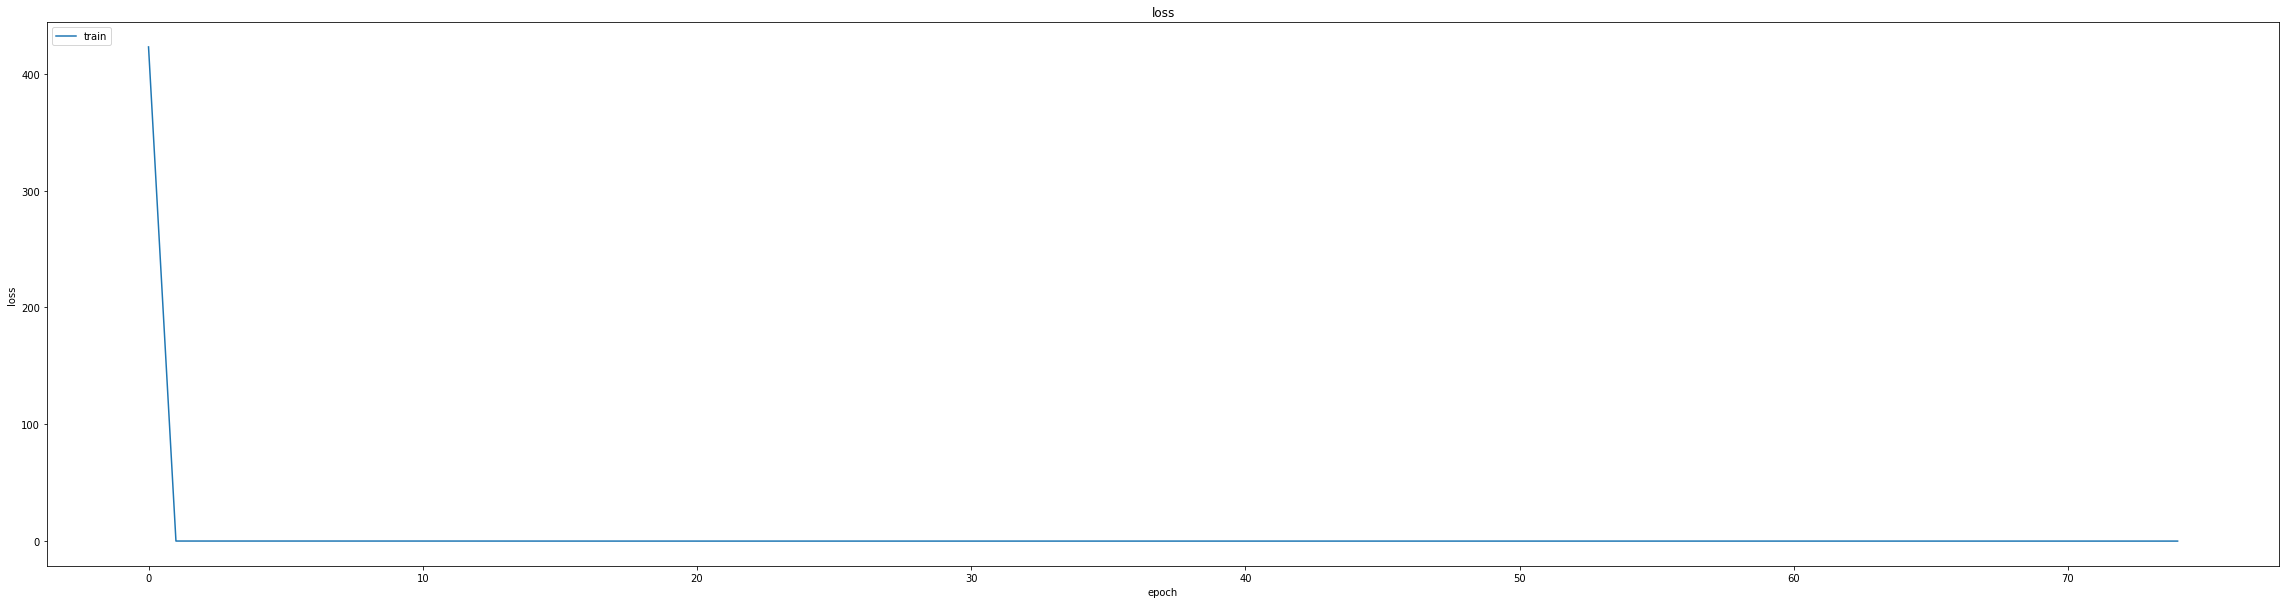

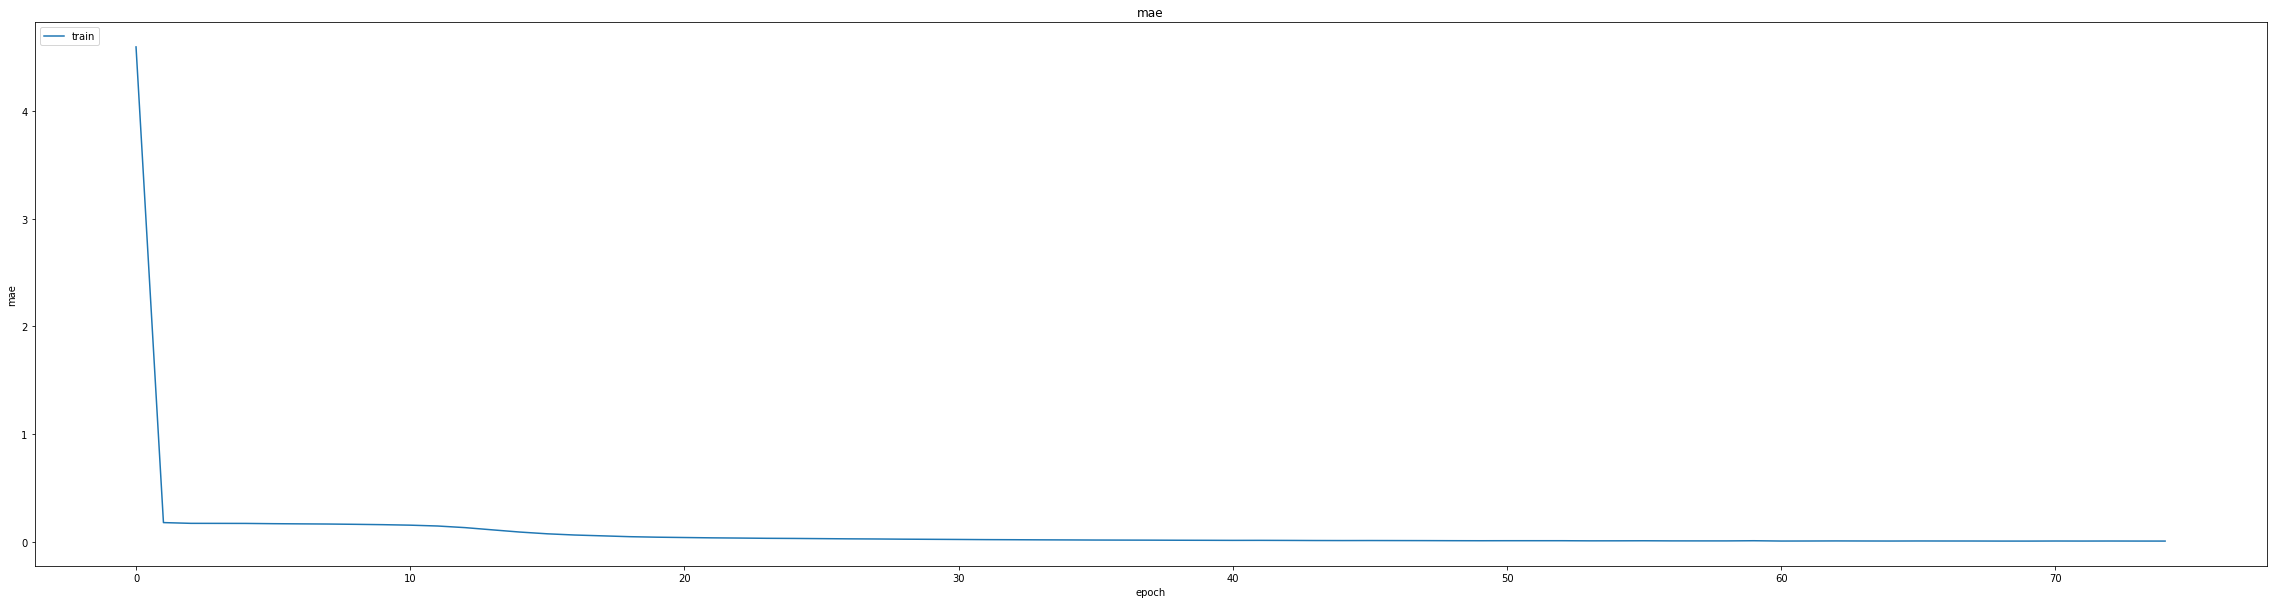

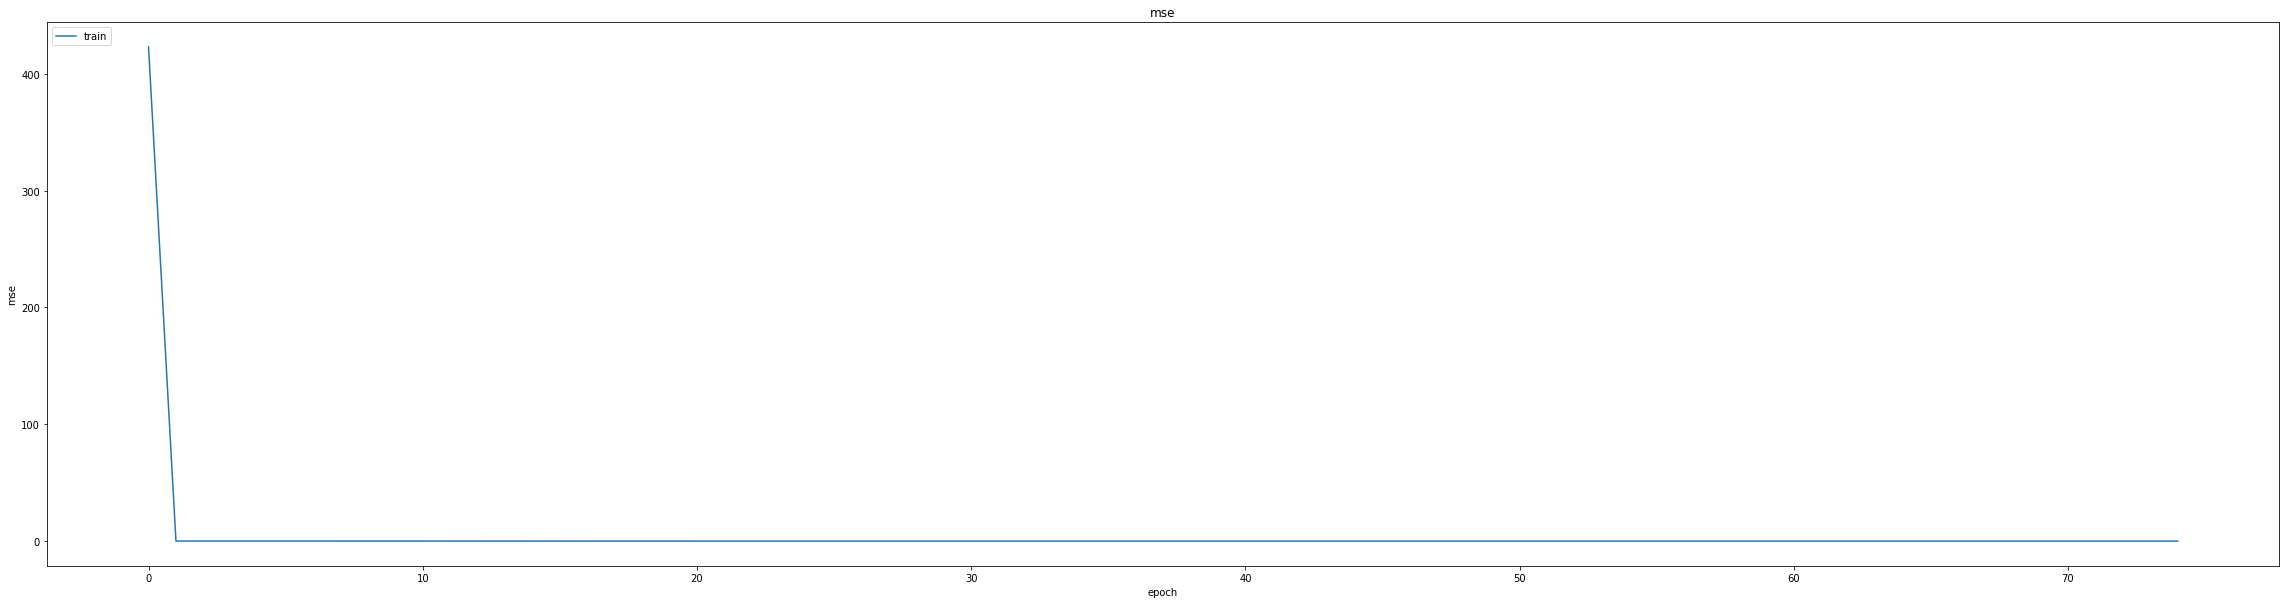

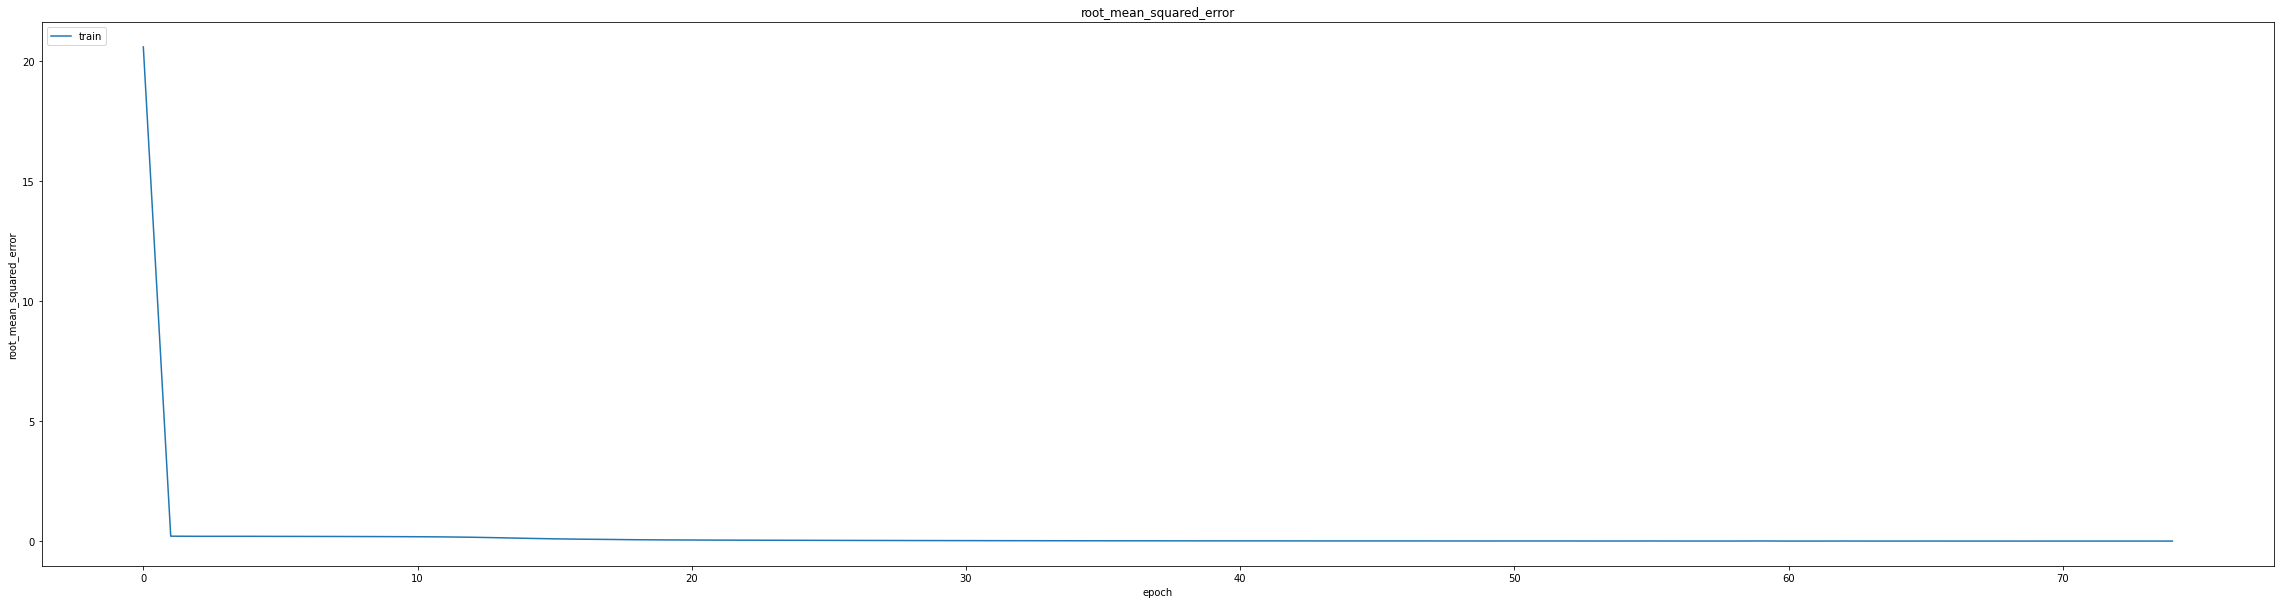

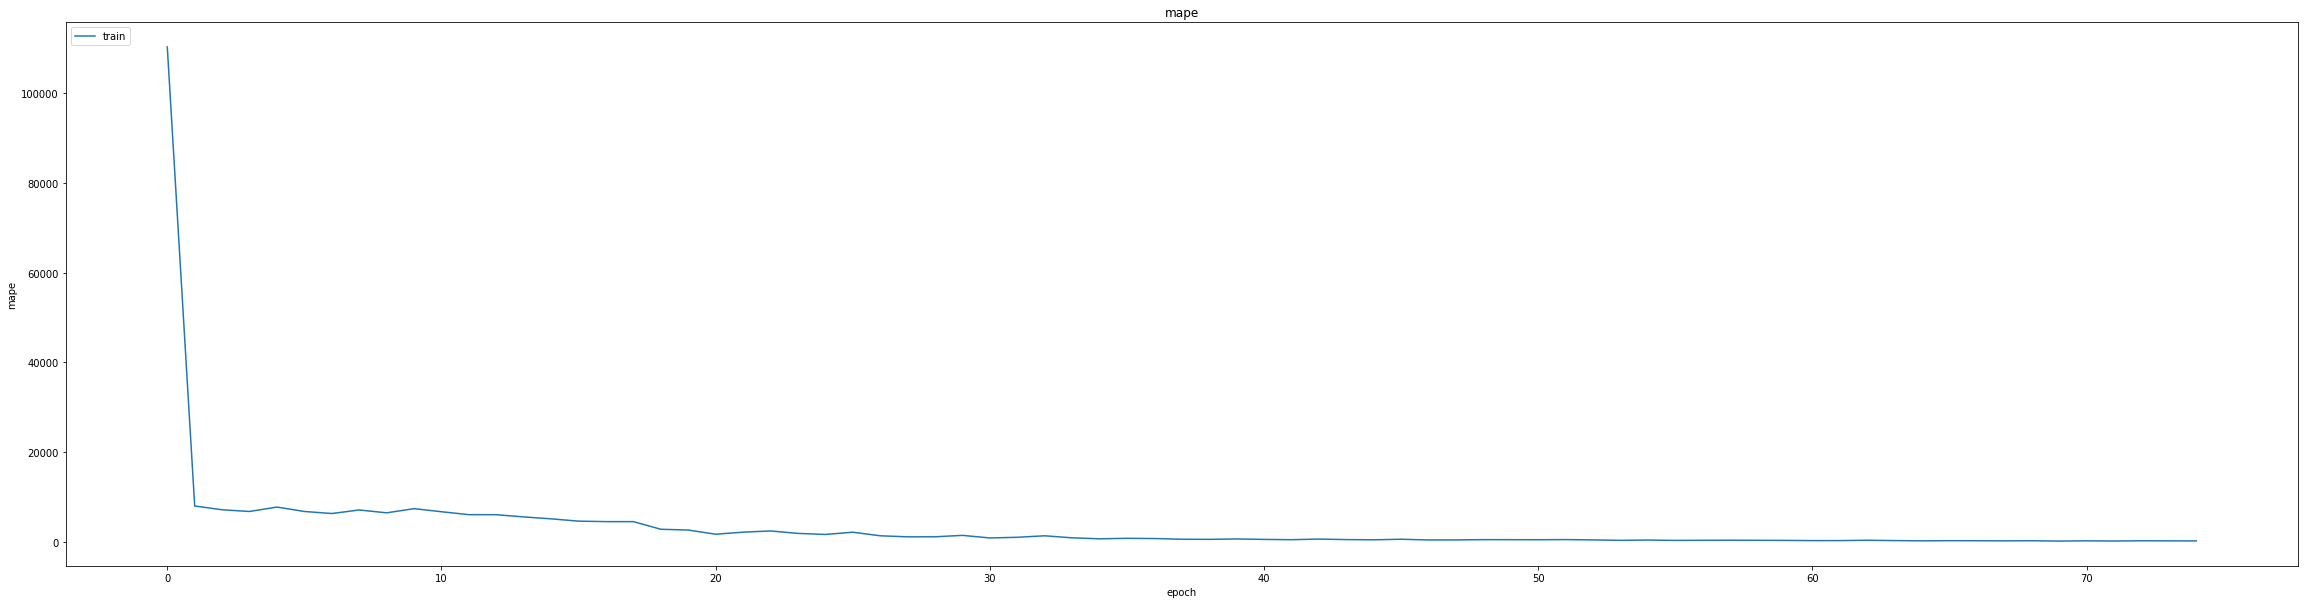

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008266952820122242
0.011228346265852451
348/348 [==============================] - 4s 7ms/step
0.9938159053258775


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


405/406 [============================>.] - ETA: 0s - loss: 1.5058e-04 - mae: 0.0057 - mse: 1.5058e-04 - root_mean_squared_error: 0.0123 - mape: 298.1102
Epoch 1: val_mse did not improve from 0.00013
406/406 [==============================] - 19s 25ms/step - loss: 1.5029e-04 - mae: 0.0057 - mse: 1.5029e-04 - root_mean_squared_error: 0.0123 - mape: 297.4388 - val_loss: 2.4254e-04 - val_mae: 0.0131 - val_mse: 2.4254e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1487.8334 - lr: 0.0010
Epoch 2/25
406/406 [==============================] - ETA: 0s - loss: 2.3594e-05 - mae: 0.0037 - mse: 2.3594e-05 - root_mean_squared_error: 0.0049 - mape: 409.3308
Epoch 2: val_mse did not improve from 0.00013
406/406 [==============================] - 8s 20ms/step - loss: 2.3594e-05 - mae: 0.0037 - mse: 2.3594e-05 - root_mean_squared_error: 0.0049 - mape: 409.3308 - val_loss: 2.4569e-04 - val_mae: 0.0132 - val_mse: 2.4569e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 2175.6992 - lr: 0.0010
lr

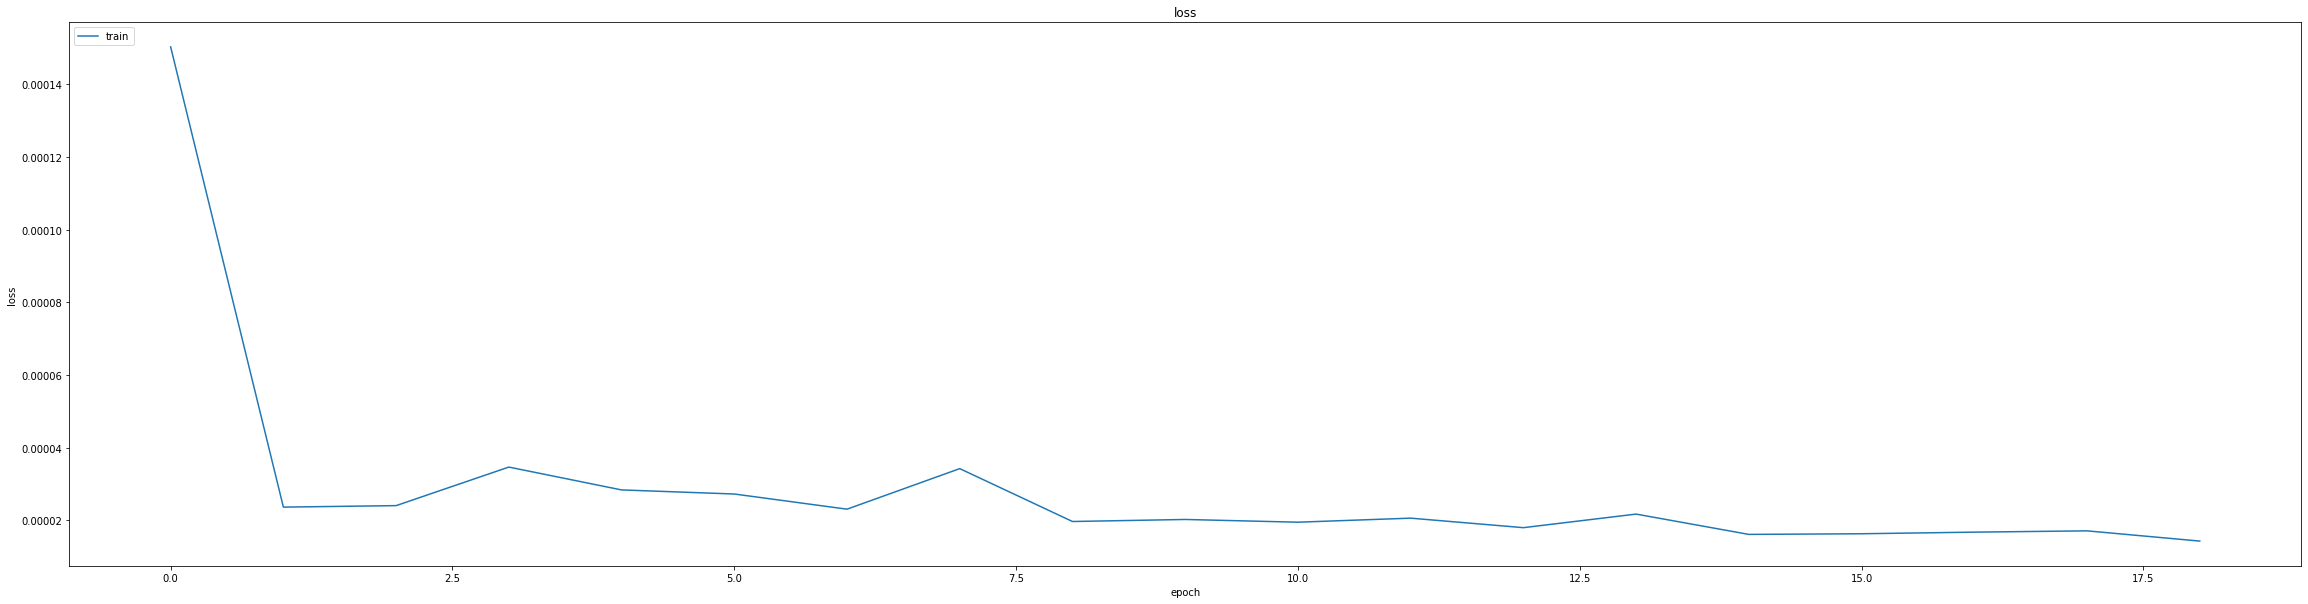

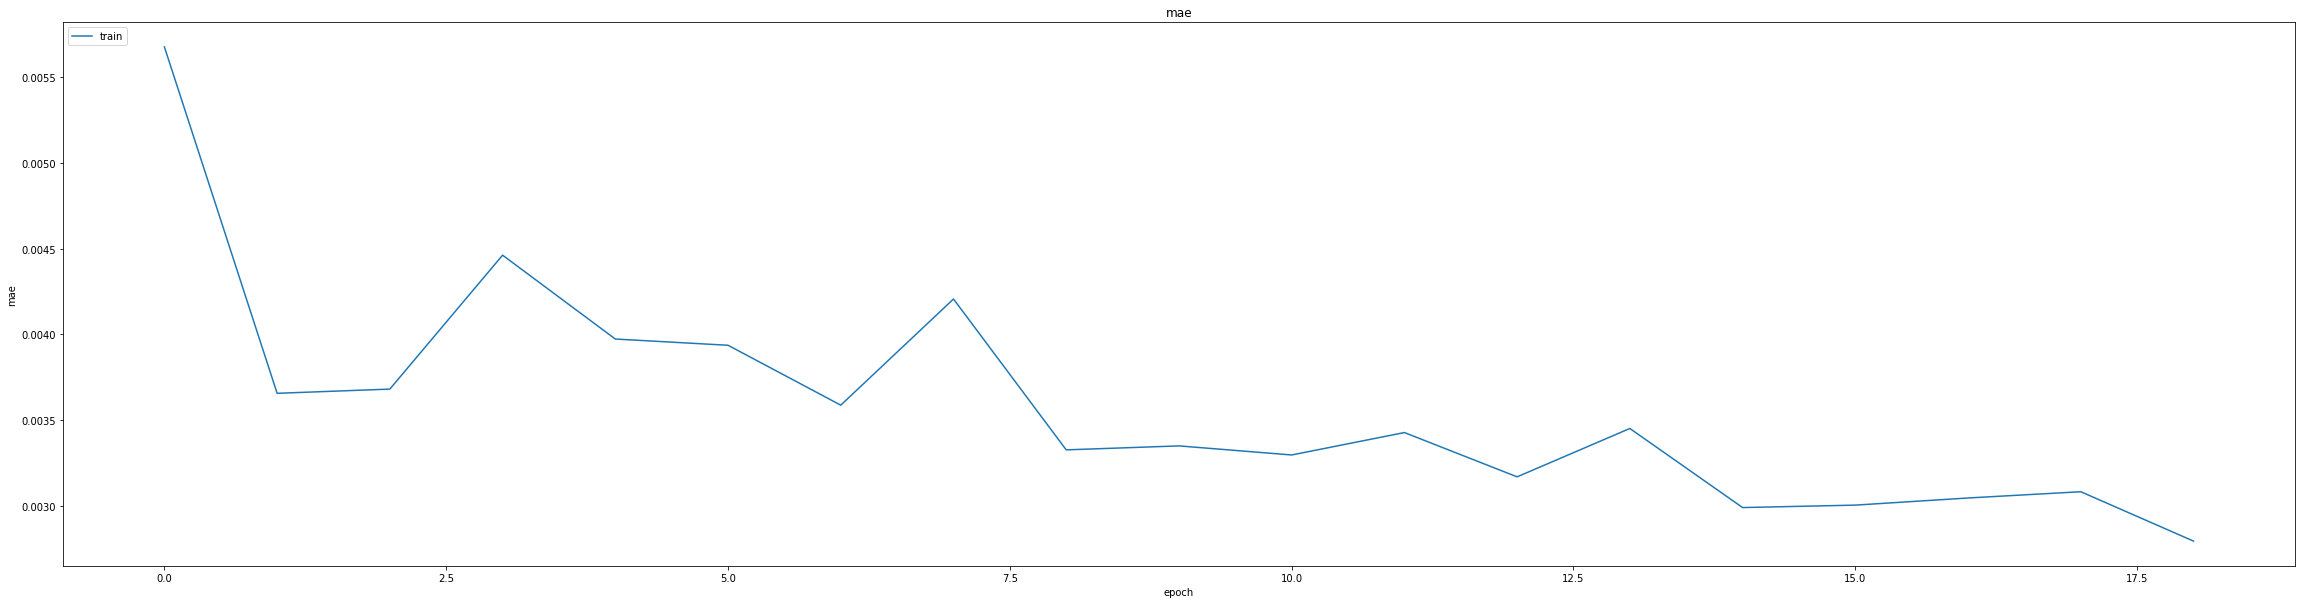

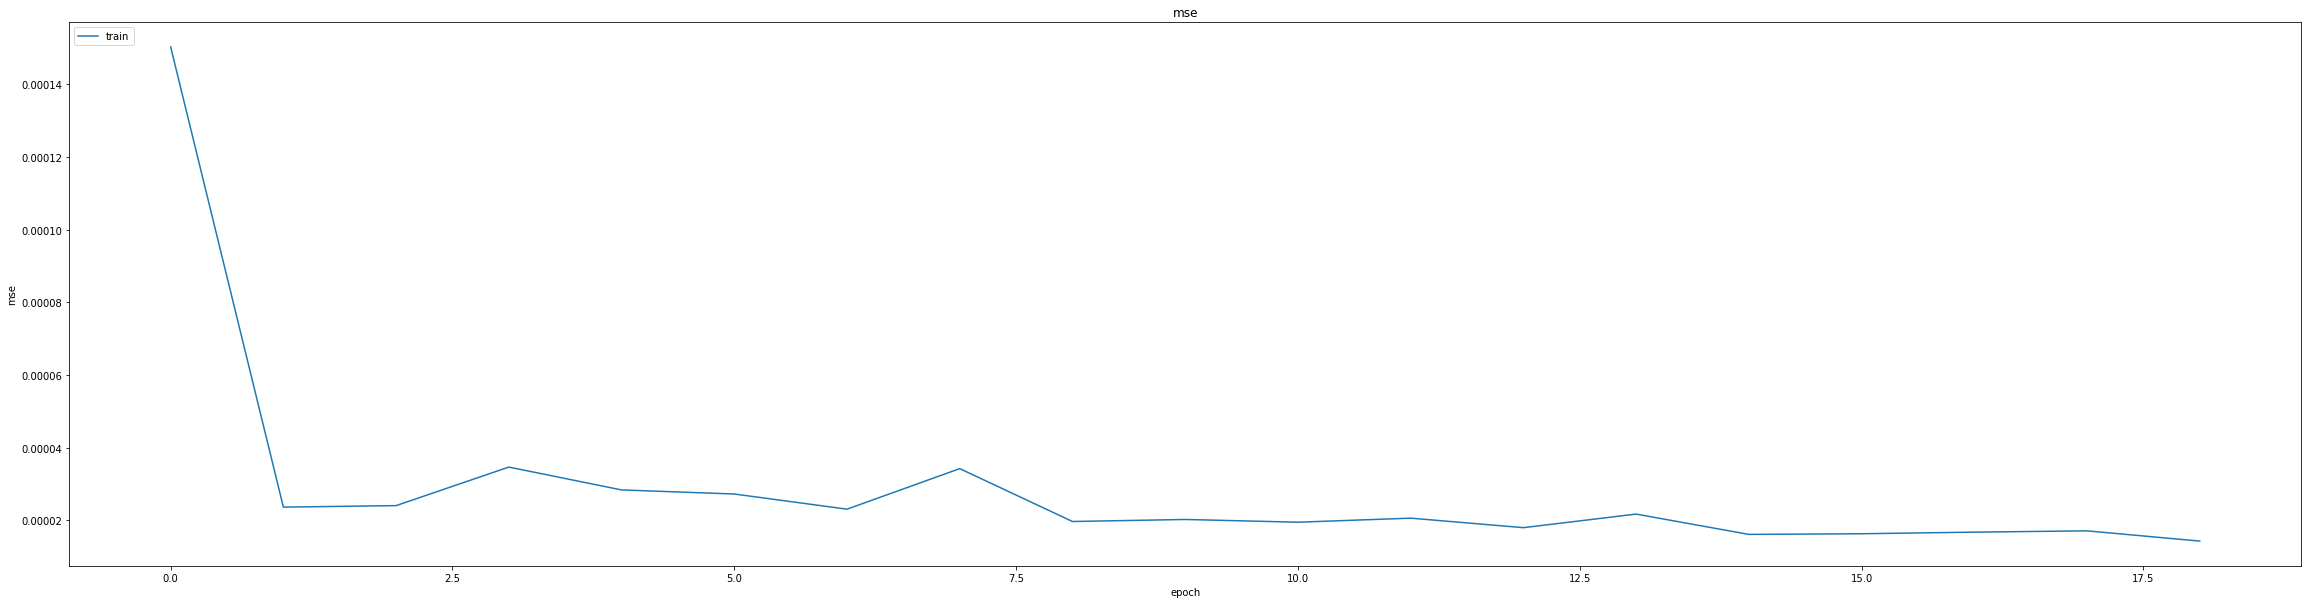

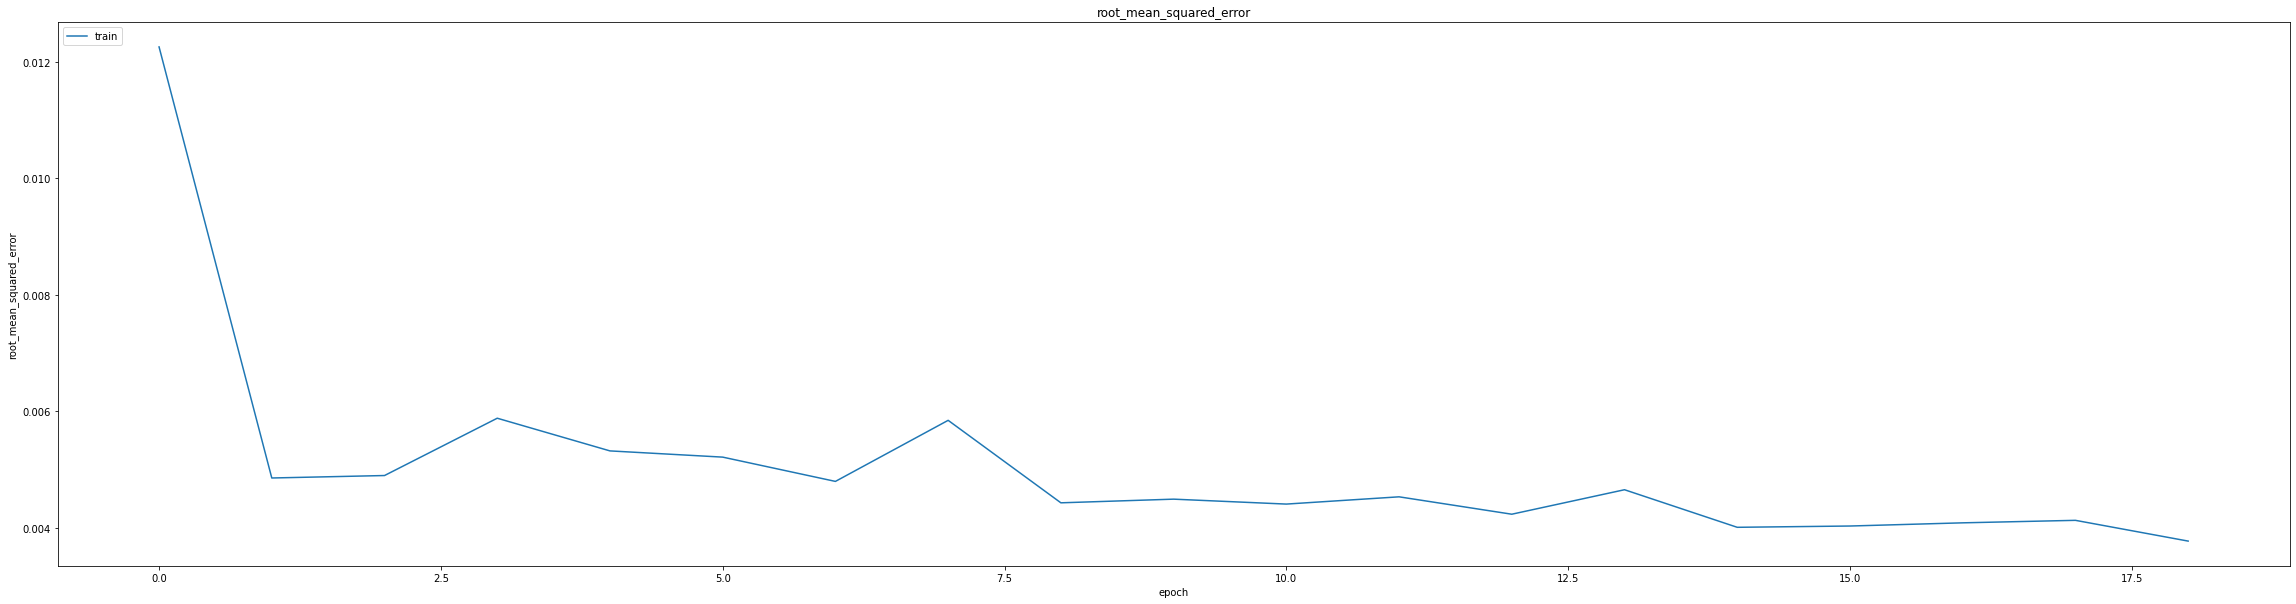

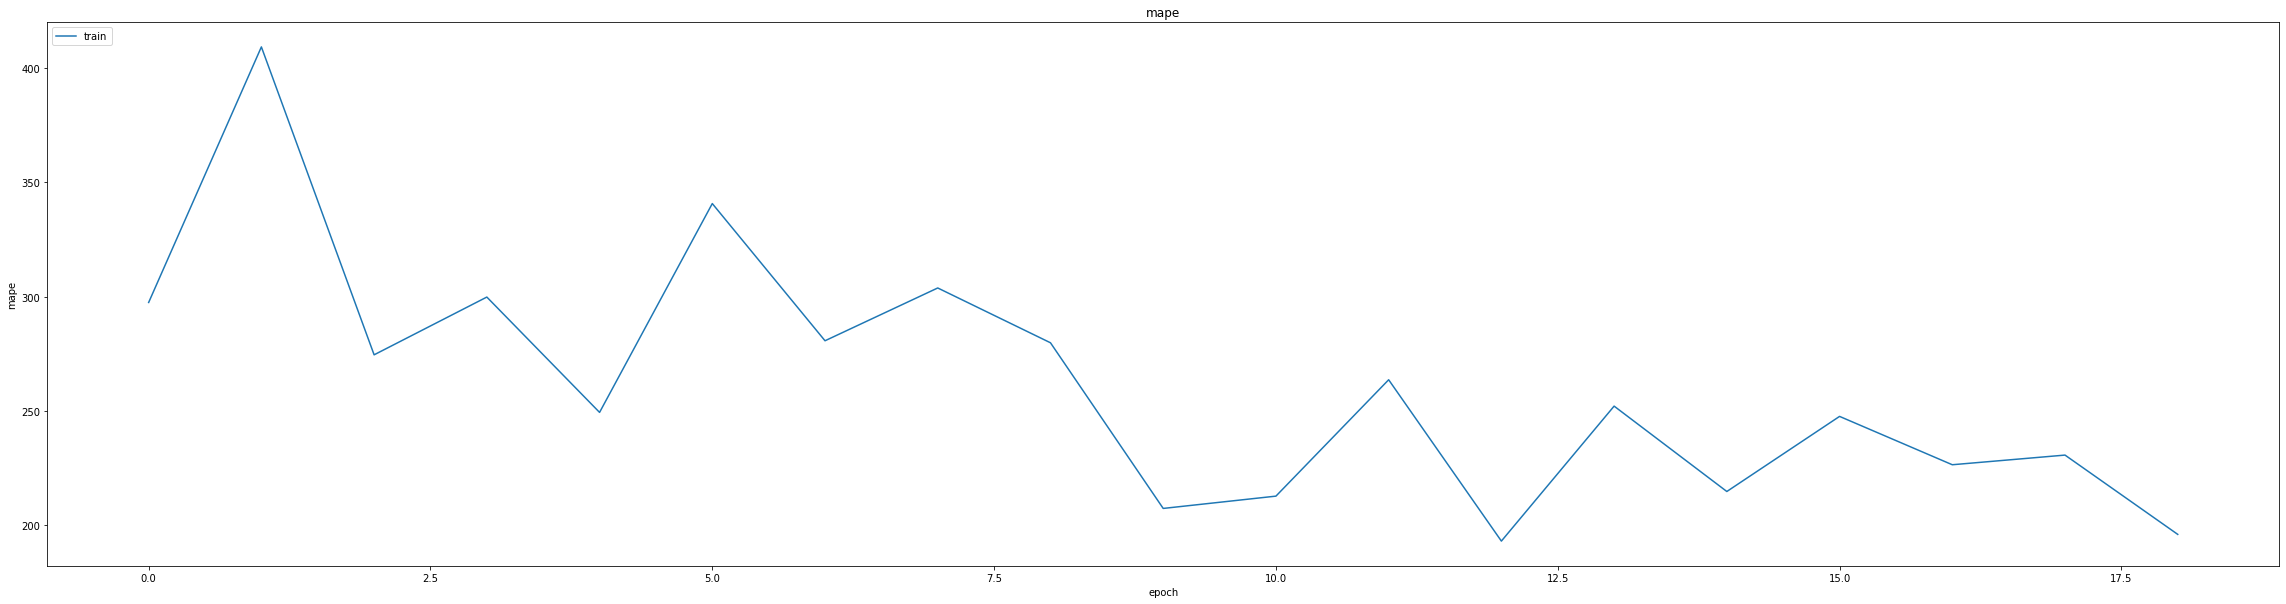

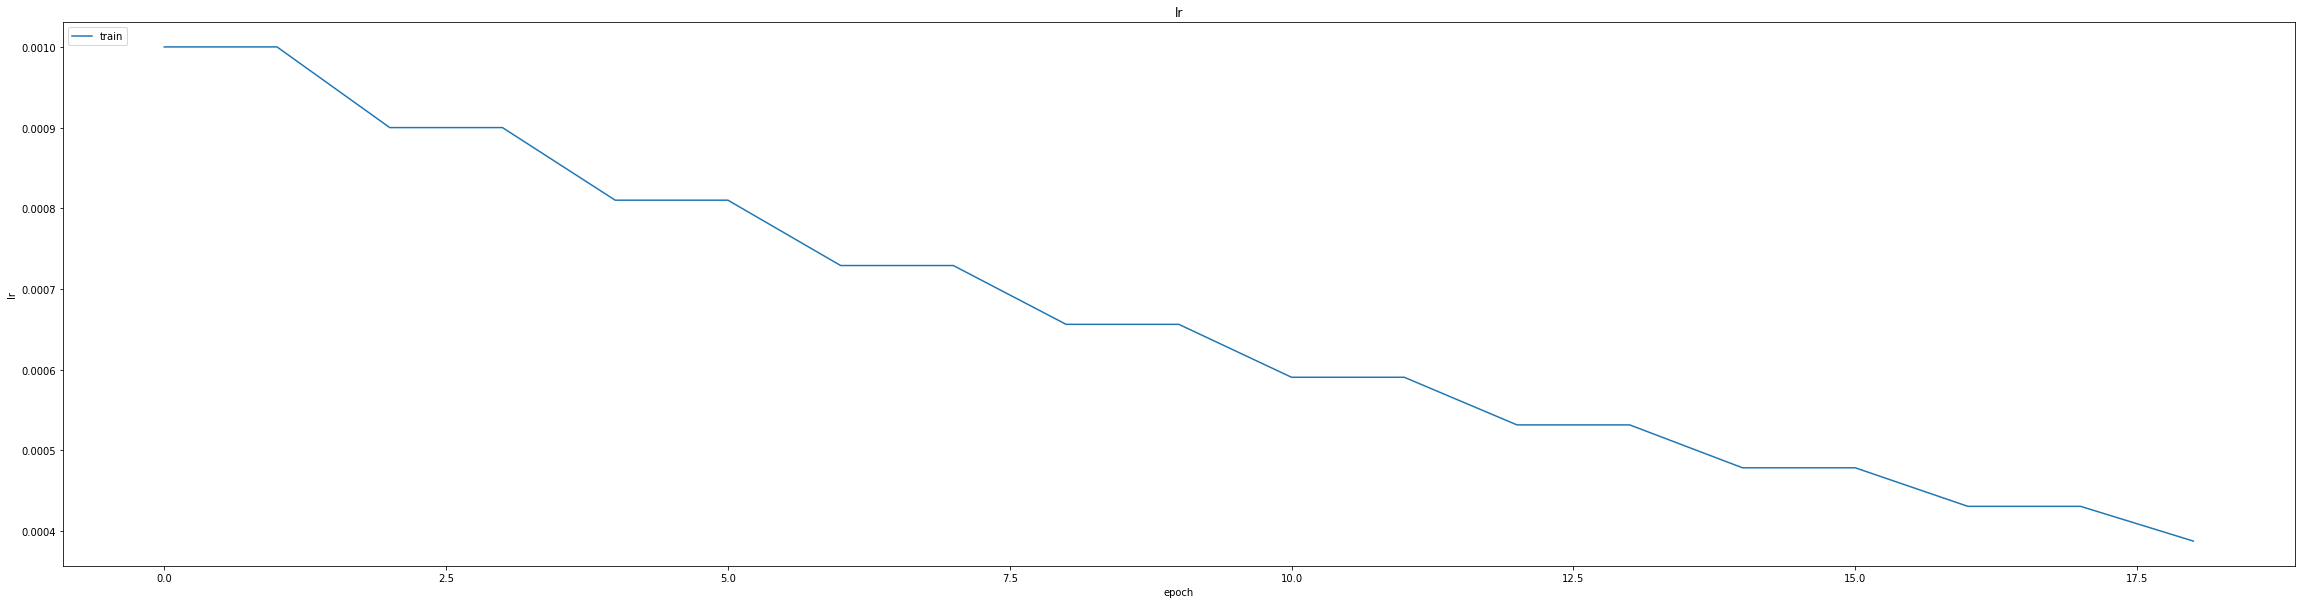

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009206919930875301
0.011766722425818443
348/348 [==============================] - 6s 11ms/step
0.9952645924980389


348/348 [==============================] - 2s 7ms/step


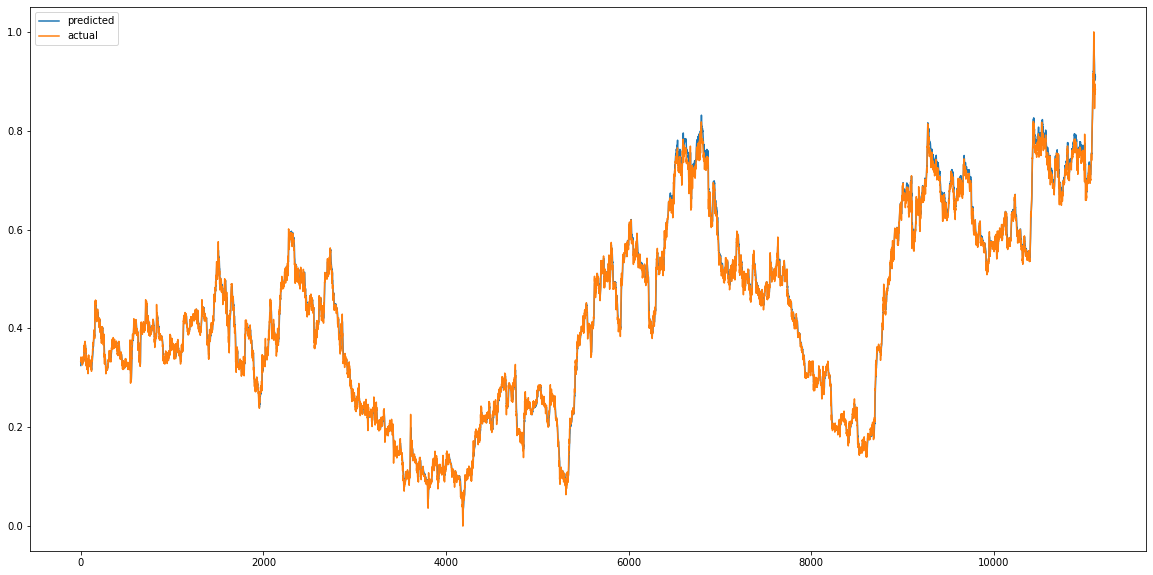

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


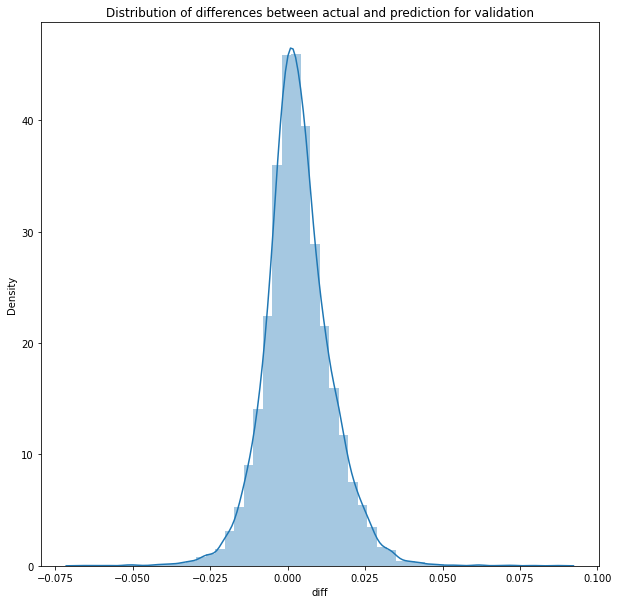

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 7ms/step


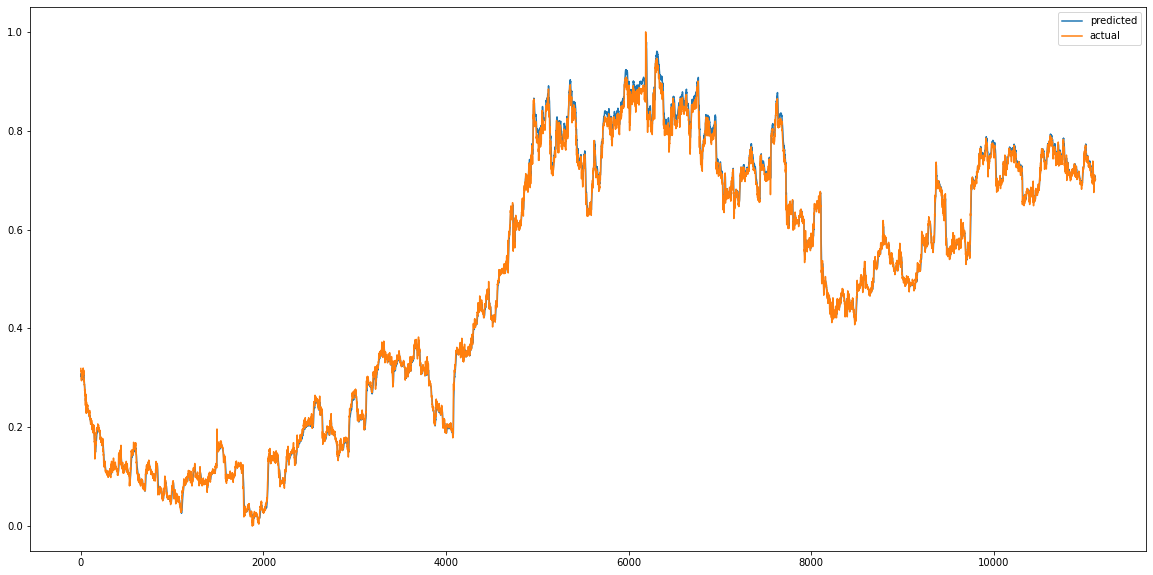

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


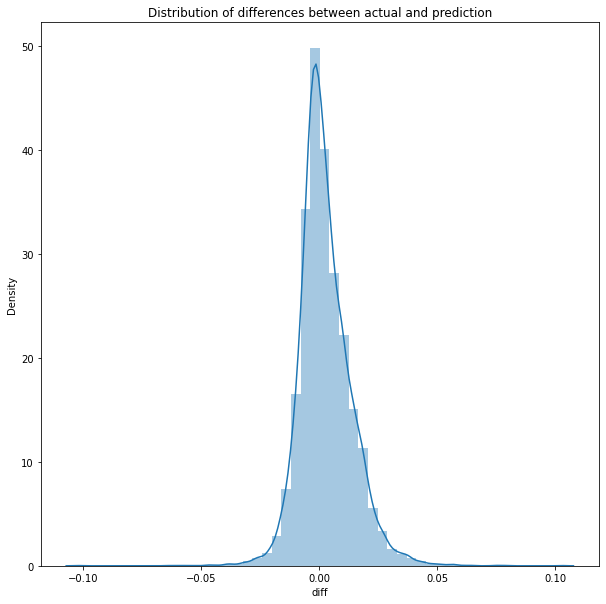

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0001278136209997215
RMSE :  0.01130546863246816
MAE :  0.008161670618426193
348/348 [==============================] - 3s 8ms/step
R2_Score  : 0.9982362138266819


count    11115.000000
mean         0.002566
std          0.011011
min         -0.102033
25%         -0.004136
50%          0.001012
75%          0.008613
max          0.102524
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
405/406 [============================>.] - ETA: 0s - loss: 383.2486 - mae: 6.8749 - mse: 383.2486 - root_mean_squared_error: 19.5767 - mape: 56531.1992
Epoch 1: val_mse improved from inf to 2.21864, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 21s 41ms/step - loss: 382.3840 - mae: 6.8629 - mse: 382.3840 - root_mean_squared_error: 19.5546 - mape: 56405.2539 - val_loss: 2.2186 - val_mae: 1.4773 - val_mse: 2.2186 - val_root_mean_squared_error: 1.4895 - val_mape: 171716.5000
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.9149 - mae: 0.7993 - mse: 0.9149 - root_mean_squared_error: 0.9565 - mape: 13536.0889
Epoch 2: val_mse improved from 2.21864 to 0.03748, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.9087 - mae: 0.7951 - mse: 0.9087 - root_mean_squared_error: 0.9533 - mape: 13439.8164 - val_loss: 0.0375 - val_mae: 0.1623 - val_mse: 0.0375 - val_root_mean_squared_error: 0.1936 - val_mape: 41597.4961
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0454 - mae: 0.1787 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 6866.7856
Epoch 3: val_mse did not improve from 0.03748
406/406 [==============================] - 5s 12ms/step - loss: 0.0454 - mae: 0.1787 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 6851.5029 - val_loss: 0.0423 - val_mae: 0.1689 - val_mse: 0.0423 - val_root_mean_squared_error: 0.2056 - val_mape: 31273.8594
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.0422 - mae: 0.1690 - mse: 0.0422 - root_mean_squared_error: 0.2054 - mape: 6884.2563
Epoch 4: val_mse did not improve from 0.03748
406/406 [==============================] - 5s 12ms/step - 

406/406 [==============================] - 15s 38ms/step - loss: 0.0383 - mae: 0.1596 - mse: 0.0383 - root_mean_squared_error: 0.1957 - mape: 5934.0674 - val_loss: 0.0292 - val_mae: 0.1349 - val_mse: 0.0292 - val_root_mean_squared_error: 0.1708 - val_mape: 28170.0137
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 0.0165 - mae: 0.0962 - mse: 0.0165 - root_mean_squared_error: 0.1285 - mape: 5090.9395
Epoch 25: val_mse improved from 0.02916 to 0.00377, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0165 - mae: 0.0962 - mse: 0.0165 - root_mean_squared_error: 0.1285 - mape: 5090.9395 - val_loss: 0.0038 - val_mae: 0.0506 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0614 - val_mape: 16747.6758
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0567 - mse: 0.0055 - root_mean_squared_error: 0.0741 - mape: 3451.0378
Epoch 26: val_mse improved from 0.00377 to 0.00162, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0055 - mae: 0.0567 - mse: 0.0055 - root_mean_squared_error: 0.0741 - mape: 3451.0378 - val_loss: 0.0016 - val_mae: 0.0313 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 13823.3320
Epoch 27/75
403/406 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0453 - mse: 0.0036 - root_mean_squared_error: 0.0599 - mape: 2980.4939
Epoch 27: val_mse improved from 0.00162 to 0.00135, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0036 - mae: 0.0453 - mse: 0.0036 - root_mean_squared_error: 0.0599 - mape: 2959.2739 - val_loss: 0.0013 - val_mae: 0.0287 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 11535.3145
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0387 - mse: 0.0026 - root_mean_squared_error: 0.0512 - mape: 2554.2109
Epoch 28: val_mse improved from 0.00135 to 0.00128, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0026 - mae: 0.0387 - mse: 0.0026 - root_mean_squared_error: 0.0512 - mape: 2548.4763 - val_loss: 0.0013 - val_mae: 0.0276 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 9924.7148
Epoch 29/75
404/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0359 - mse: 0.0023 - root_mean_squared_error: 0.0476 - mape: 2112.3811
Epoch 29: val_mse did not improve from 0.00128
406/406 [==============================] - 5s 12ms/step - loss: 0.0023 - mae: 0.0359 - mse: 0.0023 - root_mean_squared_error: 0.0476 - mape: 2102.4602 - val_loss: 0.0016 - val_mae: 0.0310 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 9571.2373
Epoch 30/75
406/406 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 2142.7415
Epoch 30: val_mse improved from 0.00128 to 0.00118, saving model to /content/drive/MyDrive/modelweights/

406/406 [==============================] - 15s 38ms/step - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 2142.7415 - val_loss: 0.0012 - val_mae: 0.0262 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 8603.7080
Epoch 31/75
404/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0313 - mse: 0.0017 - root_mean_squared_error: 0.0413 - mape: 1778.0740
Epoch 31: val_mse did not improve from 0.00118
406/406 [==============================] - 5s 12ms/step - loss: 0.0017 - mae: 0.0312 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1769.7433 - val_loss: 0.0017 - val_mae: 0.0326 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 7900.8193
Epoch 32/75
402/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0292 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 1785.9100
Epoch 32: val_mse did not improve from 0.00118
406/406 [==============================] - 5s 12ms/step -

406/406 [==============================] - 17s 42ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 1552.1674 - val_loss: 0.0012 - val_mae: 0.0253 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 6608.3628
Epoch 34/75
403/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1261.6047
Epoch 34: val_mse did not improve from 0.00115
406/406 [==============================] - 5s 12ms/step - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1252.6293 - val_loss: 0.0012 - val_mae: 0.0269 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 6253.5532
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 9.7256e-04 - mae: 0.0238 - mse: 9.7256e-04 - root_mean_squared_error: 0.0312 - mape: 1117.7209
Epoch 35: val_mse did not improve from 0.00115
406/406 [==============================] - 5s 12m

406/406 [==============================] - 16s 39ms/step - loss: 3.6669e-04 - mae: 0.0147 - mse: 3.6669e-04 - root_mean_squared_error: 0.0191 - mape: 759.9024 - val_loss: 0.0011 - val_mae: 0.0253 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 3820.0151
Epoch 43/75
404/406 [============================>.] - ETA: 0s - loss: 3.1308e-04 - mae: 0.0136 - mse: 3.1308e-04 - root_mean_squared_error: 0.0177 - mape: 735.2889
Epoch 43: val_mse did not improve from 0.00113
406/406 [==============================] - 5s 12ms/step - loss: 3.1365e-04 - mae: 0.0136 - mse: 3.1365e-04 - root_mean_squared_error: 0.0177 - mape: 731.8448 - val_loss: 0.0013 - val_mae: 0.0262 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 4608.3726
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 3.2259e-04 - mae: 0.0137 - mse: 3.2259e-04 - root_mean_squared_error: 0.0180 - mape: 693.7658
Epoch 44: val_mse improved from 0.00113 to 0.00112, saving model to /content

406/406 [==============================] - 16s 39ms/step - loss: 3.2215e-04 - mae: 0.0137 - mse: 3.2215e-04 - root_mean_squared_error: 0.0179 - mape: 688.8157 - val_loss: 0.0011 - val_mae: 0.0249 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 4899.6860
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 2.8076e-04 - mae: 0.0128 - mse: 2.8076e-04 - root_mean_squared_error: 0.0168 - mape: 844.4890
Epoch 45: val_mse improved from 0.00112 to 0.00111, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 2.8154e-04 - mae: 0.0128 - mse: 2.8154e-04 - root_mean_squared_error: 0.0168 - mape: 842.5912 - val_loss: 0.0011 - val_mae: 0.0250 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 5249.7607
Epoch 46/75
406/406 [==============================] - ETA: 0s - loss: 2.5428e-04 - mae: 0.0122 - mse: 2.5428e-04 - root_mean_squared_error: 0.0159 - mape: 641.1950
Epoch 46: val_mse improved from 0.00111 to 0.00106, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 2.5428e-04 - mae: 0.0122 - mse: 2.5428e-04 - root_mean_squared_error: 0.0159 - mape: 641.1950 - val_loss: 0.0011 - val_mae: 0.0241 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 5246.4033
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 2.4939e-04 - mae: 0.0121 - mse: 2.4939e-04 - root_mean_squared_error: 0.0158 - mape: 687.0134
Epoch 47: val_mse did not improve from 0.00106
406/406 [==============================] - 5s 12ms/step - loss: 2.4939e-04 - mae: 0.0121 - mse: 2.4939e-04 - root_mean_squared_error: 0.0158 - mape: 685.4638 - val_loss: 0.0011 - val_mae: 0.0252 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 4689.8433
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 2.3703e-04 - mae: 0.0117 - mse: 2.3703e-04 - root_mean_squared_error: 0.0154 - mape: 616.3184
Epoch 48: val_mse did not improve from 0.00106
406/406 [====================

406/406 [==============================] - 17s 43ms/step - loss: 1.4902e-04 - mae: 0.0092 - mse: 1.4902e-04 - root_mean_squared_error: 0.0122 - mape: 506.7535 - val_loss: 0.0010 - val_mae: 0.0238 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 4539.0957
Epoch 60/75
406/406 [==============================] - ETA: 0s - loss: 1.5221e-04 - mae: 0.0093 - mse: 1.5221e-04 - root_mean_squared_error: 0.0123 - mape: 564.9470
Epoch 60: val_mse did not improve from 0.00103
406/406 [==============================] - 5s 12ms/step - loss: 1.5221e-04 - mae: 0.0093 - mse: 1.5221e-04 - root_mean_squared_error: 0.0123 - mape: 564.9470 - val_loss: 0.0012 - val_mae: 0.0266 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 4561.3228
Epoch 61/75
403/406 [============================>.] - ETA: 0s - loss: 1.5548e-04 - mae: 0.0094 - mse: 1.5548e-04 - root_mean_squared_error: 0.0125 - mape: 481.2205
Epoch 61: val_mse did not improve from 0.00103
406/406 [====================

406/406 [==============================] - 16s 40ms/step - loss: 1.4649e-04 - mae: 0.0091 - mse: 1.4649e-04 - root_mean_squared_error: 0.0121 - mape: 474.9724 - val_loss: 9.3231e-04 - val_mae: 0.0230 - val_mse: 9.3231e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 4768.4048
Epoch 63/75
402/406 [============================>.] - ETA: 0s - loss: 1.3111e-04 - mae: 0.0086 - mse: 1.3111e-04 - root_mean_squared_error: 0.0115 - mape: 528.1400
Epoch 63: val_mse did not improve from 0.00093
406/406 [==============================] - 5s 12ms/step - loss: 1.3075e-04 - mae: 0.0086 - mse: 1.3075e-04 - root_mean_squared_error: 0.0114 - mape: 523.0751 - val_loss: 0.0010 - val_mae: 0.0243 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0324 - val_mape: 4494.5708
Epoch 64/75
406/406 [==============================] - ETA: 0s - loss: 1.4538e-04 - mae: 0.0091 - mse: 1.4538e-04 - root_mean_squared_error: 0.0121 - mape: 487.9239
Epoch 64: val_mse improved from 0.00093 to 0.00084, saving model to 

406/406 [==============================] - 16s 40ms/step - loss: 1.4538e-04 - mae: 0.0091 - mse: 1.4538e-04 - root_mean_squared_error: 0.0121 - mape: 487.9239 - val_loss: 8.4203e-04 - val_mae: 0.0216 - val_mse: 8.4203e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 4407.0903
Epoch 65/75
404/406 [============================>.] - ETA: 0s - loss: 1.1336e-04 - mae: 0.0081 - mse: 1.1336e-04 - root_mean_squared_error: 0.0106 - mape: 484.7656
Epoch 65: val_mse improved from 0.00084 to 0.00072, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 1.1335e-04 - mae: 0.0081 - mse: 1.1335e-04 - root_mean_squared_error: 0.0106 - mape: 482.4886 - val_loss: 7.2138e-04 - val_mae: 0.0200 - val_mse: 7.2138e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 3676.7122
Epoch 66/75
404/406 [============================>.] - ETA: 0s - loss: 1.0829e-04 - mae: 0.0079 - mse: 1.0829e-04 - root_mean_squared_error: 0.0104 - mape: 451.8666
Epoch 66: val_mse improved from 0.00072 to 0.00059, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 1.0813e-04 - mae: 0.0079 - mse: 1.0813e-04 - root_mean_squared_error: 0.0104 - mape: 449.7408 - val_loss: 5.9489e-04 - val_mae: 0.0182 - val_mse: 5.9489e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 4196.8979
Epoch 67/75
403/406 [============================>.] - ETA: 0s - loss: 9.4420e-05 - mae: 0.0074 - mse: 9.4420e-05 - root_mean_squared_error: 0.0097 - mape: 516.8690
Epoch 67: val_mse did not improve from 0.00059
406/406 [==============================] - 5s 12ms/step - loss: 9.4233e-05 - mae: 0.0074 - mse: 9.4233e-05 - root_mean_squared_error: 0.0097 - mape: 513.1730 - val_loss: 6.7597e-04 - val_mae: 0.0199 - val_mse: 6.7597e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 4197.3525
Epoch 68/75
406/406 [==============================] - ETA: 0s - loss: 8.6228e-05 - mae: 0.0071 - mse: 8.6228e-05 - root_mean_squared_error: 0.0093 - mape: 481.6418
Epoch 68: val_mse improved from 0.00059 to 0.00056, saving m

406/406 [==============================] - 16s 40ms/step - loss: 8.6228e-05 - mae: 0.0071 - mse: 8.6228e-05 - root_mean_squared_error: 0.0093 - mape: 481.6418 - val_loss: 5.6384e-04 - val_mae: 0.0184 - val_mse: 5.6384e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 4080.3271
Epoch 69/75
404/406 [============================>.] - ETA: 0s - loss: 8.5984e-05 - mae: 0.0070 - mse: 8.5984e-05 - root_mean_squared_error: 0.0093 - mape: 472.5169
Epoch 69: val_mse did not improve from 0.00056
406/406 [==============================] - 5s 12ms/step - loss: 8.6082e-05 - mae: 0.0070 - mse: 8.6082e-05 - root_mean_squared_error: 0.0093 - mape: 470.2933 - val_loss: 6.6197e-04 - val_mae: 0.0205 - val_mse: 6.6197e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 3872.1138
Epoch 70/75
405/406 [============================>.] - ETA: 0s - loss: 7.0185e-05 - mae: 0.0063 - mse: 7.0185e-05 - root_mean_squared_error: 0.0084 - mape: 466.0031
Epoch 70: val_mse improved from 0.00056 to 0.00038, saving m

406/406 [==============================] - 16s 40ms/step - loss: 7.0139e-05 - mae: 0.0063 - mse: 7.0139e-05 - root_mean_squared_error: 0.0084 - mape: 464.9522 - val_loss: 3.7959e-04 - val_mae: 0.0145 - val_mse: 3.7959e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 3949.6826
Epoch 71/75
402/406 [============================>.] - ETA: 0s - loss: 6.8782e-05 - mae: 0.0062 - mse: 6.8782e-05 - root_mean_squared_error: 0.0083 - mape: 449.1656
Epoch 71: val_mse did not improve from 0.00038
406/406 [==============================] - 5s 12ms/step - loss: 6.8848e-05 - mae: 0.0063 - mse: 6.8848e-05 - root_mean_squared_error: 0.0083 - mape: 444.8521 - val_loss: 6.4544e-04 - val_mae: 0.0209 - val_mse: 6.4544e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 4093.6091
Epoch 72/75
405/406 [============================>.] - ETA: 0s - loss: 1.2887e-04 - mae: 0.0077 - mse: 1.2887e-04 - root_mean_squared_error: 0.0114 - mape: 450.4849
Epoch 72: val_mse did not improve from 0.00038
406/406 [====

406/406 [==============================] - 16s 40ms/step - loss: 6.2042e-05 - mae: 0.0060 - mse: 6.2042e-05 - root_mean_squared_error: 0.0079 - mape: 381.3055 - val_loss: 3.1999e-04 - val_mae: 0.0134 - val_mse: 3.1999e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 4138.8730


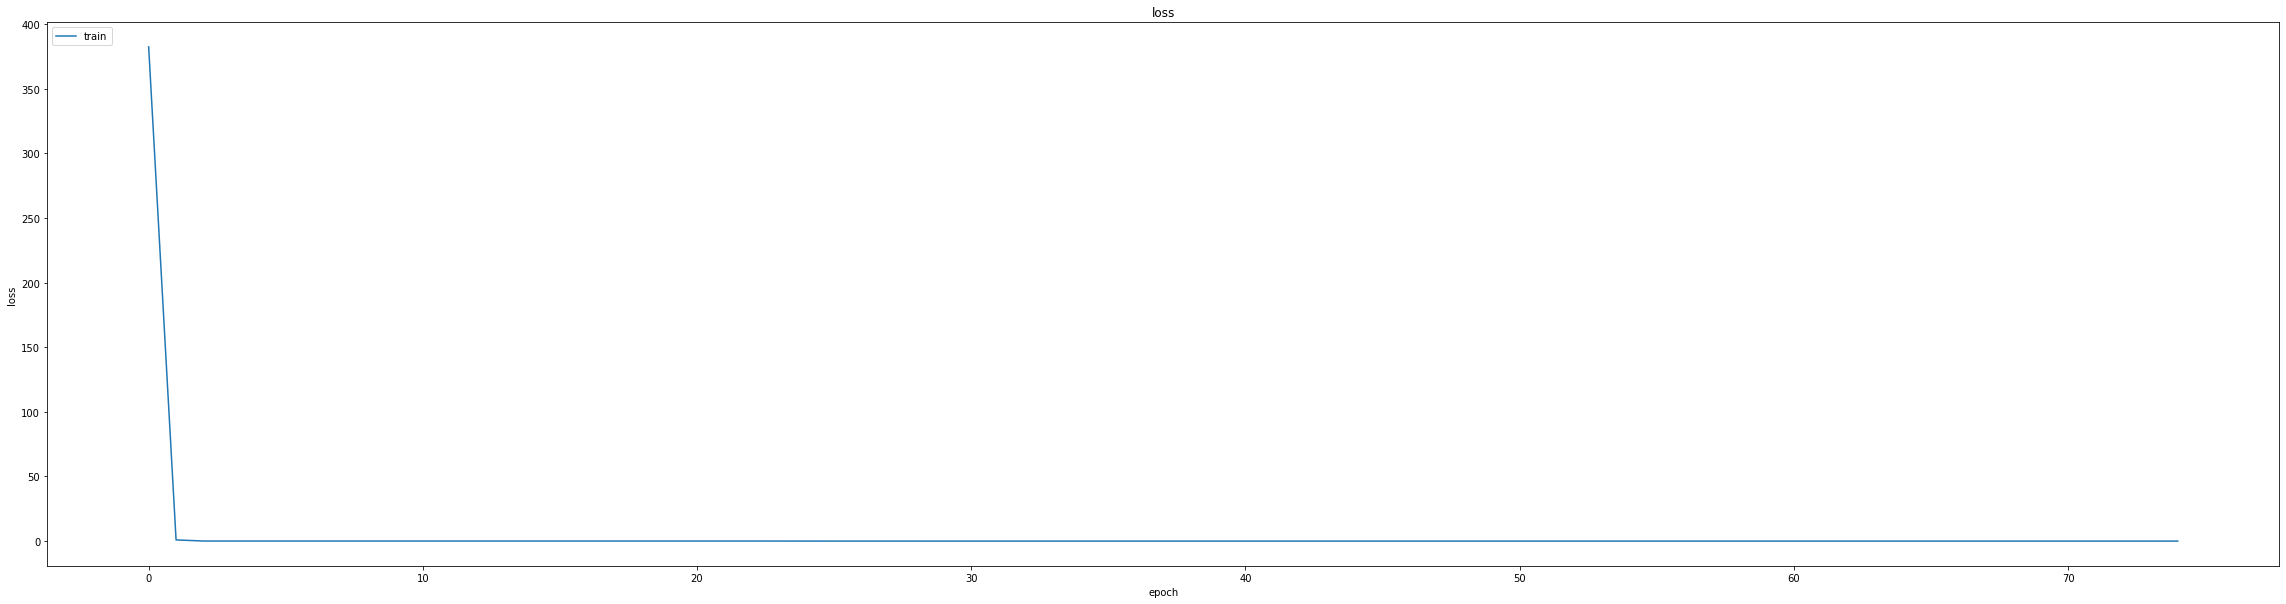

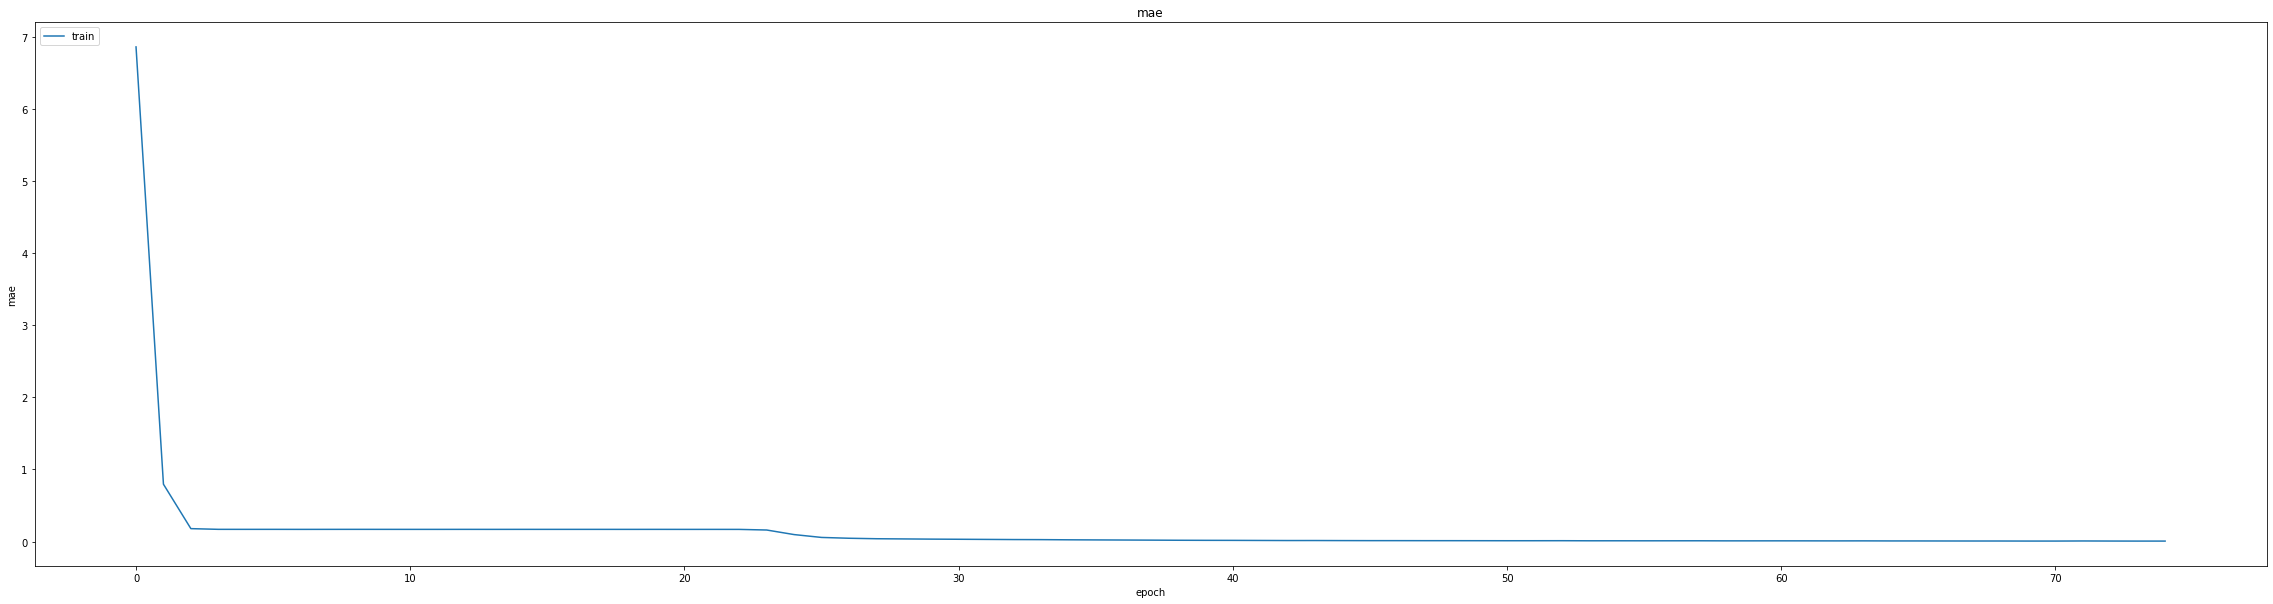

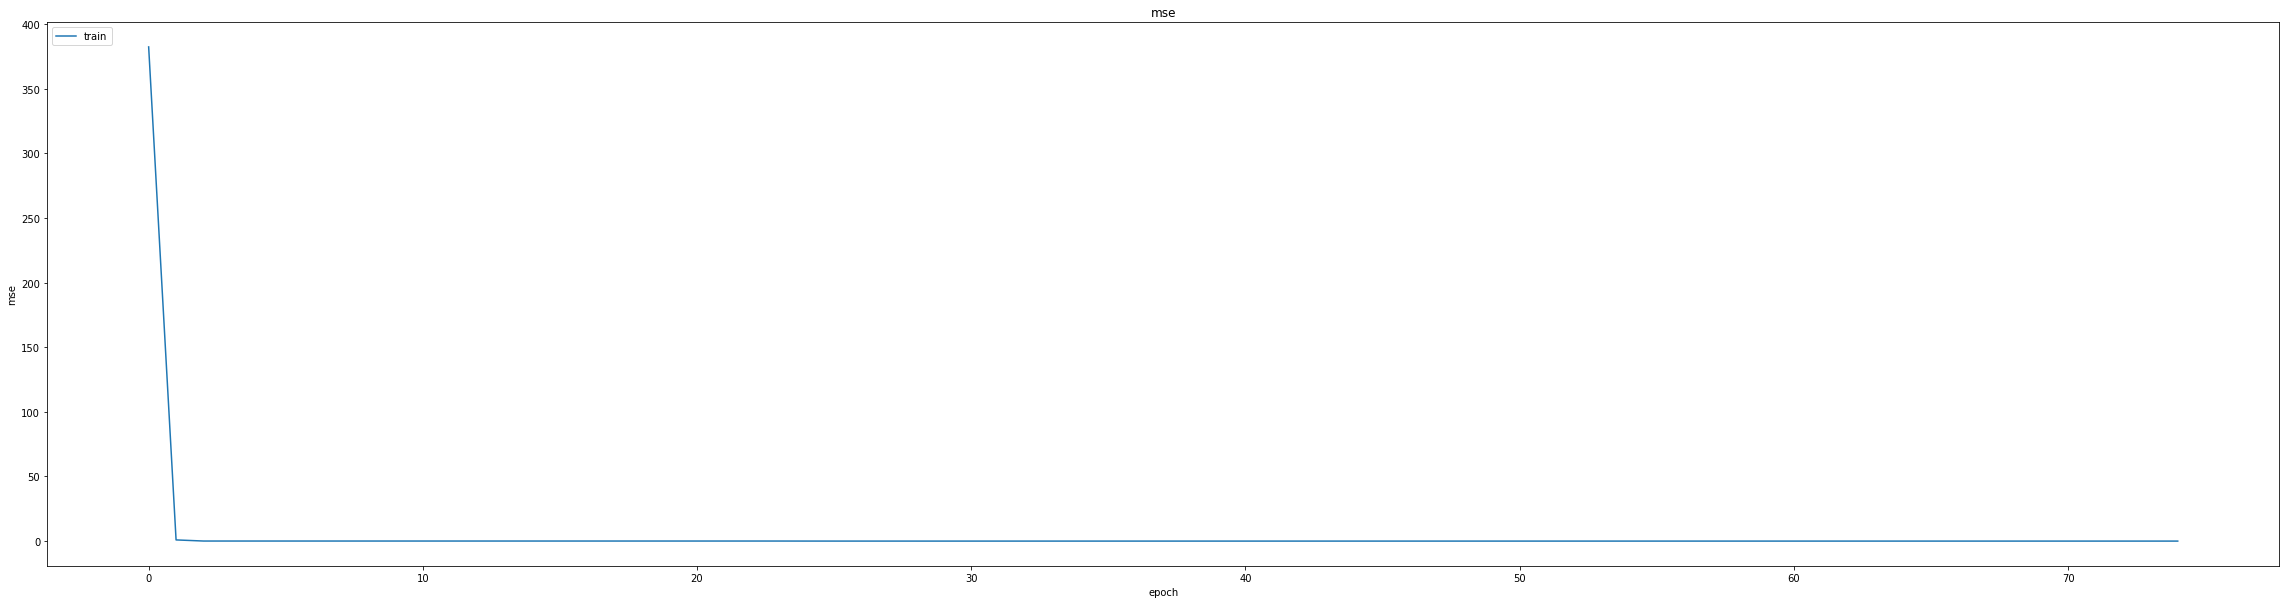

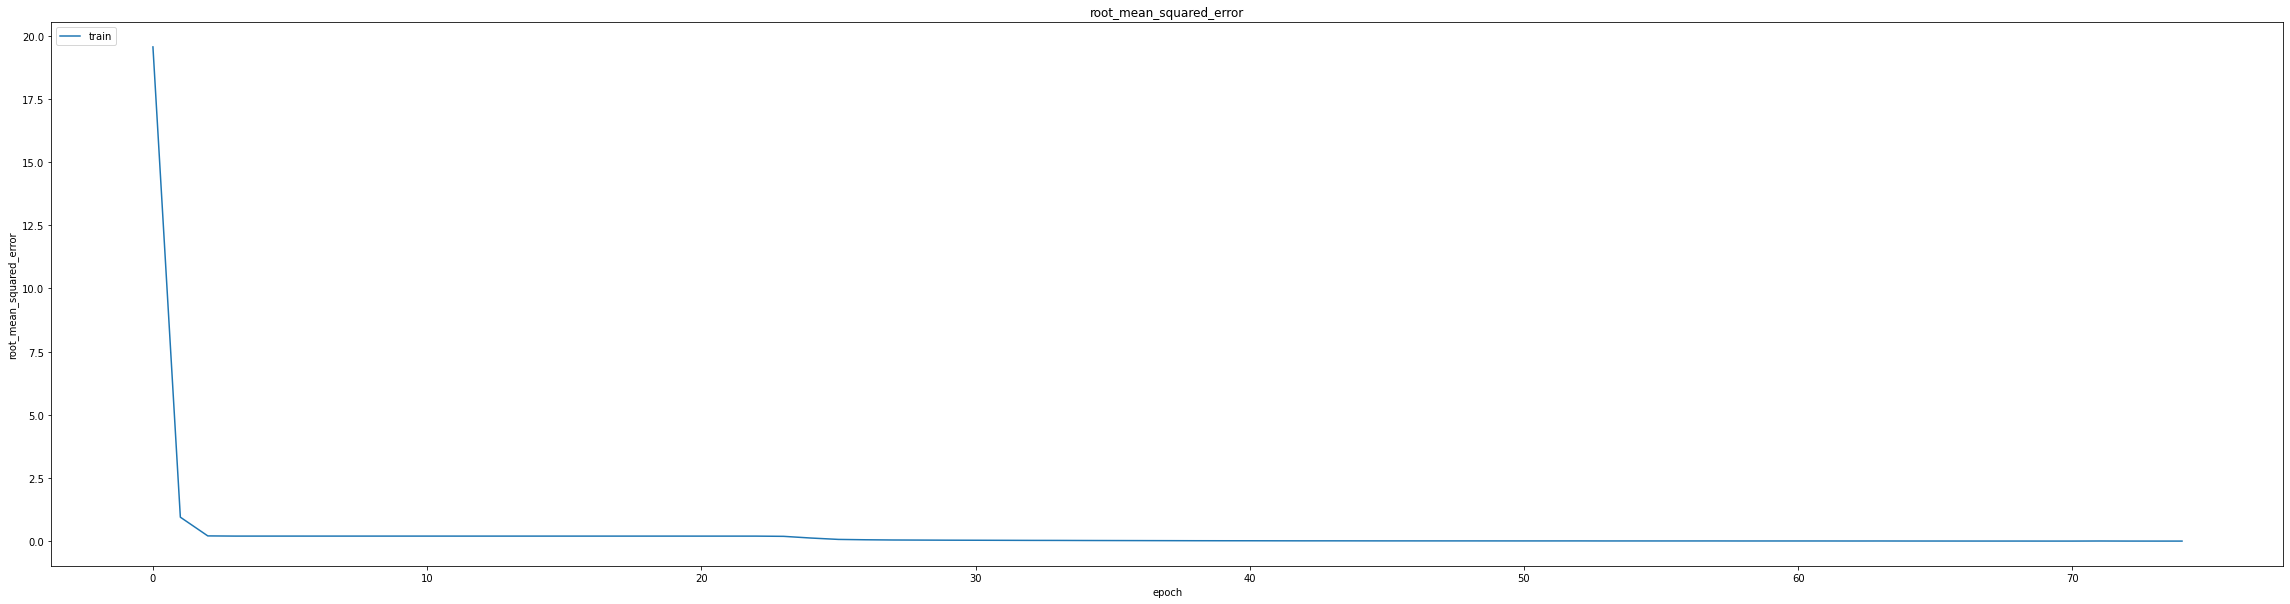

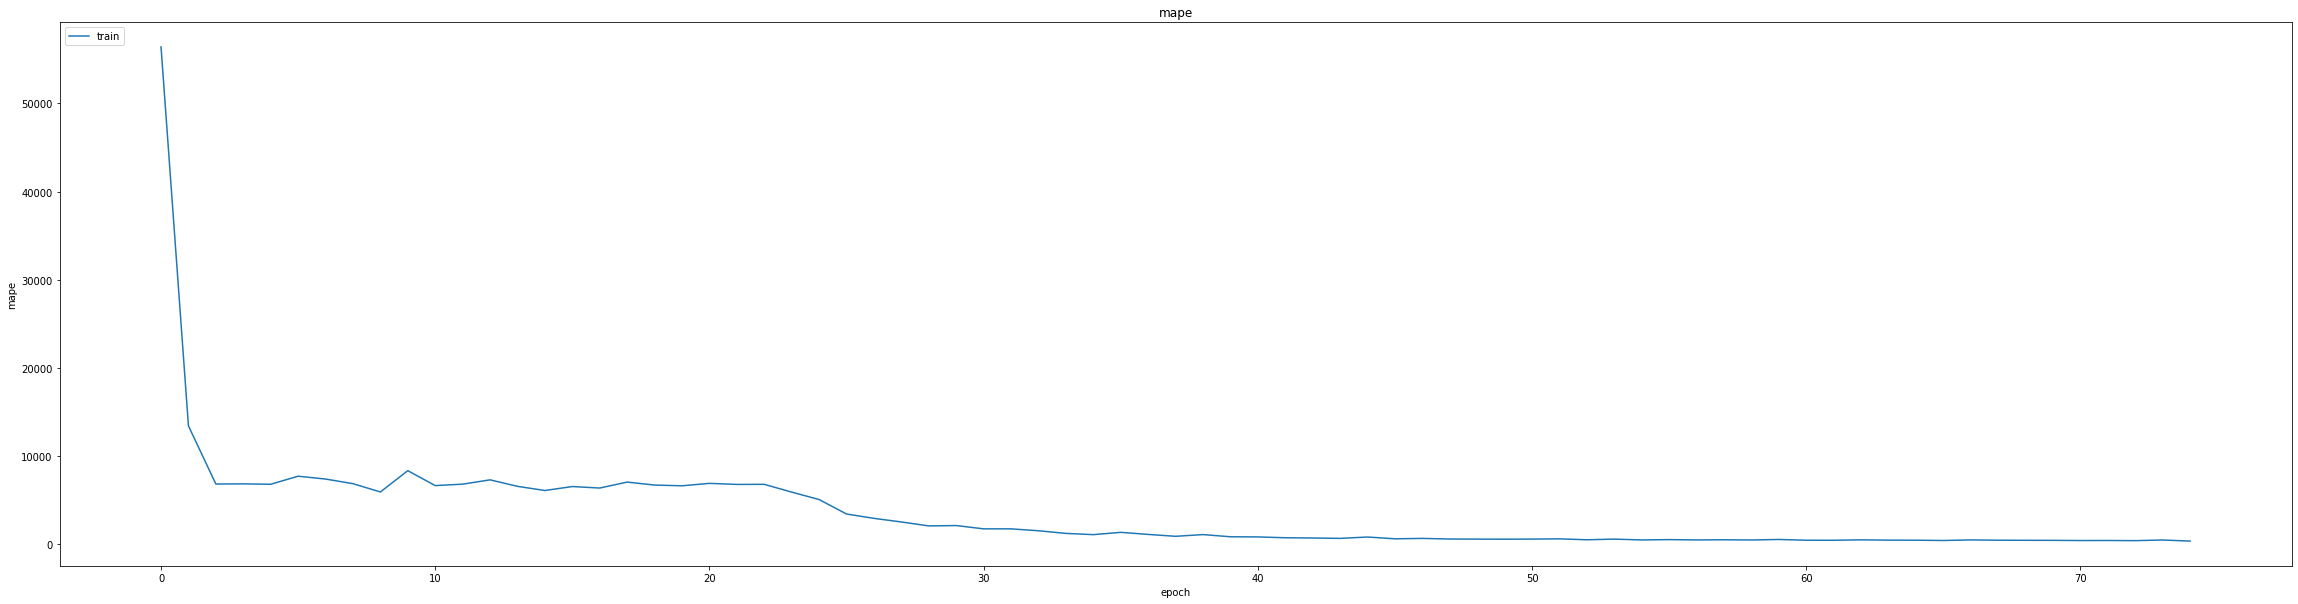

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013398337177932262
0.017888212576508522
348/348 [==============================] - 3s 6ms/step
0.9911471490184904


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
405/406 [============================>.] - ETA: 0s - loss: 1.5040e-04 - mae: 0.0068 - mse: 1.5040e-04 - root_mean_squared_error: 0.0123 - mape: 390.6005
Epoch 1: val_mse did not improve from 0.00032
406/406 [==============================] - 10s 14ms/step - loss: 1.5018e-04 - mae: 0.0068 - mse: 1.5018e-04 - root_mean_squared_error: 0.0123 - mape: 389.7242 - val_loss: 3.7921e-04 - val_mae: 0.0151 - val_mse: 3.7921e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 3883.8962 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 4.2132e-05 - mae: 0.0049 - mse: 4.2132e-05 - root_mean_squared_error: 0.0065 - mape: 455.8810
Epoch 2: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 12ms/step - loss: 4.2172e-05 - mae: 0.0049 - mse: 4.2172e-05 - root_mean_squared_error: 0.0065 - mape: 452.6190 - val_loss: 4.2435e-04 - val_mae: 0.0167 - val_mse: 4.2435e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 4188.9004 - lr

406/406 [==============================] - 17s 42ms/step - loss: 4.4429e-05 - mae: 0.0050 - mse: 4.4429e-05 - root_mean_squared_error: 0.0067 - mape: 371.5686 - val_loss: 2.5061e-04 - val_mae: 0.0120 - val_mse: 2.5061e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 3850.1982 - lr: 9.0000e-04
Epoch 4/25
402/406 [============================>.] - ETA: 0s - loss: 4.5041e-05 - mae: 0.0051 - mse: 4.5041e-05 - root_mean_squared_error: 0.0067 - mape: 377.8382
Epoch 4: val_mse did not improve from 0.00025
406/406 [==============================] - 5s 12ms/step - loss: 4.4968e-05 - mae: 0.0051 - mse: 4.4968e-05 - root_mean_squared_error: 0.0067 - mape: 374.2136 - val_loss: 4.3078e-04 - val_mae: 0.0172 - val_mse: 4.3078e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 3244.9080 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
405/406 [============================>.] - ETA: 0s - loss: 4.3622e-05 - mae: 0.0050 - mse: 4.3622e-05 - root_mean_squared_error: 0.0066 - mape: 37

406/406 [==============================] - 16s 40ms/step - loss: 3.4528e-05 - mae: 0.0044 - mse: 3.4528e-05 - root_mean_squared_error: 0.0059 - mape: 393.2980 - val_loss: 2.0584e-04 - val_mae: 0.0109 - val_mse: 2.0584e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 4104.4595 - lr: 7.2900e-04
Epoch 8/25
402/406 [============================>.] - ETA: 0s - loss: 3.7647e-05 - mae: 0.0047 - mse: 3.7647e-05 - root_mean_squared_error: 0.0061 - mape: 395.4532
Epoch 8: val_mse did not improve from 0.00021
406/406 [==============================] - 5s 12ms/step - loss: 3.7522e-05 - mae: 0.0046 - mse: 3.7522e-05 - root_mean_squared_error: 0.0061 - mape: 391.6509 - val_loss: 2.6812e-04 - val_mae: 0.0130 - val_mse: 2.6812e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 3826.9160 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
403/406 [============================>.] - ETA: 0s - loss: 2.9809e-05 - mae: 0.0041 - mse: 2.9809e-05 - root_mean_squared_error: 0.0055 - mape: 37

406/406 [==============================] - 16s 38ms/step - loss: 2.8808e-05 - mae: 0.0040 - mse: 2.8808e-05 - root_mean_squared_error: 0.0054 - mape: 380.2521 - val_loss: 1.9441e-04 - val_mae: 0.0107 - val_mse: 1.9441e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 3280.4160 - lr: 5.9049e-04
Epoch 12/25
404/406 [============================>.] - ETA: 0s - loss: 2.7176e-05 - mae: 0.0039 - mse: 2.7176e-05 - root_mean_squared_error: 0.0052 - mape: 379.1665
Epoch 12: val_mse did not improve from 0.00019
406/406 [==============================] - 5s 12ms/step - loss: 2.7170e-05 - mae: 0.0039 - mse: 2.7170e-05 - root_mean_squared_error: 0.0052 - mape: 377.3805 - val_loss: 2.4086e-04 - val_mae: 0.0124 - val_mse: 2.4086e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 3193.9353 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
403/406 [============================>.] - ETA: 0s - loss: 2.6064e-05 - mae: 0.0038 - mse: 2.6064e-05 - root_mean_squared_error: 0.0051 - mape:

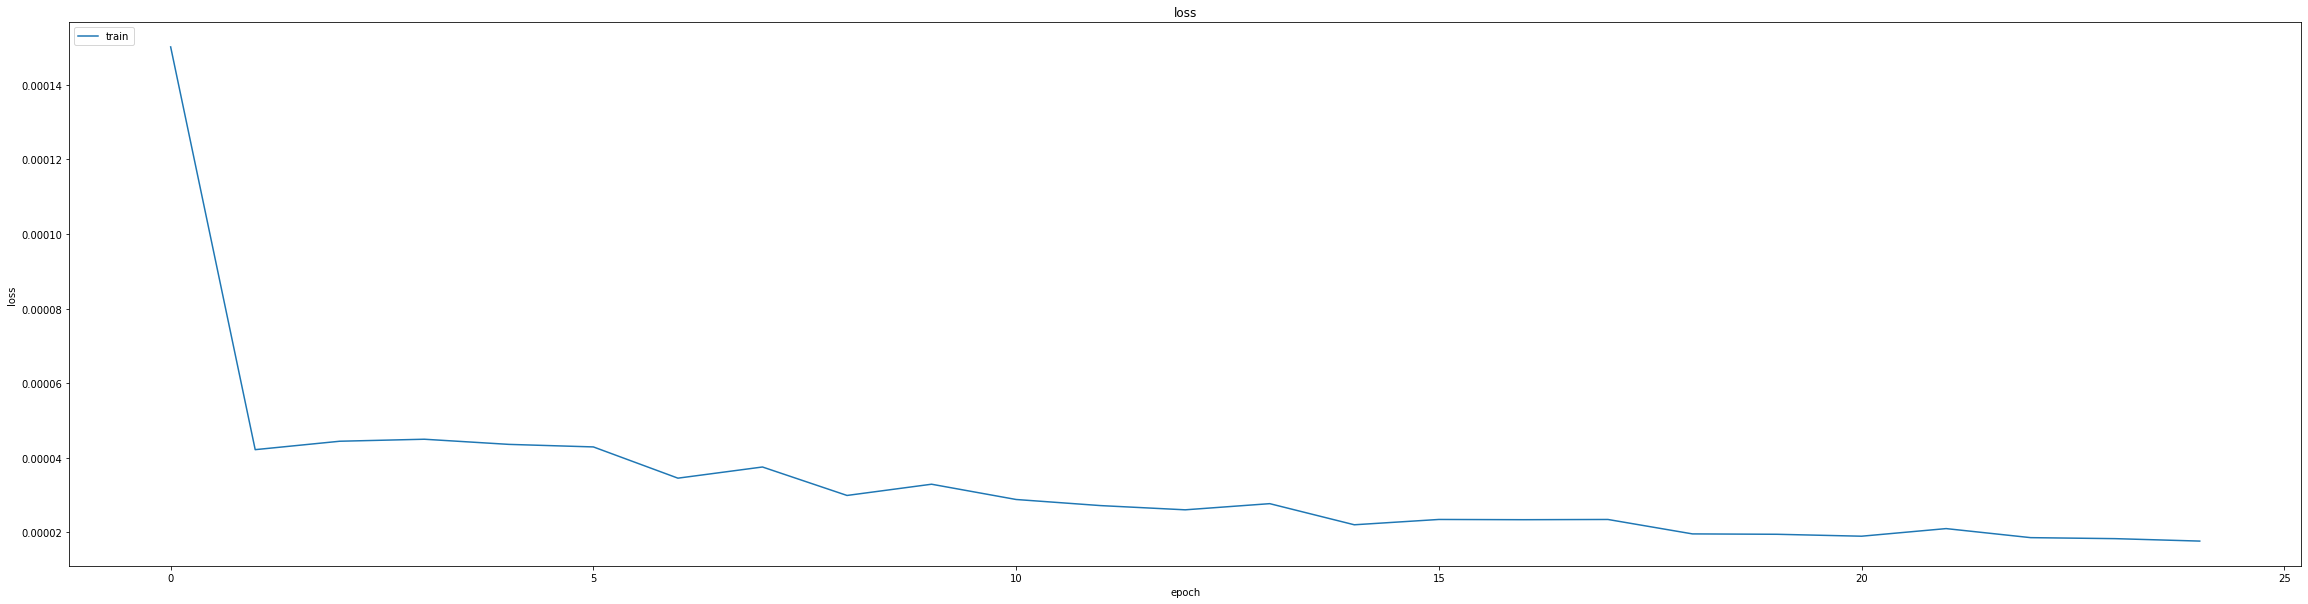

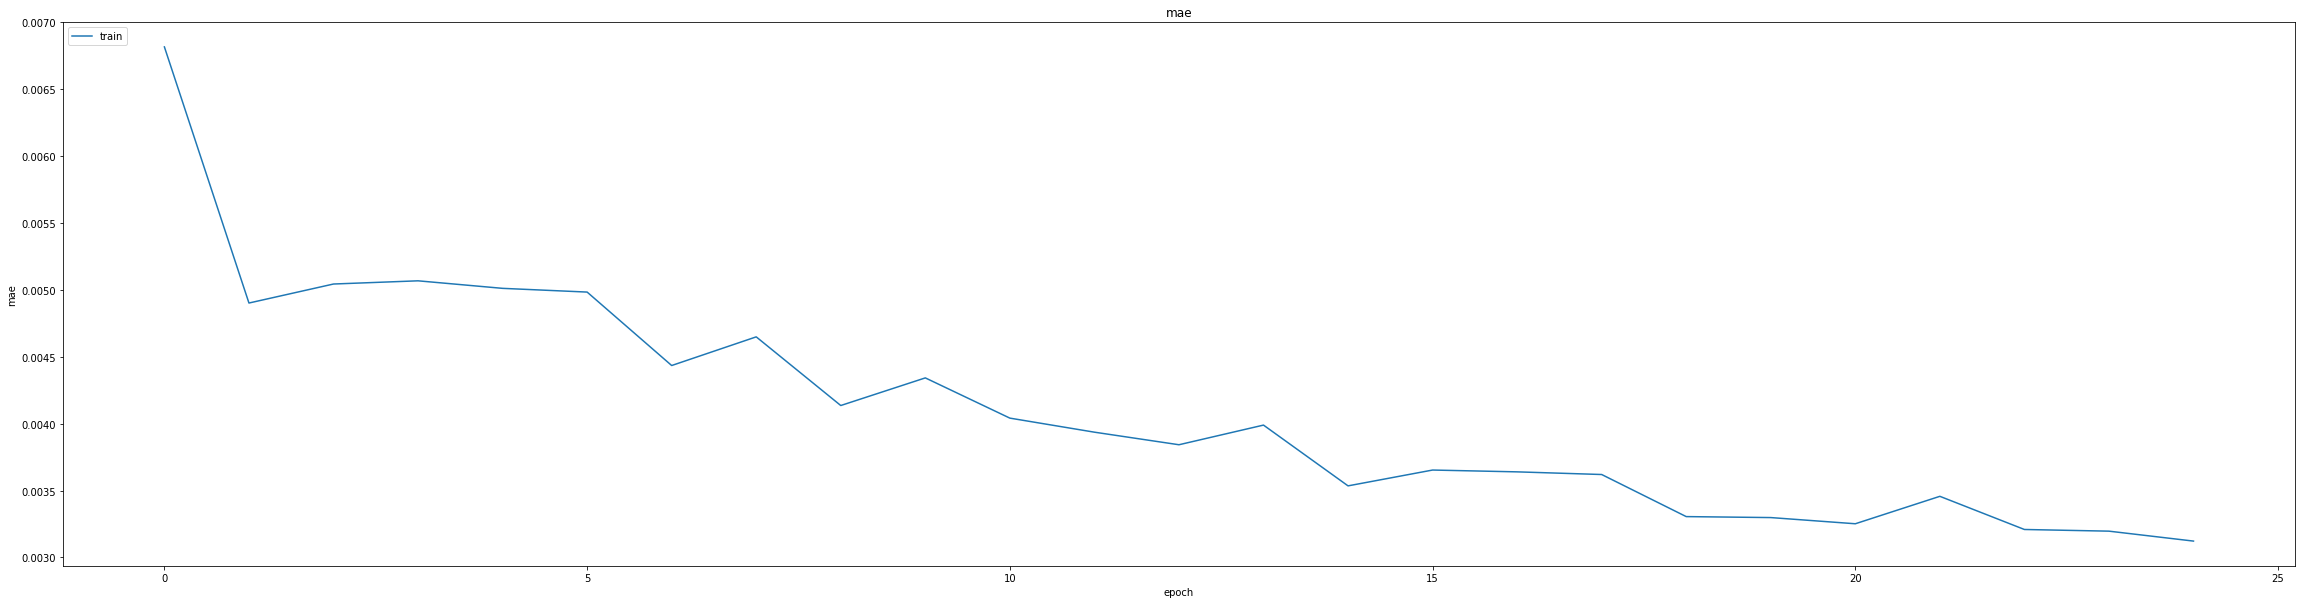

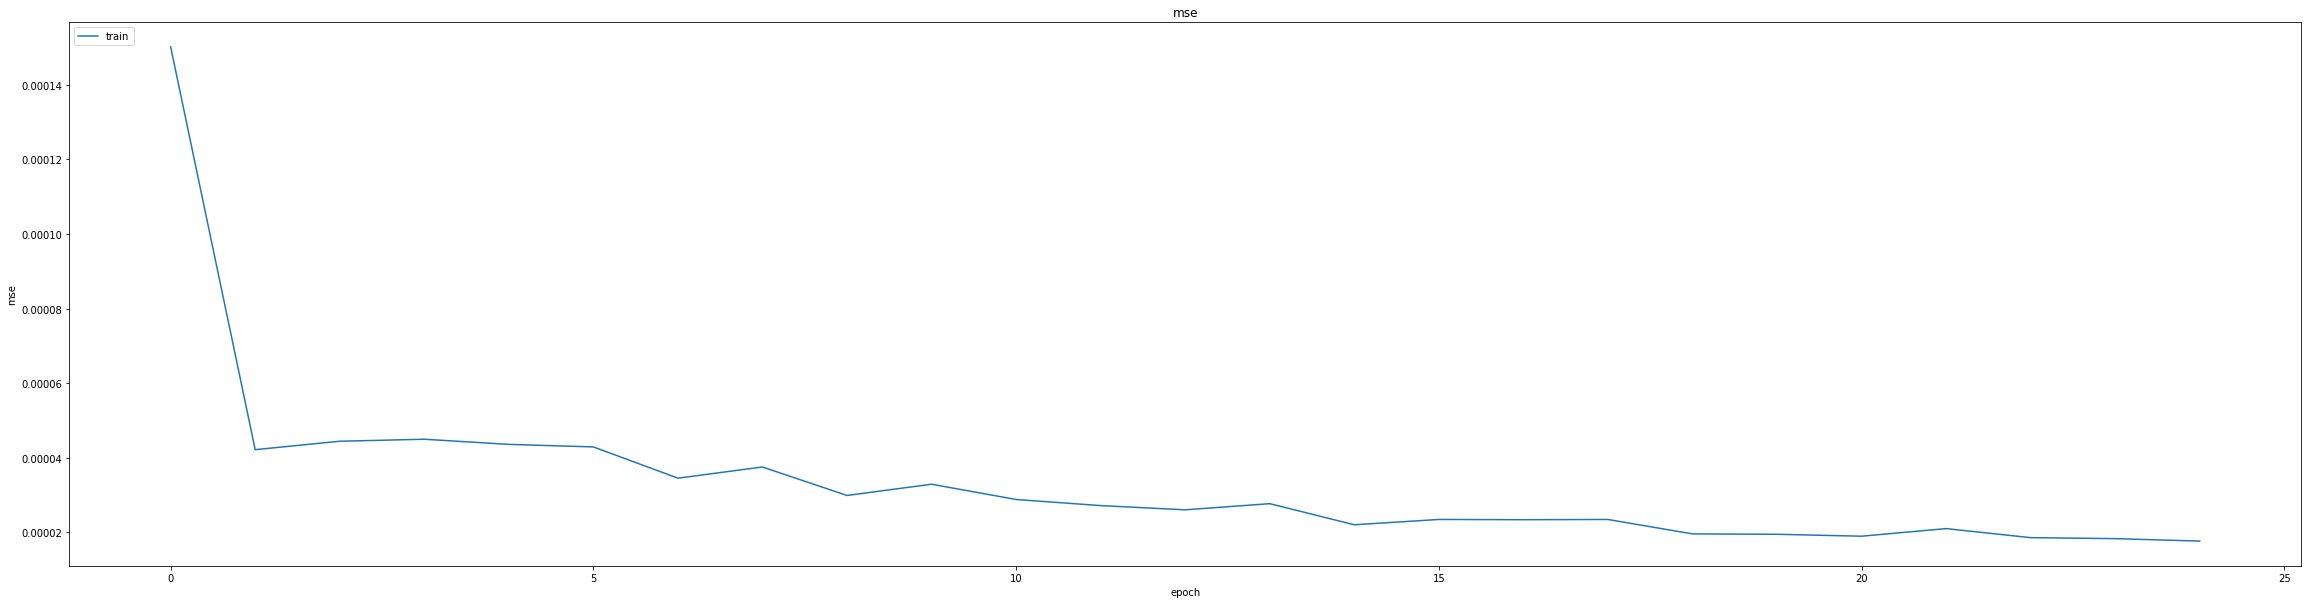

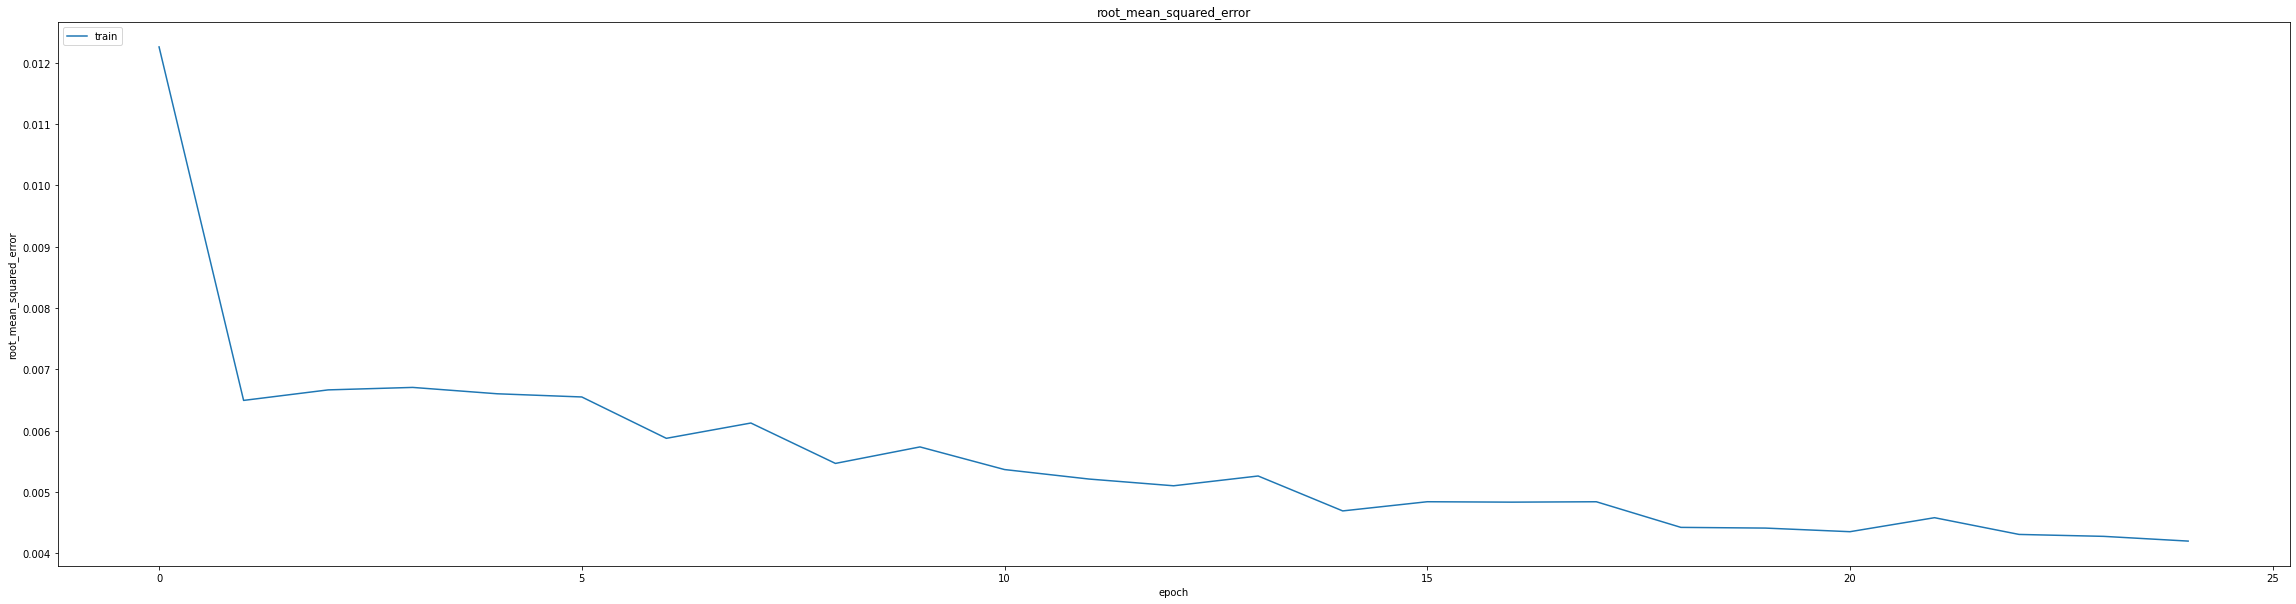

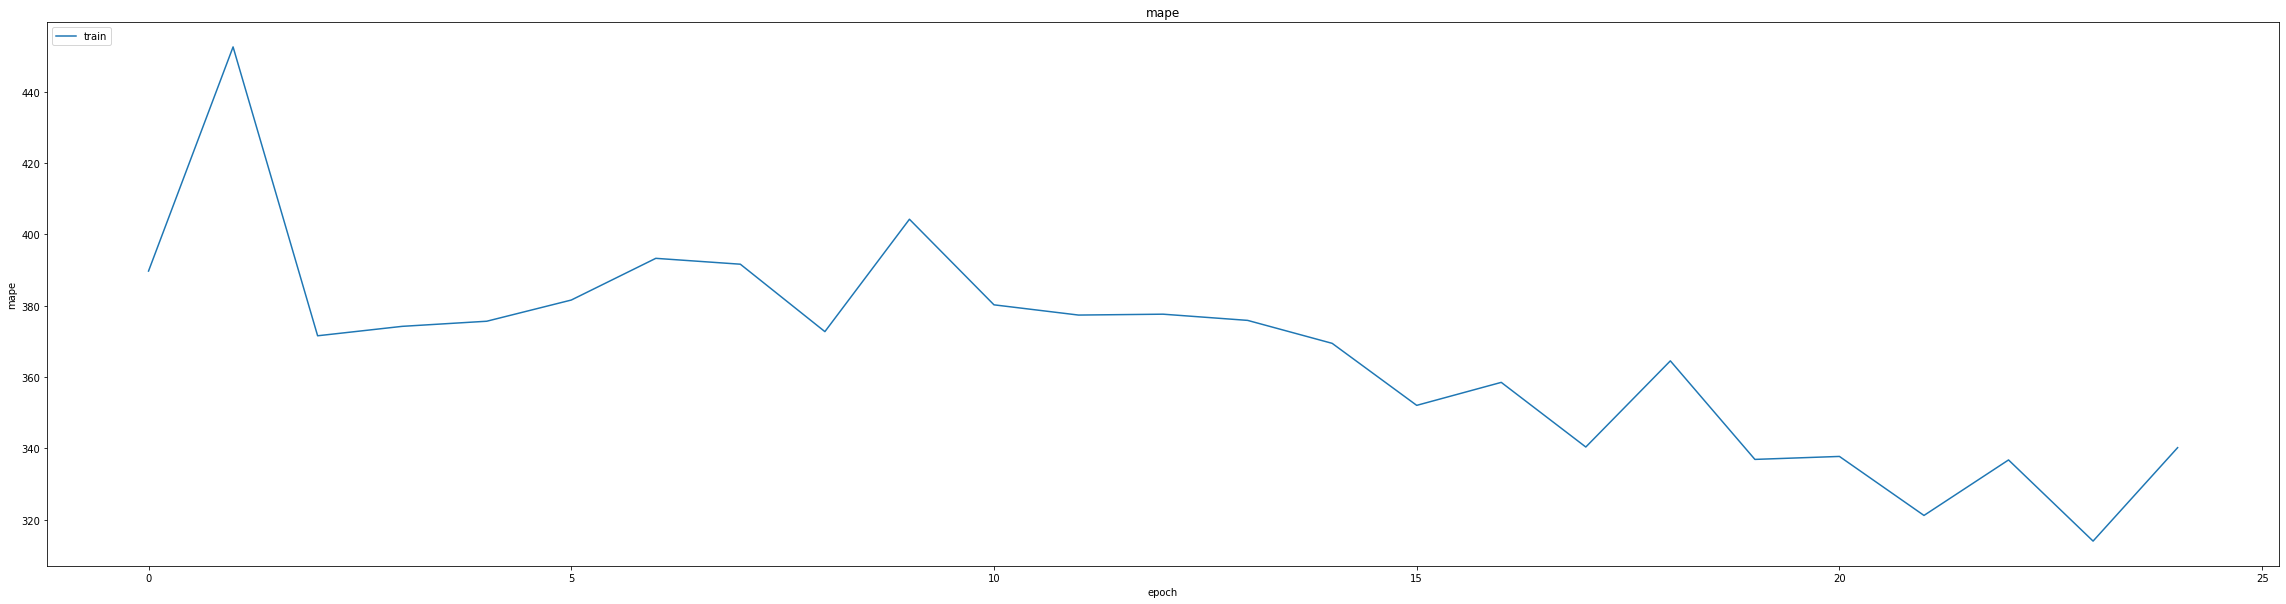

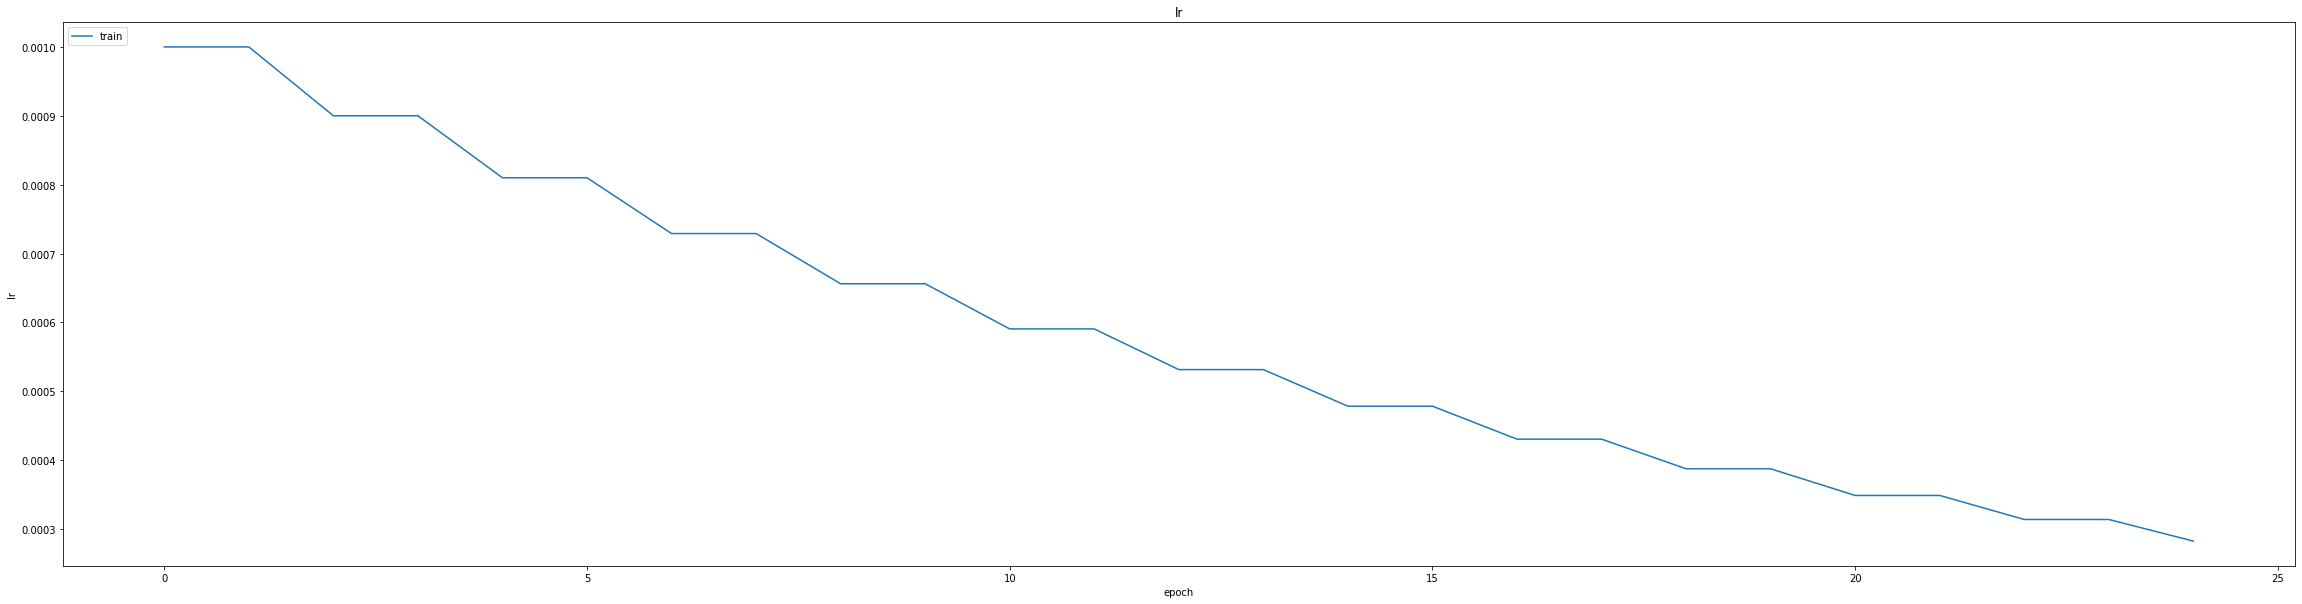

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010672641918063164
0.013942954130470753
348/348 [==============================] - 2s 4ms/step
0.99148319252209


348/348 [==============================] - 1s 4ms/step


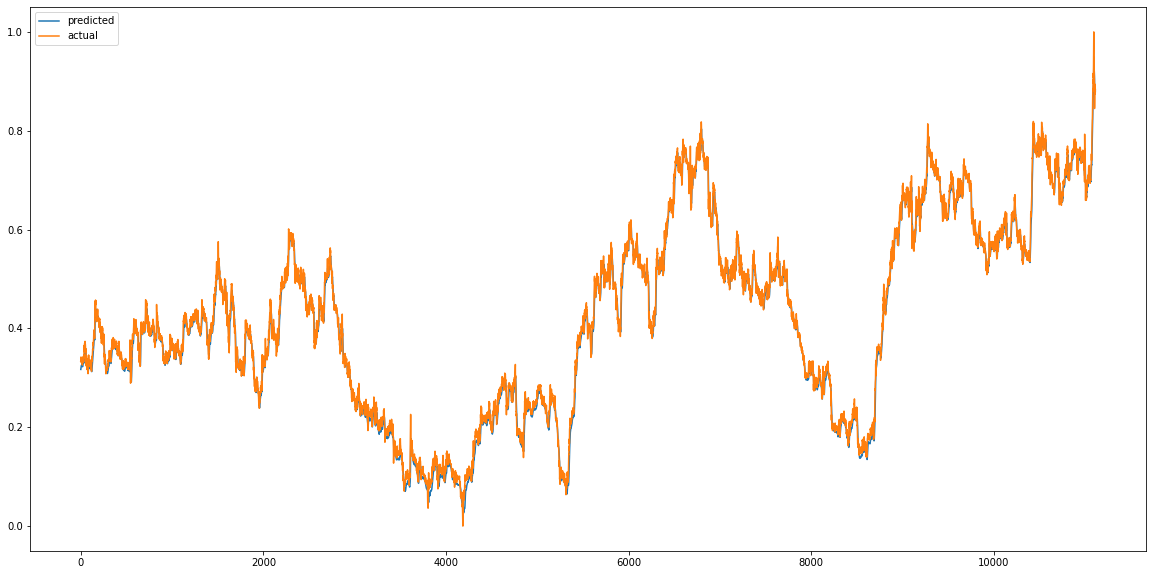

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


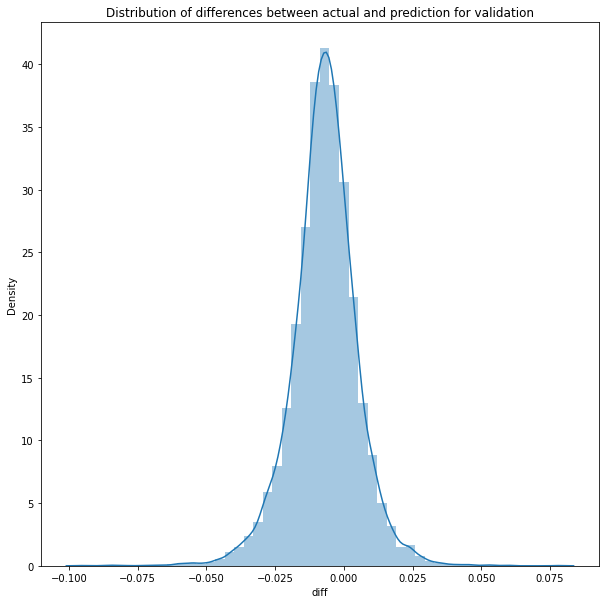

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


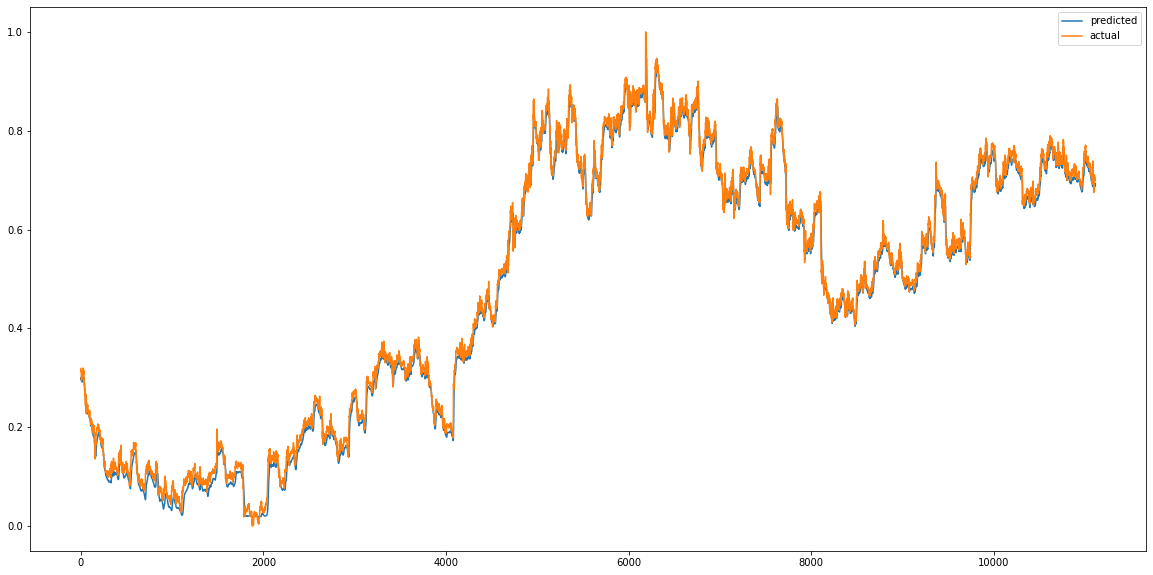

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


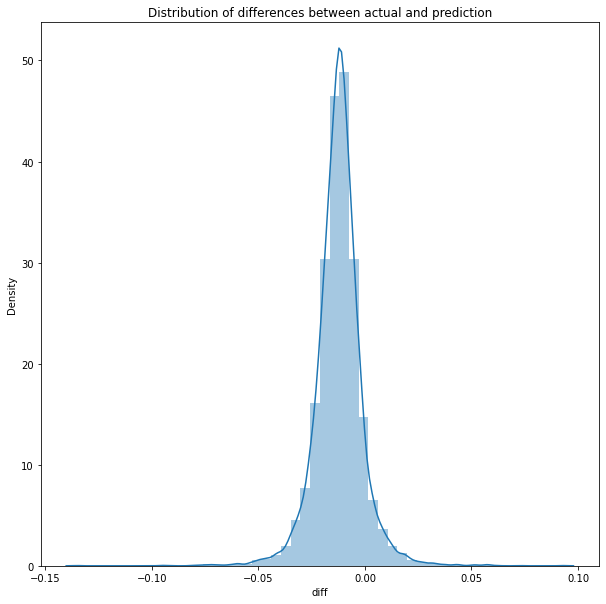

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',r2_scr)


predictions['diff'].describe()

MSE :  0.00027302798641965994
MAE :  0.013759497272917347
RMSE  : 0.016523558527740324
348/348 [==============================] - 2s 5ms/step
R2_Score  : 0.9962323030679511


count    11115.000000
mean        -0.012274
std          0.011063
min         -0.134971
25%         -0.017678
50%         -0.012081
75%         -0.006768
max          0.092702
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75


403/406 [============================>.] - ETA: 0s - loss: 557.6453 - mae: 7.5004 - mse: 557.6453 - root_mean_squared_error: 23.6145 - mape: 36314.1680
Epoch 1: val_mse improved from inf to 0.42405, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 21s 37ms/step - loss: 553.6357 - mae: 7.4519 - mse: 553.6357 - root_mean_squared_error: 23.5295 - mape: 36056.3984 - val_loss: 0.4241 - val_mae: 0.6215 - val_mse: 0.4241 - val_root_mean_squared_error: 0.6512 - val_mape: 95326.9141
Epoch 2/75
401/406 [============================>.] - ETA: 0s - loss: 0.2228 - mae: 0.4130 - mse: 0.2228 - root_mean_squared_error: 0.4721 - mape: 13047.0508
Epoch 2: val_mse improved from 0.42405 to 0.04705, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.2212 - mae: 0.4111 - mse: 0.2212 - root_mean_squared_error: 0.4703 - mape: 12891.4951 - val_loss: 0.0471 - val_mae: 0.1797 - val_mse: 0.0471 - val_root_mean_squared_error: 0.2169 - val_mape: 47834.9766
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0627 - mae: 0.2145 - mse: 0.0627 - root_mean_squared_error: 0.2504 - mape: 10121.2725
Epoch 3: val_mse improved from 0.04705 to 0.03717, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0627 - mae: 0.2145 - mse: 0.0627 - root_mean_squared_error: 0.2503 - mape: 10098.5840 - val_loss: 0.0372 - val_mae: 0.1603 - val_mse: 0.0372 - val_root_mean_squared_error: 0.1928 - val_mape: 36879.6055
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0457 - mae: 0.1805 - mse: 0.0457 - root_mean_squared_error: 0.2137 - mape: 8240.8115
Epoch 4: val_mse did not improve from 0.03717
406/406 [==============================] - 5s 13ms/step - loss: 0.0457 - mae: 0.1805 - mse: 0.0457 - root_mean_squared_error: 0.2137 - mape: 8240.8115 - val_loss: 0.0412 - val_mae: 0.1671 - val_mse: 0.0412 - val_root_mean_squared_error: 0.2029 - val_mape: 32532.5059
Epoch 5/75
403/406 [============================>.] - ETA: 0s - loss: 0.0427 - mae: 0.1723 - mse: 0.0427 - root_mean_squared_error: 0.2067 - mape: 6863.8892
Epoch 5: val_mse did not improve from 0.03717
406/406 [==============================] - 7s 18ms/step - 

406/406 [==============================] - 14s 34ms/step - loss: 0.0314 - mae: 0.1442 - mse: 0.0314 - root_mean_squared_error: 0.1772 - mape: 6818.3472 - val_loss: 0.0144 - val_mae: 0.0931 - val_mse: 0.0144 - val_root_mean_squared_error: 0.1199 - val_mape: 24969.1738
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 0.0098 - mae: 0.0714 - mse: 0.0098 - root_mean_squared_error: 0.0988 - mape: 4890.9570
Epoch 20: val_mse improved from 0.01438 to 0.00206, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0097 - mae: 0.0713 - mse: 0.0097 - root_mean_squared_error: 0.0987 - mape: 4879.9302 - val_loss: 0.0021 - val_mae: 0.0359 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0454 - val_mape: 16160.5469
Epoch 21/75
405/406 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0370 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 3079.5405
Epoch 21: val_mse improved from 0.00206 to 0.00146, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0027 - mae: 0.0370 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 3072.5771 - val_loss: 0.0015 - val_mae: 0.0299 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 12841.7275
Epoch 22/75
402/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0309 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 2653.0042
Epoch 22: val_mse did not improve from 0.00146
406/406 [==============================] - 4s 11ms/step - loss: 0.0019 - mae: 0.0309 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 2627.5999 - val_loss: 0.0020 - val_mae: 0.0355 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 11181.7920
Epoch 23/75
403/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0271 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 2332.6362
Epoch 23: val_mse improved from 0.00146 to 0.00130, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 14s 36ms/step - loss: 0.0014 - mae: 0.0271 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 2316.0315 - val_loss: 0.0013 - val_mae: 0.0276 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 9849.5674
Epoch 24/75
401/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0245 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 2196.6836
Epoch 24: val_mse did not improve from 0.00130
406/406 [==============================] - 4s 11ms/step - loss: 0.0012 - mae: 0.0245 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 2170.2910 - val_loss: 0.0014 - val_mae: 0.0293 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 9006.6104
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 9.8649e-04 - mae: 0.0228 - mse: 9.8649e-04 - root_mean_squared_error: 0.0314 - mape: 1845.8494
Epoch 25: val_mse did not improve from 0.00130
406/406 [==============================] - 4s 11m

406/406 [==============================] - 14s 35ms/step - loss: 6.5130e-04 - mae: 0.0189 - mse: 6.5130e-04 - root_mean_squared_error: 0.0255 - mape: 1519.7542 - val_loss: 0.0012 - val_mae: 0.0263 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 6614.2637
Epoch 29/75
401/406 [============================>.] - ETA: 0s - loss: 5.7735e-04 - mae: 0.0179 - mse: 5.7735e-04 - root_mean_squared_error: 0.0240 - mape: 1825.8737
Epoch 29: val_mse improved from 0.00121 to 0.00119, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 5.7705e-04 - mae: 0.0179 - mse: 5.7705e-04 - root_mean_squared_error: 0.0240 - mape: 1803.8390 - val_loss: 0.0012 - val_mae: 0.0258 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 6159.5845
Epoch 30/75
401/406 [============================>.] - ETA: 0s - loss: 5.1297e-04 - mae: 0.0170 - mse: 5.1297e-04 - root_mean_squared_error: 0.0226 - mape: 1324.8783
Epoch 30: val_mse did not improve from 0.00119
406/406 [==============================] - 5s 13ms/step - loss: 5.1224e-04 - mae: 0.0170 - mse: 5.1224e-04 - root_mean_squared_error: 0.0226 - mape: 1308.9456 - val_loss: 0.0012 - val_mae: 0.0259 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 5915.6709
Epoch 31/75
405/406 [============================>.] - ETA: 0s - loss: 4.7233e-04 - mae: 0.0163 - mse: 4.7233e-04 - root_mean_squared_error: 0.0217 - mape: 1259.5073
Epoch 31: val_mse did not improve from 0.00119
406/406 [================

406/406 [==============================] - 14s 35ms/step - loss: 4.1086e-04 - mae: 0.0152 - mse: 4.1086e-04 - root_mean_squared_error: 0.0203 - mape: 1157.9323 - val_loss: 0.0012 - val_mae: 0.0251 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 5081.3604
Epoch 34/75
402/406 [============================>.] - ETA: 0s - loss: 3.7436e-04 - mae: 0.0146 - mse: 3.7436e-04 - root_mean_squared_error: 0.0193 - mape: 1154.2292
Epoch 34: val_mse did not improve from 0.00116
406/406 [==============================] - 4s 11ms/step - loss: 3.7477e-04 - mae: 0.0146 - mse: 3.7477e-04 - root_mean_squared_error: 0.0194 - mape: 1143.1985 - val_loss: 0.0013 - val_mae: 0.0270 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 4679.1802
Epoch 35/75
403/406 [============================>.] - ETA: 0s - loss: 3.4687e-04 - mae: 0.0140 - mse: 3.4687e-04 - root_mean_squared_error: 0.0186 - mape: 965.7147
Epoch 35: val_mse did not improve from 0.00116
406/406 [=================

406/406 [==============================] - 14s 35ms/step - loss: 3.2431e-04 - mae: 0.0135 - mse: 3.2431e-04 - root_mean_squared_error: 0.0180 - mape: 984.5784 - val_loss: 0.0011 - val_mae: 0.0250 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0338 - val_mape: 4522.0884
Epoch 37/75
405/406 [============================>.] - ETA: 0s - loss: 3.1271e-04 - mae: 0.0134 - mse: 3.1271e-04 - root_mean_squared_error: 0.0177 - mape: 956.2744
Epoch 37: val_mse did not improve from 0.00115
406/406 [==============================] - 4s 11ms/step - loss: 3.1274e-04 - mae: 0.0134 - mse: 3.1274e-04 - root_mean_squared_error: 0.0177 - mape: 954.1133 - val_loss: 0.0012 - val_mae: 0.0260 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0343 - val_mape: 4768.0288
Epoch 38/75
402/406 [============================>.] - ETA: 0s - loss: 2.9940e-04 - mae: 0.0131 - mse: 2.9940e-04 - root_mean_squared_error: 0.0173 - mape: 960.2146
Epoch 38: val_mse did not improve from 0.00115
406/406 [====================

406/406 [==============================] - 14s 34ms/step - loss: 2.5378e-04 - mae: 0.0120 - mse: 2.5378e-04 - root_mean_squared_error: 0.0159 - mape: 726.7126 - val_loss: 0.0011 - val_mae: 0.0246 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 4762.7002
Epoch 44/75
401/406 [============================>.] - ETA: 0s - loss: 2.4747e-04 - mae: 0.0119 - mse: 2.4747e-04 - root_mean_squared_error: 0.0157 - mape: 753.6278
Epoch 44: val_mse did not improve from 0.00111
406/406 [==============================] - 4s 11ms/step - loss: 2.4701e-04 - mae: 0.0118 - mse: 2.4701e-04 - root_mean_squared_error: 0.0157 - mape: 744.5430 - val_loss: 0.0012 - val_mae: 0.0252 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 4631.2422
Epoch 45/75
404/406 [============================>.] - ETA: 0s - loss: 2.3988e-04 - mae: 0.0116 - mse: 2.3988e-04 - root_mean_squared_error: 0.0155 - mape: 688.2272
Epoch 45: val_mse did not improve from 0.00111
406/406 [====================

406/406 [==============================] - 15s 36ms/step - loss: 2.2215e-04 - mae: 0.0112 - mse: 2.2215e-04 - root_mean_squared_error: 0.0149 - mape: 707.9877 - val_loss: 0.0011 - val_mae: 0.0247 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 4767.8828
Epoch 47/75
402/406 [============================>.] - ETA: 0s - loss: 2.2048e-04 - mae: 0.0112 - mse: 2.2048e-04 - root_mean_squared_error: 0.0148 - mape: 720.4420
Epoch 47: val_mse did not improve from 0.00110
406/406 [==============================] - 4s 11ms/step - loss: 2.2096e-04 - mae: 0.0112 - mse: 2.2096e-04 - root_mean_squared_error: 0.0149 - mape: 713.5375 - val_loss: 0.0011 - val_mae: 0.0248 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 3670.4465
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 2.5410e-04 - mae: 0.0120 - mse: 2.5410e-04 - root_mean_squared_error: 0.0159 - mape: 657.8789
Epoch 48: val_mse did not improve from 0.00110
406/406 [====================

406/406 [==============================] - 14s 35ms/step - loss: 1.8847e-04 - mae: 0.0103 - mse: 1.8847e-04 - root_mean_squared_error: 0.0137 - mape: 571.3428 - val_loss: 0.0010 - val_mae: 0.0238 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 4632.2300
Epoch 55/75
404/406 [============================>.] - ETA: 0s - loss: 1.8938e-04 - mae: 0.0103 - mse: 1.8938e-04 - root_mean_squared_error: 0.0138 - mape: 675.2639
Epoch 55: val_mse improved from 0.00104 to 0.00102, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 1.8916e-04 - mae: 0.0103 - mse: 1.8916e-04 - root_mean_squared_error: 0.0138 - mape: 672.0850 - val_loss: 0.0010 - val_mae: 0.0238 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 4702.9961
Epoch 56/75
403/406 [============================>.] - ETA: 0s - loss: 1.9827e-04 - mae: 0.0106 - mse: 1.9827e-04 - root_mean_squared_error: 0.0141 - mape: 615.2596
Epoch 56: val_mse did not improve from 0.00102
406/406 [==============================] - 4s 11ms/step - loss: 1.9845e-04 - mae: 0.0106 - mse: 1.9845e-04 - root_mean_squared_error: 0.0141 - mape: 610.8629 - val_loss: 0.0014 - val_mae: 0.0280 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 4084.2578
Epoch 57/75
403/406 [============================>.] - ETA: 0s - loss: 1.7720e-04 - mae: 0.0100 - mse: 1.7720e-04 - root_mean_squared_error: 0.0133 - mape: 561.3911
Epoch 57: val_mse did not improve from 0.00102
406/406 [====================

406/406 [==============================] - 14s 35ms/step - loss: 1.7212e-04 - mae: 0.0099 - mse: 1.7212e-04 - root_mean_squared_error: 0.0131 - mape: 536.8057 - val_loss: 9.8101e-04 - val_mae: 0.0231 - val_mse: 9.8101e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 4941.2891
Epoch 59/75
406/406 [==============================] - ETA: 0s - loss: 1.7736e-04 - mae: 0.0100 - mse: 1.7736e-04 - root_mean_squared_error: 0.0133 - mape: 618.1520
Epoch 59: val_mse did not improve from 0.00098
406/406 [==============================] - 4s 11ms/step - loss: 1.7736e-04 - mae: 0.0100 - mse: 1.7736e-04 - root_mean_squared_error: 0.0133 - mape: 618.1520 - val_loss: 0.0011 - val_mae: 0.0245 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 3735.5212
Epoch 60/75
406/406 [==============================] - ETA: 0s - loss: 1.7097e-04 - mae: 0.0098 - mse: 1.7097e-04 - root_mean_squared_error: 0.0131 - mape: 533.3907
Epoch 60: val_mse did not improve from 0.00098
406/406 [============

406/406 [==============================] - 14s 36ms/step - loss: 1.5841e-04 - mae: 0.0094 - mse: 1.5841e-04 - root_mean_squared_error: 0.0126 - mape: 510.4740 - val_loss: 9.4968e-04 - val_mae: 0.0227 - val_mse: 9.4968e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 4524.0962
Epoch 62/75
401/406 [============================>.] - ETA: 0s - loss: 1.4584e-04 - mae: 0.0091 - mse: 1.4584e-04 - root_mean_squared_error: 0.0121 - mape: 541.3448
Epoch 62: val_mse improved from 0.00095 to 0.00086, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 1.4594e-04 - mae: 0.0091 - mse: 1.4594e-04 - root_mean_squared_error: 0.0121 - mape: 534.8286 - val_loss: 8.5714e-04 - val_mae: 0.0220 - val_mse: 8.5714e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 4862.7637
Epoch 63/75
402/406 [============================>.] - ETA: 0s - loss: 1.4902e-04 - mae: 0.0092 - mse: 1.4902e-04 - root_mean_squared_error: 0.0122 - mape: 528.8289
Epoch 63: val_mse improved from 0.00086 to 0.00083, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 1.4974e-04 - mae: 0.0092 - mse: 1.4974e-04 - root_mean_squared_error: 0.0122 - mape: 523.7805 - val_loss: 8.2899e-04 - val_mae: 0.0213 - val_mse: 8.2899e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 4201.7090
Epoch 64/75
404/406 [============================>.] - ETA: 0s - loss: 1.4487e-04 - mae: 0.0091 - mse: 1.4487e-04 - root_mean_squared_error: 0.0120 - mape: 532.1389
Epoch 64: val_mse did not improve from 0.00083
406/406 [==============================] - 5s 11ms/step - loss: 1.4500e-04 - mae: 0.0091 - mse: 1.4500e-04 - root_mean_squared_error: 0.0120 - mape: 529.6389 - val_loss: 8.4650e-04 - val_mae: 0.0215 - val_mse: 8.4650e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 4582.5093
Epoch 65/75
403/406 [============================>.] - ETA: 0s - loss: 1.3837e-04 - mae: 0.0089 - mse: 1.3837e-04 - root_mean_squared_error: 0.0118 - mape: 517.5433
Epoch 65: val_mse did not improve from 0.00083
406/406 [====

406/406 [==============================] - 14s 35ms/step - loss: 1.2158e-04 - mae: 0.0084 - mse: 1.2158e-04 - root_mean_squared_error: 0.0110 - mape: 435.1832 - val_loss: 7.6907e-04 - val_mae: 0.0208 - val_mse: 7.6907e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 4156.7651
Epoch 68/75
403/406 [============================>.] - ETA: 0s - loss: 1.0335e-04 - mae: 0.0077 - mse: 1.0335e-04 - root_mean_squared_error: 0.0102 - mape: 466.2915
Epoch 68: val_mse improved from 0.00077 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 1.0309e-04 - mae: 0.0077 - mse: 1.0309e-04 - root_mean_squared_error: 0.0102 - mape: 462.9537 - val_loss: 6.2415e-04 - val_mae: 0.0186 - val_mse: 6.2415e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 4191.7734
Epoch 69/75
406/406 [==============================] - ETA: 0s - loss: 1.0408e-04 - mae: 0.0077 - mse: 1.0408e-04 - root_mean_squared_error: 0.0102 - mape: 457.0745
Epoch 69: val_mse improved from 0.00062 to 0.00052, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 1.0408e-04 - mae: 0.0077 - mse: 1.0408e-04 - root_mean_squared_error: 0.0102 - mape: 457.0745 - val_loss: 5.1801e-04 - val_mae: 0.0166 - val_mse: 5.1801e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 3990.1433
Epoch 70/75
402/406 [============================>.] - ETA: 0s - loss: 9.5206e-05 - mae: 0.0074 - mse: 9.5206e-05 - root_mean_squared_error: 0.0098 - mape: 431.0650
Epoch 70: val_mse did not improve from 0.00052
406/406 [==============================] - 5s 11ms/step - loss: 9.4903e-05 - mae: 0.0074 - mse: 9.4903e-05 - root_mean_squared_error: 0.0097 - mape: 426.9295 - val_loss: 6.0210e-04 - val_mae: 0.0186 - val_mse: 6.0210e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 4567.5425
Epoch 71/75
404/406 [============================>.] - ETA: 0s - loss: 9.3064e-05 - mae: 0.0073 - mse: 9.3064e-05 - root_mean_squared_error: 0.0096 - mape: 512.0515
Epoch 71: val_mse did not improve from 0.00052
406/406 [====

406/406 [==============================] - 14s 35ms/step - loss: 7.3650e-05 - mae: 0.0065 - mse: 7.3650e-05 - root_mean_squared_error: 0.0086 - mape: 414.1400 - val_loss: 4.8637e-04 - val_mae: 0.0168 - val_mse: 4.8637e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 4364.3882
Epoch 75/75
405/406 [============================>.] - ETA: 0s - loss: 6.4849e-05 - mae: 0.0061 - mse: 6.4849e-05 - root_mean_squared_error: 0.0081 - mape: 404.3760
Epoch 75: val_mse did not improve from 0.00049
406/406 [==============================] - 4s 11ms/step - loss: 6.4876e-05 - mae: 0.0061 - mse: 6.4876e-05 - root_mean_squared_error: 0.0081 - mape: 403.4657 - val_loss: 6.6814e-04 - val_mae: 0.0217 - val_mse: 6.6814e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 3814.6870


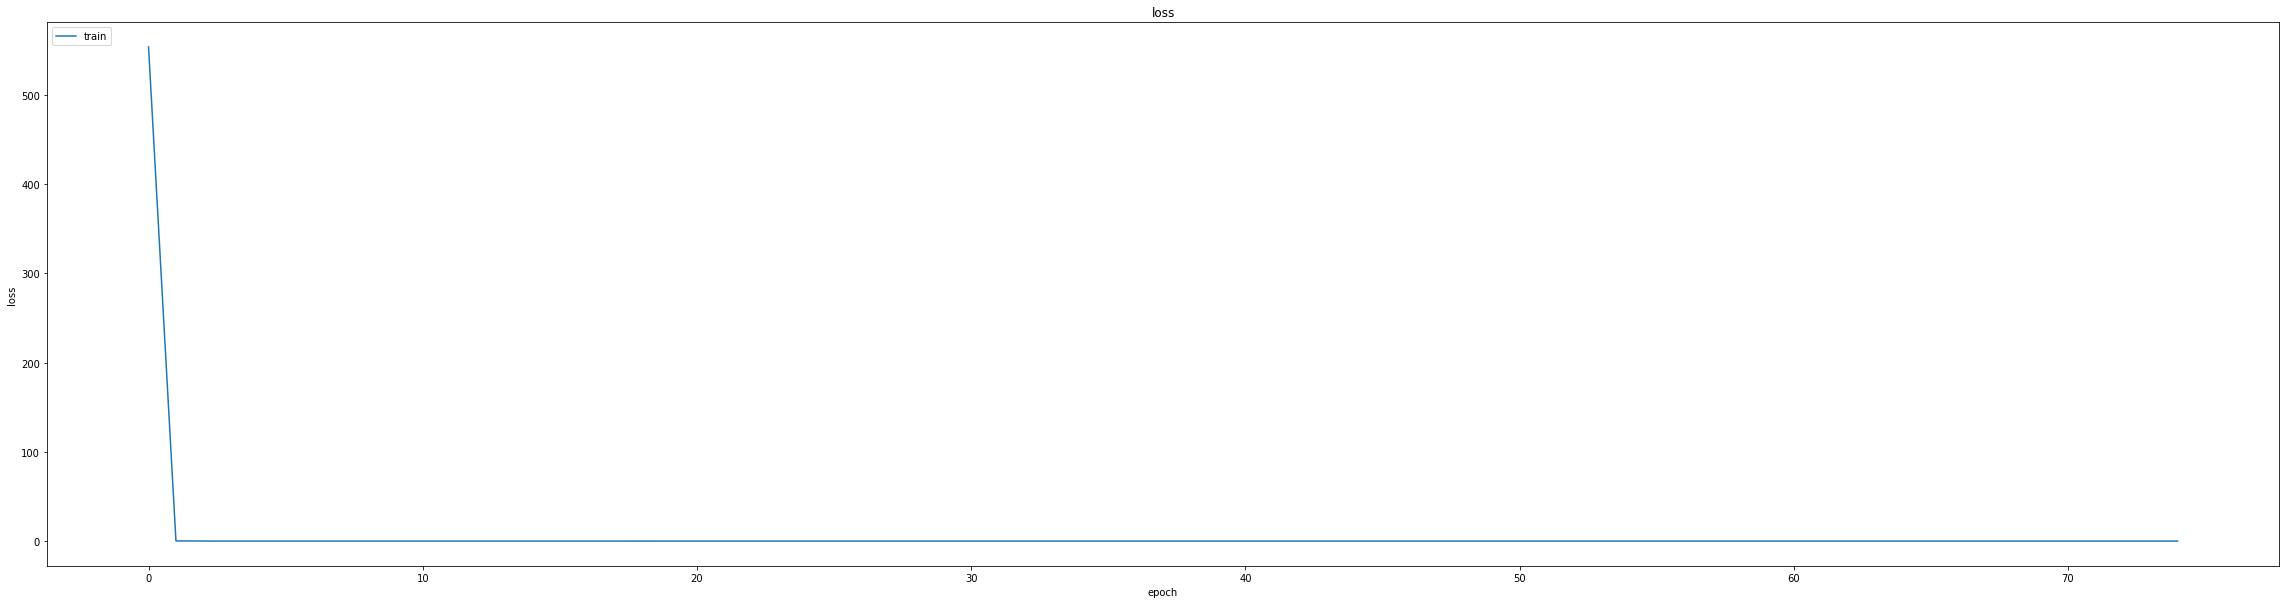

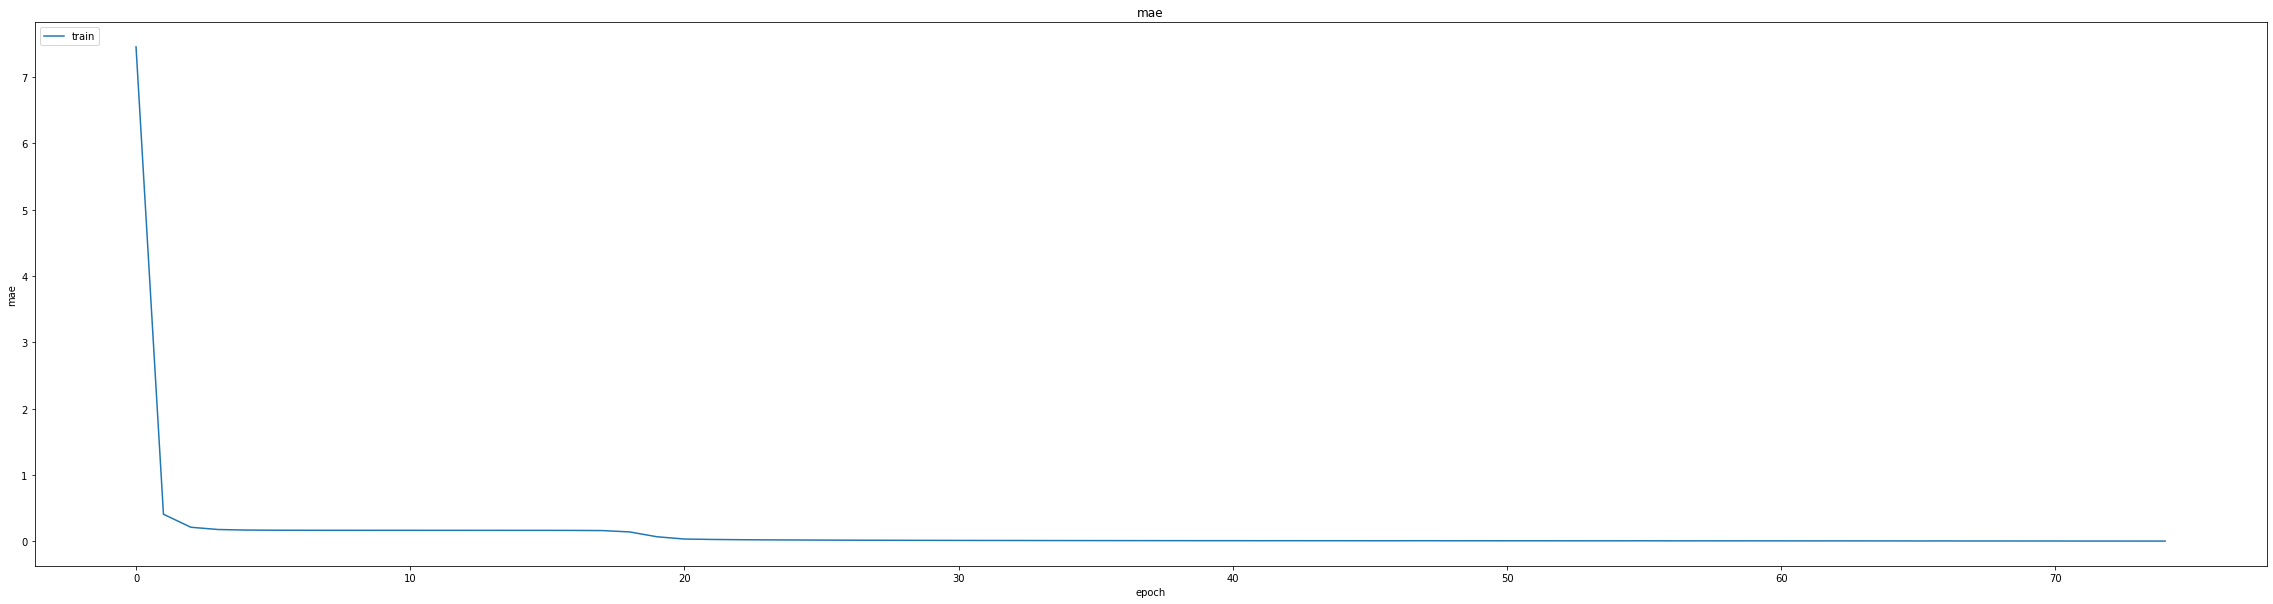

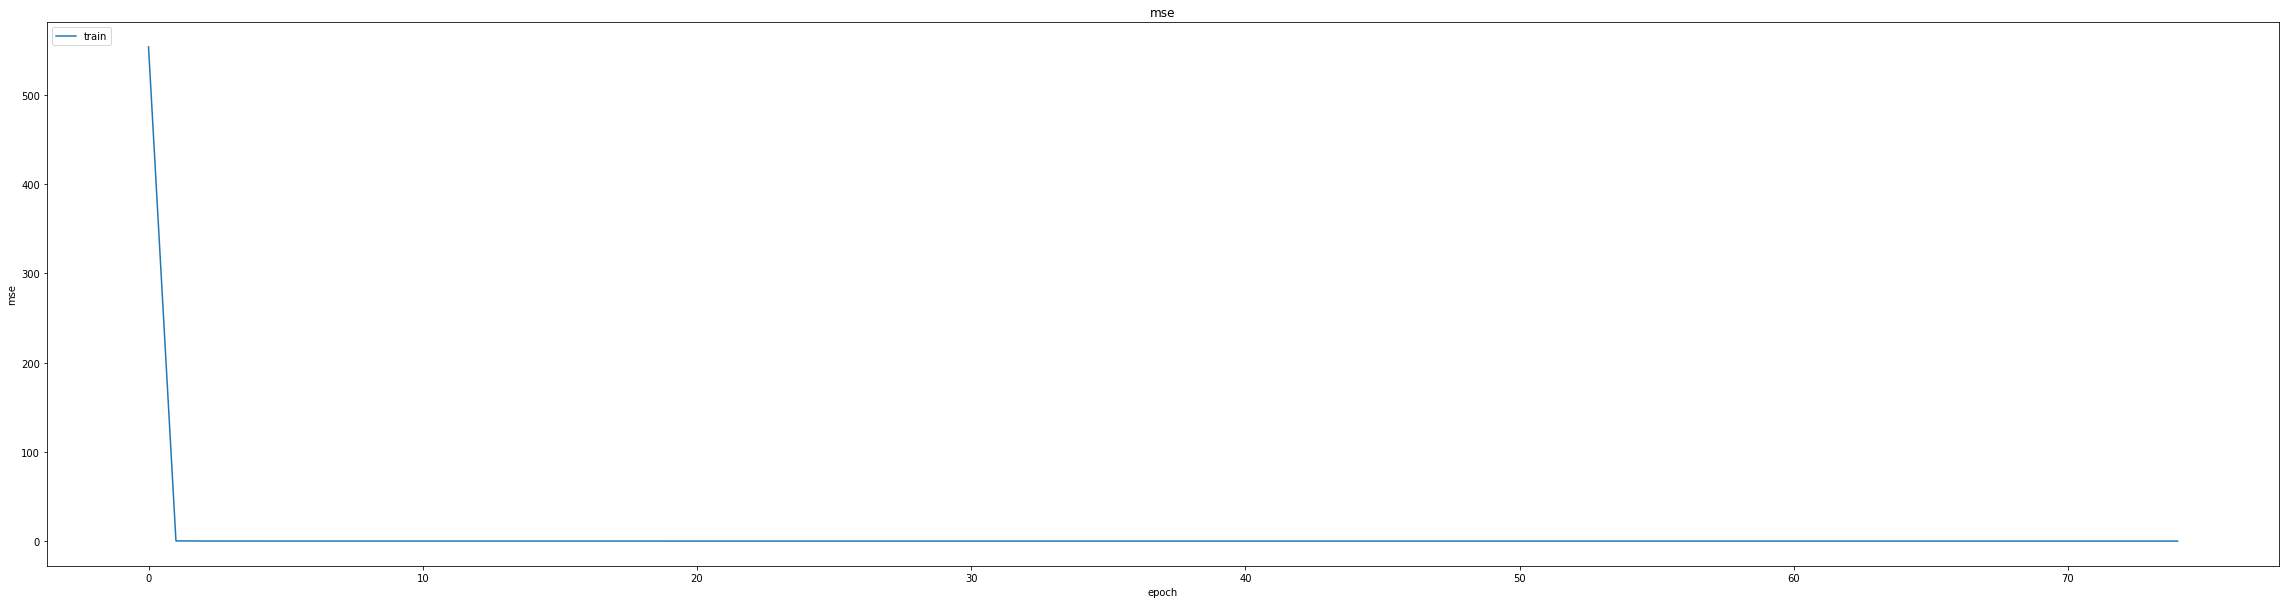

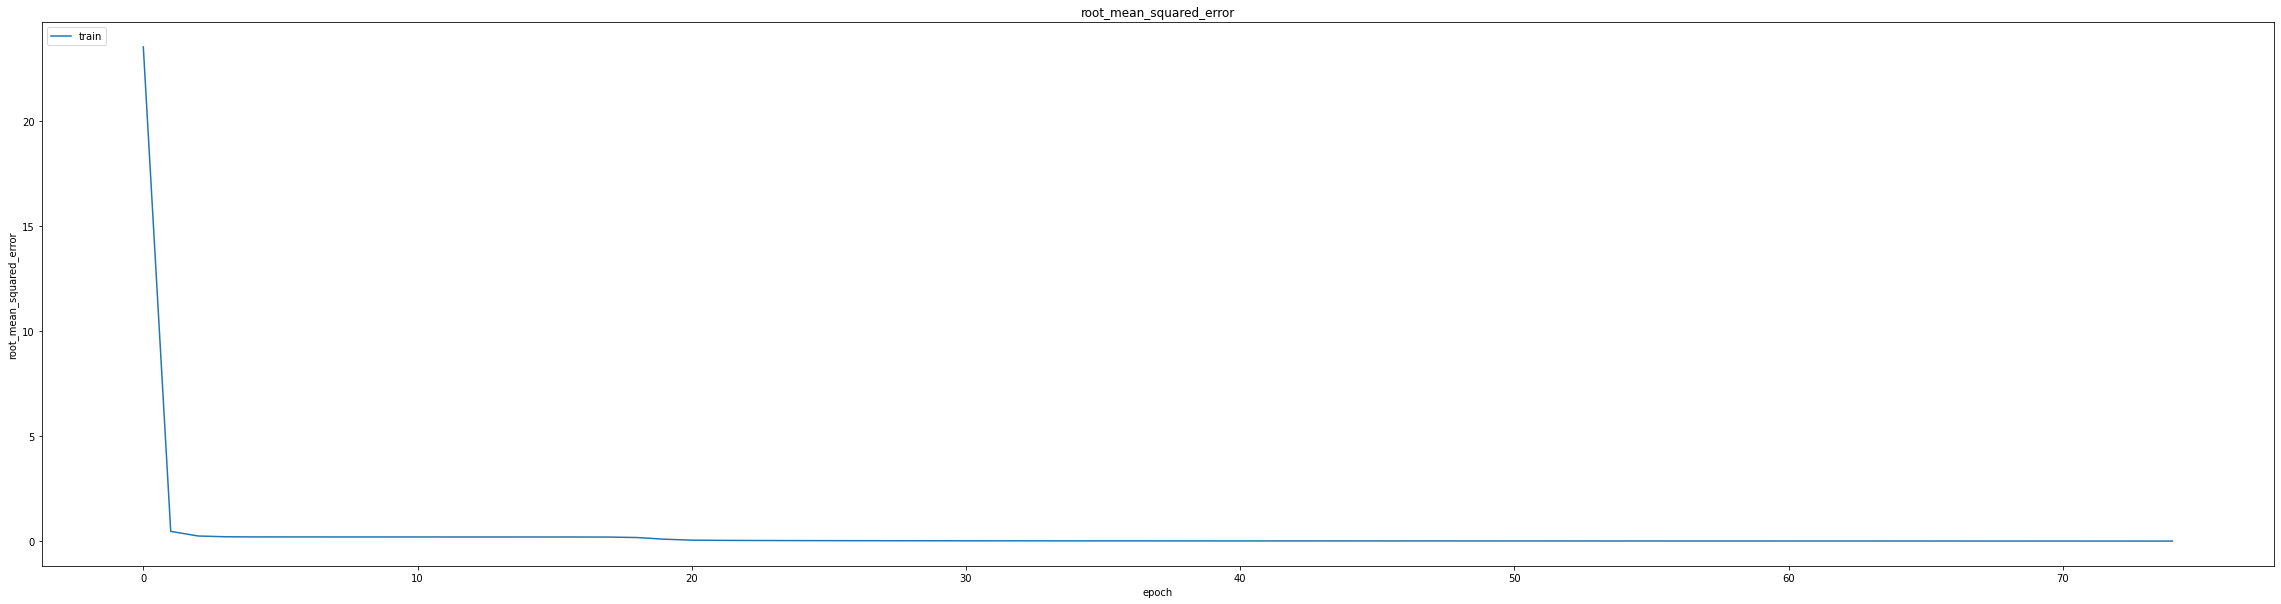

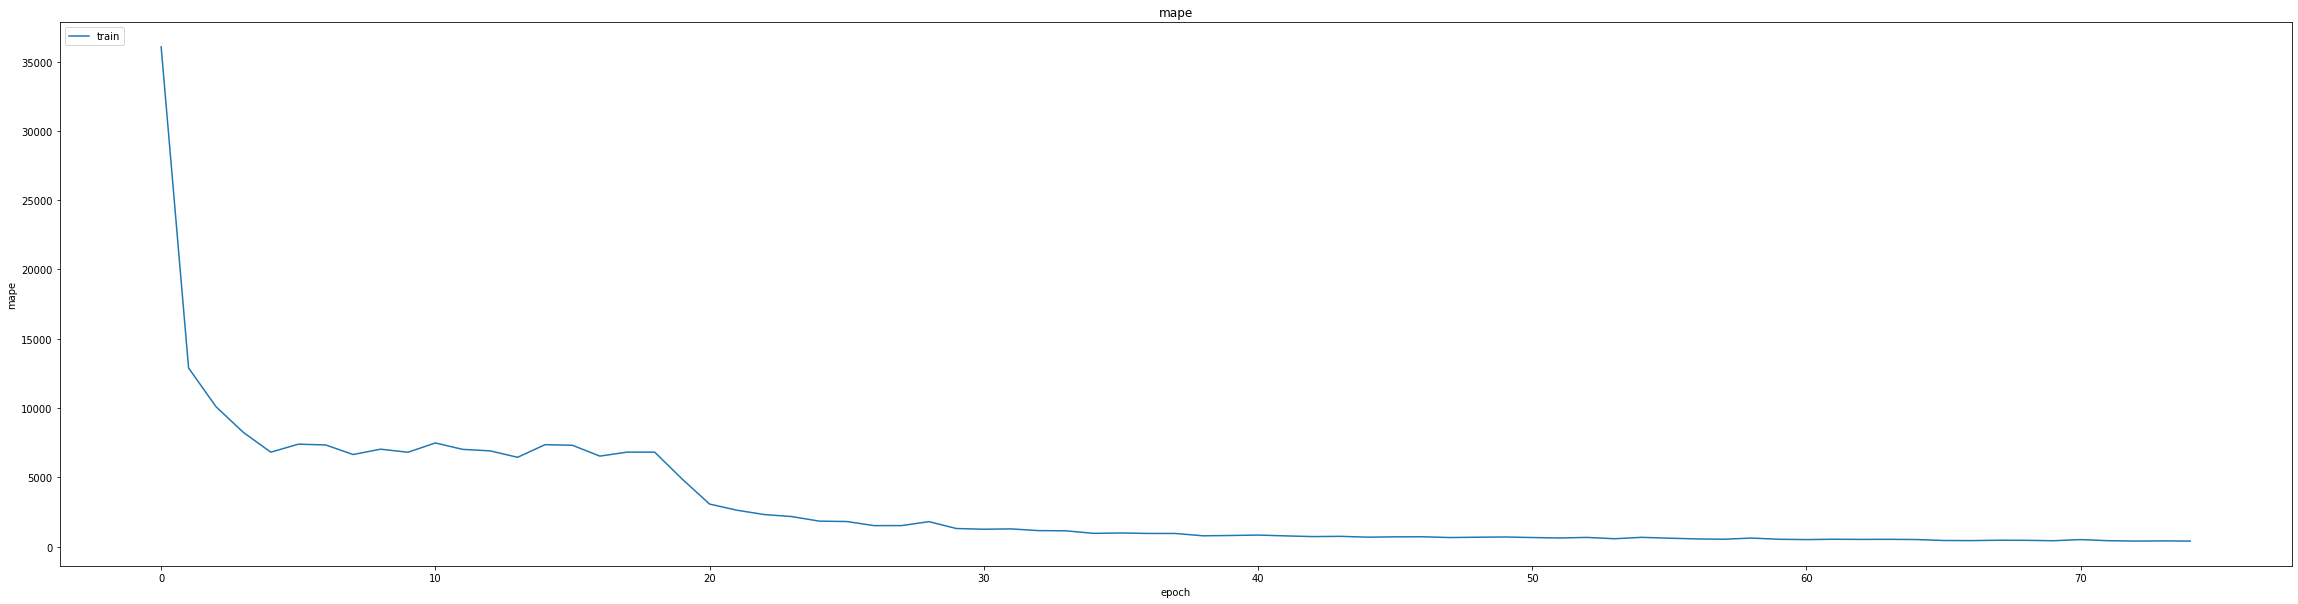

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.016579821705818176
0.016579821705818176
0.022053813561797142
348/348 [==============================] - 2s 4ms/step
0.9815150411528356


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
402/406 [============================>.] - ETA: 0s - loss: 1.4479e-04 - mae: 0.0069 - mse: 1.4479e-04 - root_mean_squared_error: 0.0120 - mape: 391.6932
Epoch 1: val_mse did not improve from 0.00049
406/406 [==============================] - 9s 13ms/step - loss: 1.4390e-04 - mae: 0.0068 - mse: 1.4390e-04 - root_mean_squared_error: 0.0120 - mape: 387.9394 - val_loss: 5.6235e-04 - val_mae: 0.0194 - val_mse: 5.6235e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 3974.3499 - lr: 0.0010
Epoch 2/25
402/406 [============================>.] - ETA: 0s - loss: 4.8626e-05 - mae: 0.0053 - mse: 4.8626e-05 - root_mean_squared_error: 0.0070 - mape: 353.9190
Epoch 2: val_mse improved from 0.00049 to 0.00048, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 4.8826e-05 - mae: 0.0053 - mse: 4.8826e-05 - root_mean_squared_error: 0.0070 - mape: 350.5274 - val_loss: 4.7811e-04 - val_mae: 0.0174 - val_mse: 4.7811e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 3353.5271 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
404/406 [============================>.] - ETA: 0s - loss: 5.2942e-05 - mae: 0.0056 - mse: 5.2942e-05 - root_mean_squared_error: 0.0073 - mape: 371.8539
Epoch 3: val_mse did not improve from 0.00048
406/406 [==============================] - 4s 11ms/step - loss: 5.2969e-05 - mae: 0.0056 - mse: 5.2969e-05 - root_mean_squared_error: 0.0073 - mape: 370.1045 - val_loss: 8.8664e-04 - val_mae: 0.0262 - val_mse: 8.8664e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 2976.0100 - lr: 9.0000e-04
Epoch 4/25
402/406 [============================>.] - ETA: 0s - loss: 5.5009e-05 - mae: 0.0056 - mse: 5.5009e-05 - root_mean_squared_error: 0.0074 - mape: 354.27

406/406 [==============================] - 15s 38ms/step - loss: 4.7834e-05 - mae: 0.0053 - mse: 4.7834e-05 - root_mean_squared_error: 0.0069 - mape: 316.2753 - val_loss: 4.7804e-04 - val_mae: 0.0183 - val_mse: 4.7804e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 2871.9719 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
405/406 [============================>.] - ETA: 0s - loss: 3.8395e-05 - mae: 0.0047 - mse: 3.8395e-05 - root_mean_squared_error: 0.0062 - mape: 384.7003
Epoch 7: val_mse improved from 0.00048 to 0.00048, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 3.8352e-05 - mae: 0.0047 - mse: 3.8352e-05 - root_mean_squared_error: 0.0062 - mape: 383.8308 - val_loss: 4.7684e-04 - val_mae: 0.0189 - val_mse: 4.7684e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 2330.1487 - lr: 7.2900e-04
Epoch 8/25
403/406 [============================>.] - ETA: 0s - loss: 4.1871e-05 - mae: 0.0049 - mse: 4.1871e-05 - root_mean_squared_error: 0.0065 - mape: 295.2115
Epoch 8: val_mse improved from 0.00048 to 0.00042, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.1799e-05 - mae: 0.0049 - mse: 4.1799e-05 - root_mean_squared_error: 0.0065 - mape: 293.0990 - val_loss: 4.1864e-04 - val_mae: 0.0173 - val_mse: 4.1864e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 2020.1586 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
402/406 [============================>.] - ETA: 0s - loss: 3.3913e-05 - mae: 0.0044 - mse: 3.3913e-05 - root_mean_squared_error: 0.0058 - mape: 326.9855
Epoch 9: val_mse improved from 0.00042 to 0.00040, saving model to /content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 3.3969e-05 - mae: 0.0044 - mse: 3.3969e-05 - root_mean_squared_error: 0.0058 - mape: 323.8445 - val_loss: 4.0372e-04 - val_mae: 0.0172 - val_mse: 4.0372e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2162.3164 - lr: 6.5610e-04
Epoch 10/25
406/406 [==============================] - ETA: 0s - loss: 3.4976e-05 - mae: 0.0045 - mse: 3.4976e-05 - root_mean_squared_error: 0.0059 - mape: 271.0566
Epoch 10: val_mse did not improve from 0.00040
406/406 [==============================] - 4s 11ms/step - loss: 3.4976e-05 - mae: 0.0045 - mse: 3.4976e-05 - root_mean_squared_error: 0.0059 - mape: 271.0566 - val_loss: 5.4630e-04 - val_mae: 0.0207 - val_mse: 5.4630e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 1642.6805 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
405/406 [============================>.] - ETA: 0s - loss: 3.0183e-05 - mae: 0.0041 - mse: 3.0183e-05 - root_mean_squared_error: 0.0055 - mape:

406/406 [==============================] - 14s 35ms/step - loss: 3.0187e-05 - mae: 0.0041 - mse: 3.0187e-05 - root_mean_squared_error: 0.0055 - mape: 374.8960 - val_loss: 3.3209e-04 - val_mae: 0.0151 - val_mse: 3.3209e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 2007.7222 - lr: 5.9049e-04
Epoch 12/25
403/406 [============================>.] - ETA: 0s - loss: 3.3208e-05 - mae: 0.0044 - mse: 3.3208e-05 - root_mean_squared_error: 0.0058 - mape: 266.4674
Epoch 12: val_mse did not improve from 0.00033
406/406 [==============================] - 5s 11ms/step - loss: 3.3103e-05 - mae: 0.0044 - mse: 3.3103e-05 - root_mean_squared_error: 0.0058 - mape: 264.5592 - val_loss: 5.3980e-04 - val_mae: 0.0208 - val_mse: 5.3980e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 1708.5294 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
405/406 [============================>.] - ETA: 0s - loss: 2.7982e-05 - mae: 0.0040 - mse: 2.7982e-05 - root_mean_squared_error: 0.0053 - mape:

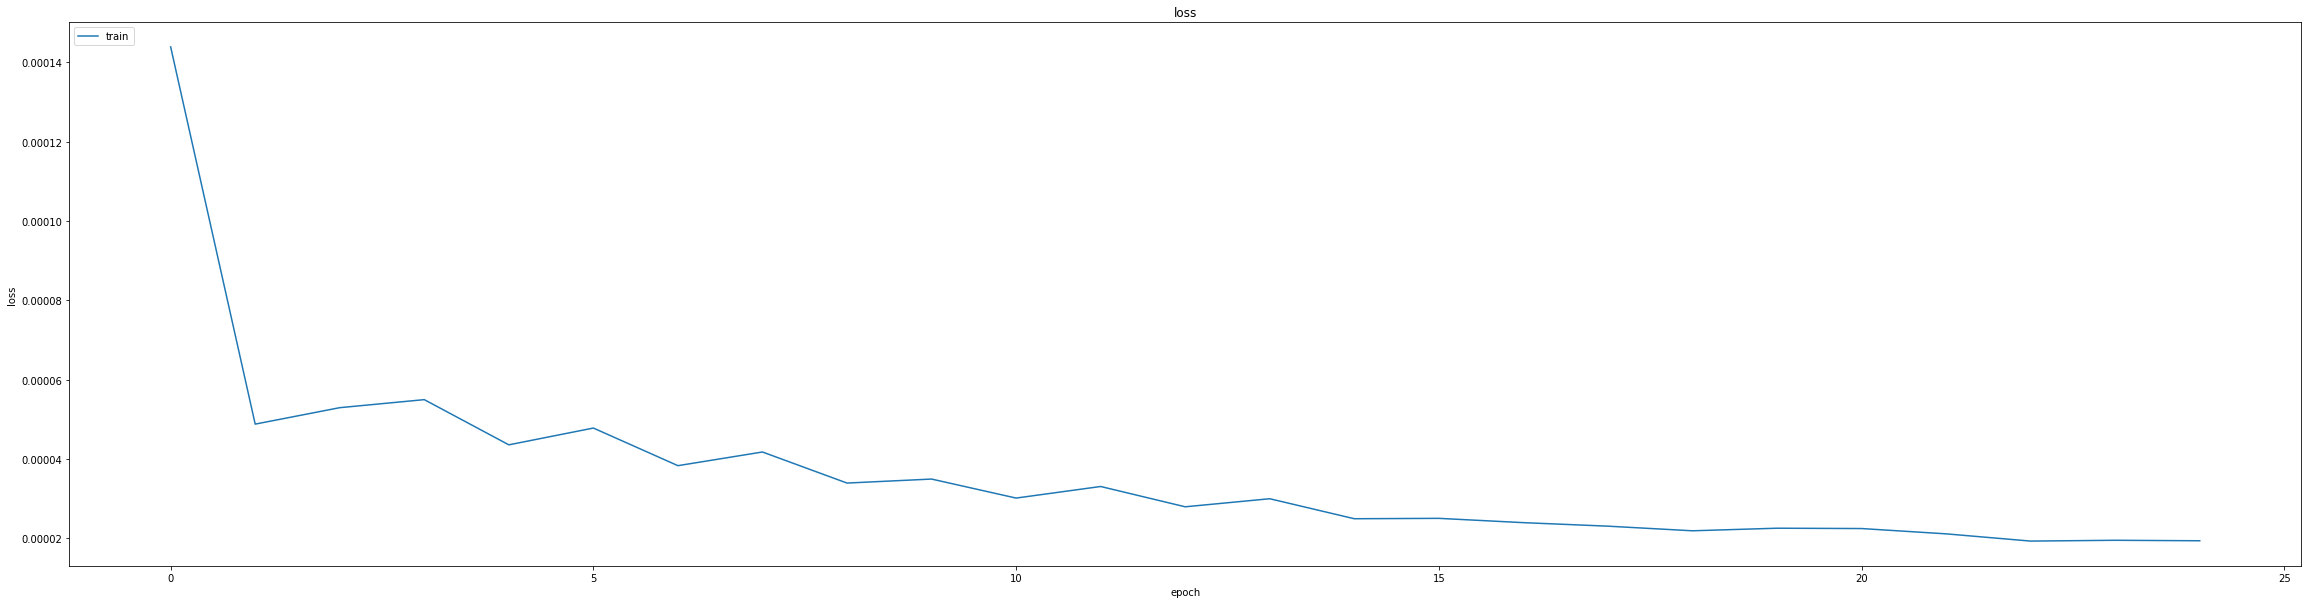

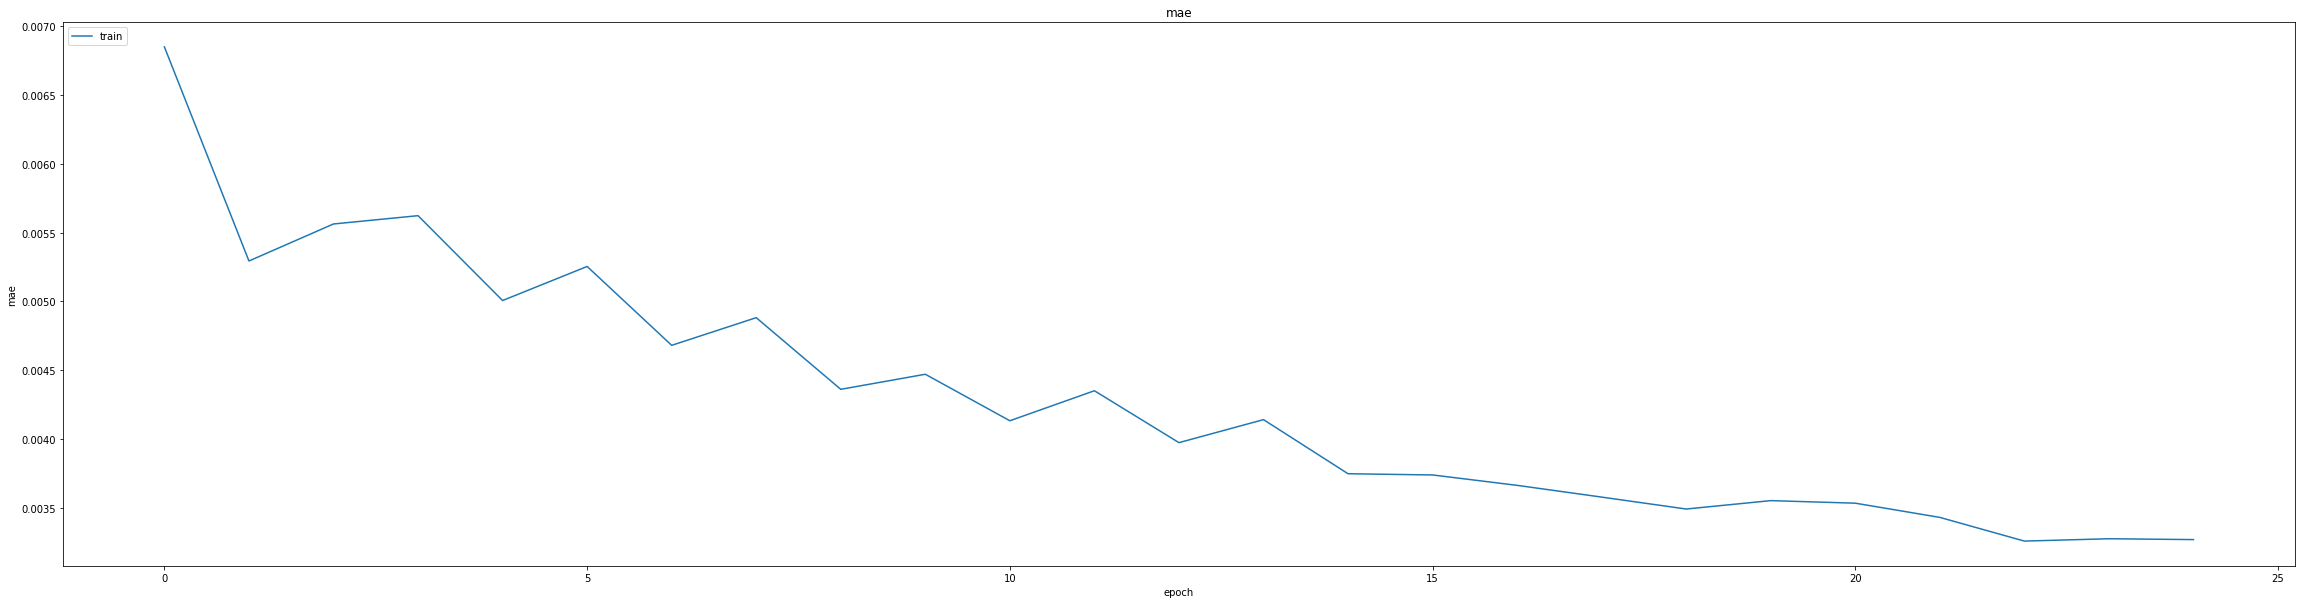

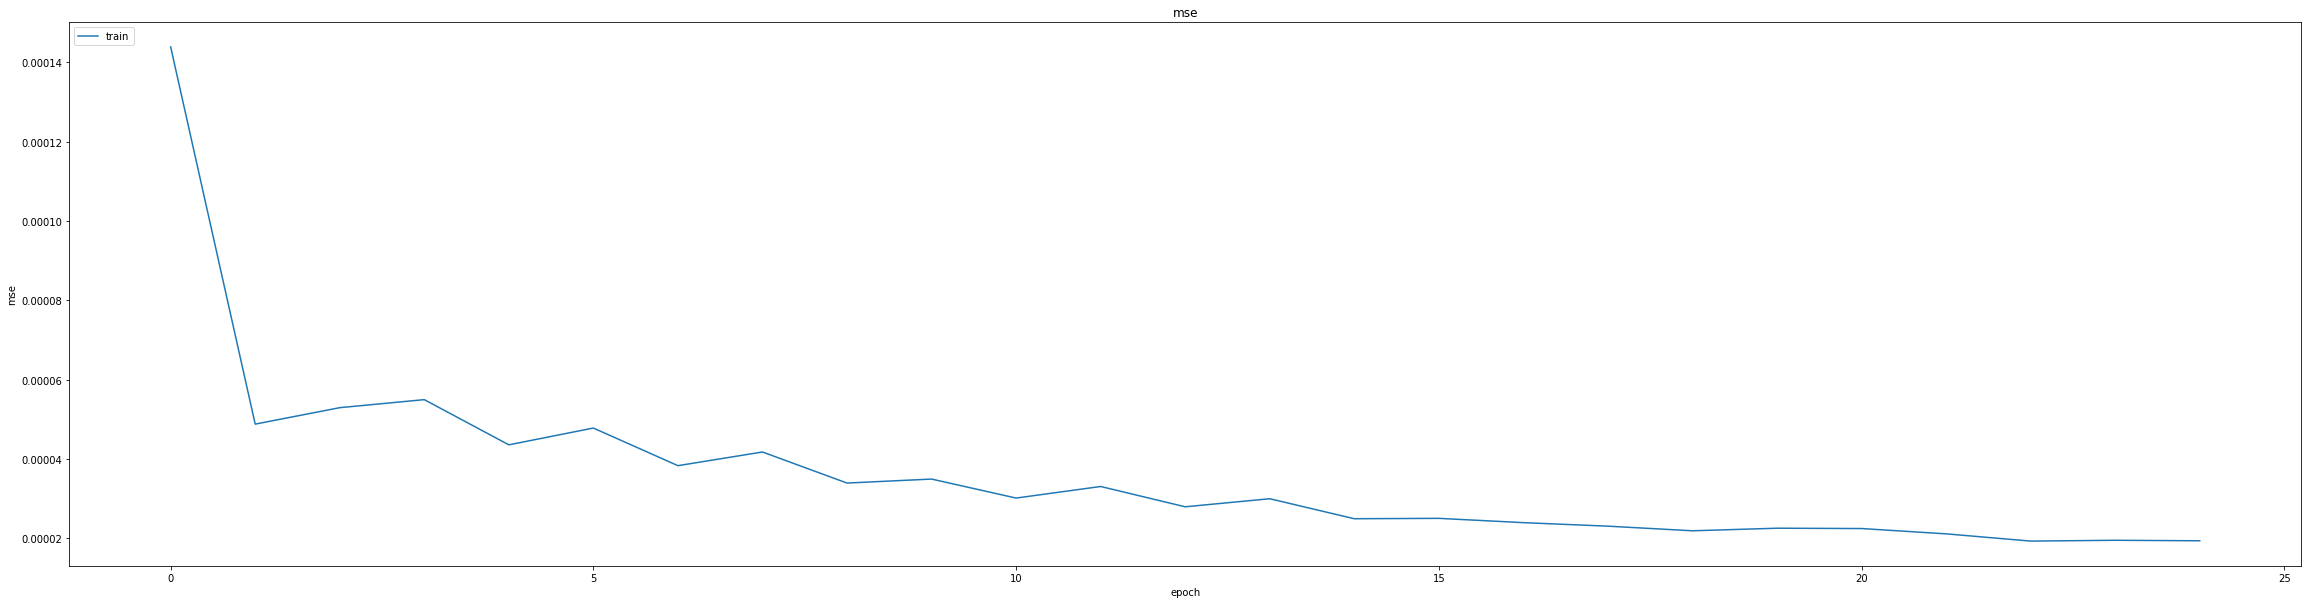

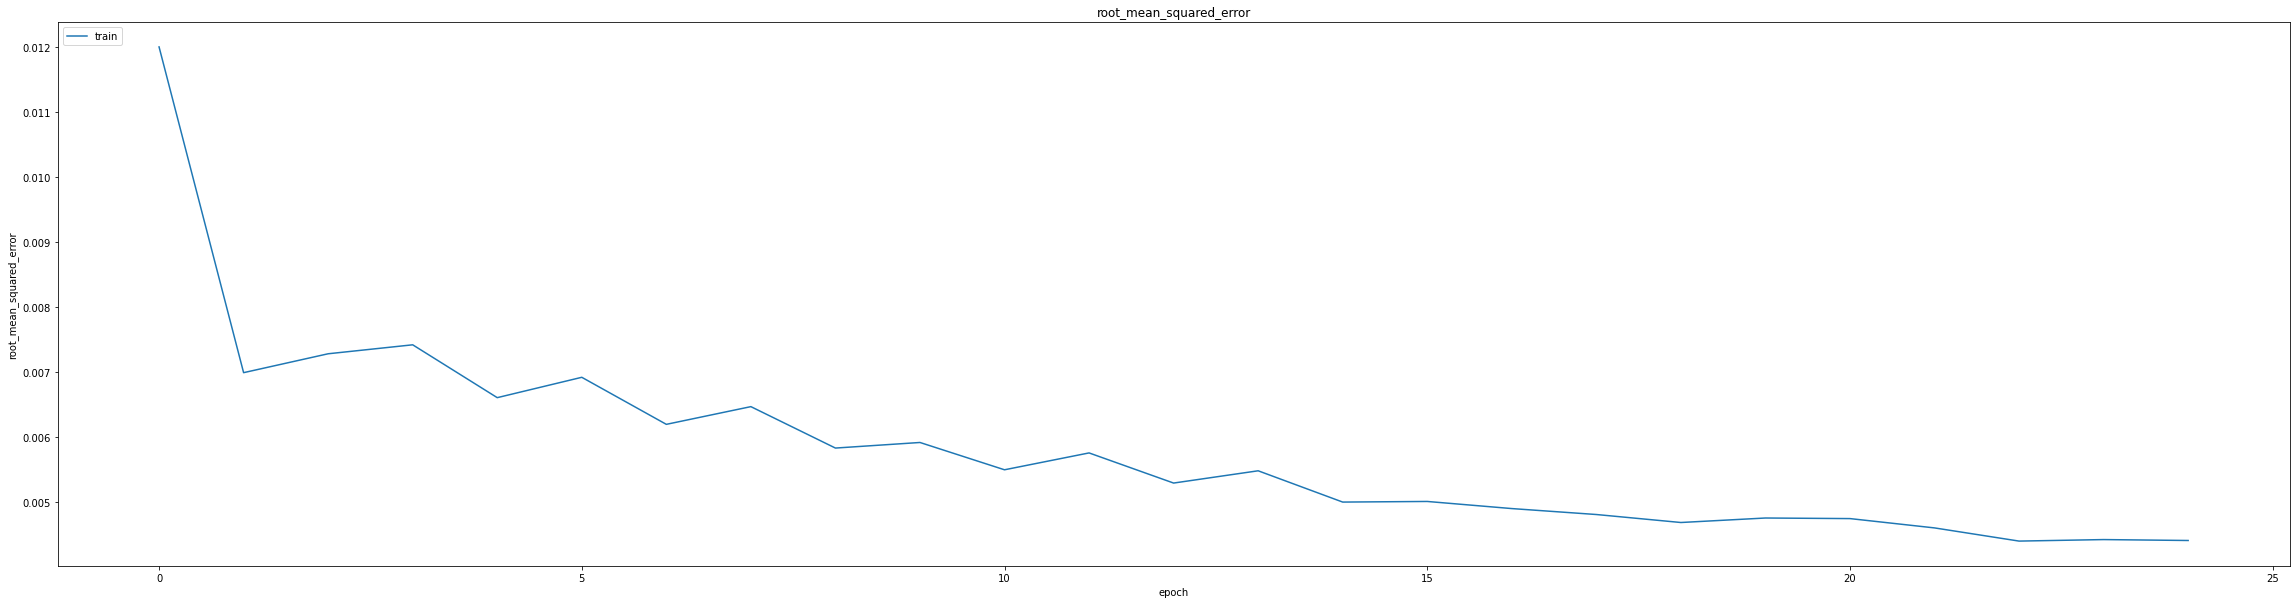

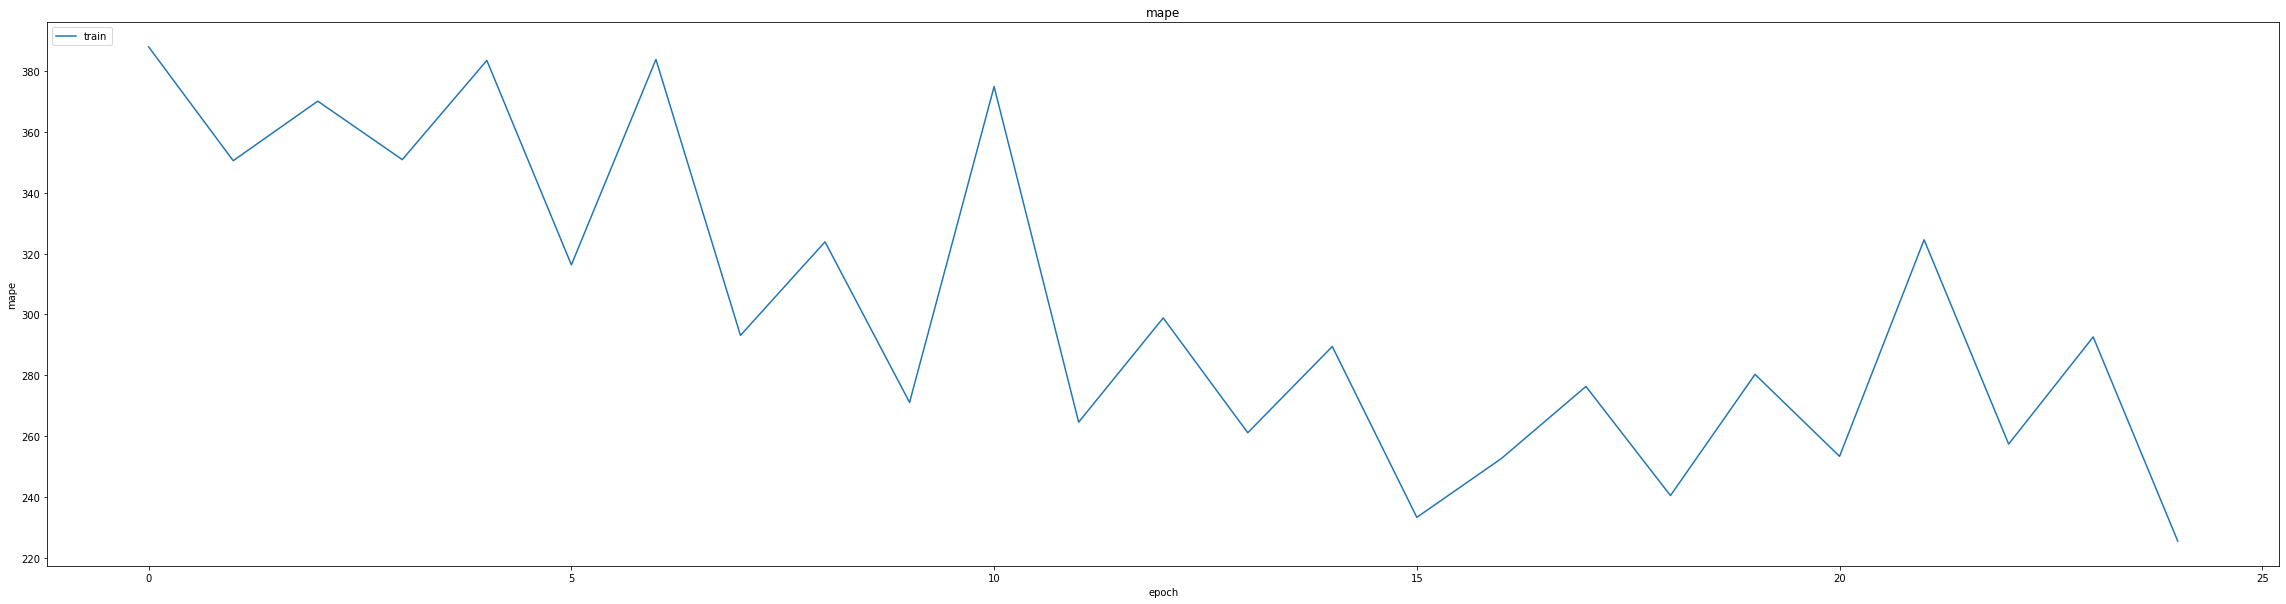

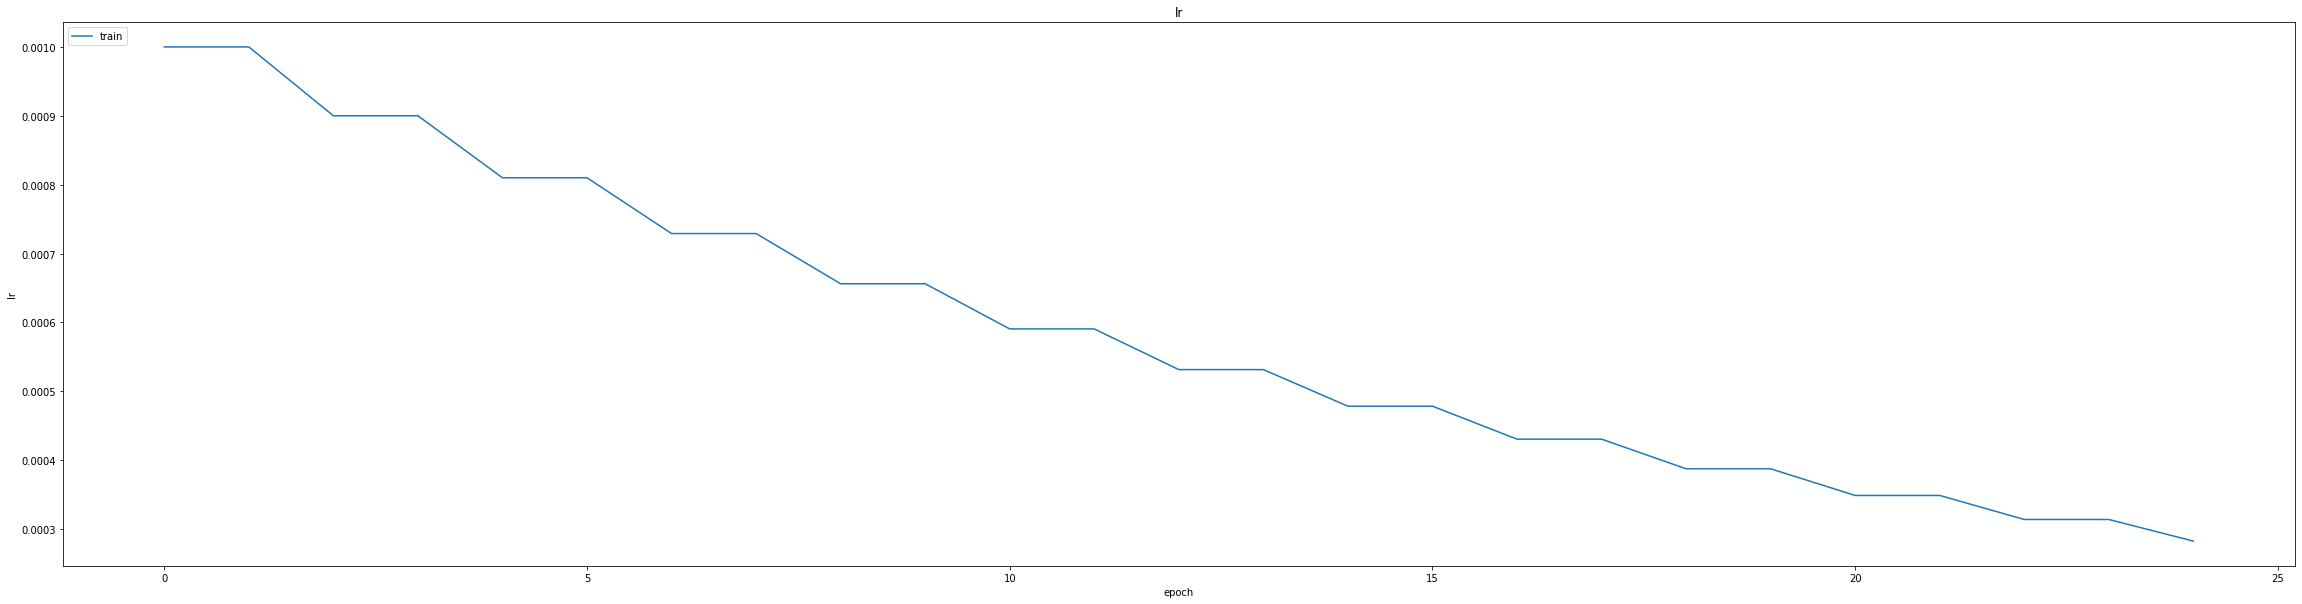

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.015100897289812565
0.015100897289812565
0.018223386257886887
348/348 [==============================] - 2s 4ms/step
0.984518835303194


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD_15min_GRU(70-30)")

348/348 [==============================] - 1s 4ms/step


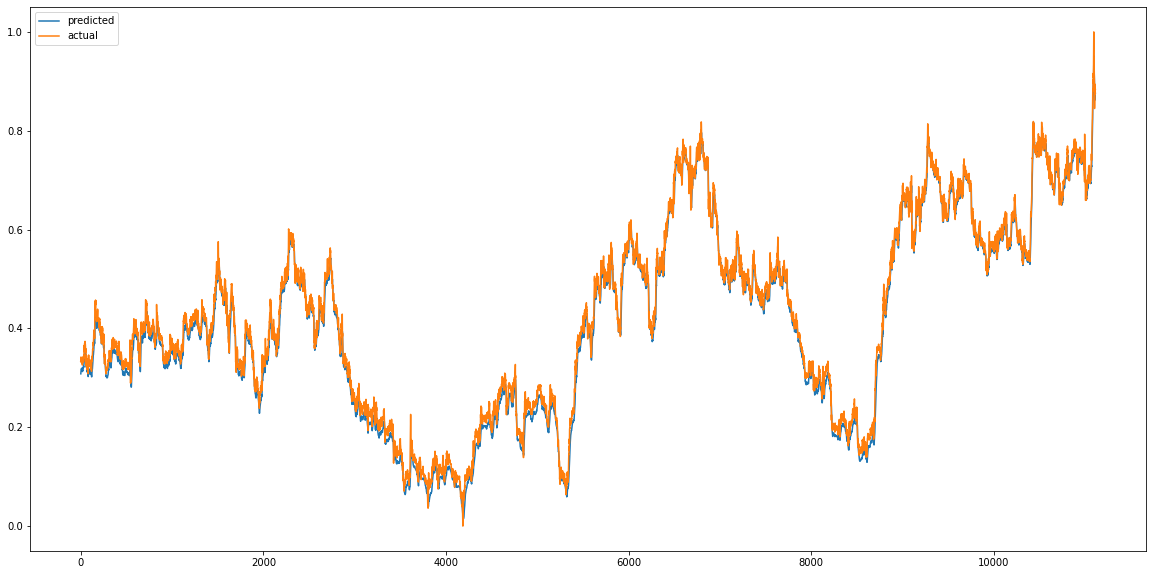

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


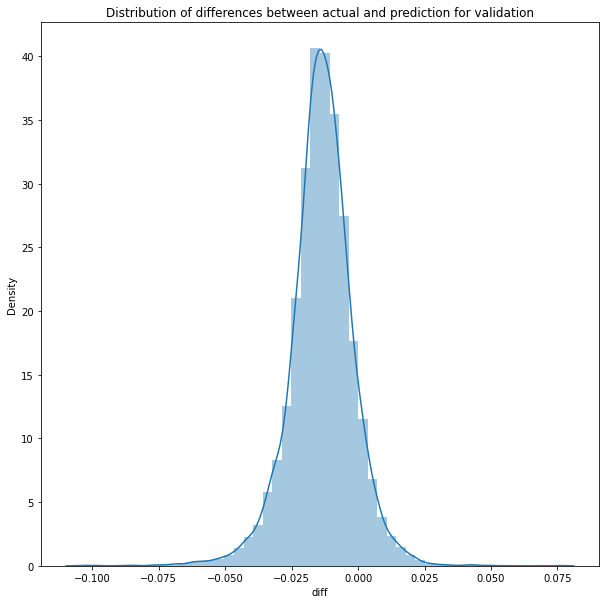

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


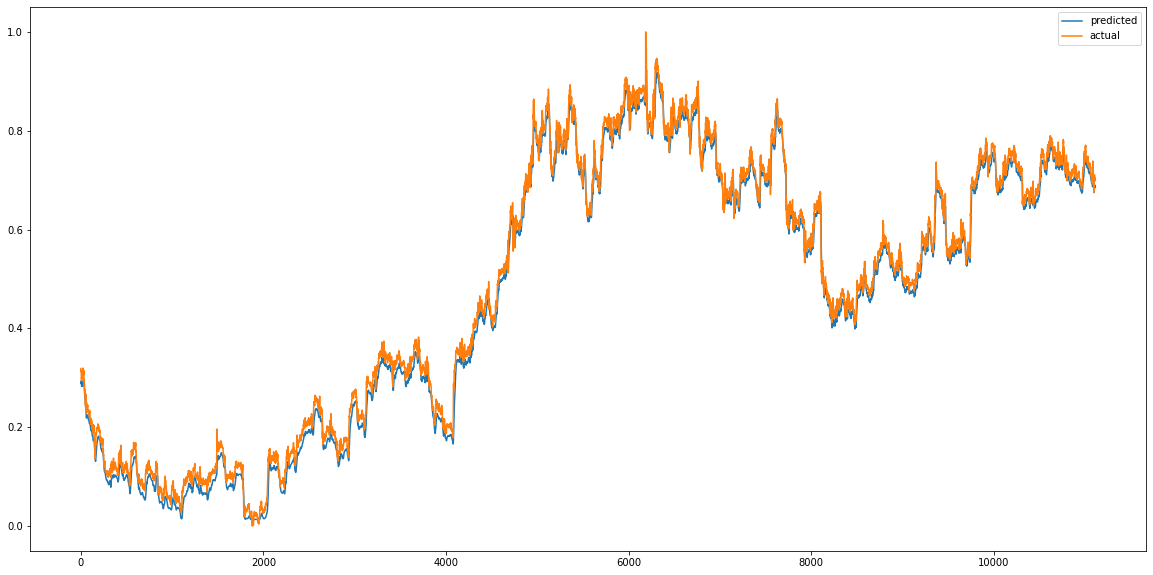

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


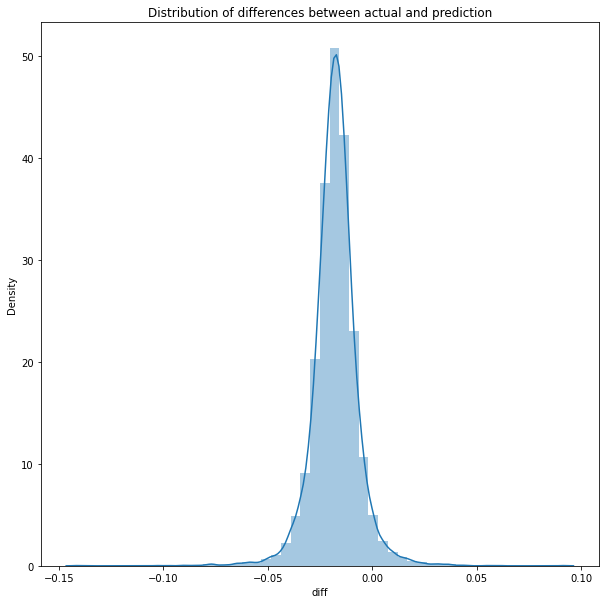

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00042998602808052536
RMSE :  0.020736104457697097
MAE :  0.018435825836759696
348/348 [==============================] - 3s 8ms/step
R2_Score  : 0.9940663334201664


count    11115.000000
mean        -0.017704
std          0.010796
min         -0.141461
25%         -0.023041
50%         -0.017651
75%         -0.012340
max          0.091287
Name: diff, dtype: float64